In [1]:
import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import openpyxl
import japanize_matplotlib
from matplotlib import animation
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression # to build a LR model for comparison
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points
from tqdm import tqdm
import time
from statsmodels.nonparametric.smoothers_lowess import lowess
import cv2
from sympy.geometry import *
import matplotlib.pyplot as plt
%matplotlib inline
import math

# 定義

# 14から始める

## 3Dmapping

In [2]:
def Mapping(df, title, oku, yoko, save=False):
    x = df['X'].tolist()
    y = df['Y'].tolist()
    z = df['Z'].tolist()
    fig = plt.figure(figsize=(10,10))#figsize=(,)でグラフの大きさ
    ax = fig.add_subplot(111, projection='3d')

    # 軸の範囲
    ax.set_xlim(0,100)
    ax.set_ylim(-50,50)
    ax.set_zlim(0,10)

    #ラベル D
    ax.set_xlabel('X',fontsize=18)
    ax.set_ylabel('Y',fontsize=18)
    ax.set_zlabel('Z',fontsize=18)
    ax.scatter3D(x, y, z, s = 1, c=z, cmap='ocean')
    ax.view_init(elev=oku, azim=yoko)
    # ax.view_init(elev=-10, azim=60)#elev:縦回転「奥回転」、azim：横回転「時計回転」
    # ax.view_init(elev=60, azim=60)
    plt.title(title, fontsize=18)
    if save:
        plt.savefig(title+'.jpg')
    plt.show()

## ソート

In [3]:
def SortXYZ(df):
    df_x = df['X'].unique()
    df_x.sort()
    f = pd.DataFrame([],columns = ['X','Y','Z'])#空のデータフレームを作成
    #print(df_x)
    for x in tqdm(df_x, unit='keysrokes', desc = 'loading'):#x_listから一つずつ取りだす
        f1 = df[df['X'] == x]
        f1 = f1.sort_values('Y')
        f = pd.concat([f,f1])
        f = f.reset_index(drop=True)
    return f

In [4]:
def SortYXZ(df):
    df_y = df['Y'].unique()
    df_y.sort()
    f = pd.DataFrame([],columns = ['X','Y','Z'])#空のデータフレームを作成
    #print(df_x)
    for y in tqdm(df_y, unit='keysrokes', desc = 'loading'):#x_listから一つずつ取りだす
        f1 = df[df['Y'] == y]
        f1 = f1.sort_values('X')
        f = pd.concat([f,f1])
        f = f.reset_index(drop=True)
    return f

In [5]:
def SortXY(df):
    df_x = df['X'].unique()
    df_x.sort()
    f = pd.DataFrame([],columns = ['X','Y'])#空のデータフレームを作成
    #print(df_x)
    for x in tqdm(df_x, unit='keysrokes', desc = 'loading'):#x_listから一つずつ取りだす
        f1 = df[df['X'] == x]
        f1 = f1.sort_values('Y')
        f = pd.concat([f,f1])
        f = f.reset_index(drop=True)
    return f

In [6]:
def SortXYInOut(df):
    df_x = df['X'].unique()
    df_x.sort()
    f = pd.DataFrame([],columns = ['X','Y','InOut'])#空のデータフレームを作成
    #print(df_x)
    for x in tqdm(df_x, unit='keysrokes', desc = 'loading'):#x_listから一つずつ取りだす
        f1 = df[df['X'] == x]
        f1 = f1.sort_values('Y')
        f = pd.concat([f,f1])
        f = f.reset_index(drop=True)
    return f

##　四分位偏差

In [7]:
def Iqr_outliers (df, graph_title, oku, yoko, value=1.5):
    q1= df["Z"].quantile(0.25)#第一四分位範囲
    q2= df["Z"].quantile(0.75)#第三四分位範囲
    iqr=q2-q1
    min1 = q1 - value * iqr
    max1 = q2 + value * iqr
    dfa = df[(df["Z"] > min1) & (df["Z"] < max1)]
    x = list(dfa['X'])
    y = list(dfa['Y'])
    z = list(dfa['Z'])
    dfi = pd.DataFrame(list(zip(x,y,z)), columns = ['X','Y','Z'])
    title = 'iqr_outliers_' + graph_title
    fig = plt.figure(figsize=(10,10))#figsize=(,)でグラフの大きさ
    ax = fig.add_subplot(111, projection='3d')

    # 軸の範囲
    ax.set_xlim(0,100)
    ax.set_ylim(-50,50)
    ax.set_zlim(0,10)

    #ラベル D
    ax.set_xlabel('X',fontsize=18)
    ax.set_ylabel('Y',fontsize=18)
    ax.set_zlabel('Z',fontsize=18)
    ax.scatter3D(x, y, z, s = 1, c=z, cmap='ocean')
    ax.view_init(elev=oku, azim=yoko)#elev:縦回転「奥回転」、azim：横回転「時計回転」
    # ax.view_init(elev=60, azim=60)
    plt.title(title, fontsize=18)
    plt.savefig(title+'.jpg')
    plt.show()
    return dfi

In [8]:
# # 標準偏差
# def sigma_outliers(df, graph_title, sigma_value, oku, yoko):
#     sigma = df['Z'].std() * sigma_value
#     max1 = df['Z'].quantile(0.5) + sigma
#     min1 = df['Z'].quantile(0.5) - sigma
#     dfa = df[(df["Z"] > min1) & (df["Z"] < max1)]
#     x = list(dfa['X'])
#     y = list(dfa['Y'])
#     z = list(dfa['Z'])
#     dfs = pd.DataFrame(list(zip(x,y,z)), columns = ['X','Y','Z'])
#     title = 'sigma_outliers_' + graph_title
#     fig = plt.figure(figsize=(10,10))#figsize=(,)でグラフの大きさ
#     ax = fig.add_subplot(111, projection='3d')

#     # 軸の範囲
#     ax.set_xlim(0,100)
#     ax.set_ylim(-50,50)
#     ax.set_zlim(0,10)

#     #ラベル D
#     ax.set_xlabel('X',fontsize=18)
#     ax.set_ylabel('Y',fontsize=18)
#     ax.set_zlabel('Z',fontsize=18)
#     ax.scatter3D(x, y, z, s = 1, c=z, cmap='ocean')
#     ax.view_init(elev=oku, azim=yoko)#elev:縦回転「奥回転」、azim：横回転「時計回転」
#     # ax.view_init(elev=60, azim=60)
#     plt.title(title, fontsize=18)
#     plt.savefig(title+'.jpg')
#     plt.show()
#     return dfs

## 標準偏差

In [9]:

def Sigma_outliers(df, graph_title, sigma_value, oku, yoko):
    dfa = df.copy()
    sigma = dfa['Z'].std() * sigma_value
    max1 = dfa['Z'].quantile(0.5) + sigma
    min1 = dfa['Z'].quantile(0.5) - sigma
    dfa.loc[~dfa['Z'].between(min1,max1),'Z'] = np.nan
    x = list(dfa['X'])
    y = list(dfa['Y'])
    z = list(dfa['Z'])
    dfs = pd.DataFrame(list(zip(x,y,z)), columns = ['X','Y','Z'])
    title = 'sigma_outliers_' + graph_title
    fig = plt.figure(figsize=(10,10))#figsize=(,)でグラフの大きさ
    ax = fig.add_subplot(111, projection='3d')

    # 軸の範囲
    ax.set_xlim(0,100)
    ax.set_ylim(-50,50)
    ax.set_zlim(0,10)

    #ラベル D
    ax.set_xlabel('X',fontsize=18)
    ax.set_ylabel('Y',fontsize=18)
    ax.set_zlabel('Z',fontsize=18)
    ax.scatter3D(x, y, z, s = 1, c=z, cmap='ocean')
    ax.view_init(elev=oku, azim=yoko)#elev:縦回転「奥回転」、azim：横回転「時計回転」
    # ax.view_init(elev=60, azim=60)
    plt.title(title, fontsize=18)
    plt.savefig(title+'.jpg')
    plt.show()
    return dfa

## グラフ

In [10]:
def Graph(x_array, y_array, custom_title, scatter=True, solid_line=False, line_viz = None):
    ''' This function can accept basic x and y arrays for a basic 
    scatter plot or line plot (or both), but it can also accept, 
    in its line_viz parameter, a list of x, y array pairs.
    Its configuration for coloring, line weight, and dot size are 
    tailored specifically for the smoothing examples presented in 
    this blog.'''
    
    # Set up the plotting
    figure_proportions = (10, 5)
    plt.figure(figsize=figure_proportions )    
    x_min, x_max = 0, 100
    y_min, y_max = 5.2,5.5
    y_axis_label = 'Z'
    x_axis_label = 'X'
    title = 'a'
    custom_title = title + ' - ' + custom_title
    plt.title(custom_title)         
    dot_opacity = line_opacity = 1
    size = 30 if len(x_array) > 15 else 100 
    line_weight=1
    
    # Handle the cases where lines or curves are visualized, 
    # beyond the obvious
    if line_viz != None:
        if len(line_viz) == 1:
            colors = ['red']
        if len(line_viz) ==2:
            colors = ['lightseagreen', 'olive']
            dot_opacity = .3 #不透明
            line_weight = 3
        if len(line_viz) == 4:
            dot_opacity = .1
            line_opacity = .1
            colors = ['turquoise', 'magenta','tomato', 'gold']           
        for i, (x, y) in enumerate(line_viz):
            plt.plot(x, y, color = colors[i], lw=3)
    
    # Handle the standard cases
    if scatter:
        plt.scatter(x_array, y_array, color = 'green', marker = "o", alpha = dot_opacity, s=size) 
    if solid_line:
        plt.plot(x_array, y_array, color = 'green', alpha = line_opacity)
    # Present the plotting
    plt.xlabel(x_axis_label) 
    plt.ylabel(y_axis_label) 
    plt.xlim(x_min, x_max )
    plt.ylim(y_min, y_max )
    plt.savefig(title+'.svg')
    plt.show()

In [11]:
# # nan挿入
# def countDelete(df,high_y=200,high_x=100):
#     y_list = df['Y'].unique()
#     count_Y = [] 
#     df_dy = df.copy()
#     for i in y_list:
#         count_Y.append(df[df.Y == i].Y.count())
#     dfCo_Y = pd.DataFrame(zip(y_list,count_Y), columns = ['Y','Count'])
#     dfCo_Y = dfCo_Y.sort_values('Y')
#     dfCo_Y = dfCo_Y[(dfCo_Y["Count"] < high_y)]
#     delete_y = dfCo_Y['Y'].unique()
#     for i in delete_y:
#         df_dy.loc[df_dy['Y'] == i, 'Z'] = np.nan

#     x_list = df_dy['X'].unique()
#     count_X = []
#     df_dxy = df_dy.copy()
#     for i in x_list:
#         count_X.append(df_dy[df_dy.X == i].X.count())
#     dfCo_X = pd.DataFrame(zip(x_list,count_X), columns = ['X','Count'])
#     dfCo_X = dfCo_X.sort_values('X')
#     dfCo_X = dfCo_X[(dfCo_X["Count"] < high_x)]
#     delete_x = dfCo_X['X'].unique()
#     for i in delete_x:
#         df_dxy.loc[df_dxy['X'] == i, 'Z'] = np.nan   
#     df_xy = df_dy['X'].unique()
#     return df_xy

## Count消去

In [12]:
def CountDelete(df,high_y=200,high_x=100,nan=False,delete=True,threshold=29):
    #high_y:カウントの最低ライン、high_x：カウントの最低ライン、threshold：無視する高さの最低（y）
    if nan:
        y_list = df['Y'].unique()
        count_Y = [] 
        df_dy = df.copy()
        for i in y_list:
            if i >= threshold:#ビード部分は何もしない 
                break
            else:
                count_Y.append(df[df.Y == i].Y.count())
        dfCo_Y = pd.DataFrame(zip(y_list,count_Y), columns = ['Y','Count'])
        dfCo_Y = dfCo_Y.sort_values('Y')
        dfCo_Y = dfCo_Y[(dfCo_Y["Count"] < high_y)]
        delete_y = dfCo_Y['Y'].unique().tolist()
        print('消去するYは{}'.format(delete_y))
        for i in tqdm(delete_y, unit='keysrokes', desc = 'loading'):
            df_dy.loc[df_dy['Y'] == i, 'Z'] = np.nan

        x_list = df_dy['X'].unique()
        count_X = []
        df_dxy = df_dy.copy()
        for i in x_list:
            count_X.append(df_dy[df_dy.X == i].X.count())
        dfCo_X = pd.DataFrame(zip(x_list,count_X), columns = ['X','Count'])
        dfCo_X = dfCo_X.sort_values('X')
        dfCo_X = dfCo_X[(dfCo_X["Count"] < high_x)]
        delete_x = dfCo_X['X'].unique()
        print('消去するXは{}'.format(delete_x))
        for i in delete_x:
            df_dxy.loc[df_dxy['X'] == i, 'Z'] = np.nan   
        df_xy = df_dy['X'].unique()
        return df_dxy
    
    if delete:
        y_list = df['Y'].unique()
        count_Y = [] 
        df_dy = df.copy()
        for i in y_list:
            if i >= threshold:#ビード部分は何もしない 
                break
            else:
                count_Y.append(df[df.Y == i].Y.count())
        dfCo_Y = pd.DataFrame(zip(y_list,count_Y), columns = ['Y','Count'])
        dfCo_Y = dfCo_Y.sort_values('Y')
        dfCo_Y = dfCo_Y[(dfCo_Y["Count"] < high_y)]
        delete_y = dfCo_Y['Y'].unique().tolist()
        print('消去するYは{}'.format(delete_y))
        for i in tqdm(delete_y, unit='keysrokes', desc = 'loading'):
            #df_dy[df_dy['Y'] != i]
            indexNames_y = df_dy[df_dy['Y'] == i].index
            df_dy.drop(indexNames_y , inplace=True)

        x_list = df_dy['X'].unique()
        count_X = []
        df_dxy = df_dy.copy()
        for i in x_list:
            count_X.append(df_dy[df_dy.X == i].X.count())
        dfCo_X = pd.DataFrame(zip(x_list,count_X), columns = ['X','Count'])
        dfCo_X = dfCo_X.sort_values('X')
        dfCo_X = dfCo_X[(dfCo_X["Count"] < high_x)]
        delete_x = dfCo_X['X'].unique().tolist()
        print('消去するXは{}'.format(delete_x))
        for i in tqdm(delete_x, unit='keysrokes', desc = 'loading'):
            indexNames_x = df_dxy[df_dxy['X'] == i].index
            df_dxy.drop(indexNames_x , inplace=True)
        df_xy = df_dy['X'].unique()        
        return df_dxy

## yだけcount消去

In [13]:
def CountDeleteY(df,threshold=15):    
    y_list = df.index.to_list()
    count_Y = [] 
    df_c = df.copy()
    for i in tqdm(y_list, unit='keysrokes', desc = 'loading'):
        count_Y.append(df.loc[i].count())
    dfCo_Y = pd.DataFrame(zip(y_list,count_Y), columns = ['Y','Count'])
    dfCo_Y = dfCo_Y.sort_values('Y', ascending=False)
    dfCo_Y1 = dfCo_Y[(dfCo_Y["Count"] < threshold) & (dfCo_Y["Y"] < dfCo_Y['Y'].max())]
    dfCo_Y2 = dfCo_Y[(dfCo_Y["Count"] < 5)]
    dfCo_Y3 = pd.concat([dfCo_Y1,dfCo_Y2])   
    delete_y = dfCo_Y3['Y'].unique().tolist()
    delete_y.sort()
    print(delete_y)
    df_c.drop(index=delete_y, inplace=True)
    return df_c

## nan挿入

In [14]:
def Make_nan(df,high_y=100,high_x=50):
    y_list = df['Y'].unique()
    count_Y = [] 
    df_dy = df.copy()
    for i in y_list:
        count_Y.append(df[df.Y == i].Y.count())
    dfCo_Y = pd.DataFrame(zip(y_list,count_Y), columns = ['Y','Count'])
    dfCo_Y = dfCo_Y.sort_values('Y')
    dfCo_Y = dfCo_Y[(dfCo_Y["Count"] < high_y)]
    delete_y = dfCo_Y['Y'].unique()
    for i in delete_y:
        df_dy.loc[df_dy['Y'] == i, 'Z'] = np.nan

    x_list = df_dy['X'].unique()
    count_X = []
    df_dxy = df_dy.copy()
    for i in x_list:
        count_X.append(df_dy[df_dy.X == i].X.count())
    dfCo_X = pd.DataFrame(zip(x_list,count_X), columns = ['X','Count'])
    dfCo_X = dfCo_X.sort_values('X')
    dfCo_X = dfCo_X[(dfCo_X["Count"] < high_x)]
    delete_x = dfCo_X['X'].unique()
    for i in delete_x:
        df_dxy.loc[df_dxy['X'] == i, 'Z'] = np.nan   
    df_xy = df_dy['X'].unique()
    return df_dxy

In [15]:
import numpy as np

class PolynomialLeastSquare:
    """
    多項式最小二乗法
    
    Attributes
    ----------
    coefficients : int
        使用する弱分類器の数
    d : int
        fitting を行う多項式の次数
    """
    
    def fit(self, x, y, d):
        """
        回帰曲線の係数を計算
        
        Parameters
        ----------
        x : numpy array [float]
        y : numpy array [float]
        d : int
            fitting する多項式の次数
        """
        n = len(x)
        # x のべき乗を計算
        x_pow = [np.full(n, 1.)]
        for i in range(2*d):
            x_pow.append(x_pow[-1] * x)
        x_pow = np.array(x_pow)
        # 行列 S を計算
        s = []
        for i in range(2*d+1):
            s.append(np.sum(x_pow[i]))
        S = np.zeros([d+1, d+1])
        for i in range(d+1):
            for j in range(d+1):
                S[i][j] = s[i+j]
        # ベクトル t を計算
        t = []
        for i in range(d+1):
            t.append(np.sum(x_pow[i]*y))
        t = np.matrix(t).T
        # 係数を求める
        S_inv = np.linalg.inv(S)
        self.coefficients = np.array(np.dot(S_inv, t)).flatten()
        self.d = d
    
    def predict(self, x):
        """
        学習済み回帰曲線を使って未知の x を変換
        
        Parameters
        ----------
        x : numpy array [float]
        """
        x_pow = np.full(len(x), 1.)
        y = np.zeros(len(x))
        for i in range(len(self.coefficients)):
            y += x_pow * self.coefficients[i]
            x_pow *= x
        return y

In [16]:
class RANSAC:
    """
    Attributes
    ----------
    mse : float
        平均二乗誤差 (Mean Square Error)
    ls_best : object
        最適な最小二乗法モデル
    x_inliers_best : numpy array [float]
        最適モデルを学習した際の正常値 x
    y_inliers_best : numpy array [float]
        最適モデルを学習した際の正常値 y
    """
    
    def __init__(self, max_trials, residual_threshold, min_inliers_rate):
        """
        Parameters
        ----------
        max_trials : int
            ランダムサンプリングによる fitting を試行する最大回数
        residual_threshold : float
            ランダムサンプルから学習したモデルとの残差がこれ以内であれば「正常値」とみなす
        min_inliers_rate : float
            [0, 1] の小数。データサンプル全体に占める正常値の割合がこれ以下のものは最適モデルの候補に含めない
        """
        self.max_trials = max_trials
        self.residual_threshold = residual_threshold
        self.min_inliers_rate = min_inliers_rate
    
    def predict(self, x):
        return self.ls_best.predict(x)
    
    def fit(self, x, y, d):
        """
        Parameters
        ----------
        x : numpy array [float]
        y : numpy array [float]
        d : int
            fitting する多項式の次数
        """
        n = len(x)
        # ランダムサンプリングの件数は最小限（モデルの自由度と同じ）にする
        n_part = d+1
        mse_min = np.inf
        ls_best = None
        x_inliers_best = None
        y_inliers_best = None
        for t in range(self.max_trials):
            ids_part = np.random.choice(n, n_part, replace=False)
            x_part, y_part = x[ids_part], y[ids_part]
            ls_part = PolynomialLeastSquare()
            ls_part.fit(x_part, y_part, d)
            ids_inliers = self.__detect_inliers_indices(x, y, ls_part)
            if len(ids_inliers) / n < self.min_inliers_rate:
                continue
            x_inliers, y_inliers = x[ids_inliers], y[ids_inliers]
            ls_inliers = PolynomialLeastSquare()
            ls_inliers.fit(x_inliers, y_inliers, d)
            mse = self.__calc_mse(x_inliers, y_inliers, ls_inliers)
            if mse < mse_min:
                mse_min = mse
                ls_best = ls_inliers
                x_inliers_best, y_inliers_best = x_inliers, y_inliers
        self.mse = mse_min
        self.ls_best = ls_best
        self.x_inliers_best, self.y_inliers_best = x_inliers_best, y_inliers_best
    
    def __detect_inliers_indices(self, x, y, model):
        """
        回帰モデルに対する正常値（のインデックス）を見つける
        """
        y_pred = model.predict(x)
        return np.where(np.abs(y-y_pred) < self.residual_threshold)[0]
    
    def __calc_mse(self, x, y, model):
        """
        回帰モデルに対するデータの平均二乗誤差（MSE）を計算
        """
        y_pred = model.predict(x)
        return np.average((y_pred-y)**2)

In [17]:
# y_list = dfL['Y'].unique()
# count_Y = [] 
# df_dy = dfL.copy()
# for i in y_list:
#     count_Y.append(dfL[dfL.Y == i].Y.count())
# dfCo_Y = pd.DataFrame(zip(y_list,count_Y), columns = ['Y','Count'])
# dfCo_Y = dfCo_Y.sort_values('Y')
# dfCo_Y = dfCo_Y[(dfCo_Y["Count"] < 200)]
# delete_y = dfCo_Y['Y'].unique().tolist()
# for i in tqdm(delete_y, unit='keysrokes', desc = 'loading'):
#     #df_dy[df_dy['Y'] != i]
#     indexNames = df_dy[df_dy['Y'] == i].index
#     df_dy.drop(indexNames , inplace=True)
# # x_list = df_dy['X'].unique()
# # count_X = []
# # df_dxy = df_dy.copy()
# # for i in x_list:
# #     count_X.append(df_dy[df_dy.X == i].X.count())
# # dfCo_X = pd.DataFrame(zip(x_list,count_X), columns = ['X','Count'])
# # dfCo_X = dfCo_X.sort_values('X')
# # dfCo_X = dfCo_X[(dfCo_X["Count"] < high_x)]
# # delete_x = dfCo_X['X'].unique()
# # df_dxy.drop(delete_x)
# # df_xy = df_dy['X'].unique()        
# # return df_dxy

## 外れ値消去（±２σ）

In [18]:
def DeleteOutliers(df,sigma_value=2):
    dfa = df.copy()
    sigma = dfa['Z'].std() * sigma_value
    max1 = dfa['Z'].quantile(0.5) + sigma
    min1 = dfa['Z'].quantile(0.5) - sigma
    dfa = dfa[(dfa["Z"] > min1) & (dfa["Z"] < max1)]
    return dfa

## 外れ値消去（特定値）

In [19]:
def DeleteOutliers2(df,low,high):
    dfa = df.copy()
    dfa = dfa[(dfa["Z"] > low) & (dfa["Z"] < high)]
    return dfa

## 外側抽出

In [20]:
def Max_min(df,bottom=True,upper=False,left=False,right=False):
    df0 = pd.DataFrame([],columns = ['X','Y','Z'])
    df_x = df['X'].unique()
    df_y = df['Y'].unique()
    df_x.sort()
    df_y.sort()
    if bottom:             
        for i in tqdm(df_x, unit='keysrokes', desc = 'loading'):
            df1 = df[df.X == i][:1]        
            df0 = pd.concat([df0, df1])
            df0.reset_index(drop=True, inplace=True)
    if upper:
        for i in tqdm(df_x, unit='keysrokes', desc = 'loading'):
            df1 = df[df.X == i][-1:]        
            df0 = pd.concat([df0, df1])
            df0.reset_index(drop=True, inplace=True)
    
    if left:
        for i in tqdm(df_y, unit='keysrokes', desc = 'loading'):
            df1 = df[df.Y == i][:1]        
            df0 = pd.concat([df0, df1])
            df0.reset_index(drop=True, inplace=True)
    if right:
        for i in tqdm(df_y, unit='keysrokes', desc = 'loading'):
            df1 = df[df.Y == i][-1:]        
            df0 = pd.concat([df0, df1])
            df0.reset_index(drop=True, inplace=True)
    return df0

## Lowess法（Y）

In [21]:
def YlowessMethod(df,frac=0.2):
    lowess_xlist = []
    lowess_ylist = []
    lowess_zlist = []
    dfLo = pd.DataFrame([],columns = ['X','Y','Z'])
    y_keys = df['Y'].unique()

    for i in tqdm(y_keys, unit='keysrokes', desc = 'loading'):
        df1 = df[df.Y == i]
        # ground truth linear interpolation
        title = 'lowess_y = ' + str(i)

        x_list = list(df1['X'])
        #x_value = x_list[0:100]
        x = np.array(x_list)

        y_list = list(df1['Y'])
        #y_value = y_list[0:100]
        y = np.array(y_list)

        z_list = list(df1['Z'])
        #z_value = z_list[0:100]
        z = np.array(z_list)

        #graph(xa, za, 'raw', scatter=False, solid_line=True)

        # two LOWESS curves
        lowess_tight = lowess(z, x, frac)# frac：ハイパーパラメータ
        #lowess_loose = lowess(xa, za, frac = 0.2)
        lowess_list = [(lowess_tight[:,0], lowess_tight[:,1]) ]
        # lowess_tight[:,0]：ｘ座標のリスト
        # lowess_tight[:,1]：y座標のリスト
        #graph(xa, za, title, scatter=True, solid_line=False, line_viz = lowess_list)
        #print(len(lowess_list))

        lowess_xlist = lowess_list[0][0].tolist()
        lowess_zlist = lowess_list[0][1].tolist()

        dfL1 = pd.DataFrame(list(zip(lowess＿xlist,y,lowess_zlist)), columns = ['X','Y','Z'])
        dfLo = pd.concat([dfLo, dfL1])
    return dfLo

## Lowess法（X）

In [22]:
# lowess
def XlowessMethod(df,frac=0.2):
    lowess_xlist = []
    lowess_ylist = []
    lowess_zlist = []
    dfLo = pd.DataFrame([],columns = ['X','Y','Z'])
    x_keys = df['X'].unique()

    for i in tqdm(x_keys, unit='keysrokes', desc = 'loading'):
        df1 = df[df.X == i]
        # ground truth linear interpolation
        title = 'lowess_x = ' + str(i)

        x_list = list(df1['X'])
        #x_value = x_list[0:100]
        x = np.array(x_list)

        y_list = list(df1['Y'])
        #y_value = y_list[0:100]
        y = np.array(y_list)

        z_list = list(df1['Z'])
        #z_value = z_list[0:100]
        z = np.array(z_list)

        lowess_tight = lowess(z, y, frac)# frac：ハイパーパラメータ
        #lowess_loose = lowess(xa, za, frac = 0.2)
        lowess_list = [(lowess_tight[:,0], lowess_tight[:,1]) ]
        # lowess_tight[:,0]：ｘ座標のリスト
        # lowess_tight[:,1]：y座標のリスト
        #graph(xa, za, title, scatter=True, solid_line=False, line_viz = lowess_list)
        #print(len(lowess_list))

        lowess_ylist = lowess_list[0][0].tolist()
        lowess_zlist = lowess_list[0][1].tolist()

        dfL1 = pd.DataFrame(list(zip(x,lowess_ylist,lowess_zlist)), columns = ['X','Y','Z'])
        dfLo = pd.concat([dfLo, dfL1])
    return dfLo

## Lowess2

In [23]:
def Lowess_2(x, y,frac=0.2):
    dfLo = pd.DataFrame([],columns = ['X','Y','Z'])
    a = x.tolist()
    b = y.tolist()
    lowess_tight = lowess(b, a, frac)
    lowess_list = [(lowess_tight[:,0], lowess_tight[:,1]) ]
    lowess_ylist = lowess_list[0][0].tolist()
    lowess_zlist = lowess_list[0][1].tolist()
    dfL1 = pd.DataFrame(list(zip(lowess_ylist,lowess_zlist,)), columns = ['X','Y'])
    dfLo = pd.concat([dfLo, dfL1])
    return dfLo

## 飛び値消去(タテ)

In [24]:
def DeleteTobi_ver(df, threshold=0.071):
    df = SortXYZ(df)
    df_x = df['X'].unique()
    df_x.sort()
    f2 = pd.DataFrame([],columns = ['X','Y','Z'])#空のデータフレームを作成
    #print(df_x)
    for x in tqdm(df_x, unit='keysrokes', desc = 'loading'):#x_listから一つずつ取りだす
        
        f1 = df[df['X'] == x]#xがある値の時だけのdataframeを取り出す
        f1_r = f1.reset_index(drop=True)#インデックスを振り直す
        f1_r1 = f1[f1['Y'] < df['Y'].median()]#中央値より小さい
        f1_r2 = f1[f1['Y'] >= df['Y'].median()]#中央値より大きい
        f3_r1 = f1_r1.Y - f1_r1.shift().Y#配列ごと引き算する
        f3_r2 = f1_r2.Y - f1_r2.shift().Y#配列ごと引き算する
        f4_r1 = (f3_r1>=threshold)#bool値を返す
        f4_r2 = (f3_r2>=threshold)#bool値を返す
        #print(f1_r1)
        under = []#中央値より小さい
        upper = []#中央値より大きい
        # print('-------------------------')
        # print(f1_r1)
        # print('--------------')
        # print(f1_r2)

        #下半分-------------------------------------------------------------
        if len(f4_r1) == 1:#データが1つだけの時
            ;
        else:#データが2つ以上の時  
            if any(f4_r1) == True:#0.071よりも大きいやつがある場合
                under = f3_r1[f3_r1>=threshold].index#indexを記録             
                delete_un_s = f1_r1.Y.idxmin()#一番下
                delete_un_e = max(under)#とびはじめ
                delete_list_un = list(range(delete_un_s,delete_un_e))#一番下から飛び初めをすべて
                f1_r1.drop(delete_list_un, inplace=True)#ドロップする
                f1_r1 = f1_r1.reset_index(drop=True)#インデックスを振り直す
                f2 = pd.concat([f2, f1_r1])
            else:
                f2 = pd.concat([f2, f1_r1])

        # #上半分-------------------------------------------------------------
        if len(f4_r2) == 1:#データが1つだけの時
            ;
        else:#データが2つ以上の時  
            if any(f4_r2) == True:#0.071よりも大きいやつがある場合
                upper = f3_r2[f3_r2>=threshold].index#indexを記録         
                delete_up_s = min(upper)#とびはじめ
                delete_up_e = f1_r2.Y.idxmax()#一番上#とびはじめ
                delete_list_up = list(range(delete_up_s,delete_up_e+1))#一番下から飛び初めをすべて
                f1_r2.drop(delete_list_up, inplace=True)#ドロップする
                f1_r2 = f1_r2.reset_index(drop=True)#インデックスを振り直す
                f2 = pd.concat([f2, f1_r2])
            else:
                f2 = pd.concat([f2, f1_r2])

        f2 = f2.reset_index(drop=True)#インデックスを振り直す
    return f2

## 飛び値消去(ヨコ)

In [25]:
def DeleteTobi_hori(df, threshold=0.071):
    df = SortYXZ(df)
    df_y = df['Y'].unique()
    df_y.sort()
    f2 = pd.DataFrame([],columns = ['X','Y','Z'])#空のデータフレームを作成
    #print(df_x)
    for y in tqdm(df_y, unit='keysrokes', desc = 'loading'):#x_listから一つずつ取りだす

        f1 = df[df['Y'] == y]#xがある値の時だけのdataframeを取り出す
        f1_r = f1.reset_index(drop=True)#インデックスを振り直す
        f1_r1 = f1[f1['X'] < df['X'].median()]#中央値より小さい　→　左
        f1_r2 = f1[f1['X'] >= df['X'].median()]#中央値より大きい　→　右
        f3_r1 = f1_r1.X - f1_r1.shift().X#配列ごと引き算する
        f3_r2 = f1_r2.X - f1_r2.shift().X#配列ごと引き算する
        f4_r1 = (f3_r1>=threshold)#bool値を返す
        f4_r2 = (f3_r2>=threshold)#bool値を返す
        #print(f1_r1)
        left = []#中央値より小さい
        right = []#中央値より大きい
        # print('-------------------------')
        # print(f1_r1)
        # print('--------------')
        # print(f1_r2)

        #左半分-------------------------------------------------------------
        if len(f4_r1) == 1:#データが1つだけの時
            ;
        else:#データが2つ以上の時  
            if any(f4_r1) == True:#0.071よりも大きいやつが1つでもある場合
                left = f3_r1[f3_r1>=0.071].index#indexを記録
                delete_left_s = f1_r1.X.idxmin()#一番左
                delete_left_e = max(left)#とび値のMAX
                delete_list_left = list(range(delete_left_s,delete_left_e))#一番左から飛び値MAXをすべて
                f1_r1.drop(delete_list_left, inplace=True)#ドロップする
                f1_r1 = f1_r1.reset_index(drop=True)#インデックスを振り直す
                f2 = pd.concat([f2, f1_r1])
            else:
                f2 = pd.concat([f2, f1_r1])

        # #右半分-------------------------------------------------------------
        if len(f4_r2) == 1:#データが1つだけの時
            ;
        else:#データが2つ以上の時
            if any(f4_r2) == True:#0.071よりも大きいやつがある場合
                right = f3_r2[f3_r2>=threshold].index#indexを記録
                delete_right_s = min(right)#とびはじめ
                delete_right_e = f1_r2.X.idxmax()#一番右の値
                #print(delete_up_s,delete_up_e)
                delete_list_right = list(range(delete_right_s,delete_right_e+1))#一番下から飛び初めをすべて
                f1_r2.drop(delete_list_right, inplace=True)#ドロップする
                f1_r2 = f1_r2.reset_index(drop=True)#インデックスを振り直す
                f2 = pd.concat([f2, f1_r2])
            else:#一つもないときはそのまま
                f2 = pd.concat([f2, f1_r2])

            f2 = f2.reset_index(drop=True)#インデックスを振り直す
    return f2

## FromDataToPixcel

In [26]:
def Makepixel(df):
    df0 = pd.DataFrame([],columns = [])
    df = SortXYZ(df)
    xlist = df['X'].unique()
    for x in tqdm(xlist, unit='keysrokes', desc = 'loading'):#x_listから一つずつ取りだす
        df1 = df[df['X'] == x]#xがある値の時だけのdataframeを取り出す
        df1_x = [x]
        df1_y = list(df1.Y)
        df1_z = list(df1.Z)
#         df1_y.reverse()
#         df1_z.reverse()
        df2 = pd.DataFrame(df1_z, index = df1_y)
        df2.columns = df1_x
#         print(df2)
#         print('======')
        df0 = pd.concat([df0, df2], axis=1, join='outer')
#         print(df2)
        df0 = df0.sort_index(ascending=False)
    return df0

## FromPixcelToData   

In [27]:
def ToData(df):#FromPixcelToData   
    df0 = pd.DataFrame([],columns = [])
    xlist = df.columns
    #print(xlist[0])
    for x in tqdm(xlist, unit='keysrokes', desc = 'loading'):#x_listから一つずつ取りだす
        #print(x)
        dfe = pd.DataFrame([],columns = [])
        df1 = df[x]#xがある値の時だけのdataframeを取り出す
        #print(df1)
        # df1_x = [48.762469]
        df1_y = df.index
        df1_z = df1.to_list()
        #df0['X'] =df1_x
        dfe['Y'] = df1_y
        dfe['X'] = x#yが一番多いため
        dfe['Z'] = df1_z
        dfe = dfe.reindex(columns=['X', 'Y', 'Z'])#順番に並べる
        dfe = dfe.dropna()#NANを含むデータを消す

        df0 = pd.concat([df0, dfe])
        #         print(df2)
    df0 = df0.sort_index(ascending=False)
    return df0

## filter作る

In [28]:
def filter2d(src, kernel):
    # カーネルサイズ
    m, n = kernel.shape #カーネルの　m:行、n:列

    # 畳み込み演算をしない領域の幅
    d = int((m-1)/2)#d=1
    h, w = src.shape[0], src.shape[1]#入力データh = 行（src.shape[0]）とw = 列（src.shape[1]）

    # 出力画像用の配列（要素は全て0）
    dst = np.zeros((h, w))#初期値は０

    for y in range(d, h - d):#行を一つずつ
        for x in range(d, w - d):#列を一つずつ
            # 畳み込み演算
            dst[y][x] = np.sum(src[y-d:y+d+1, x-d:x+d+1]*kernel)#カーネルを適応

    return dst

## sobel

In [29]:
def Sobel(img_name,title):
    img = img_name
    gray = np.array(img, dtype='uint8')

    # カーネル（水平、垂直方向の輪郭検出用）
    kernel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])

    kernel_y = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])

    # 方法1
    gray_x = filter2d(gray, kernel_x)
    gray_y = filter2d(gray, kernel_y)
    dst = np.sqrt(gray_x ** 2 + gray_y ** 2)
    df = pd.DataFrame(dst)
    df.index = img.index
    df.columns = img.columns
    df1 = df.replace([0], np.nan)
    cv2.imwrite("C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\Sobel_" + title + '.png', dst)
    return df1
    # 結果を出力
    

## Lapracian

In [30]:
def Lapracian(img_name,title):
    # 入力画像を読み込み
    img = img_name

    # グレースケール変換
    gray = np.array(img, dtype='uint8')

    # カーネル（輪郭検出用）
    kernel = np.array([[1, 1,  1],
                       [1, -8, 1],
                       [1, 1,  1]])

    # 方法2
    dst = cv2.filter2D(gray, cv2.CV_64F, kernel)
    df = pd.DataFrame(dst)
    df.index = img.index
    df.columns = img.columns
    df1 = df.replace([0], np.nan)
    cv2.imwrite("C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\Lapracian_"+title+'.png', dst)
    return df1
    # 結果を出力

## Canny

In [31]:
def Canny(img_name,title):
    img = img_name
    gray =  np.array(img, dtype='uint8')
    threshold1 = 180
    threshold2 = 180
    edge_img = cv2.Canny(gray, threshold1, threshold2)
    df = pd.DataFrame(edge_img)
    df.index = img.index
    df.columns = img.columns
    df1 = df.replace([0], np.nan)
    cv2.imwrite('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\Canny_'+ title+'.png', edge_img)
    return df1
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edge_img,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()

## Csv保存

In [32]:
def MakeCsv(df,title,path='C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\'):
    df.to_csv(path + title+'.csv', sep=",")

In [33]:
def ReadCsv(title,path='C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\'):
    df = pd.read_csv(path + title+'.csv',header=0,index_col=0)
    return df

## CordinateToList

In [34]:
def CordinateToList(df):
    df_xy = df.drop('Z',axis=1)
    list_xy = []
    for i in range(len(df_xy)):
        list1 = df_xy.iloc[i].to_list()
        list_xy.append(list1)
    q = np.array(list_xy, dtype=np.float64)
    return q

## ベジエ曲線

In [35]:
def BiCoe(n, k):
    if n < k :
        return -1
    return math.factorial(n) / (math.factorial(k) * math.factorial((n - k)))

# Bernstein多項式
def Bernstein(n, i, t):
    return BiCoe(n, i) * np.power((1-t), (n-i)) * np.power(t, i)

# ベジェ曲線
def BezierCurve(points, t):
    Gt = 0
    n = len(points) - 1
    for k, point in enumerate(points):
        Gt += point * Bernstein(n, k, t)

    return Gt

In [36]:
# 2項係数計算

def BezierCurvePoint(points):
    x = np.arange(0, 1, 0.01, dtype=np.float32)
    x = np.append(x, 1.0)#0~1まで0.01刻みを作る
    gt = [BezierCurve(points, t) for t in x]#beje
    return gt

In [37]:

def DrawBezierCurve(points):
    x = np.arange(0, 1, 0.01, dtype=np.float32)
    x = np.append(x, 1.0)#0~1まで0.01刻みを作る
    gt = [BezierCurve(points, t) for t in x]#beje
    gt_x = [g[0] for g in gt]
    gt_y = [g[1] for g in gt]
    ct_x = [ct[0] for ct in points]#もとの点
    ct_y = [ct[1] for ct in points]

    plt.plot(ct_x, ct_y, linestyle='dashed', linewidth=1)
    plt.plot(gt_x, gt_y, linewidth = 3)
    plt.scatter(ct_x, ct_y)
    all_list = [gt_x,gt_y,ct_x,ct_y]
    return all_list

## ベジエを一つのグラフにまとめる

In [38]:
def DrawBezierCurve2(points_array,xmin=0,xmax=105,ymin=0,ymax=40):
    gt_x_list = []
    gt_y_list = []
    ct_x_list = []
    ct_y_list = []
    for points in tqdm(points_array):        
        x = np.arange(0, 1, 0.001, dtype=np.float32)
        #x = np.arange(0, 1, 0.01, dtype=np.float32)
        x = np.append(x, 1.0)#0~1まで0.01刻みを作る
        gt = [BezierCurve(points, t) for t in x]#beje
        gt_x = [g[0] for g in gt]
        gt_y = [g[1] for g in gt]
        ct_x = [ct[0] for ct in points]#もとの点
        ct_y = [ct[1] for ct in points]
        gt_x_list.append(gt_x)
        gt_y_list.append(gt_y)
        ct_x_list.append(ct_x)
        ct_y_list.append(ct_y)
        
        plt.plot(ct_x, ct_y, linestyle='dashed', linewidth=1)
        plt.plot(gt_x, gt_y, linewidth = 2)
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)
        plt.scatter(ct_x, ct_y)
    all_list = [gt_x_list,gt_y_list,ct_x_list,ct_y_list]
    return all_list

## EdgeList

In [39]:
def EdgeList(df):#df:メッシュの節点座標
    edge_x = df.X.to_list()
    edge_y = df.Y.to_list()
    edge_list = []
    for i in range(len(edge_y)):
        edge_geo_list = (df.iloc[i][0],df.iloc[i][1])
        edge_list.append(edge_geo_list)
    return edge_list

## ４点から交点

In [40]:
# ４てんから　交点
def Prog(x1, y1, x2, y2, x3, y3, x4, y4):
    if x1 == x2 and x3 == x4:
        x = y = np.nan
    elif x1 == x2:
        x = x1
        y = (y4 - y3) / (x4 - x3) * (x1 - x3) + y3
    elif x3 == x4:
        x = x3
        y = (y2 - y1) / (x2 - x1) * (x3 - x1) + y1
    else:
        a1 = (y2-y1)/(x2-x1)
        a3 = (y4-y3)/(x4-x3)
        if a1 == a3:
            x = y = np.nan
        else:
            x = (a1*x1-y1-a3*x3+y3)/(a1-a3)
            y = (y2-y1)/(x2-x1)*(x-x1)+y1
    return (x, y)

## 長さ

In [64]:
def Len(x1,y1,x2,y2):
    length = math.sqrt((x2-x1)**2+(y2-y1)**2)
    return length

## 角の二等分線との交点

In [176]:
# df_all：全データ（節点番号、内外判定、座標）、df_false_1:FTTのデータ
def AngleBisector(df_all,df_false_1):
    new_false_x = []
    new_false_y = []
    new_false_z = []
    for k in tqdm(range(len(df_false_1))):

        false_set = []
        df_InOut_NoLowess_ver_all_set1_1 =  df_all.iloc[df_false_1.index[k],:]
        # FTT
        if df_InOut_NoLowess_ver_all_set1_1.iloc[3]==False:
            #false
            fx = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
            fy = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
            fz = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
            #True1
            t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
            t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
            t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
            #True2
            t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
            t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
            t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[14]

        #TFT
        elif df_InOut_NoLowess_ver_all_set1_1.iloc[4]==False:
            t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
            t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
            t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
            fx = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
            fy = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
            fz = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
            t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
            t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
            t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
        #TTF
        elif df_InOut_NoLowess_ver_all_set1_1.iloc[5]==False:
            t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
            t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
            t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
            t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
            t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
            t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
            fx = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
            fy = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
            fz = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
        xmin = min(t1x,t2x,fx)
        xmax = max(t1x,t2x,fx)
        ymin = min(t1y,t2y,fy)
        ymax = max(t1y,t2y,fy)
        # print(xmin,xmax,ymin,ymax)
        # メッシュ（３点）をポリゴンにする
        points_mesh_nonLo = [(t1x,t1y),(t2x,t2y),(fx,fy)]
        poly_mesh_nonLo = Polygon(*points_mesh_nonLo)
        # エッジ点の範囲
        edge_a = df_gt_all_0001_new2[(df_gt_all_0001_new2.X>=xmin-0.1)&(df_gt_all_0001_new2.X<=xmax+0.1)&(df_gt_all_0001_new2.Y>=ymin-0.1)&(df_gt_all_0001_new2.Y<=ymax+0.1)]
        edge_con_list_points = []
        edge_con_list = []
        for i in range(len(edge_a)):
            edge_tapple_points = Point(edge_a.iloc[i].X,edge_a.iloc[i].Y)
            edge_tapple = (edge_a.iloc[i].X,edge_a.iloc[i].Y)
            edge_con_list_points.append(edge_tapple_points)
            edge_con_list.append(edge_tapple)
        points = edge_con_list_points

        cross_points =[]
        for i in range(len(edge_a)):
            cross_points.append(poly_mesh_nonLo.encloses_point(edge_con_list_points[i]))
        edge_a_InOut = edge_a.copy()
        edge_a_InOut['InOut'] = cross_points

        edge_a_InOut_true = edge_a_InOut.query('InOut==True')
        edge_a_InOut_true
        edge_a_InOut_true.index
        edge_a_InOut['InOut'].sum()
        # メッシュとエッジの交点
        for i in range(len(edge_a_InOut)-1):
            if edge_a_InOut.iloc[i,2]==False:
                continue
            else:
                if edge_a_InOut['InOut'].sum() == 1:
                    cross_p1 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
                         ,fx,fy,t1x,t1y)
                    cross_p2 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
                         ,fx,fy,t2x,t2y)
                else:     
                    if edge_a_InOut.iloc[i-1,2]==False:
                        #４点から交点を出す

                        cross_p1 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
                             ,fx,fy,t1x,t1y)
        #                 print(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
        #                      ,fx,fy,t1x,t1y)
                    elif edge_a_InOut.iloc[i+1,2]==False:

                        cross_p2 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
                             ,fx,fy,t2x,t2y)
        #                 print(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
        #                      ,fx,fy,t2x,t2y)
                    else:
                        continue
        #角の二等分線
        length1 = Len(fx,fy,t1x,t1y)
        length2 = Len(fx,fy,t2x,t2y)
        q2x =  t1x + (t2x-t1x)*(length1/(length1+length2))
        q2y =  t1y + (t2y-t1y)*(length1/(length1+length2))
        q2 = (q2x,q2y)
        move_p = Prog(cross_p1[0], cross_p1[1],cross_p2[0], cross_p2[1],fx,fy,q2x,q2y)
        #赤点と緑点を結んで少しだけ緑側に寄せる
        move_p_uchi = (move_p[0]+(q2x-move_p[0])/100,move_p[1]+(q2y-move_p[1])/100)
        new_false_x.append(move_p_uchi[0])
        new_false_y.append(move_p_uchi[1])
        if t2x != t1x:
            q2z = ((q2x-t1x)/(t2x-t1x))*(t2z-t1z)+t1z
            if fx != q2x:               
                false_z = ((move_p_uchi[0]-q2x)/(fx-q2x))*(fz-q2z)+q2z
            else:
                false_z = ((move_p_uchi[1]-q2y)/(fy-q2y))*(fz-q2z)+q2z
            new_false_z.append(false_z)
        else:
            q2z = ((q2y-t1y)/(t2y-t1y))*(t2z-t1z)+t1z
            if fx != q2x:
                false_z = ((move_p_uchi[0]-q2x)/(fx-q2x))*(fz-q2z)+q2z
            else:
                false_z = ((move_p_uchi[1]-q2y)/(fy-q2y))*(fz-q2z)+q2z
            new_false_z.append(false_z)
    new_geo = [new_false_x,new_false_y,new_false_z]
    return new_geo   

# データを読み込む

In [31]:
dfL = pd.read_excel('L.xlsx', header=None, names=['X', 'Y', 'Z'])
#dfR = pd.read_excel('R.xlsx', header=None, names=['X', 'Y', 'Z'])

# データ処理

## sort する

In [35]:
dfL = SortXYZ(dfL)

loading: 100%|██████████| 4283/4283 [00:24<00:00, 174.83keysrokes/s]


In [36]:
dfL

,X,Y,Z
0,1.083087,2.142629,1.97131
1,1.106633,2.119084,1.95245
2,1.106633,2.166174,1.97443
3,1.130178,2.119084,1.94757
4,1.130178,2.189720,1.97489
...,...,...,...
551302,101.880832,25.570276,5.30876
551303,101.880832,25.593821,5.08293
551304,101.880832,25.617367,4.93254
551305,101.880832,25.640912,4.98916


In [37]:
#MakeCsv(dfL,'dfL')

## 標準偏差で省く（２σ）

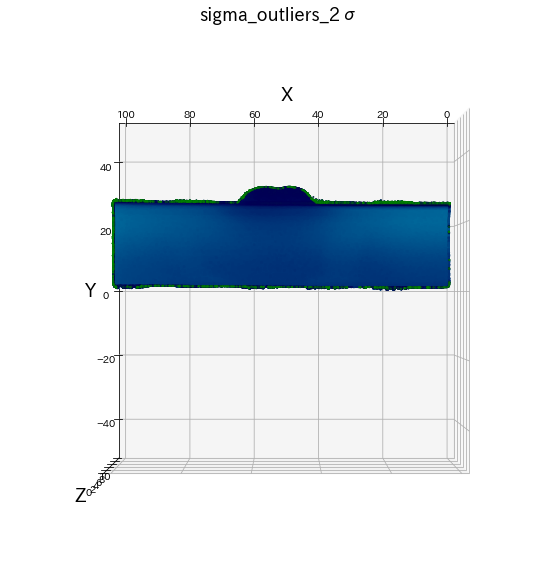

,X,Y,Z
0,1.083087,2.142629,NaN
1,1.106633,2.119084,NaN
2,1.106633,2.166174,NaN
3,1.130178,2.119084,NaN
4,1.130178,2.189720,NaN
...,...,...,...
551302,101.880832,25.570276,5.30876
551303,101.880832,25.593821,NaN
551304,101.880832,25.617367,NaN
551305,101.880832,25.640912,NaN


In [47]:
# sigma_outliers(df, graph_title, sigma_value, oku, yoko)
# 3σで99％のデータ
# 2σで98％のデータ
# σ で97％のデータ
# 5.09541524357202 < value < 5.539604756427975
dfs = Sigma_outliers(dfL, '2σ', 2, -90, 90)
dfs

In [49]:
dfs1 = DeleteOutliers(dfs)

In [50]:
#MakeCsv(dfs1,'dfs1')

## データが少ないところは消去 

In [51]:
# countDelete(df,high_y=200,high_x=100,nan=True,delete=False):
dfLc = CountDelete(dfs,high_y=100,high_x=50,nan=False,delete=True)
dfLc.reset_index(drop=True, inplace=True)


消去するYは[0.211908, 0.235454, 0.258999, 0.282544, 0.30609, 0.329635, 0.353181, 0.376726, 0.400271, 0.423817, 0.447362, 0.470907, 0.494453, 0.517998, 0.541544, 0.565089, 0.588634, 0.61218, 0.635725, 0.706361, 0.753452, 1.553995, 1.601085, 1.624631, 1.671722, 1.695267, 1.742358, 1.765903, 1.812994, 1.836539, 1.88363, 1.907175, 1.954266, 1.977811, 2.024902, 2.048448, 2.095538, 2.119084, 2.166174, 2.18972, 2.236811, 2.260356, 2.307447, 2.330992, 2.378083, 2.401628, 2.448719, 2.472264, 2.519355, 2.5429, 2.589991, 2.613536, 2.660627, 2.684173, 2.731263, 2.754809, 2.801899, 2.825445, 2.872536, 2.896081, 2.943172, 2.966717, 3.013808, 3.037353, 3.084444, 3.107989, 3.15508, 3.178625, 3.225716, 3.249262, 3.296352, 3.319898, 3.366988, 3.390534, 3.437625, 3.46117, 3.508261, 3.531806, 3.578897, 3.602442, 3.649533, 3.673078, 3.720169, 3.743714, 3.790805, 3.814351, 3.861441, 3.884987, 3.932077, 3.955623, 4.002714, 4.026259, 4.07335, 4.096895, 4.143986, 4.167531, 4.214622, 4.238167, 4.285258, 4.308803, 4.

loading: 100%|██████████| 773/773 [00:20<00:00, 37.51keysrokes/s]


消去するXは[1.083087, 1.153723, 1.177269, 1.200814, 1.224359, 1.247905, 1.27145, 1.294996, 1.318541, 1.342086, 1.389177, 1.530449, 1.553995, 1.601085, 1.624631, 1.671722, 1.695267, 1.742358, 1.765903, 1.812994, 1.836539, 1.88363, 1.907175, 1.954266, 1.977811, 2.024902, 2.048448, 2.095538, 2.119084, 2.166174, 2.18972, 2.236811, 2.260356, 2.307447, 2.330992, 2.378083, 2.401628, 2.448719, 2.472264, 2.519355, 2.5429, 2.589991, 2.613536, 2.660627, 2.684173, 2.731263, 2.754809, 2.801899, 2.825445, 2.872536, 2.896081, 2.943172, 2.966717, 3.013808, 3.037353, 3.084444, 3.107989, 3.15508, 3.178625, 3.225716, 3.249262, 3.296352, 3.319898, 3.366988, 3.390534, 3.437625, 3.46117, 3.508261, 3.531806, 3.578897, 3.602442, 3.649533, 3.673078, 3.720169, 3.743714, 3.790805, 3.814351, 3.861441, 3.884987, 3.932077, 3.955623, 4.002714, 4.026259, 4.07335, 4.096895, 4.143986, 4.167531, 4.214622, 4.238167, 4.285258, 4.308803, 4.355894, 4.37944, 4.42653, 4.450076, 4.497166, 4.520712, 4.567803, 4.591348, 4.638439, 4.6

loading: 100%|██████████| 2847/2847 [01:13<00:00, 38.75keysrokes/s]


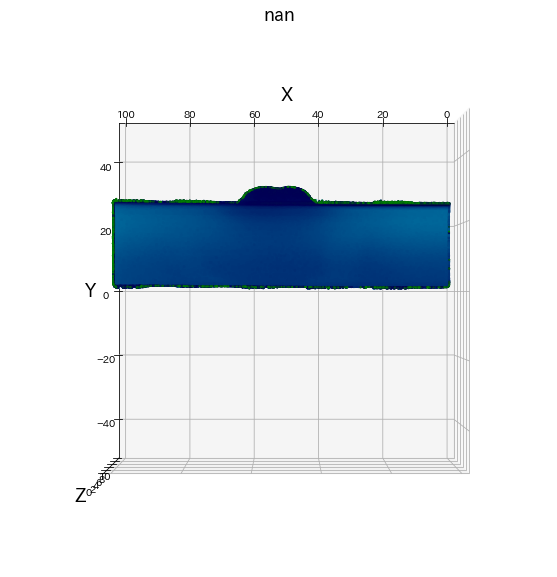

In [52]:
Mapping(dfLc,'nan', -90, 90, save=False)

In [ ]:
#MakeCsv(dfLc,'dfLc')

## 厳しめの外れ値の除去

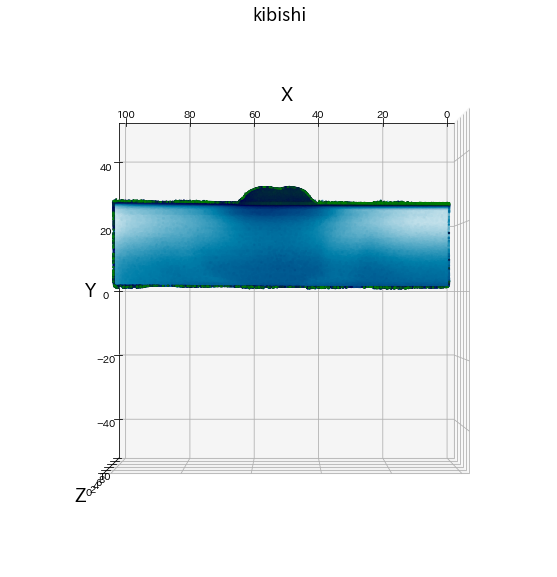

In [54]:
dfLo = DeleteOutliers2(dfLc,5.2,5.376)
Mapping(dfLo, 'kibishi', -90, 90, save=False)

In [55]:
dfLo

,X,Y,Z
3,1.365632,2.283901,5.27281
9,1.365632,2.707718,5.21955
10,1.365632,2.778354,5.31027
11,1.365632,2.848990,5.30135
12,1.365632,2.919626,5.31745
...,...,...,...
532401,101.645379,3.979168,5.23680
532504,101.668924,3.908532,5.20280
533032,101.739560,26.300183,5.28807
533033,101.739560,26.347273,5.30130


In [2763]:
MakeCsv(dfLo,'dfLo')

In [57]:
dfLop = Makepixel(dfLo)
# dfLop.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLop.csv', sep=",")

loading: 100%|██████████| 1432/1432 [01:29<00:00, 16.00keysrokes/s]


# ----------ここから飛ばす

## 飛び値除去

In [65]:
dfLt1 = DeleteTobi_ver(dfLo)

loading: 100%|██████████| 1432/1432 [00:21<00:00, 66.60keysrokes/s]


In [66]:
dfLt1 = DeleteTobi_hori(dfLt1)

loading: 100%|██████████| 518/518 [00:08<00:00, 63.32keysrokes/s] 


In [99]:
dfLt1 = SortXYZ(dfLt1)

loading: 100%|██████████| 1425/1425 [00:07<00:00, 183.53keysrokes/s]


In [67]:
#MakeCsv(dfLt1,'dfLt1')

In [68]:
dfLt2 = DeleteTobi_ver(dfLt1)

loading: 100%|██████████| 1425/1425 [00:19<00:00, 73.68keysrokes/s]


In [69]:
dfLt2 = DeleteTobi_hori(dfLt2)

loading: 100%|██████████| 471/471 [00:06<00:00, 73.24keysrokes/s] 


In [70]:
#MakeCsv(dfLt2,'dfLt2')

In [71]:
dfLt2_c = CountDelete(dfLt2)

消去するYは[1.083087, 1.153723]


loading: 100%|██████████| 2/2 [00:00<00:00, 44.53keysrokes/s]


消去するXは[1.459813, 1.483359, 101.527652, 101.598288]


loading: 100%|██████████| 4/4 [00:00<00:00, 37.08keysrokes/s]


In [72]:
dfLt2_c

,X,Y,Z
57,1.648176,1.224359,5.29842
58,1.718812,1.224359,5.30255
59,1.789448,1.224359,5.30335
60,1.860085,1.224359,5.30321
61,1.930721,1.224359,5.30423
...,...,...,...
515730,48.974377,30.962167,5.23579
515731,49.045014,30.962167,5.24856
515732,49.115650,30.962167,5.24967
515733,49.186286,30.962167,5.24519


In [73]:
#MakeCsv(dfLt2_c,'dfLt2_c')

In [74]:
dfLt2_c_lowess = YlowessMethod(dfLt2_c)

loading: 100%|██████████| 432/432 [01:26<00:00,  4.98keysrokes/s]


In [75]:
dfLt2_c_lowess2 = XlowessMethod(dfLt2_c_lowess)

loading: 100%|██████████| 1416/1416 [01:13<00:00, 19.18keysrokes/s]


In [2095]:
#MakeCsv(dfLt2_c_lowess2,'dfLt2_c_lowess2')

## ピクセルに直す

In [97]:
dfLp = Makepixel(dfLt1)
dfLp

loading: 100%|██████████| 1425/1425 [01:27<00:00, 16.26keysrokes/s]


,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,...,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.551197,101.574742,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.915076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.867985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.844440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.800543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.776997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.729907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.682816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
MakeCsv(dfLp,'dfLp_16_dec')

## カウント少ないやつ消去　→　値ある:255、NAN:0

In [100]:
dfLpc = CountDeleteY(dfLp,90)
#dfLpc_is256.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLpc_is256.csv', sep=",")

loading: 100%|██████████| 497/497 [00:00<00:00, 7437.88keysrokes/s]

[0.65927, 0.682816, 0.729907, 0.776997, 0.800543, 0.824088, 0.847633, 0.871179, 0.894724, 0.91827, 0.941815, 0.96536, 0.988906, 1.012451, 1.035996, 1.059542, 1.083087, 1.106633, 1.130178, 1.153723, 1.177269, 1.200814, 1.247905, 1.27145, 1.318541, 1.342086, 1.389177, 1.412722, 1.459813, 1.483359, 1.530449, 26.064729, 26.11182, 26.135365, 26.182456, 26.206001, 26.253092, 26.276637, 26.323728, 26.347273, 26.394364, 26.417909, 26.465, 26.488546, 26.535636, 26.559182, 26.606272, 26.629818, 26.676908, 26.700454, 26.747545, 26.77109, 26.818181, 26.841726, 26.888817, 29.596535, 29.879079, 30.090988, 30.279351, 30.349987, 30.420623, 30.444168, 30.491259, 30.514804, 30.561895, 30.585441, 30.632531, 30.656077, 30.703167, 30.726713, 30.773804, 30.797349, 30.820894, 30.84444, 30.867985, 30.89153, 30.915076]


In [101]:
MakeCsv(dfLpc,'dfLpc_16_Dec')

## 手探りで微調整

In [80]:
dfLpc_y = dfLpc.index
dfLpc_y = dfLpc_y.tolist()
# エクセルから空白が続くものは消去
delete_list = [dfLpc_y[1],dfLpc_y[3],dfLpc_y[4],dfLpc_y[6],dfLpc_y[7],dfLpc_y[9],dfLpc_y[11],dfLpc_y[13],dfLpc_y[14],dfLpc_y[16],dfLpc_y[18],dfLpc_y[19]]
for i in tqdm(delete_list, unit='keysrokes', desc = 'loading'):
    dfLpc.drop(index=i, inplace=True)

loading: 100%|██████████| 12/12 [00:00<00:00, 429.71keysrokes/s]


In [102]:
dfLpc_y = dfLpc.index
dfLpc_y = dfLpc_y.tolist()

In [104]:
delete_list = [dfLpc_y[1],dfLpc_y[3],dfLpc_y[4],dfLpc_y[6],dfLpc_y[7],dfLpc_y[9],dfLpc_y[11],dfLpc_y[13],dfLpc_y[14],dfLpc_y[16],dfLpc_y[18],dfLpc_y[19]]
delete_list

[30.750258,
 30.608986,
 30.53835,
 30.397078,
 30.326441,
 30.185169,
 30.043897,
 29.902625,
 29.831989,
 29.690716,
 29.549444,
 29.478808]

In [81]:
# 横幅も消去

In [82]:
dfLpc[101.480561] =None

In [83]:
dfLpc_x = dfLpc.columns
dfLpc_x = dfLpc_x.tolist()
delete_x1 = dfLpc_x[:5]
delete_x2 = dfLpc_x[-10:]
delete_x2 
delete_x = [delete_x1,delete_x2]
for i in delete_x:
    for k in i:
        dfLpc[k] =None

In [100]:
#dfLpc.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLpc.csv', sep=",")

In [116]:
dfLpc = pd.read_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLpc.csv',header=0,index_col=0)
dfLpc

,1.506904,1.57754,1.648176,1.718812,1.789448,1.860085,1.930721,2.001357,2.071993,2.142629,...,100.821291,100.891927,100.962563,101.033199,101.103835,101.174471,101.245107,101.315743,101.38638,101.457016
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.679622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.608986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.506904,5.2808,5.29821,5.29842,5.30160,5.30342,5.30334,5.30250,5.30375,5.30471,5.30493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.436268,NaN,5.30152,5.30190,5.30149,5.30172,5.30259,5.30252,5.30264,5.30387,5.30448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.365632,NaN,5.30003,5.30157,5.30260,5.30342,5.30358,5.30312,5.30184,5.30136,5.30144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,5.28449,5.30096,5.30543,5.30451,5.30172,5.30220,5.30190,5.30149,5.30247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 膨張と収縮

In [117]:
dfLpc_not256 = dfLpc.notnull()*255
dfLpc_is256 = dfLpc.isnull()*255

In [118]:
dfLpc

,1.506904,1.57754,1.648176,1.718812,1.789448,1.860085,1.930721,2.001357,2.071993,2.142629,...,100.821291,100.891927,100.962563,101.033199,101.103835,101.174471,101.245107,101.315743,101.38638,101.457016
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.679622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.608986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.506904,5.2808,5.29821,5.29842,5.30160,5.30342,5.30334,5.30250,5.30375,5.30471,5.30493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.436268,NaN,5.30152,5.30190,5.30149,5.30172,5.30259,5.30252,5.30264,5.30387,5.30448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.365632,NaN,5.30003,5.30157,5.30260,5.30342,5.30358,5.30312,5.30184,5.30136,5.30144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,5.28449,5.30096,5.30543,5.30451,5.30172,5.30220,5.30190,5.30149,5.30247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
img_de = dfLpc_is256#値ある：0、値ない：256
#img_de = df_e_oM_256 #値ある：256、値ない：0


gray_de = np.array(img_de, dtype='uint8')#narrayの型に
# グレースケール変換
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# 二値化処理
# gray[gray < 127] = 0
# gray[gray >= 127] = 255

# カーネルの定義
kernel = np.ones((6, 6), np.uint8)

# 膨張・収縮処理(方法2)
dilate = cv2.dilate(gray_de, kernel)#膨張
erode = cv2.erode(dilate, kernel)#収縮

# 結果を出力
cv2.imwrite(
        "C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dilate_c.png", dilate)
cv2.imwrite(
        "C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\erode_c.png", erode)
#---------------------------------------------------------------------------------
dilate2 = cv2.dilate(gray_de, kernel,2)#膨張
erode2 = cv2.erode(dilate, kernel,2)#収縮

# 結果を出力
cv2.imwrite(
        "C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dilate_c2.png", dilate2)
cv2.imwrite(
        "C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\erode_c2.png", erode2)
#---------------------------------------------------------------------------------
dilate3 = cv2.dilate(gray_de, kernel,3)#膨張
erode3 = cv2.erode(dilate, kernel,3)#収縮

# 結果を出力
cv2.imwrite(
        "C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dilate_c3.png", dilate3)
cv2.imwrite(
        "C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\erode_c3.png", erode3)
#---------------------------------------------------------------------------------
dilate4 = cv2.dilate(gray_de, kernel,4)#膨張
erode4 = cv2.erode(dilate, kernel,4)#収縮

# 結果を出力
cv2.imwrite(
        "C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dilate_c4.png", dilate4)
cv2.imwrite(
        "C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\erode_c4.png", erode4)
#---------------------------------------------------------------------------------

True

# エッジ検出

## sobel

In [111]:
Sobel(erode4,'1')

AttributeError: 'numpy.ndarray' object has no attribute 'index'

## Lapracian

In [120]:
Lapracian(erode4,'16_Dec')

AttributeError: 'numpy.ndarray' object has no attribute 'index'

## Canny

In [ ]:
Canny(erode4,'16_Dec')

# lowessを行う

In [ ]:
a = YlowessMethod(dfLt2_c_lowess2)
b = XlowessMethod(a)

In [28]:
print(a)

            X          Y         Z
0   14.503950   0.659270  5.222200
1   14.574586   0.659270  5.223996
2   14.645222   0.659270  5.225856
3   14.715859   0.659270  5.227753
4   15.492856   0.659270  5.244480
..        ...        ...       ...
4   49.186286  30.962167  5.245190
5   49.256922  30.962167  5.242450
6   49.327558  30.962167  5.195860
7   49.398194  30.962167  5.100880
8   49.680739  30.962167  5.124070

[529144 rows x 3 columns]


# データの情報を見る

In [32]:
b.describe()

,X,Y,Z
count,529144.000000,529144.000000,529144.000000
mean,51.644635,14.180669,5.320993
std,28.587394,7.679556,0.022370
min,1.365632,0.659270,5.107381
25%,27.218452,7.581610,5.309591
50%,51.729186,14.150770,5.318685
75%,76.028012,20.719929,5.335551
max,101.763105,30.962167,5.366008


<AxesSubplot:ylabel='Z'>

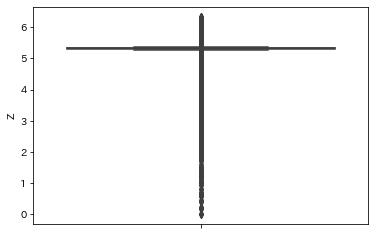

In [33]:
sns.boxplot(y="Z", data=dfL)

<AxesSubplot:ylabel='Z'>

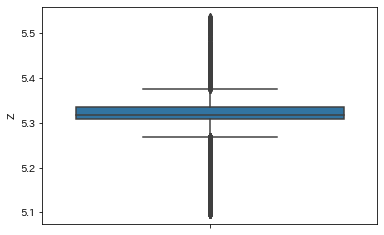

In [34]:
sns.boxplot(y="Z", data=dfL2)

<AxesSubplot:ylabel='Z'>

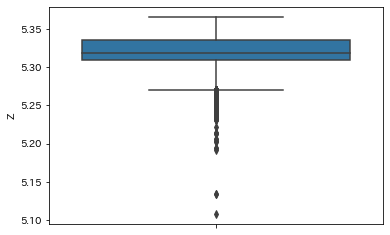

In [35]:
sns.boxplot(y="Z", data=b)

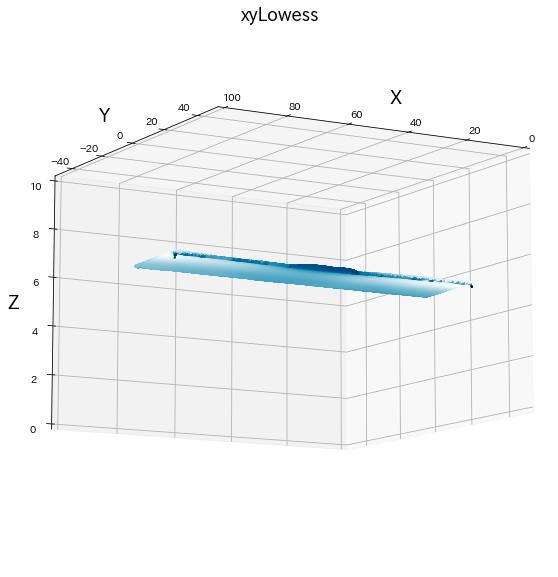

In [36]:
#mapping(b,'xyLowess', -10, 60, save=True)

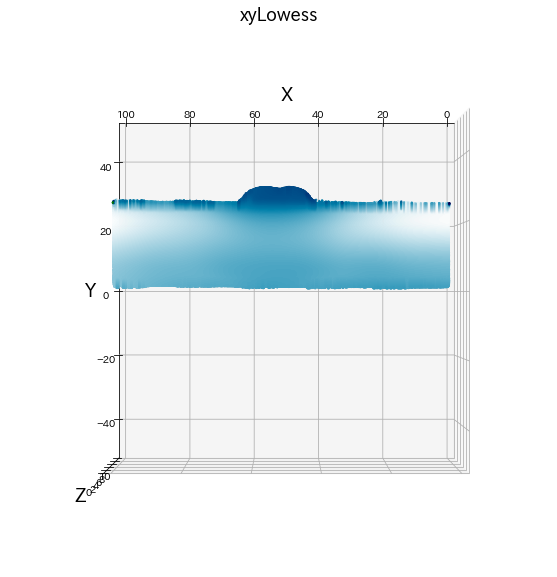

In [37]:
#mapping(b,'xyLowess', -90, 90, save=True)

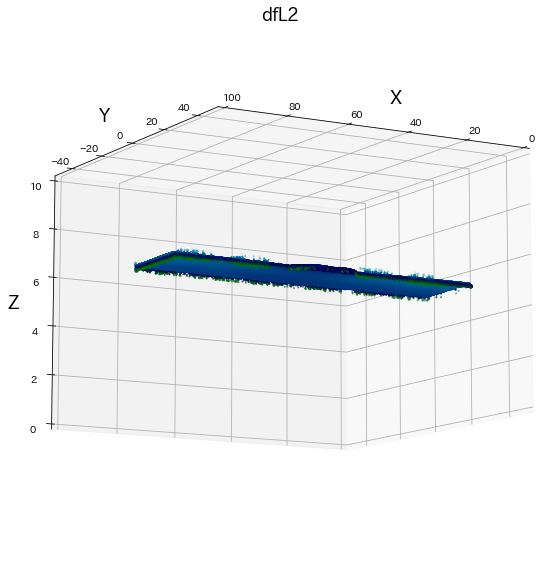

In [38]:
#mapping(dfL2,'dfL2', -10, 60, save=False)

In [39]:
b.sort_values('Y')

,X,Y,Z
0,14.503950,0.659270,5.304105
16204,21.850107,0.659270,5.298364
12169,19.660387,0.659270,5.303389
10691,18.812754,0.659270,5.303398
4427,16.057945,0.659270,5.298751
...,...,...,...
342438,49.115650,30.962167,5.245508
342016,49.045014,30.962167,5.245627
292787,49.327558,30.962167,5.244556
341594,48.974377,30.962167,5.245339


In [41]:
dfL2

,X,Y,Z
0,17.918029,0.211908,NaN
1,17.941575,0.211908,NaN
2,19.872295,0.211908,NaN
3,17.894484,0.235454,NaN
4,17.965120,0.235454,NaN
...,...,...,...
551302,49.445285,31.032803,NaN
551303,49.468830,31.032803,NaN
551304,49.398194,31.056348,NaN
551305,49.445285,31.056348,NaN


In [42]:
b_x = b['X'].unique()

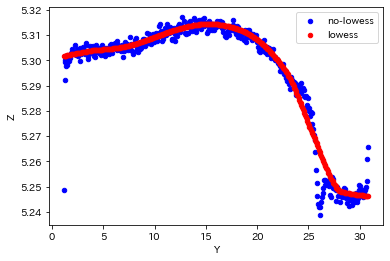

In [43]:
i = 950
ax = dfL2[dfL2.X==b_x[i]].plot.scatter(x='Y',y='Z',color='blue', label='no-lowess')
b[b.X==b_x[i]].plot.scatter(x='Y',y='Z',color='red', ax=ax, label='lowess')
ax.legend()

In [44]:
b_x[i]

55.755445

In [45]:
b[b.X==2.61353]

,X,Y,Z


# 要らないデータは消す

## 生データ　→　データ数少ないやつ消去　→　中央値±2σ　

loading: 100%|██████████| 2847/2847 [01:19<00:00, 36.02keysrokes/s]


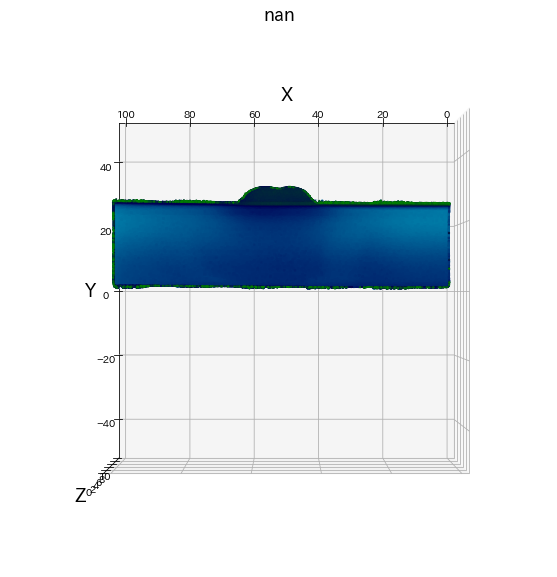

In [46]:
# countDelete(df,high_y=200,high_x=100,nan=True,delete=False):
dfLL_100_50 = countDelete(dfL,high_y=100,high_x=50,nan=False,delete=True)
dfLLs_100_50 = deleteOutliers(dfLL_100_50)
dfLLs_100_50.reset_index(drop=True, inplace=True)
mapping(dfLLs_100_50,'nan', -90, 90, save=False)

In [47]:
#dfLLs_100_50.to_excel('dfLLs_100_50.xlsx')

In [48]:
c = YlowessMethod(dfLLs_100_50)
d = XlowessMethod(c)

loading: 100%|█████████▉| 1430/1432 [01:14<00:00, 39.05keysrokes/s]C:\Users\owner\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
loading: 100%|██████████| 1432/1432 [01:14<00:00, 19.30keysrokes/s]


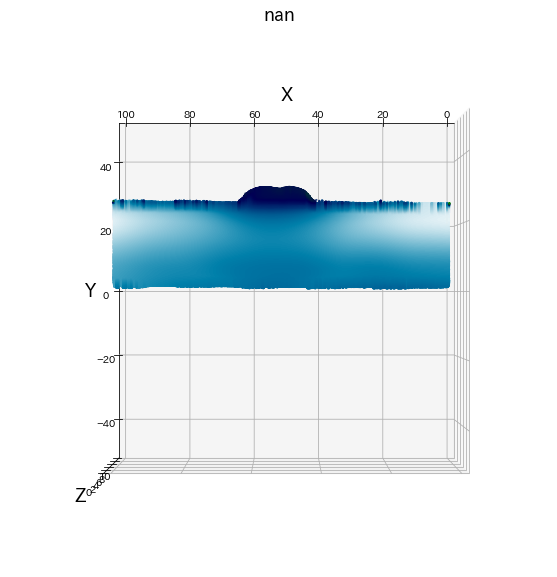

In [49]:
mapping(d,'nan', -90, 90, save=False)

## 生データ　→　中央値±2σ　→　データ数少ないやつ消去　

loading: 100%|██████████| 2755/2755 [01:17<00:00, 35.66keysrokes/s]


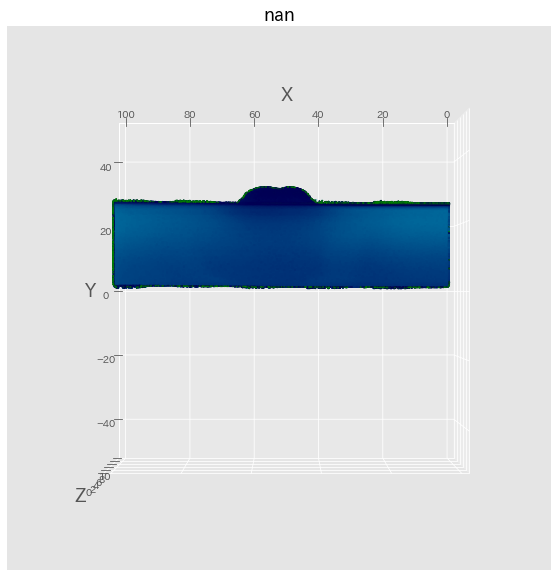

In [1260]:
# countDelete(df,high_y=200,high_x=100,nan=True,delete=False):
df_e = deleteOutliers(dfL)
df_e = countDelete(df_e,high_y=100,high_x=50,nan=False,delete=True)
df_e.reset_index(drop=True, inplace=True)
mapping(df_e,'nan', -90, 90, save=False)

In [1262]:
df_e

,X,Y,Z
0,14.503950,0.659270,5.23445
1,14.574586,0.659270,5.24008
2,14.645222,0.659270,5.20724
3,14.715859,0.659270,5.21399
4,15.492856,0.659270,5.45251
...,...,...,...
529040,49.186286,30.962167,5.24519
529041,49.256922,30.962167,5.24245
529042,49.327558,30.962167,5.19586
529043,49.398194,30.962167,5.10088


In [1265]:
df_e = sortXY(df_e)

loading: 100%|██████████| 1429/1429 [00:09<00:00, 158.46keysrokes/s]


In [1266]:
df_e

,X,Y,Z
0,1.365632,2.283901,5.27281
1,1.365632,2.354537,5.19821
2,1.365632,2.425173,5.18058
3,1.365632,2.707718,5.21955
4,1.365632,2.778354,5.31027
...,...,...,...
529040,101.668924,26.088274,5.13261
529041,101.668924,26.158910,5.11945
529042,101.668924,26.229546,5.12547
529043,101.668924,26.300183,5.14251


In [1269]:
df_e.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\df_e_ueari.csv', sep=",")

In [66]:
e = YlowessMethod(df_e)
f = XlowessMethod(e)

loading: 100%|██████████| 1429/1429 [01:14<00:00, 19.17keysrokes/s]


In [67]:
f

,X,Y,Z
0,14.503950,0.659270,5.304104
1,14.503950,0.729907,5.304227
2,14.503950,0.800543,5.304350
3,14.503950,0.847633,5.304432
4,14.503950,0.871179,5.304473
...,...,...,...
55,101.645379,22.839013,5.363633
56,101.645379,22.909649,5.363602
57,101.645379,22.980285,5.363571
58,101.645379,26.300183,5.362008


In [68]:
f = sort_xy(f)
f.reset_index(drop=True, inplace=True)

loading: 100%|██████████| 1429/1429 [00:04<00:00, 294.72keysrokes/s]


In [69]:
f

,X,Y,Z
0,1.365632,2.283901,5.308022
1,1.365632,2.354537,5.308277
2,1.365632,2.425173,5.308530
3,1.365632,2.707718,5.309536
4,1.365632,2.778354,5.309784
...,...,...,...
528724,101.668924,26.088274,5.329095
528725,101.668924,26.158910,5.327784
528726,101.668924,26.229546,5.326470
528727,101.668924,26.300183,5.325153


loading: 100%|██████████| 466/466 [00:00<00:00, 1186.28keysrokes/s]


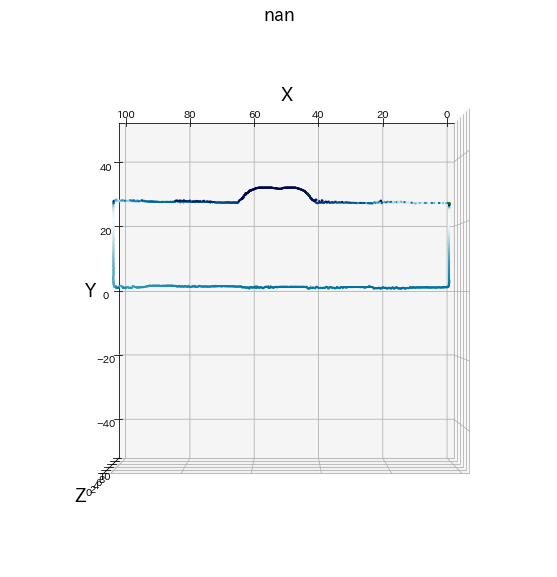

,X,Y,Z
0,1.365632,2.283901,5.308022
1,1.412722,1.789448,5.304896
2,1.436268,1.718812,5.306632
3,1.459813,2.001357,5.306756
4,1.483359,1.506904,5.303907
...,...,...,...
3785,59.287251,30.467714,5.251321
3786,59.075343,30.538350,5.250475
3787,58.863434,30.608986,5.250070
3788,58.580890,30.679622,5.250333


In [75]:
f_mm = max_min(f,upper=True,bottom=True,right=True,left=True)
mapping(f_mm,'nan', -90, 90, save=False)
f_mm

In [77]:
f_mu = max_min(f,bottom=True,upper=False,right=False,left=False)

loading: 100%|██████████| 1429/1429 [00:01<00:00, 1368.55keysrokes/s]


In [78]:
f_ma = max_min(f,bottom=False,upper=True,right=False,left=False)
f_maL = lowess_2(f_ma['X'],f_ma['Y'])
#f_maL.to_excel('f_maL.xlsx')

loading: 100%|██████████| 1429/1429 [00:01<00:00, 1370.76keysrokes/s]


In [79]:
f_mr = max_min(f,bottom=False,upper=False,right=True,left=False)
f_mrL = lowess_2(f_mr['Y'],f_mr['X'])
#f_mrL.to_excel('f_mrL.xlsx')

loading: 100%|██████████| 466/466 [00:00<00:00, 1280.74keysrokes/s]


In [80]:
f_ml = max_min(f,bottom=False,upper=False,right=False,left=True)
f_mlL = lowess_2(f_ml['Y'],f_ml['X'])
f_mlL.to_excel('f_mlL.xlsx')

loading: 100%|██████████| 466/466 [00:00<00:00, 1269.54keysrokes/s]


In [81]:
#lowess_2(x, y,frac=0.2)
f_muL = lowess_2(f_mu['X'],f_mu['Y'])

In [82]:
f_muL

,X,Y,Z
0,1.365632,1.051968,NaN
1,1.412722,1.051260,NaN
2,1.436268,1.050906,NaN
3,1.459813,1.050551,NaN
4,1.483359,1.050197,NaN
...,...,...,...
1424,101.551197,0.781537,NaN
1425,101.598288,0.779382,NaN
1426,101.621833,0.778305,NaN
1427,101.645379,0.777229,NaN


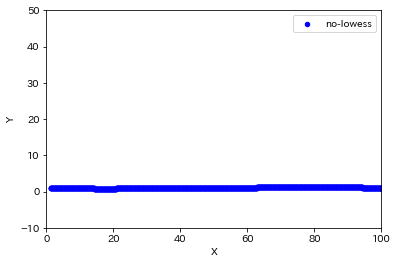

In [83]:
i = 950
ax = f_muL.plot.scatter(x='X',y='Y',color='blue', label='no-lowess')
# b[b.X==b_x[i]].plot.scatter(x='Y',y='Z',color='red', ax=ax, label='lowess')
ax.set_xlim(0, 100)
ax.set_ylim(-10, 50)
ax.legend()

In [84]:
#f_muL.to_excel('f_muL.xlsx')

# RANSAC

In [85]:
class PolynomialLeastSquare:
    """
    多項式最小二乗法
    
    Attributes
    ----------
    coefficients : int
        使用する弱分類器の数
    d : int
        fitting を行う多項式の次数
    """
    
    def fit(self, x, y, d):
        """
        回帰曲線の係数を計算
        
        Parameters
        ----------
        x : numpy array [float]
        y : numpy array [float]
        d : int
            fitting する多項式の次数
        """
        n = len(x)
        # x のべき乗を計算
        x_pow = [np.full(n, 1.)]
        for i in range(2*d):
            x_pow.append(x_pow[-1] * x)
        x_pow = np.array(x_pow)
        # 行列 S を計算
        s = []
        for i in range(2*d+1):
            s.append(np.sum(x_pow[i]))
        S = np.zeros([d+1, d+1])
        for i in range(d+1):
            for j in range(d+1):
                S[i][j] = s[i+j]
        # ベクトル t を計算
        t = []
        for i in range(d+1):
            t.append(np.sum(x_pow[i]*y))
        t = np.matrix(t).T
        # 係数を求める
        S_inv = np.linalg.inv(S)
        self.coefficients = np.array(np.dot(S_inv, t)).flatten()
        self.d = d
    
    def predict(self, x):
        """
        学習済み回帰曲線を使って未知の x を変換
        
        Parameters
        ----------
        x : numpy array [float]
        """
        x_pow = np.full(len(x), 1.)
        y = np.zeros(len(x))
        for i in range(len(self.coefficients)):
            y += x_pow * self.coefficients[i]
            x_pow *= x
        return y

In [86]:
class RANSAC:
    """
    Attributes
    ----------
    mse : float
        平均二乗誤差 (Mean Square Error)
    ls_best : object
        最適な最小二乗法モデル
    x_inliers_best : numpy array [float]
        最適モデルを学習した際の正常値 x
    y_inliers_best : numpy array [float]
        最適モデルを学習した際の正常値 y
    """
    
    def __init__(self, max_trials, residual_threshold, min_inliers_rate):
        """
        Parameters
        ----------
        max_trials : int
            ランダムサンプリングによる fitting を試行する最大回数
        residual_threshold : float
            ランダムサンプルから学習したモデルとの残差がこれ以内であれば「正常値」とみなす
        min_inliers_rate : float
            [0, 1] の小数。データサンプル全体に占める正常値の割合がこれ以下のものは最適モデルの候補に含めない
        """
        self.max_trials = max_trials
        self.residual_threshold = residual_threshold
        self.min_inliers_rate = min_inliers_rate
    
    def predict(self, x):
        return self.ls_best.predict(x)
    
    def fit(self, x, y, d):
        """
        Parameters
        ----------
        x : numpy array [float]
        y : numpy array [float]
        d : int
            fitting する多項式の次数
        """
        n = len(x)
        # ランダムサンプリングの件数は最小限（モデルの自由度と同じ）にする
        n_part = d+1
        mse_min = np.inf
        ls_best = None
        x_inliers_best = None
        y_inliers_best = None
        for t in range(self.max_trials):
            ids_part = np.random.choice(n, n_part, replace=False)
            x_part, y_part = x[ids_part], y[ids_part]
            ls_part = PolynomialLeastSquare()
            ls_part.fit(x_part, y_part, d)
            ids_inliers = self.__detect_inliers_indices(x, y, ls_part)
            if len(ids_inliers) / n < self.min_inliers_rate:
                continue
            x_inliers, y_inliers = x[ids_inliers], y[ids_inliers]
            ls_inliers = PolynomialLeastSquare()
            ls_inliers.fit(x_inliers, y_inliers, d)
            mse = self.__calc_mse(x_inliers, y_inliers, ls_inliers)
            if mse < mse_min:
                mse_min = mse
                ls_best = ls_inliers
                x_inliers_best, y_inliers_best = x_inliers, y_inliers
        self.mse = mse_min
        self.ls_best = ls_best
        self.x_inliers_best, self.y_inliers_best = x_inliers_best, y_inliers_best
    
    def __detect_inliers_indices(self, x, y, model):
        """
        回帰モデルに対する正常値（のインデックス）を見つける
        """
        y_pred = model.predict(x)
        return np.where(np.abs(y-y_pred) < self.residual_threshold)[0]
    
    def __calc_mse(self, x, y, model):
        """
        回帰モデルに対するデータの平均二乗誤差（MSE）を計算
        """
        y_pred = model.predict(x)
        return np.average((y_pred-y)**2)

7.735881445325376
[4.9129256  0.99395623 0.51144472 0.21267642]
[14.04356389 -0.04535867  0.49259882  0.23188196]


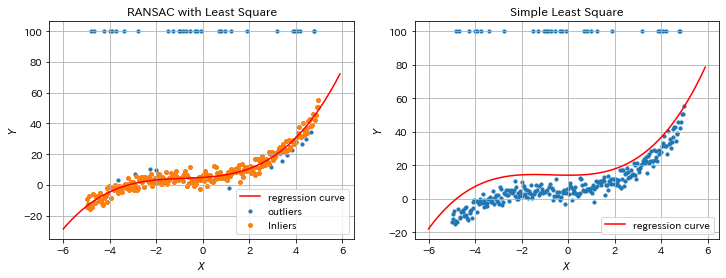

In [87]:
from matplotlib import pyplot as plt

# データ作成
N = 300
x = np.arange(-5, 5, 10/N)
y = x + 0.5*x**2 + 0.2*x**3 + 5 + np.random.randn(len(x))*3
y[np.random.choice(N, N//10, replace=False)] = 100

# RANSAC の fitting
rs = RANSAC(max_trials=100, residual_threshold=10, min_inliers_rate=0.8)
rs.fit(x, y, 3)
print(rs.mse)
# 6.369557871749816
print(rs.ls_best.coefficients)
# [6.09388684 0.92936235 0.37627244 0.18876938]

# 単純な最小二乗法の fitting
ls = PolynomialLeastSquare()
ls.fit(x, y, 3)
print(ls.coefficients)
# [16.09783541  1.51332226  0.23445353  0.19353104]

# 回帰曲線を描画
xp = np.arange(-6, 6, 0.1)
yp_rs = rs.predict(xp)
yp_ls = ls.predict(xp)
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(12,4))
axL.set_title('RANSAC with Least Square')
axL.set_xlabel('$X$')
axL.set_ylabel('$Y$')
axL.scatter(x, y, s=10, label='outliers')
axL.scatter(rs.x_inliers_best, rs.y_inliers_best, s=15, label='Inliers')
axL.plot(xp, yp_rs, c='r', label='regression curve')
axL.grid()
axL.legend()
axR.set_title('Simple Least Square')
axR.set_xlabel('$X$')
axR.set_ylabel('$Y$')
axR.scatter(x, y, s=10)
axR.plot(xp, yp_ls, c='r', label='regression curve')
axR.grid()
axR.legend()
plt.show()

In [88]:
x_e = df_e['X']
np.array(x_e)

array([14.50395 , 14.574586, 14.645222, ..., 58.015801, 58.086437,
       58.157073])

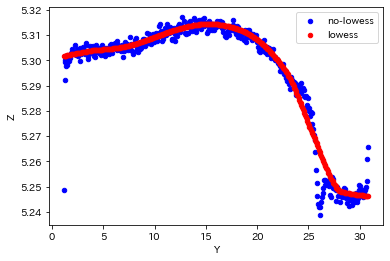

In [90]:
i = 950
ax = dfL2[dfL2.X==b_x[i]].plot.scatter(x='Y',y='Z',color='blue', label='no-lowess')
b[b.X==b_x[i]].plot.scatter(x='Y',y='Z',color='red', ax=ax, label='lowess')

ax.legend()

In [91]:
df_e

,X,Y,Z
0,14.503950,0.659270,5.23445
1,14.574586,0.659270,5.24008
2,14.645222,0.659270,5.20724
3,14.715859,0.659270,5.21399
4,15.492856,0.659270,5.45251
...,...,...,...
528724,57.874529,30.750258,5.26594
528725,57.945165,30.750258,5.26386
528726,58.015801,30.750258,5.25923
528727,58.086437,30.750258,5.25349


In [92]:
df_eY = df_e['Y'].unique()

0.00011869923395839535
[ 5.38188611e+00 -1.90960810e-03  9.57011176e-06  8.13870873e-08]
[ 5.38188611e+00 -1.90960810e-03  9.57011176e-06  8.13870873e-08]


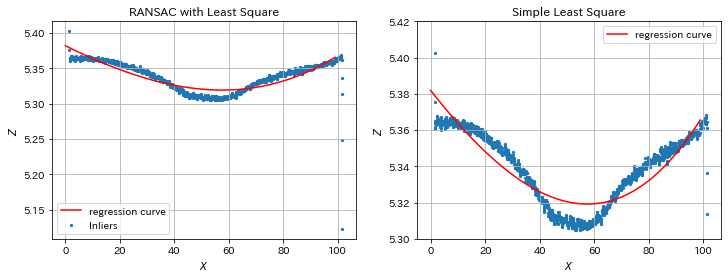

In [93]:
i = 300
df_ei = df_e[df_e.Y==df_eY[i]]
from matplotlib import pyplot as plt
x_e = df_ei['X']
y_e = df_ei['Z']
x = np.array(x_e)
y = np.array(y_e)

# RANSAC の fitting
rs = RANSAC(max_trials=100, residual_threshold=10, min_inliers_rate=0.8)
rs.fit(x, y, 3)
print(rs.mse)
# 6.369557871749816
print(rs.ls_best.coefficients)
# [6.09388684 0.92936235 0.37627244 0.18876938]

# 単純な最小二乗法の fitting
ls = PolynomialLeastSquare()
ls.fit(x, y, 3)
print(ls.coefficients)
# [16.09783541  1.51332226  0.23445353  0.19353104]

# 回帰曲線を描画
xp = np.arange(0, 100, 1)
yp_rs = rs.predict(xp)
yp_ls = ls.predict(xp)
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(12,4))
#fig, axL = plt.subplots(ncols=1, figsize=(12,4))
axL.set_title('RANSAC with Least Square')
axL.set_xlabel('$X$')
axL.set_ylabel('$Z$')
#axL.scatter(x, y, s=10, label='outliers')
axL.scatter(rs.x_inliers_best, rs.y_inliers_best, s=5, label='Inliers')
axL.plot(xp, yp_rs, c='r', label='regression curve')
axL.grid()
axL.legend()
axR.set_title('Simple Least Square')
axR.set_xlabel('$X$')
axR.set_ylabel('$Z$')
axR.scatter(x, y, s=5)
axR.plot(xp, yp_ls, c='r', label='regression curve')
axR.grid()
axR.legend()
plt.ylim(5.3,5.42)
plt.show()

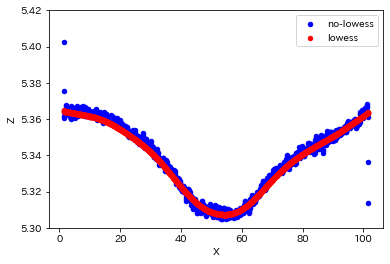

In [94]:
i = 300
ax = df_e[df_e.Y==df_eY[i]].plot.scatter(x='X',y='Z',color='blue', label='no-lowess')
b[b.Y==df_eY[i]].plot.scatter(x='X',y='Z',color='red', ax=ax, label='lowess')
ax.set_ylim([5.3,5.42])
ax.legend()

In [95]:
y

array([5.40244, 5.37534, 5.36151, ..., 5.31357, 5.24778, 5.12261])

# フィルタ

(1, 12)


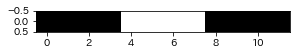

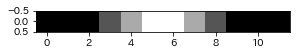

[[0.  0.  0.  0.3 0.6 0.9 0.9 0.6 0.3 0.  0.  0. ]]


In [96]:
X = np.array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]],dtype=float)
print(X.shape)
 
plt.figure(figsize=(10, 5), dpi=72)
plt.subplot(1,2,1); plt.imshow(X, cmap='gray')
plt.show()
 
# カーネル
W1 = np.array([[0.3, 0.3, 0.3]])
 
# 畳み込み
C1 = np.copy(X)
for i in range(3,13,1):
    C1[0,i-2] = np.dot(X[0,i-3:i],W1[0,:])

plt.figure(figsize=(10, 5), dpi=72)
plt.subplot(1,2,2); plt.imshow(C1, cmap='gray')
plt.show()
print(C1)

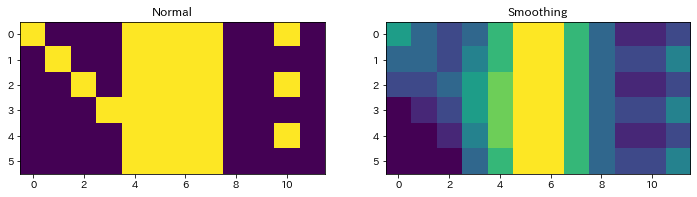

In [97]:
img_bgr =np.array([[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
                   [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
                   [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
                   [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
                  ],dtype=float)
kernel = np.ones((3,3)) / 9.0
img_kel = cv2.filter2D(img_bgr,-1,kernel)
 
plt.figure(figsize=(12, 12), dpi=72)
plt.subplot(1,2,1);plt.imshow(img_bgr);plt.title('Normal')
plt.subplot(1,2,2);plt.imshow(img_kel);plt.title('Smoothing')
plt.show()

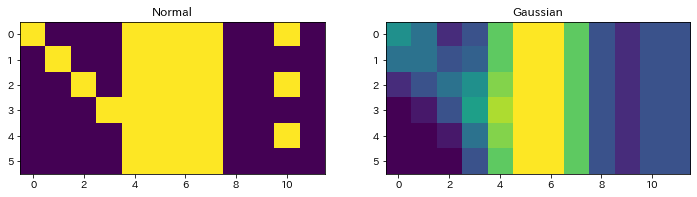

In [98]:
img_bgr =np.array([[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
                   [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
                   [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
                   [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
                   [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
                  ],dtype=float)
kernel = np.ones((3,3)) / 9.0
#img_kel = cv2.medianBlur(img_bgr,3)
img_kel = cv2.GaussianBlur(img_bgr, (3, 3), 0)
 
plt.figure(figsize=(12, 12), dpi=72)
plt.subplot(1,2,1);plt.imshow(img_bgr);plt.title('Normal')
plt.subplot(1,2,2);plt.imshow(img_kel);plt.title('Gaussian')
plt.show()

# 箱ひげ図

In [687]:
import matplotlib.pyplot as plt
import seaborn as sns


def BoxPlot(df,title):
    
    plt.style.use("ggplot")     # グラフのデザインを指定する
    sns.set_palette('Set2')     # グラフの色を指定する

    import warnings
    warnings.filterwarnings('ignore') # 警告メッセージを出ないようにしている

    df = df
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.boxplot(df["Z"])
    plt.show()
    quantile1,quantile2,quantile3 = df["Z"].quantile([0.25, 0.5, 0.75])
    print("第1四分位数" + str(quantile1))
    print("第2四分位数" + str(quantile2))
    print("第3四分位数" + str(quantile3))
# ドットは外れ値（(第1四分位点) – 1.5 x IQR より小さい値、(第3四分位点) + 1.5 x IQR より大きい値）

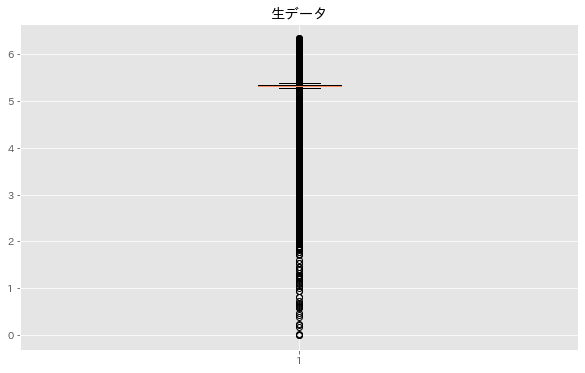

第1四分位数5.30761
第2四分位数5.31751
第3四分位数5.33475


In [704]:
BoxPlot(dfL,'生データ')


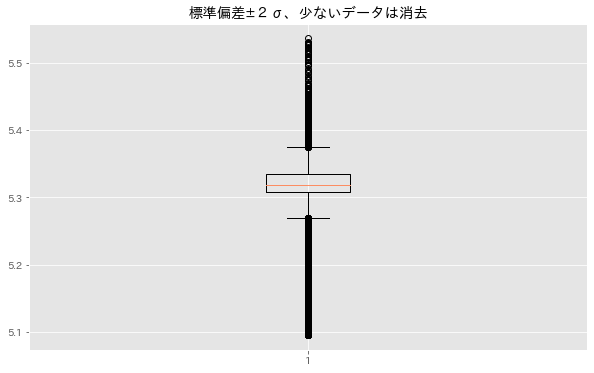

第1四分位数5.30865
第2四分位数5.3182
第3四分位数5.33526


In [705]:
BoxPlot(df_e,'標準偏差±２σ、少ないデータは消去')

Y = 26.865271


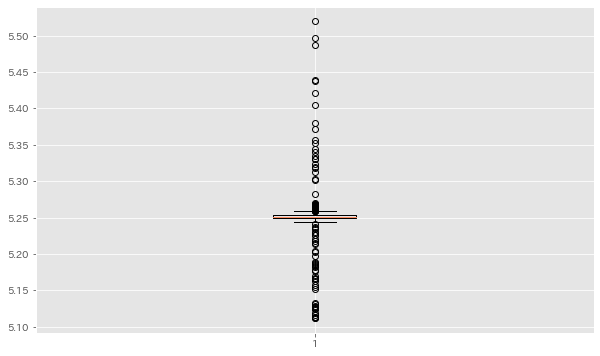

第1四分位数5.249015
第2四分位数5.25067
第3四分位数5.2531099999999995


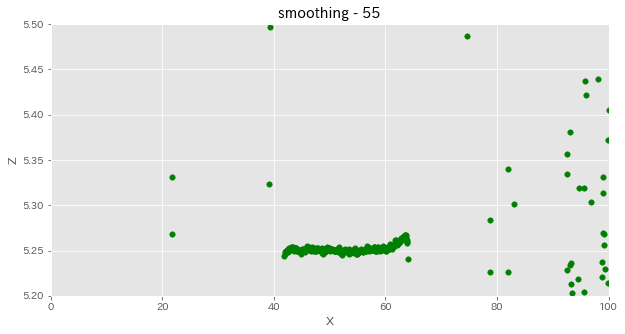

Y = 26.794635


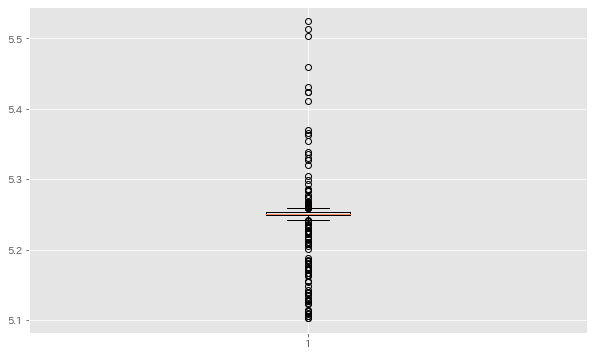

第1四分位数5.2485975
第2四分位数5.250870000000001
第3四分位数5.2528875


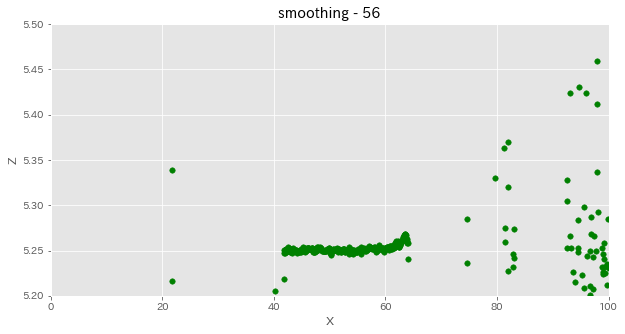

Y = 26.723999


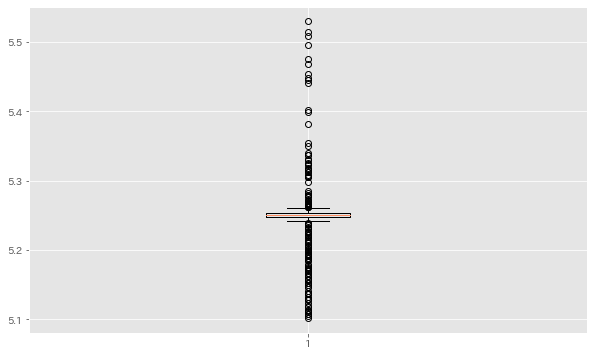

第1四分位数5.2485025
第2四分位数5.25113
第3四分位数5.2536175


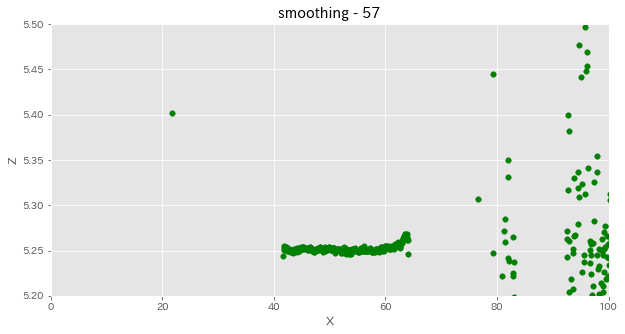

Y = 26.653363


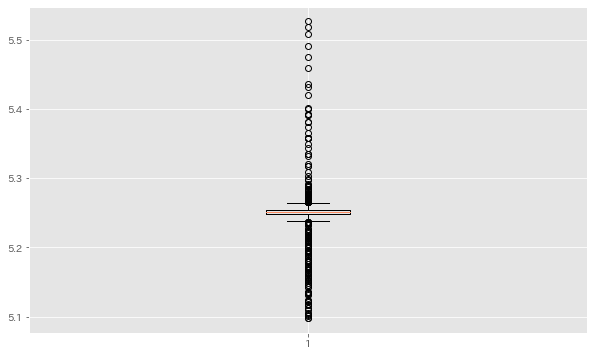

第1四分位数5.24771
第2四分位数5.2507
第3四分位数5.254485


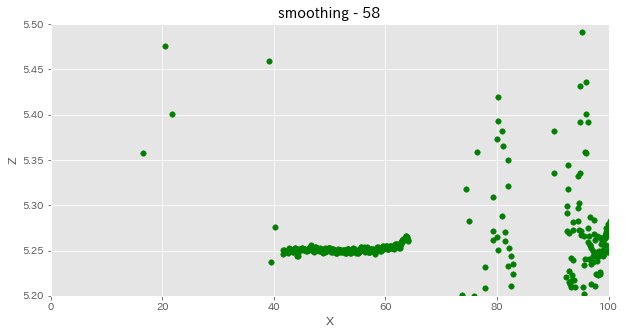

Y = 26.629818


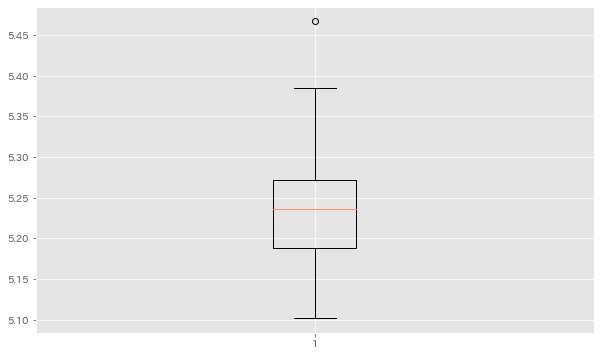

第1四分位数5.18759
第2四分位数5.23566
第3四分位数5.27154


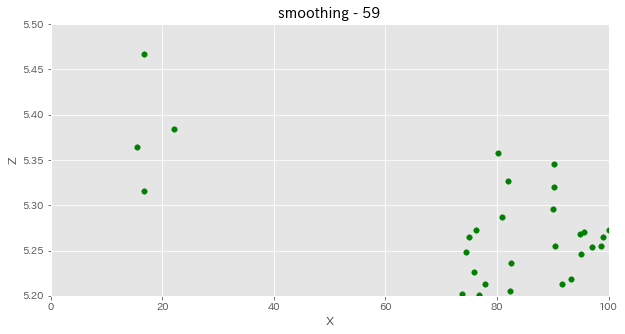

Y = 26.582727


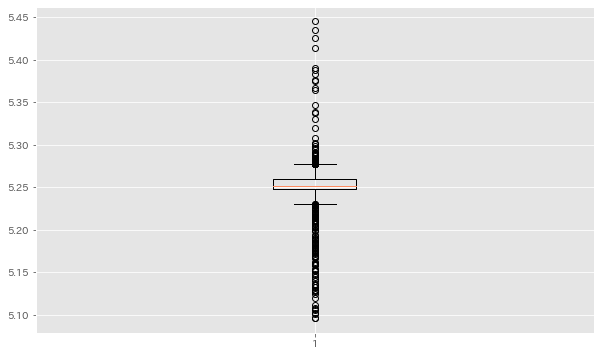

第1四分位数5.247835
第2四分位数5.25109
第3四分位数5.25939


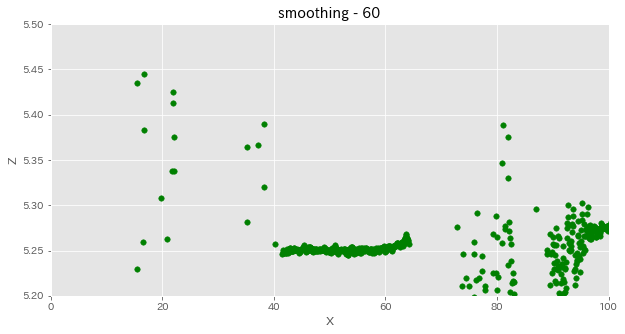

Y = 26.559182


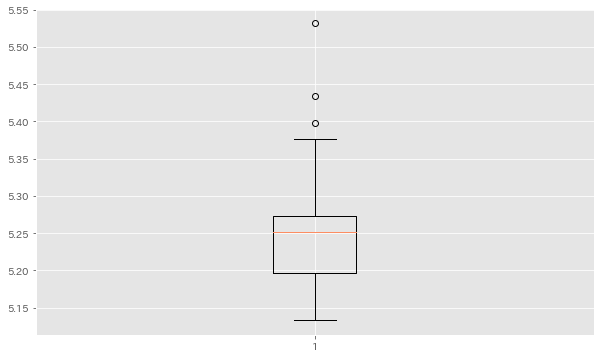

第1四分位数5.19607
第2四分位数5.25127
第3四分位数5.273115


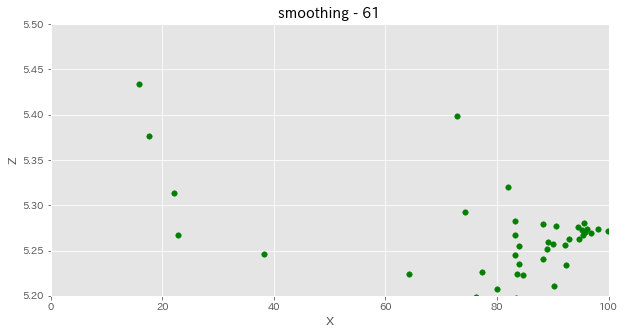

Y = 26.535636


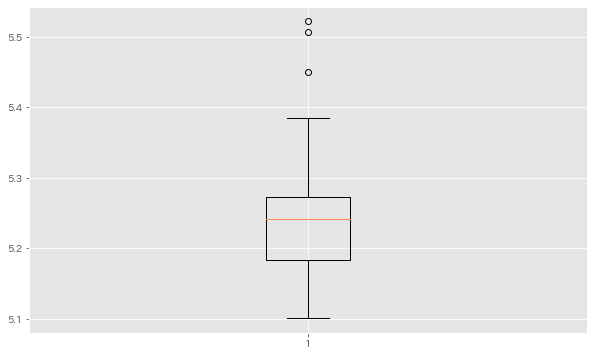

第1四分位数5.1831949999999996
第2四分位数5.24177
第3四分位数5.273045


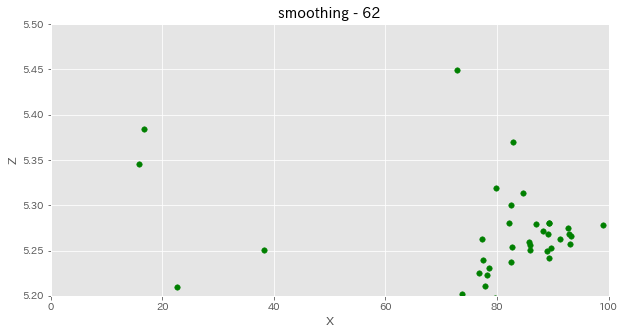

Y = 26.512091


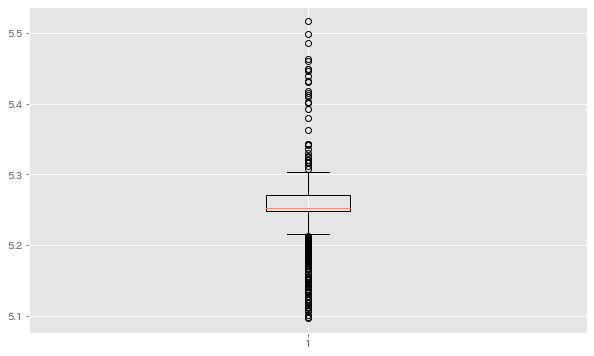

第1四分位数5.2490749999999995
第2四分位数5.252
第3四分位数5.2713


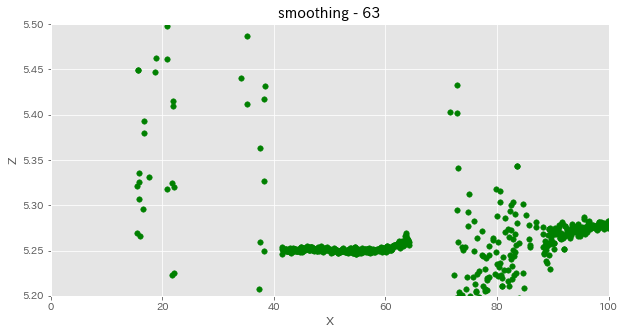

Y = 26.488546


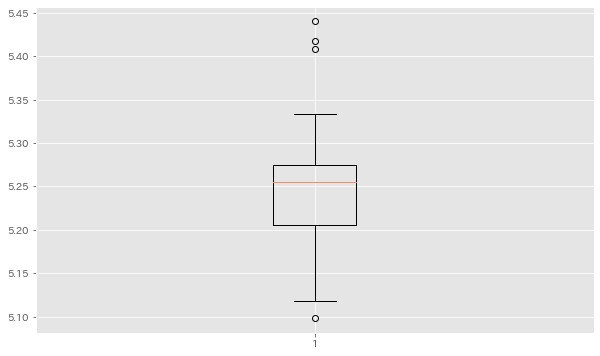

第1四分位数5.2055125
第2四分位数5.255565000000001
第3四分位数5.274145


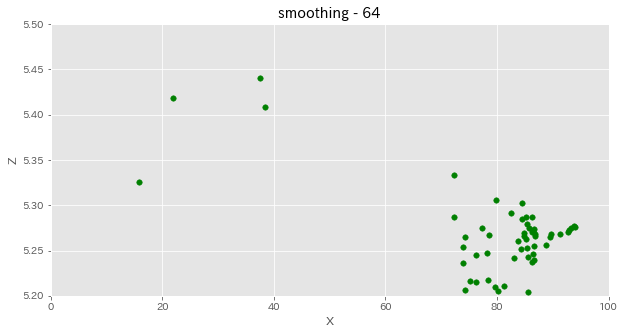

Y = 26.465


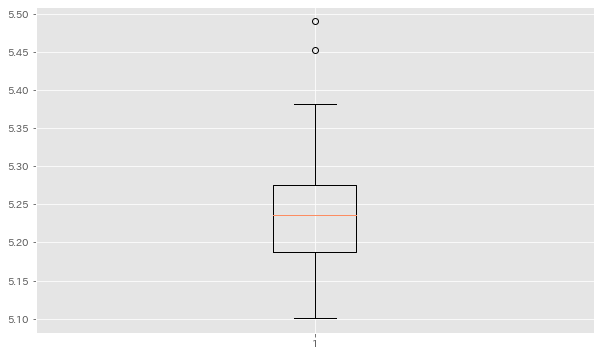

第1四分位数5.18732
第2四分位数5.23655
第3四分位数5.27484


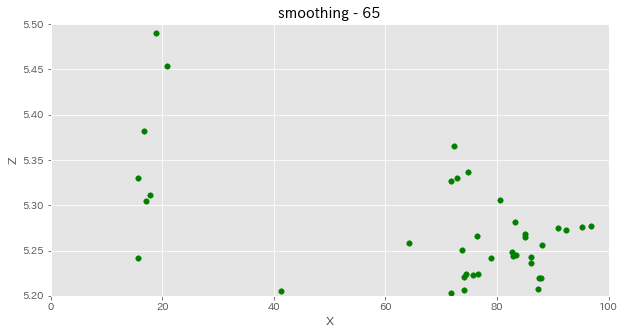

Y = 26.441455


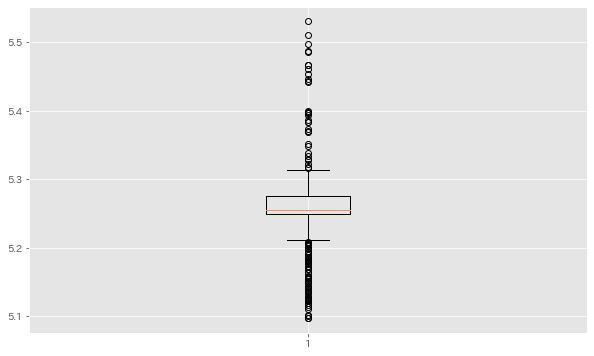

第1四分位数5.2489375
第2四分位数5.254345
第3四分位数5.2747875


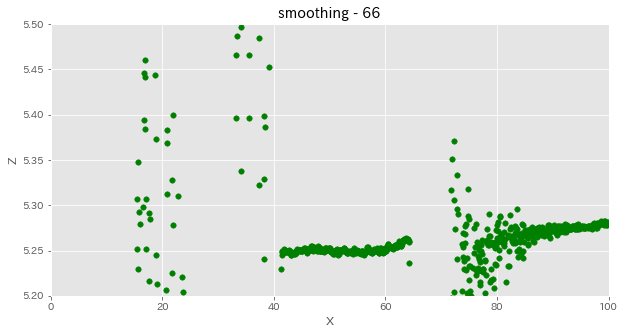

Y = 26.417909


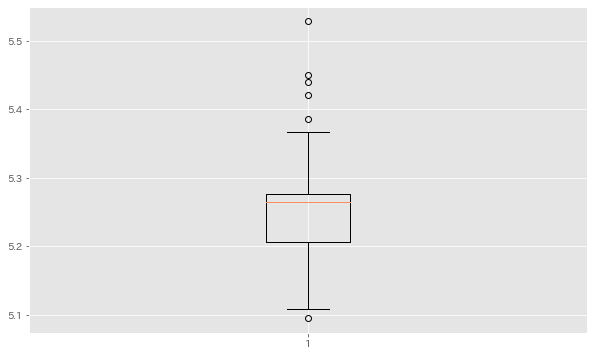

第1四分位数5.20694
第2四分位数5.2642
第3四分位数5.27687


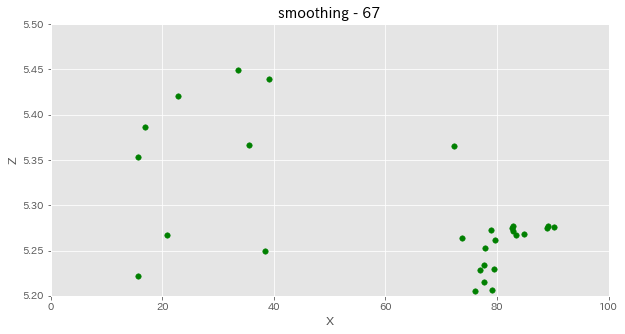

Y = 26.394364


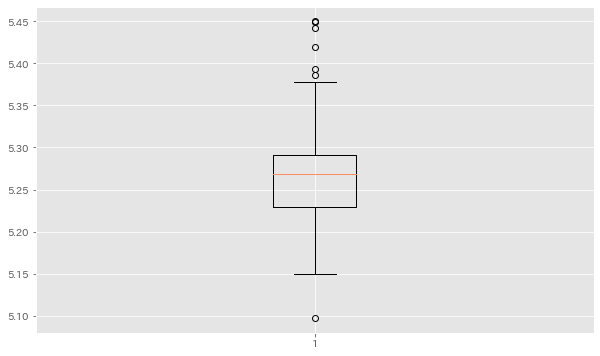

第1四分位数5.2288575
第2四分位数5.26884
第3四分位数5.2907875


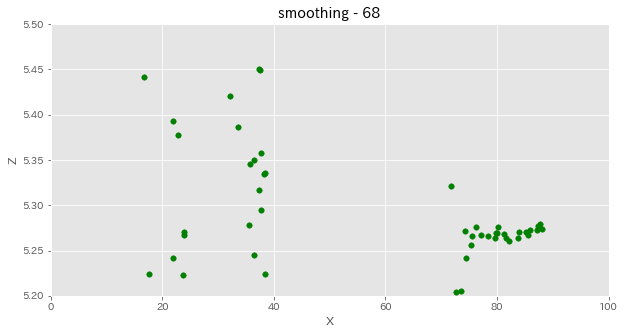

Y = 26.370819


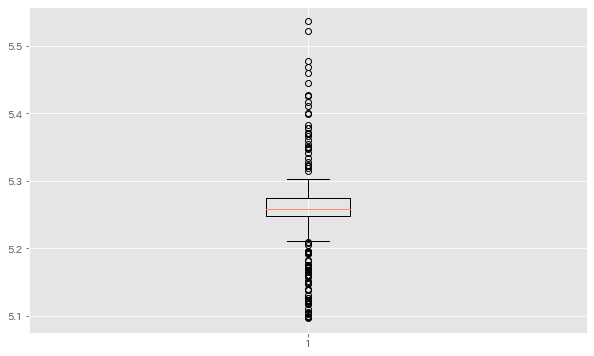

第1四分位数5.2487224999999995
第2四分位数5.25798
第3四分位数5.27433


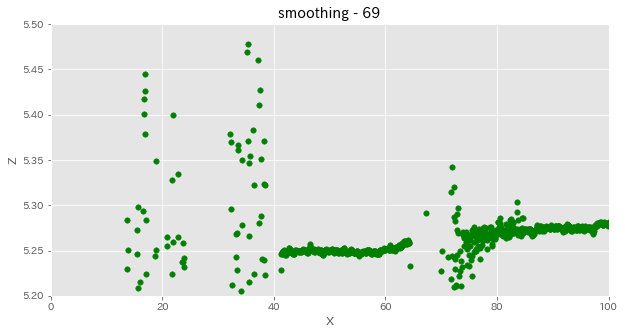

Y = 26.347273


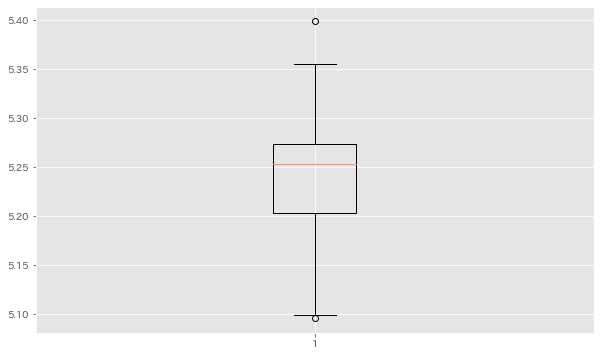

第1四分位数5.2034
第2四分位数5.25337
第3四分位数5.273


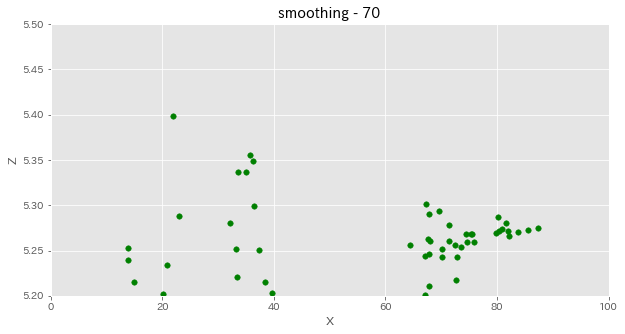

Y = 26.323728


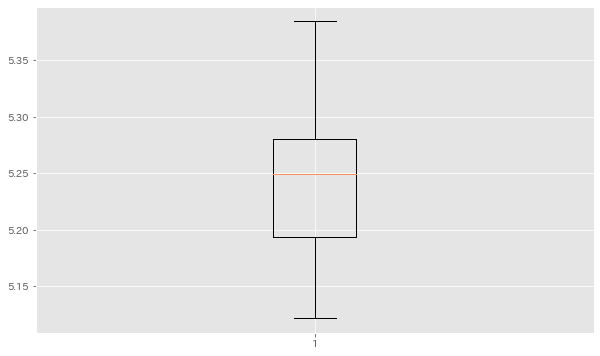

第1四分位数5.193385
第2四分位数5.2495899999999995
第3四分位数5.2805225


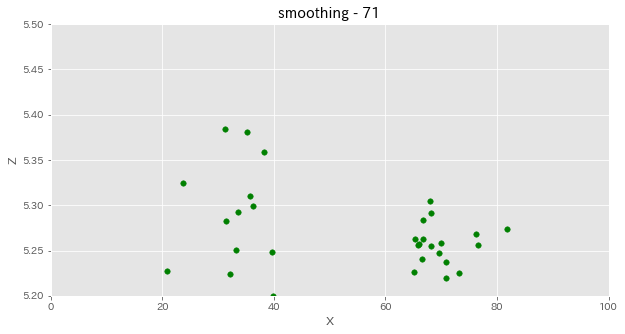

Y = 26.300183


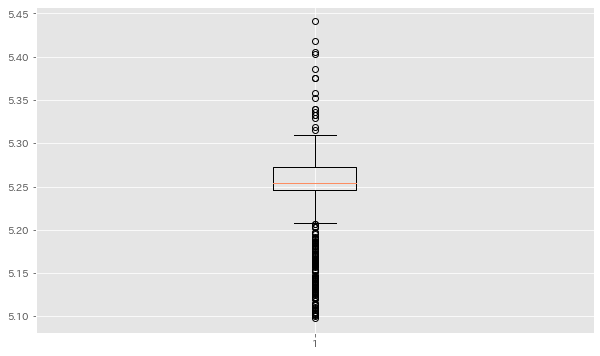

第1四分位数5.24602
第2四分位数5.254605
第3四分位数5.272365


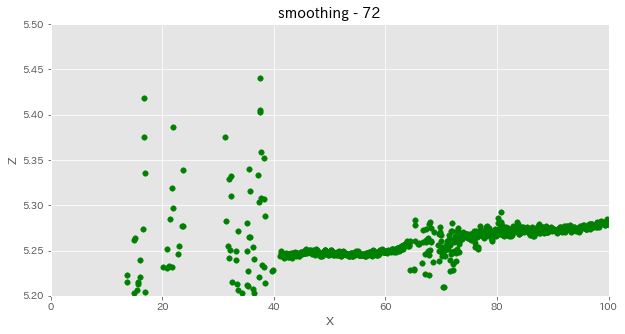

Y = 26.276637


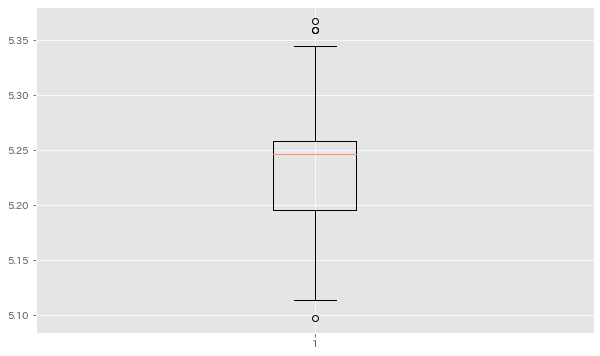

第1四分位数5.19491
第2四分位数5.24588
第3四分位数5.2582


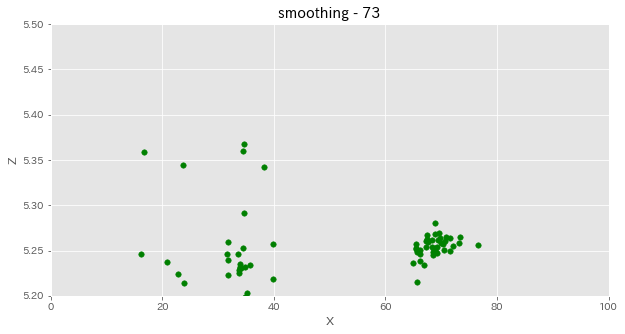

Y = 26.253092


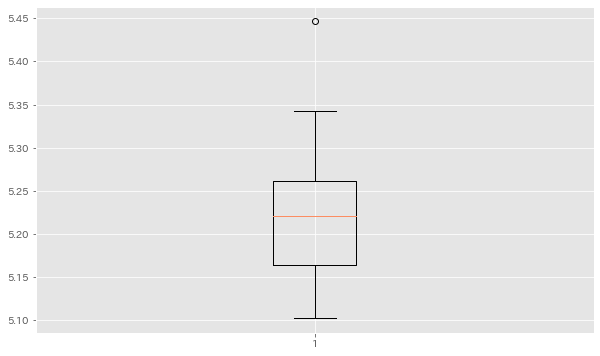

第1四分位数5.1639625
第2四分位数5.221255
第3四分位数5.2616875


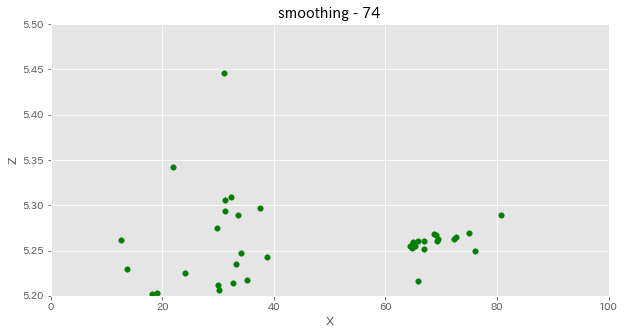

Y = 26.229546


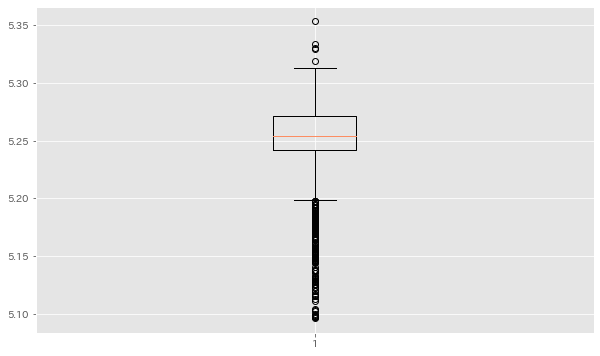

第1四分位数5.241865
第2四分位数5.2538
第3四分位数5.27099


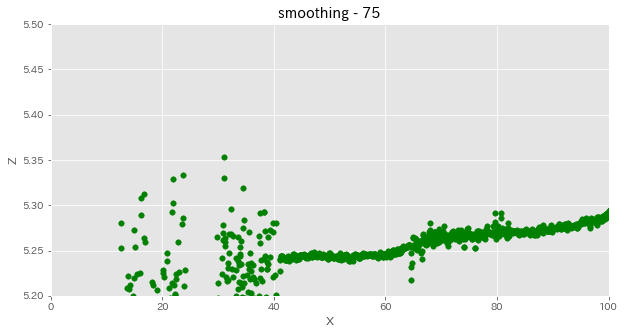

Y = 26.206001


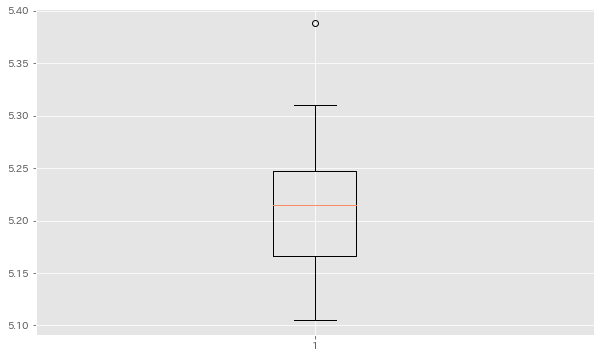

第1四分位数5.166465
第2四分位数5.215115
第3四分位数5.246824999999999


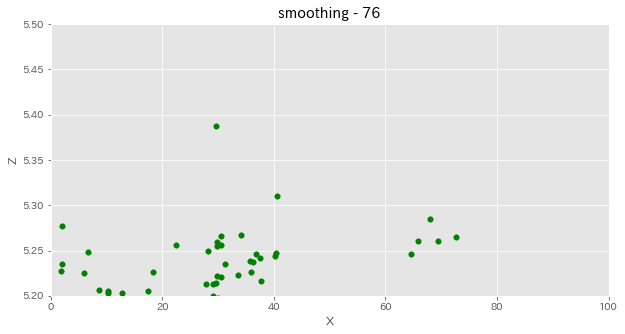

Y = 26.182456


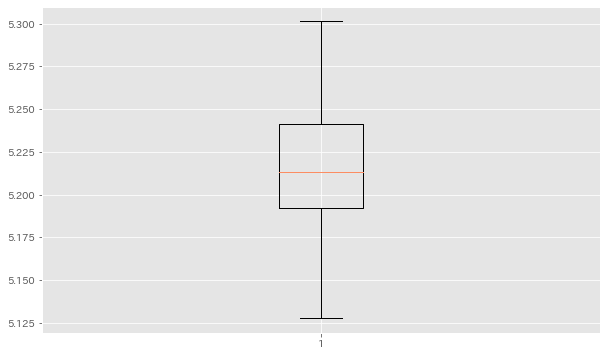

第1四分位数5.192235
第2四分位数5.21314
第3四分位数5.2415175


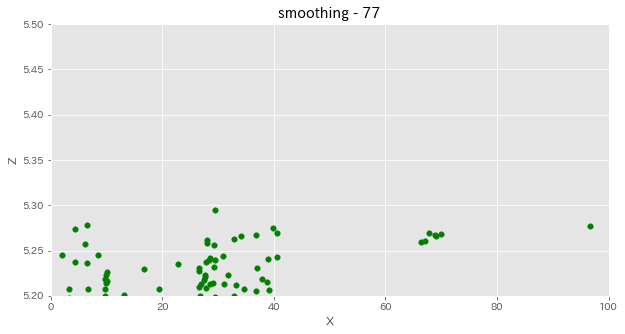

Y = 26.15891


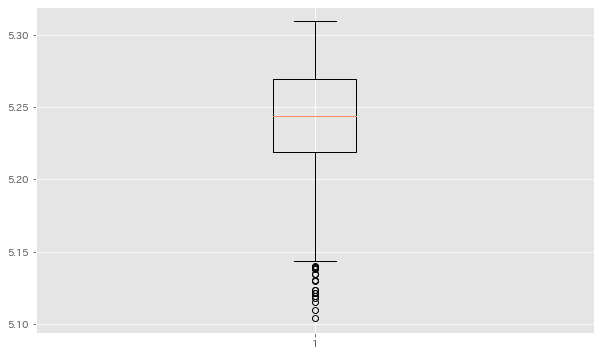

第1四分位数5.218675
第2四分位数5.24351
第3四分位数5.269655


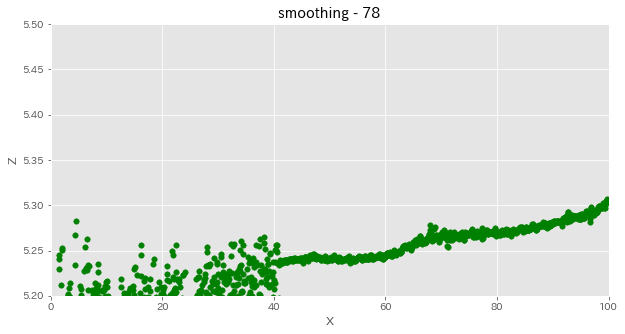

Y = 26.135365


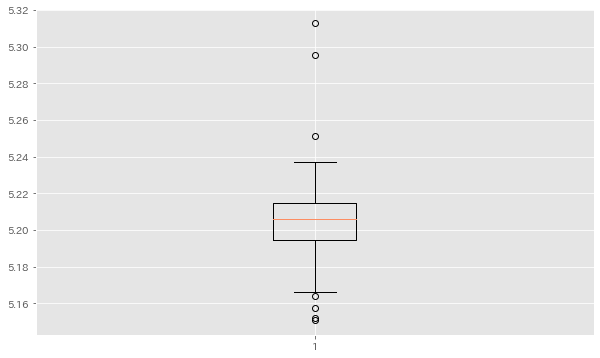

第1四分位数5.1947375000000005
第2四分位数5.20589
第3四分位数5.214645


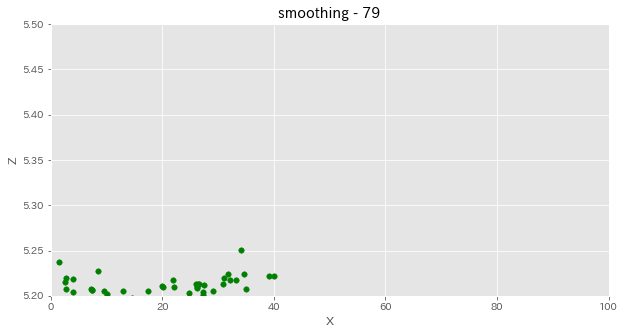

Y = 26.11182


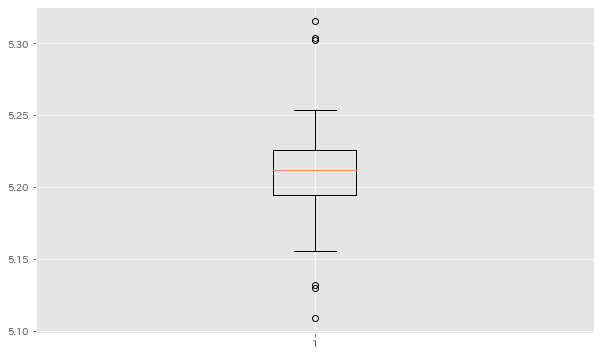

第1四分位数5.19499
第2四分位数5.21223
第3四分位数5.22597


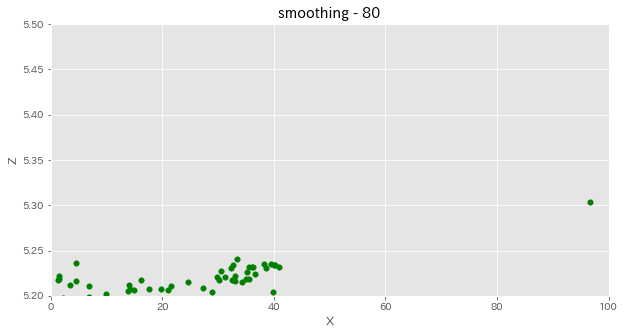

Y = 26.088274


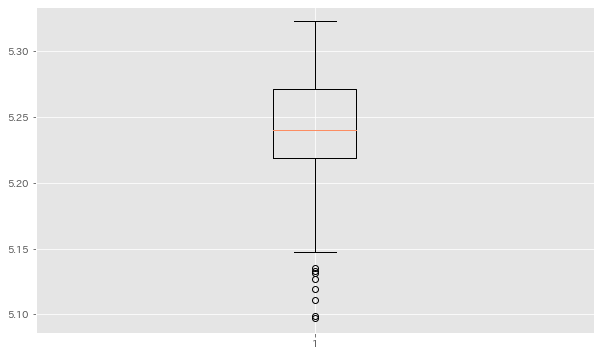

第1四分位数5.218645
第2四分位数5.23973
第3四分位数5.271247499999999


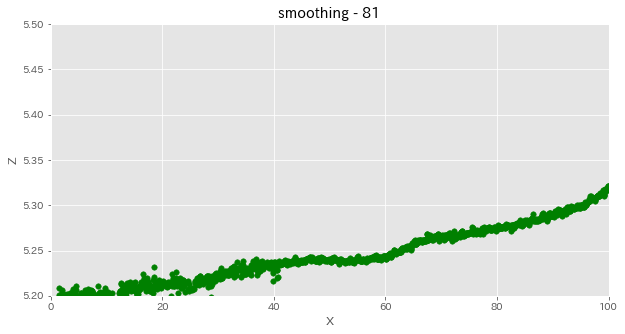

Y = 26.064729


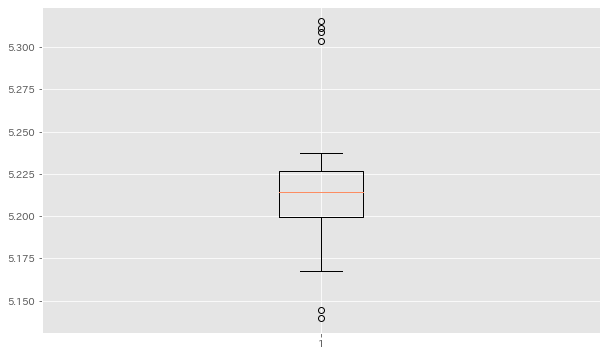

第1四分位数5.199655
第2四分位数5.21428
第3四分位数5.2267600000000005


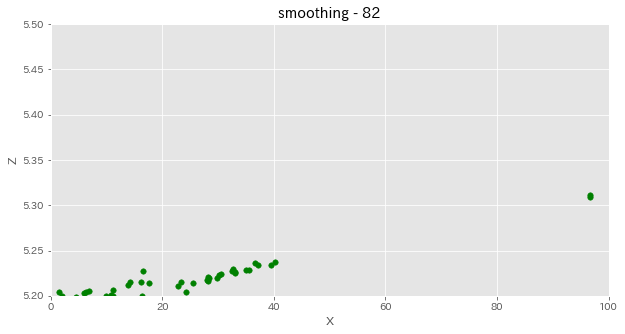

Y = 26.017638


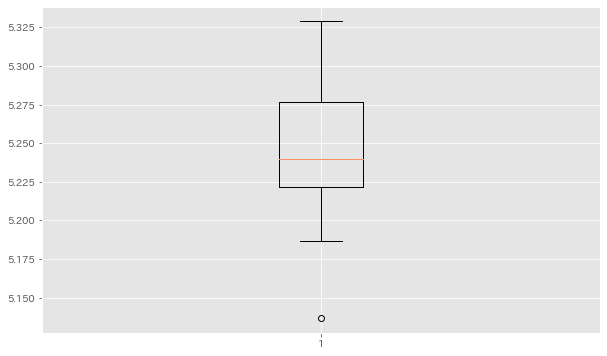

第1四分位数5.221465
第2四分位数5.2396
第3四分位数5.2763349999999996


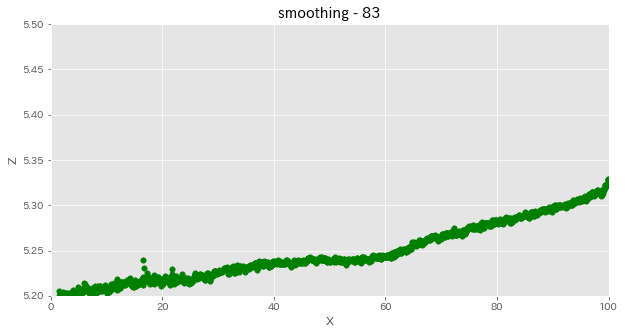

Y = 25.947002


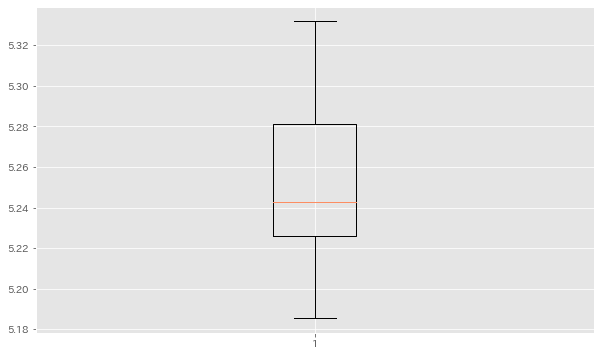

第1四分位数5.226055
第2四分位数5.24286
第3四分位数5.281264999999999


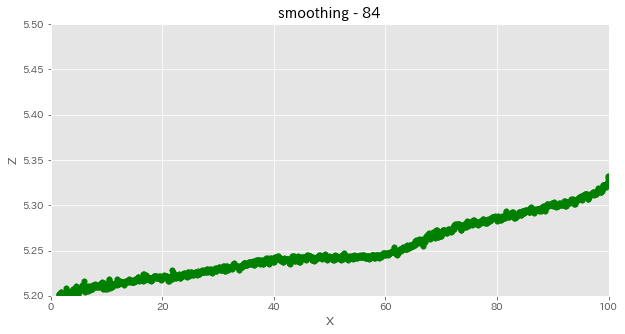

Y = 25.876366


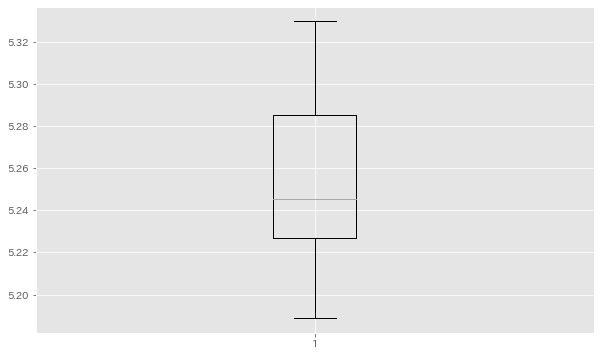

第1四分位数5.2267775
第2四分位数5.24552
第3四分位数5.2852725


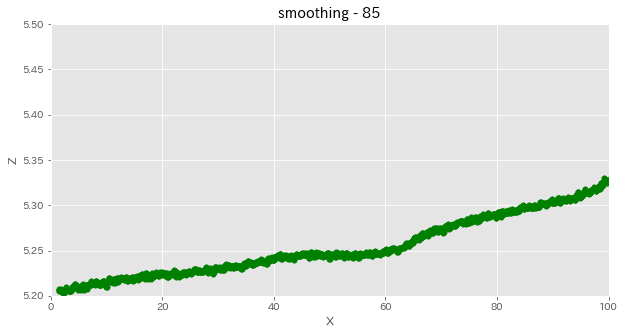

Y = 25.80573


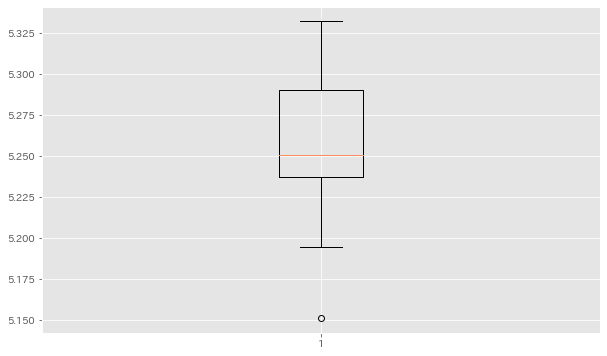

第1四分位数5.23733
第2四分位数5.250815
第3四分位数5.2903899999999995


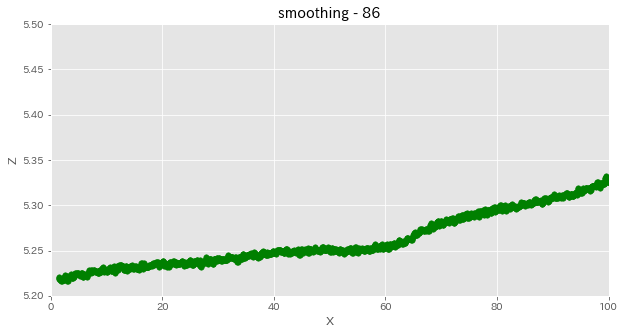

Y = 25.735094


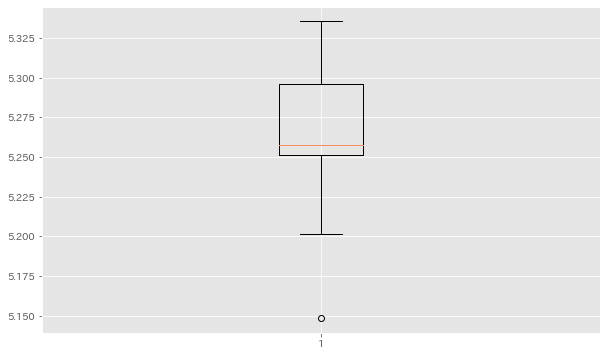

第1四分位数5.25101
第2四分位数5.25774
第3四分位数5.296202500000001


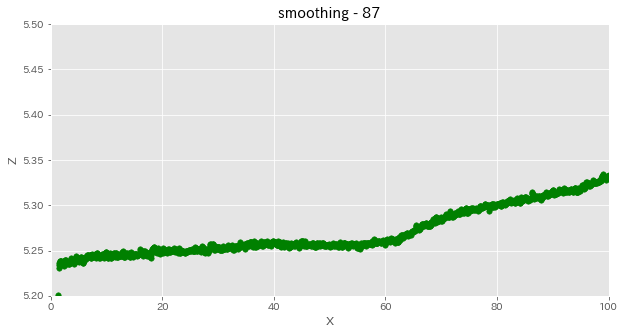

Y = 25.664457


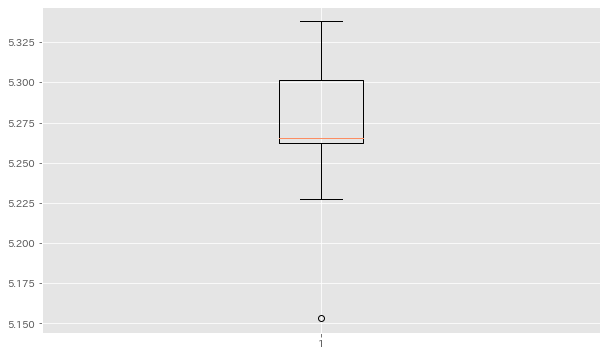

第1四分位数5.26223
第2四分位数5.265420000000001
第3四分位数5.3017225


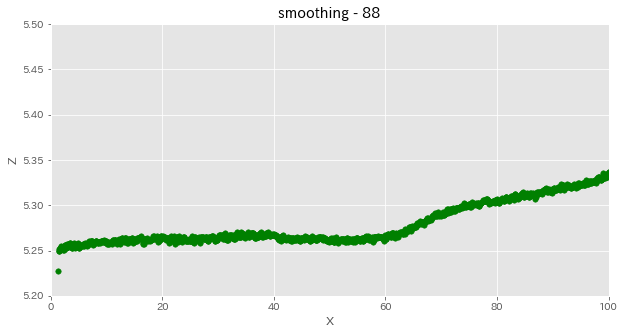

Y = 25.593821


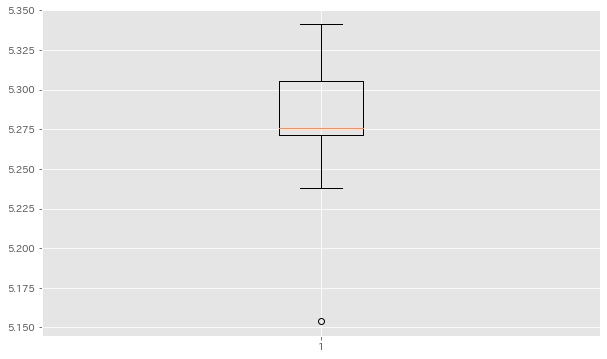

第1四分位数5.271295
第2四分位数5.27554
第3四分位数5.3054950000000005


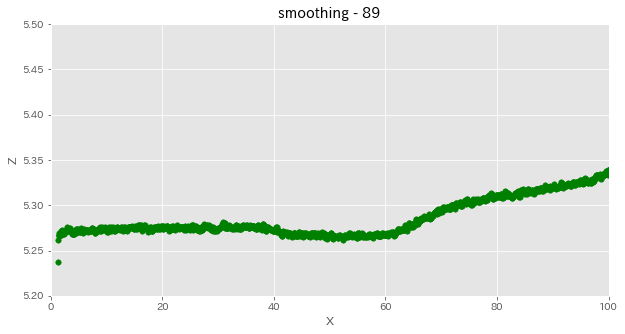

In [673]:
for i in range(55,90,1):    
    df_e = df_e.sort_values('Y')
    df_e_y = df_e['Y'].unique()
    df_e_y = sorted(df_e_x, reverse=True)
    df_e1 = df_e[df_e.Y == df_e_y[i]]
    print('Y = {}'.format(df_e_y[i]))
    BoxPlot(df_e1)
    graph(list(df_e1['X']),list(df_e1['Z']),'{}'.format(i))

In [712]:
df_e_o.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\df_e_5.2_5.376.csv', sep=",")

In [699]:
df_e

,X,Y,Z
48,23.616010,0.659270,5.36261
55,37.390054,0.659270,5.29833
57,37.601962,0.659270,5.19020
56,37.460690,0.659270,5.16740
31,18.954026,0.659270,5.32730
...,...,...,...
528665,49.963283,30.750258,5.26004
528658,49.468830,30.750258,5.25814
528632,47.632291,30.750258,5.24945
528640,48.197380,30.750258,5.25713


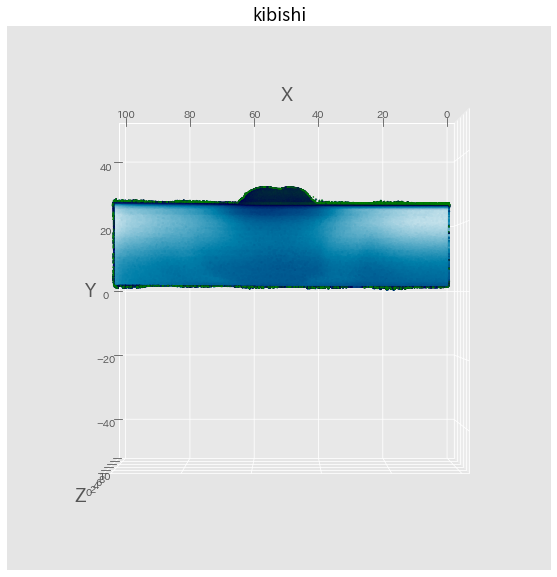

In [713]:
dfL_o = deleteOutliers2(dfL,5.2,5.376)
mapping(dfL_o, 'kibishi', -90, 90, save=False)

In [173]:
f2 = DeleteTobi(dfLo)

loading:   0%|          | 0/520 [00:00<?, ?keysrokes/s]C:\Users\owner\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
loading: 100%|██████████| 520/520 [00:08<00:00, 63.98keysrokes/s] 


In [175]:
dfLo_tate = DeleteTobi

,X,Y,Z
0,43.394124,0.659270,5.35140
1,43.464760,0.659270,5.34503
2,43.535396,0.659270,5.30616
3,43.606032,0.659270,5.28287
4,43.606032,0.682816,5.28619
5,43.676668,0.682816,5.29113
6,56.885623,0.682816,5.30072
7,42.899671,0.729907,5.27862
8,42.970307,0.729907,5.28199
9,43.040943,0.729907,5.28571


In [180]:
DeleteTobi_ver(dfLo)

loading:   0%|          | 0/1432 [00:00<?, ?keysrokes/s]C:\Users\owner\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
loading: 100%|██████████| 1432/1432 [00:22<00:00, 63.01keysrokes/s]


,X,Y,Z
0,1.365632,8.711788,5.35175
1,1.365632,8.782424,5.36113
2,1.365632,23.333465,5.31368
3,1.365632,23.404102,5.31699
4,1.365632,23.474738,5.31875
...,...,...,...
524180,101.645379,3.979168,5.23680
524181,101.668924,3.908532,5.20280
524182,101.739560,26.300183,5.28807
524183,101.739560,26.347273,5.30130


In [182]:
dfLo_ver = DeleteTobi_ver(dfLo)

loading: 100%|██████████| 1432/1432 [00:21<00:00, 65.10keysrokes/s]


In [185]:
dfLo_v_hordfLo_v_hori.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLo_v_hori.csv', sep=",")i = DeleteTobi_hori(dfLo_ver)

loading: 100%|██████████| 518/518 [00:08<00:00, 63.72keysrokes/s] 


In [187]:
dfLo_v_hori.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLo_v_hori.csv', sep=",")

In [191]:
dfLo_ver = DeleteTobi_ver(dfLo,0.1)

loading:   0%|          | 0/1432 [00:00<?, ?keysrokes/s]C:\Users\owner\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
loading: 100%|██████████| 1432/1432 [00:23<00:00, 61.65keysrokes/s]


In [192]:
dfLo_v_hori = DeleteTobi_hori(dfLo_ver,0.1)

loading: 100%|██████████| 519/519 [00:07<00:00, 65.48keysrokes/s] 


In [194]:
dfLo_v_hori.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLo_v_hori01.csv', sep=",")

In [195]:
Makepixel(dfLo_v_hori)

loading: 100%|██████████| 1426/1426 [01:27<00:00, 16.25keysrokes/s]


,21.779471,21.850107,21.920743,21.991379,22.132651,42.405218,56.885623,40.003590,40.074226,40.144862,...,1.412722,101.480561,101.551197,1.436268,1.459813,101.504106,101.527652,1.483359,101.598288,101.574742
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.915076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,5.25763,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.867985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.844440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.800543,NaN,NaN,NaN,NaN,NaN,5.22085,5.26987,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.776997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.33209,5.28791,5.27047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.729907,NaN,NaN,NaN,NaN,NaN,5.23314,5.29569,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.682816,NaN,NaN,NaN,NaN,5.34751,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
dfLo_v_hori = sortXY(dfLo_v_hori)

loading: 100%|██████████| 1426/1426 [00:08<00:00, 165.34keysrokes/s]


In [203]:
dfLo_vhp = Makepixel(dfLo_v_hori)
dfLo_vhp

loading: 100%|██████████| 1426/1426 [01:26<00:00, 16.40keysrokes/s]


,1.412722,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,...,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.551197,101.574742,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.915076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.867985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.844440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.800543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.776997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.729907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.682816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
def countDeleteY(df,y_height=29,threshold=10):#y_heigh：適用するｙ最大、threshold:カウントを消す閾値
    y_list = df.index.to_list()
    count_Y = [] 
    df_c = df.copy()
    for i in y_list:
        count_Y.append(df.loc[i].count())
    dfCo_Y = pd.DataFrame(zip(y_list,count_Y), columns = ['Y','Count'])
    dfCo_Y = dfCo_Y.sort_values('Y', ascending=False)
    dfCo_Y1 = dfCo_Y[(dfCo_Y["Count"] < threshold) & (dfCo_Y["Y"]<=y_height)]
    dfCo_Y2 = dfCo_Y[(dfCo_Y["Count"] < 5)]
    dfCo_Y3 = pd.concat([dfCo_Y1,dfCo_Y2])
    delete_y = dfCo_Y3['Y'].unique().tolist()
    #print(delete_y)
    df_c.drop(index=delete_y, inplace=True)
    return df_c

In [260]:
dfLo_vph = countDeleteY(dfLo_vhp,29,10)

In [266]:
dfLo_vph.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLo_vph.csv', sep=",")

In [265]:
df_dy.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\df_dy.csv', sep=",")

In [267]:
dfLo_vph

,1.412722,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,...,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.551197,101.574742,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.867985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.773804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.436268,NaN,NaN,NaN,NaN,NaN,5.30152,5.30190,5.30149,5.30172,5.30259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.365632,NaN,NaN,NaN,NaN,NaN,5.30003,5.30157,5.30260,5.30342,5.30358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,NaN,NaN,5.28449,5.30096,5.30543,5.30451,5.30172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,NaN,NaN,NaN,5.29842,5.30255,5.30335,5.30321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [361]:
dfLo_vph_data = ToData(dfLo_vph)

loading: 100%|██████████| 1426/1426 [00:07<00:00, 181.49keysrokes/s]


In [363]:
dfLo_vph_data = sortXY(dfLo_vph_data)

loading: 100%|██████████| 1426/1426 [00:08<00:00, 164.15keysrokes/s]


In [365]:
dfLo_vph_data.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLo_vph_data.csv', sep=",")

In [454]:
df_x = dfLo_C['X'].unique()
df_x.sort()
f2 = pd.DataFrame([],columns = ['X','Y','Z'])#空のデータフレームを作成
    #print(df_x)
#for x in tqdm(df_x, unit='keysrokes', desc = 'loading'):#x_listから一つずつ取りだす
f1 = dfLo_C[dfLo_C['X'] == 1.412722]#xがある値の時だけのdataframeを取り出す
f1_r = f1.reset_index(drop=True)#インデックスを振り直す
f1_r1 = f1[f1['Y'] < dfLo_C['Y'].median()]#下半分
f1_r2 = f1[f1['Y'] >= dfLo_C['Y'].median()]#上半分
f3_r1 = f1_r1.Y - f1_r1.shift().Y#配列ごと引き算する
f3_r2 = f1_r2.Y - f1_r2.shift().Y#配列ごと引き算する
f4_r1 = (f3_r1>=0.071)#bool値を返す
f4_r2 = (f3_r2>=0.071)#bool値を返す
#print(f1_r1)
under = []#中央値より小さい
upper = []#中央値より大きい

if any(f4_r2) == True:#0.071よりも大きいやつがある場合
    upper = f3_r2[f3_r2>=0.071].index#indexを記録
#        print(f3_x) 
#         for i in f3_x_r2:        
#             #print(i)
#     #             if f1_r.iloc[i].Y <= f['Y'].median():
#             upper.append(i)
    #print('upper={}'.format(upper))

    delete_up_s = min(upper)#とびはじめ
    delete_up_e = f1_r2.Y.idxmax()#一番上
    
    delete_list_up = list(range(delete_up_s,delete_up_e+1))#一番下から飛び初めをすべて
    f1_r2.drop(delete_list_up, inplace=True)#ドロップする
    f1_r2 = f1_r2.reset_index(drop=True)#インデックスを振り直す
    f2 = pd.concat([f2, f1_r2])
else:
    f2 = pd.concat([f2, f1_r2])

C:\Users\owner\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# dfLoを前処理していく

In [130]:
dfLo
# dfLo：きつめの外れ値を消去した

,X,Y,Z
3,1.365632,2.283901,5.27281
9,1.365632,2.707718,5.21955
10,1.365632,2.778354,5.31027
11,1.365632,2.848990,5.30135
12,1.365632,2.919626,5.31745
...,...,...,...
532401,101.645379,3.979168,5.23680
532504,101.668924,3.908532,5.20280
533032,101.739560,26.300183,5.28807
533033,101.739560,26.347273,5.30130


In [127]:
#dfLo_C = CountDelete(dfLo,high_y=100,high_x=50,nan=False,delete=True)

消去するYは[0.65927, 0.682816, 0.776997, 0.824088, 0.847633, 0.894724, 0.91827, 0.988906, 1.035996, 1.059542, 1.106633, 1.177269, 1.200814, 1.247905, 1.389177, 1.412722, 1.483359, 26.064729, 26.11182, 26.135365, 26.182456, 26.206001, 26.253092, 26.276637, 26.323728, 26.347273, 26.394364, 26.417909, 26.465, 26.488546, 26.535636, 26.559182, 26.629818, 26.747545, 26.77109, 26.818181, 26.841726, 26.888817]


loading: 100%|██████████| 38/38 [00:01<00:00, 34.37keysrokes/s]


消去するXは[1.365632, 101.551197, 101.574742, 101.621833, 101.645379, 101.668924, 101.73956]


loading: 100%|██████████| 7/7 [00:00<00:00, 35.61keysrokes/s]


In [131]:
dfLo_C

,X,Y,Z
69,1.412722,1.930721,5.29397
73,1.412722,3.272807,5.29987
74,1.412722,3.343443,5.30372
75,1.412722,3.414079,5.30626
76,1.412722,3.484715,5.31276
...,...,...,...
532314,101.598288,26.017638,5.25042
532315,101.598288,26.088274,5.25833
532317,101.598288,26.158910,5.24643
532319,101.598288,26.229546,5.24262


In [403]:
#dfLo_C.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLo_C.csv', sep=",")

In [467]:
#dfLo_CTv = DeleteTobi_ver(dfLo_C)

loading:   0%|          | 0/1424 [00:00<?, ?keysrokes/s]C:\Users\owner\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
loading: 100%|██████████| 1424/1424 [00:21<00:00, 66.71keysrokes/s]


In [468]:
#dfLo_CTv.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLo_CTv.csv', sep=",")

In [469]:
#dfLo_CT1 = DeleteTobi_hori(dfLo_CTv)

loading: 100%|██████████| 480/480 [00:07<00:00, 64.20keysrokes/s] 


In [406]:
#dfLo_CT.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLo_CT.csv', sep=",")

In [470]:
#dfLo_CTv2 = DeleteTobi_ver(dfLo_CT1)

loading: 100%|██████████| 1423/1423 [00:19<00:00, 71.23keysrokes/s]


In [471]:
#dfLo_CT2 = DeleteTobi_hori(dfLo_CTv)

loading: 100%|██████████| 480/480 [00:07<00:00, 64.44keysrokes/s] 


In [474]:
#dfLo_CT2 = SortXY(dfLo_CT2)

loading: 100%|██████████| 1423/1423 [00:08<00:00, 168.53keysrokes/s]


In [476]:
#dfLo_CT2_low = YlowessMethod(dfLo_CT2)

loading:  89%|████████▉ | 409/459 [01:25<00:02, 24.40keysrokes/s]C:\Users\owner\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
loading: 100%|██████████| 459/459 [01:26<00:00,  5.33keysrokes/s]


In [477]:
#dfLo_CT2_low2 = XlowessMethod(dfLo_CT2_low)

loading: 100%|██████████| 1423/1423 [01:13<00:00, 19.45keysrokes/s]


In [478]:
#dfLo_CT2_low2.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLo_CT2_low2.csv', sep=",")

In [132]:
dfLo_CT2_low2 = ReadCsv('dfLo_CT2_low2')

In [133]:
dfLo_CT2_low2 = SortXY(dfLo_CT2_low2) 

loading: 100%|██████████| 1423/1423 [00:07<00:00, 187.35keysrokes/s]


In [134]:
dfLo_CT2_low2 = dfLo_CT2_low2[dfLo_CT2_low2.Y >1.15 ]

In [135]:
dfLo_CT2_low2_P = Makepixel(dfLo_CT2_low2)

loading: 100%|██████████| 1423/1423 [01:27<00:00, 16.26keysrokes/s]


In [738]:
#MakeCsv(dfLo_CT2_low2_P,'dfLo_CT2_low2_P')

In [136]:
dfLo_CT2_low2_C = CountDeleteY(dfLo_CT2_low2_P)

loading: 100%|██████████| 451/451 [00:00<00:00, 8217.30keysrokes/s]

[1.27145, 1.318541, 1.342086, 1.459813, 1.530449, 26.606272, 26.676908, 26.700454, 29.596535, 29.879079, 30.090988, 30.279351, 30.349987, 30.420623, 30.444168, 30.491259, 30.514804, 30.561895, 30.585441, 30.632531, 30.656077, 30.703167, 30.726713, 30.773804, 30.797349, 30.84444, 30.867985, 30.915076]


In [137]:
dfLo_CT2_low2_C

,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,...,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.679622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.436268,NaN,NaN,NaN,NaN,5.304876,5.304575,5.304573,5.304572,5.304578,5.304576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.365632,NaN,NaN,NaN,NaN,5.304662,5.304352,5.304350,5.304350,5.304357,5.304355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,NaN,5.304446,5.304129,5.304127,5.304127,5.304135,5.304134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,NaN,NaN,5.303904,5.303903,5.303903,5.303912,5.303911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [585]:
#MakeCsv(dfLo_CT2_low2_P,'dfLo_CT2_low2_P')

In [138]:
dfLo_CT2_low2_P

,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,...,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.915076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.867985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.844440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.318541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,NaN,5.304446,5.304129,5.304127,5.304127,5.304135,5.304134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.271450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,NaN,NaN,5.303904,5.303903,5.303903,5.303912,5.303911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
dfLo_CT2_low2_C

,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,...,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.679622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.436268,NaN,NaN,NaN,NaN,5.304876,5.304575,5.304573,5.304572,5.304578,5.304576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.365632,NaN,NaN,NaN,NaN,5.304662,5.304352,5.304350,5.304350,5.304357,5.304355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,NaN,5.304446,5.304129,5.304127,5.304127,5.304135,5.304134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,NaN,NaN,5.303904,5.303903,5.303903,5.303912,5.303911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
dfLo_CT2_is256 = dfLo_CT2_low2_C.isnull()*255

In [141]:
dfLo_CT2_is256

,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,...,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.598288
30.962167,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
30.891530,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
30.820894,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
30.750258,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
30.679622,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.436268,255,255,255,255,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
1.365632,255,255,255,255,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
1.294996,255,255,255,255,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
1.224359,255,255,255,255,255,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255


In [668]:
#MakeCsv(dfLo_CT2_is256,'dfLo_CT2_is256')

In [143]:
dfLo_CT2_sobel = Sobel(dfLo_CT2_is256,'dfLo_CT2_is256_1')
#Sobel(dfLo_CT2_is256,'dfLo_CT2_is256_1')

In [144]:
dfLo_CT2_sobel

,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,...,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.679622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.436268,NaN,NaN,360.624458,1140.394669,806.380803,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.365632,NaN,NaN,NaN,1020.000000,1020.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,806.380803,1140.394669,360.624458,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,360.624458,1081.873375,1140.394669,1020.0,1020.0,1020.0,1020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
dfLo_CT2_sobel = dfLo_CT2_sobel.replace(0, np.nan)

In [146]:
dfLo_CT2_sobel

,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,...,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.679622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.436268,NaN,NaN,360.624458,1140.394669,806.380803,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.365632,NaN,NaN,NaN,1020.000000,1020.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,806.380803,1140.394669,360.624458,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,360.624458,1081.873375,1140.394669,1020.0,1020.0,1020.0,1020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 値ある個所は１にする

In [147]:
dfLo_CT2_sobel.notnull()

,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,...,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.598288
30.962167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30.891530,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30.820894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30.750258,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30.679622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.436268,False,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1.365632,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1.294996,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1.224359,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [149]:
dfLo_CT2_low2_C

,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,...,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.679622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.436268,NaN,NaN,NaN,NaN,5.304876,5.304575,5.304573,5.304572,5.304578,5.304576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.365632,NaN,NaN,NaN,NaN,5.304662,5.304352,5.304350,5.304350,5.304357,5.304355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,NaN,5.304446,5.304129,5.304127,5.304127,5.304135,5.304134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,NaN,NaN,5.303904,5.303903,5.303903,5.303912,5.303911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
dfLo_CT2_sobel_edge = dfLo_CT2_low2_C *dfLo_CT2_sobel.notnull()

In [151]:
dfLo_CT2_sobel_edge1 = dfLo_CT2_sobel_edge.replace([0], np.nan)

In [152]:
dfLo_CT2_sobel_edge1_pixcel = ToData(dfLo_CT2_sobel_edge1)

loading: 100%|██████████| 1423/1423 [00:03<00:00, 357.88keysrokes/s]


In [723]:
#MakeCsv(dfLo_CT2_sobel_edge1_pixcel,'dfLo_CT2_sobel_edge1_pixcel')

In [153]:
df_edge = ToData(dfLo_CT2_sobel)
df_edge

loading: 100%|██████████| 1423/1423 [00:03<00:00, 377.73keysrokes/s]


,X,Y,Z
421,47.420383,1.224359,1020.000000
421,5.603799,1.224359,1020.000000
421,30.679622,1.224359,1020.000000
421,5.745071,1.224359,1020.000000
421,5.815707,1.224359,1020.000000
...,...,...,...
1,49.963283,30.891530,806.380803
1,55.472901,30.891530,1020.000000
1,50.033919,30.891530,360.624458
1,55.543537,30.891530,1020.000000


In [154]:
df_edge.drop('Z', axis=1,inplace=True)

In [685]:
df_edge.reset_index(drop=True)

,X,Y
0,47.420383,1.224359
1,5.603799,1.224359
2,30.679622,1.224359
3,5.745071,1.224359
4,5.815707,1.224359
...,...,...
6513,49.963283,30.891530
6514,55.472901,30.891530
6515,50.033919,30.891530
6516,55.543537,30.891530


In [156]:
df_edge.astype('float')

,X,Y
421,47.420383,1.224359
421,5.603799,1.224359
421,30.679622,1.224359
421,5.745071,1.224359
421,5.815707,1.224359
...,...,...
1,49.963283,30.891530
1,55.472901,30.891530
1,50.033919,30.891530
1,55.543537,30.891530


In [157]:
MakeCsv(df_edge,'df_edge')

In [158]:
edge_list = []
for i in range(len(df_edge)):
    edge_xy = (df_edge.iloc[i].X,df_edge.iloc[i].Y)
    edge_list.append(edge_xy)

In [159]:
type(edge_list)

list

In [160]:
# edge_list_f = [float(s) for s in edge_list]
# print(edge_list_f)
# # [0.123, 1.23, 123.0]

In [161]:
dfLo_CT2_lapracian = Lapracian(dfLo_CT2_is256,'dfLo_CT2_is256_1')
#Lapracian(dfLo_CT2_is256,'dfLo_CT2_is256_1')

In [164]:
#dfLo_CT2_canny = Canny(dfLo_CT2_low2_P,'dfLo_CT2_is256_1')
Canny(dfLo_CT2_is256,'dfLo_CT2_is256_1')

,1.436268,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,...,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016,101.480561,101.504106,101.527652,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.679622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.436268,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.365632,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,NaN,255.0,255.0,255.0,255.0,255.0,255.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  飛び値消していない

In [165]:
dfLo_C

,X,Y,Z
69,1.412722,1.930721,5.29397
73,1.412722,3.272807,5.29987
74,1.412722,3.343443,5.30372
75,1.412722,3.414079,5.30626
76,1.412722,3.484715,5.31276
...,...,...,...
532314,101.598288,26.017638,5.25042
532315,101.598288,26.088274,5.25833
532317,101.598288,26.158910,5.24643
532319,101.598288,26.229546,5.24262


In [597]:
dfLo_C_low1 = YlowessMethod(dfLo_C)

loading:  83%|████████▎ | 402/482 [01:27<00:03, 23.04keysrokes/s]C:\Users\owner\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
loading: 100%|██████████| 482/482 [01:28<00:00,  5.42keysrokes/s]


In [598]:
dfLo_C_low2 = XlowessMethod(dfLo_C_low1)

loading: 100%|██████████| 1424/1424 [01:14<00:00, 19.02keysrokes/s]


In [599]:
dfLo_C_P = Makepixel(dfLo_C_low2)

loading: 100%|██████████| 1424/1424 [01:27<00:00, 16.29keysrokes/s]


In [600]:
dfLo_C_P

,1.412722,1.436268,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,2.001357,...,101.245107,101.315743,101.386380,101.457016,101.527652,101.598288,101.504106,101.480561,1.459813,1.483359
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.938621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.915076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.867985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.965360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.941815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.871179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.800543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [601]:
dfLo_C_P_C = CountDeleteY(dfLo_C_P)

loading: 100%|██████████| 482/482 [00:00<00:00, 7213.01keysrokes/s]

[26.912362, 29.007901, 29.031446, 29.102082, 29.172718, 29.219809, 29.243354, 29.31399, 29.361081, 29.455263, 29.525899, 29.596535, 29.643626, 29.714262, 29.784898, 29.879079, 29.92617, 29.949715, 30.067442, 30.090988, 30.138078, 30.161624, 30.23226, 30.279351, 30.302896, 30.349987, 30.373532, 30.420623, 30.444168, 30.491259, 30.514804, 30.561895, 30.585441, 30.632531, 30.656077, 30.703167, 30.726713, 30.773804, 30.797349, 30.84444, 30.915076, 30.938621]


In [624]:
dfLo_C_P_C1 = CountDeleteY(dfLo_C_P_C, 30)

loading: 100%|██████████| 440/440 [00:00<00:00, 10019.89keysrokes/s]

[26.606272, 26.676908, 26.700454, 30.867985]


In [635]:
x = dfLo_C_P_C1.index
x

Float64Index([30.962167,  30.89153, 30.820894, 30.750258, 30.679622, 30.608986,
               30.53835, 30.467714, 30.397078, 30.326441,
              ...
               1.224359,  1.153723,  1.130178,  1.083087,  1.012451,   0.96536,
               0.941815,  0.871179,  0.800543,  0.729907],
             dtype='float64', length=436)

In [610]:
MakeCsv(dfLo_C_P_C1,'dfLo_C_P_C1')

In [611]:
dfLo_C_P_C1_is256 = dfLo_C_P_C1.isnull()*255

In [641]:
dfLo_CPC1_sobel = Sobel(dfLo_C_P_C1_is256,'dfLo_CP_C1_1')

In [642]:
dfLo_CPC1_sobel 

,1.412722,1.436268,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,2.001357,...,101.245107,101.315743,101.386380,101.457016,101.527652,101.598288,101.504106,101.480561,1.459813,1.483359
30.962167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.891530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.820894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.750258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.679622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.965360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.941815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.871179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.800543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [613]:
Lapracian(dfLo_C_P_C1_is256,'dfLo_CP_C1_1')

In [639]:
MakeCsv(dfLo_CPC1_sobel,'dfLo_CP_C1_1_sobel')

## データを作る

In [166]:
dfs1 = DeleteOutliers(dfL)

In [167]:
# countDelete(df,high_y=200,high_x=100,nan=True,delete=False):
dfLc = CountDelete(dfs,high_y=100,high_x=50,nan=False,delete=True)
dfLc.reset_index(drop=True, inplace=True)
mapping(dfLc,'nan', -90, 90, save=False)

消去するYは[0.211908, 0.235454, 0.258999, 0.282544, 0.30609, 0.329635, 0.353181, 0.376726, 0.400271, 0.423817, 0.447362, 0.470907, 0.494453, 0.517998, 0.541544, 0.565089, 0.588634, 0.61218, 0.635725, 0.706361, 0.753452, 1.553995, 1.601085, 1.624631, 1.671722, 1.695267, 1.742358, 1.765903, 1.812994, 1.836539, 1.88363, 1.907175, 1.954266, 1.977811, 2.024902, 2.048448, 2.095538, 2.119084, 2.166174, 2.18972, 2.236811, 2.260356, 2.307447, 2.330992, 2.378083, 2.401628, 2.448719, 2.472264, 2.519355, 2.5429, 2.589991, 2.613536, 2.660627, 2.684173, 2.731263, 2.754809, 2.801899, 2.825445, 2.872536, 2.896081, 2.943172, 2.966717, 3.013808, 3.037353, 3.084444, 3.107989, 3.15508, 3.178625, 3.225716, 3.249262, 3.296352, 3.319898, 3.366988, 3.390534, 3.437625, 3.46117, 3.508261, 3.531806, 3.578897, 3.602442, 3.649533, 3.673078, 3.720169, 3.743714, 3.790805, 3.814351, 3.861441, 3.884987, 3.932077, 3.955623, 4.002714, 4.026259, 4.07335, 4.096895, 4.143986, 4.167531, 4.214622, 4.238167, 4.285258, 4.308803, 4.

loading: 100%|██████████| 773/773 [00:20<00:00, 37.34keysrokes/s]


消去するXは[1.083087, 1.153723, 1.177269, 1.200814, 1.224359, 1.247905, 1.27145, 1.294996, 1.318541, 1.342086, 1.389177, 1.530449, 1.553995, 1.601085, 1.624631, 1.671722, 1.695267, 1.742358, 1.765903, 1.812994, 1.836539, 1.88363, 1.907175, 1.954266, 1.977811, 2.024902, 2.048448, 2.095538, 2.119084, 2.166174, 2.18972, 2.236811, 2.260356, 2.307447, 2.330992, 2.378083, 2.401628, 2.448719, 2.472264, 2.519355, 2.5429, 2.589991, 2.613536, 2.660627, 2.684173, 2.731263, 2.754809, 2.801899, 2.825445, 2.872536, 2.896081, 2.943172, 2.966717, 3.013808, 3.037353, 3.084444, 3.107989, 3.15508, 3.178625, 3.225716, 3.249262, 3.296352, 3.319898, 3.366988, 3.390534, 3.437625, 3.46117, 3.508261, 3.531806, 3.578897, 3.602442, 3.649533, 3.673078, 3.720169, 3.743714, 3.790805, 3.814351, 3.861441, 3.884987, 3.932077, 3.955623, 4.002714, 4.026259, 4.07335, 4.096895, 4.143986, 4.167531, 4.214622, 4.238167, 4.285258, 4.308803, 4.355894, 4.37944, 4.42653, 4.450076, 4.497166, 4.520712, 4.567803, 4.591348, 4.638439, 4.6

loading: 100%|██████████| 2847/2847 [01:14<00:00, 38.23keysrokes/s]


NameError: name 'mapping' is not defined

In [ ]:
dfLo = deleteOutliers2(dfLc,5.2,5.376)
mapping(dfLo, 'kibishi', -90, 90, save=False)

In [ ]:
dfLop = Makepixel(dfLo)
dfLop.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLop.csv', sep=",")

In [ ]:
dfLop = Makepixel(dfLo)
dfLop.to_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLop.csv', sep=",")

In [798]:
dfLop.index.min()

0.65927

In [ ]:
dfLt1 = DeleteTobi_ver(dfLo)

In [ ]:
dfLt1 = DeleteTobi_hori(dfLt1)

In [ ]:
dfLt2 = DeleteTobi_ver(dfLt1)

In [802]:
dfLt2.Y.max()

30.962167

In [800]:
dfLt2.Y.min()

1.083087

In [ ]:
#MakeCsv(dfLt2,'dfLt2')

In [ ]:
#nanにすることで周囲を空白に

In [812]:
dfLt2_c = CountDelete(dfLt2,nan=True,delete=False)

消去するYは[1.083087, 1.153723]


loading: 100%|██████████| 2/2 [00:00<00:00, 1002.46keysrokes/s]


消去するXは[  1.459813   1.483359 101.527652 101.551197 101.574742 101.598288]


In [2118]:
dfLt2_cc = dfLt2_c.copy()
dfLt2_cc['Z']=0

In [2119]:
dfLt2_cc

,X,Y,Z
57,1.648176,1.224359,0
58,1.718812,1.224359,0
59,1.789448,1.224359,0
60,1.860085,1.224359,0
61,1.930721,1.224359,0
...,...,...,...
515730,48.974377,30.962167,0
515731,49.045014,30.962167,0
515732,49.115650,30.962167,0
515733,49.186286,30.962167,0


In [2120]:
MakeCsv(dfLt2_cc,'dfLt2_cc')

In [826]:
dfLt2_c_manu

,1.459813,1.483359,1.506904,1.57754,1.648176,1.718812,1.789448,1.860085,1.930721,2.001357,...,101.103835,101.174471,101.245107,101.315743,101.38638,101.457016,101.527652,101.551197,101.574742,101.598288
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.365632,NaN,NaN,NaN,5.30003,5.30157,5.30260,5.30342,5.30358,5.30312,5.30184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,5.28449,5.30096,5.30543,5.30451,5.30172,5.30220,5.30190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,NaN,5.29842,5.30255,5.30335,5.30321,5.30423,5.30358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [816]:
dfLt2_c = SortXY(dfLt2_c)

loading: 100%|██████████| 1422/1422 [00:08<00:00, 159.74keysrokes/s]


In [817]:
dfLp = Makepixel(dfLt2_c)
dfLp

loading: 100%|██████████| 1422/1422 [01:28<00:00, 16.16keysrokes/s]


,1.459813,1.483359,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,2.001357,...,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016,101.527652,101.551197,101.574742,101.598288
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.867985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.773804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.365632,NaN,NaN,NaN,5.30003,5.30157,5.30260,5.30342,5.30358,5.30312,5.30184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,5.28449,5.30096,5.30543,5.30451,5.30172,5.30220,5.30190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,NaN,5.29842,5.30255,5.30335,5.30321,5.30423,5.30358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.153723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [818]:
MakeCsv(dfLp,'dfLp')

,1.459813,1.483359,1.506904,1.57754,1.648176,1.718812,1.789448,1.860085,1.930721,2.001357,...,101.103835,101.174471,101.245107,101.315743,101.38638,101.457016,101.527652,101.551197,101.574742,101.598288
40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.365632,NaN,NaN,NaN,5.30003,5.30157,5.30260,5.30342,5.30358,5.30312,5.30184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,5.28449,5.30096,5.30543,5.30451,5.30172,5.30220,5.30190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,NaN,5.29842,5.30255,5.30335,5.30321,5.30423,5.30358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.153723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [795]:
dfLpc = CountDeleteY(dfLp,90)

loading: 100%|██████████| 432/432 [00:00<00:00, 10829.06keysrokes/s]

[30.090988, 30.349987, 30.420623, 30.444168, 30.561895, 30.585441, 30.632531, 30.656077, 30.773804, 30.820894, 30.867985, 30.89153]


In [779]:
# 周囲に１マス分の余白を作る

In [786]:
# low = dfLpc.index.min() - 0.07
# high = dfLpc.index.max() + 0.07
# left = dfLpc.columns.min() - 0.07
# right = dfLpc.columns.max() + 0.07

In [ ]:
dfLpc = dfLpc.assign()

In [ ]:
# dfLpc_y = dfLpc.index
# dfLpc_y = dfLpc_y.tolist()
# # エクセルから空白が続くものは消去
# delete_list = [dfLpc_y[1],dfLpc_y[3],dfLpc_y[4],dfLpc_y[6],dfLpc_y[7],dfLpc_y[9],dfLpc_y[11],dfLpc_y[13],dfLpc_y[14],dfLpc_y[16],dfLpc_y[18],dfLpc_y[19]]
# for i in tqdm(delete_list, unit='keysrokes', desc = 'loading'):
#     dfLpc.drop(index=i, inplace=True)

In [777]:
dfLpc_is256 = dfLpc.isnull()*255

In [778]:
Sobel(dfLpc_is256,'1')

,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,2.001357,2.071993,2.142629,...,100.821291,100.891927,100.962563,101.033199,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016
30.891530,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
30.820894,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
30.750258,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
30.679622,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
30.608986,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.506904,0.0,360.624458,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1020.0,1020.0,1020.0,1020.0,1020.0,1020.0,1020.0,806.380803,360.624458,0.0
1.436268,0.0,806.380803,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1.365632,0.0,1020.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1.294996,0.0,1140.394669,360.624458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [787]:
CountDeleteY(dfLpc_is256 )

loading: 100%|██████████| 421/421 [00:00<00:00, 9810.28keysrokes/s]

[]


,1.506904,1.577540,1.648176,1.718812,1.789448,1.860085,1.930721,2.001357,2.071993,2.142629,...,100.821291,100.891927,100.962563,101.033199,101.103835,101.174471,101.245107,101.315743,101.386380,101.457016
30.891530,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
30.820894,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
30.750258,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
30.679622,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
30.608986,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.506904,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
1.436268,255,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
1.365632,255,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
1.294996,255,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255


# --------------------ここから

# 手動で空白多い行を消す

In [168]:

#40は自分で挿入
dfLt2_c_manu = pd.read_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\dfLp_manu_delete.csv',index_col=0)
dfLt2_c_manu

,1.459813,1.483359,1.506904,1.57754,1.648176,1.718812,1.789448,1.860085,1.930721,2.001357,...,101.103835,101.174471,101.245107,101.315743,101.38638,101.457016,101.527652,101.551197,101.574742,101.598288
40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.962167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.891530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.820894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.750258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.365632,NaN,NaN,NaN,5.30003,5.30157,5.30260,5.30342,5.30358,5.30312,5.30184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.294996,NaN,NaN,NaN,5.28449,5.30096,5.30543,5.30451,5.30172,5.30220,5.30190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.224359,NaN,NaN,NaN,NaN,5.29842,5.30255,5.30335,5.30321,5.30423,5.30358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.153723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
# def Edge(df,title):
#     df_c = df.copy
#     df1 = df_c.isnull()*255
#     Sobel(df1,'{}'.format(title))
#     Lapracian(df1,'{}'.format(title))
#     Canny(df1,'{}'.format(title))

In [170]:
# Edge(dfLt2_c_manu,'dfLt2_c_manu')

In [171]:
dfLt2_c_manu_256 = dfLt2_c_manu.isnull()*255

In [172]:
dfLt2_c_manu_s = Sobel(dfLt2_c_manu_256,'1')

In [173]:
dfLt2_c_manu_L = Lapracian(dfLt2_c_manu_256,'1')

In [174]:
dfLt2_c_manu_Canny = Canny(dfLt2_c_manu_256,'1')

In [846]:
#MakeCsv(dfLt2_c_manu_s,'dfLt2_c_manu_s')

In [175]:
dfLt2_c_manu_s1 = dfLt2_c_manu_s.notnull()*dfLt2_c_manu

In [176]:
dfLt2_c_manu_s1 = dfLt2_c_manu_s1.replace([0], np.nan)

In [177]:
dfLt2_c_manu_s1_data = ToData(dfLt2_c_manu_s1)

loading: 100%|██████████| 1422/1422 [00:04<00:00, 315.67keysrokes/s]


In [178]:
dfLt2_c_manu_s1_data.dropna()

,X,Y,Z
422,51.446642,1.224359,5.29829
422,55.11972,1.224359,5.28897
422,55.190356,1.224359,5.29072
422,23.827918,1.224359,5.29705
422,55.260992,1.224359,5.29349
...,...,...,...
1,48.974377,30.962167,5.23579
1,49.045014,30.962167,5.24856
1,49.11565,30.962167,5.24967
1,49.186286,30.962167,5.24519


In [180]:
dfLt2_c_manu_s1_data = dfLt2_c_manu_s1_data.reset_index(drop=True)

In [181]:
dfLt2_c_manu_s1_data = SortXY(dfLt2_c_manu_s1_data)

loading: 100%|██████████| 1416/1416 [00:01<00:00, 914.27keysrokes/s]


In [183]:
#MakeCsv(dfLt2_c_manu_s1_data,'dfLt2_c_manu_s1_data')

In [184]:
dfLt2_c_manu_s1_data

,X,Y,Z
0,1.506904,1.506904,5.28080
1,1.506904,1.577540,5.29874
2,1.506904,1.648176,5.30459
3,1.506904,1.718812,5.30361
4,1.506904,1.789448,5.30312
...,...,...,...
3681,99.832385,26.229546,5.28744
3682,99.903021,1.577540,5.32406
3683,99.903021,26.229546,5.28686
3684,99.973657,1.577540,5.30478


# メッシュデータを読み込む

## Non_lowess

In [185]:
df_mesh_num = pd.read_table('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\mesh_vertices.txt',delim_whitespace=True,header=None)
df_mesh_num1 = df_mesh_num.drop([0], axis=1)
df_mesh_geo = pd.read_table('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\mesh_geometry.txt',delim_whitespace=True,header=None)
df_mesh_geo1 = df_mesh_geo.drop([3,4,5,6], axis=1)
df_mesh_geo1 = df_mesh_geo1.rename(columns={0:'X',1:'Y',2:'Z'})

In [2187]:
df_mesh_geo

,0,1,2,3,4,5,6
0,101.73000,1.7042,5.07305,0.350441,-0.185862,0.917958,8.99372
1,3.38097,26.2999,5.07305,-0.019730,0.422227,0.906275,9.28942
2,6.81675,26.3838,5.07305,-0.001282,0.388343,0.921514,9.25344
3,3.59571,26.3133,5.07305,-0.027703,0.410262,0.911547,9.28516
4,7.03149,26.3871,5.07305,-0.006415,0.386156,0.922411,9.25276
...,...,...,...,...,...,...,...
59775,94.64400,25.7564,5.31493,-0.001016,0.041673,0.999131,10.02540
59776,98.93870,25.3269,5.33591,-0.002991,0.016947,0.999852,10.13990
59777,99.15350,25.3269,5.33589,-0.000995,0.018902,0.999821,10.14030
59778,99.36820,25.3269,5.33628,-0.002990,0.018940,0.999816,10.14070


In [188]:
df_mesh_geo1[df_mesh_geo1.X==1.577540]

,X,Y,Z


In [189]:
dfLt2_c_manu_s1_data.X = dfLt2_c_manu_s1_data.X.astype(float, errors = 'raise')

In [190]:
dfLt2_c_manu_s1_data.X

0        1.506904
1        1.506904
2        1.506904
3        1.506904
4        1.506904
          ...    
3681    99.832385
3682    99.903021
3683    99.903021
3684    99.973657
3685    99.973657
Name: X, Length: 3686, dtype: float64

In [191]:
X = dfLt2_c_manu_s1_data.X.unique()
Y = dfLt2_c_manu_s1_data.Y.unique()
Z = dfLt2_c_manu_s1_data.Z.unique()

### 上左

In [192]:
ue_left_y = [25.876366,25.947002,26.017638,26.088274]
ue_left = pd.DataFrame([],columns = ['X','Y','Z'])#空のデータフレームを作成
for y in ue_left_y:
    ue_left = pd.concat([ue_left,dfLt2_c_manu_s1_data[dfLt2_c_manu_s1_data.Y==y]])
ue_left = ue_left[ue_left.X<50]
ue_left = SortXY(ue_left)
ue_left = ue_left.reset_index(drop=True)

loading: 100%|██████████| 559/559 [00:00<00:00, 1561.15keysrokes/s]


In [193]:
ue_left

,X,Y,Z
0,1.577540,25.876366,5.20483
1,1.648176,25.876366,5.20555
2,1.718812,25.876366,5.20588
3,1.789448,25.876366,5.20653
4,1.860085,25.876366,5.20738
...,...,...,...
557,40.709951,26.088274,5.22102
558,40.780587,26.088274,5.23510
559,40.851224,26.088274,5.23870
560,40.921860,26.088274,5.23521


In [194]:
ue_left

,X,Y,Z
0,1.577540,25.876366,5.20483
1,1.648176,25.876366,5.20555
2,1.718812,25.876366,5.20588
3,1.789448,25.876366,5.20653
4,1.860085,25.876366,5.20738
...,...,...,...
557,40.709951,26.088274,5.22102
558,40.780587,26.088274,5.23510
559,40.851224,26.088274,5.23870
560,40.921860,26.088274,5.23521


In [195]:
type(ue_left)

pandas.core.frame.DataFrame

### 上右

In [196]:
ue_right = pd.DataFrame([],columns = ['X','Y','Z'])#空のデータフレームを作成
ue_right = pd.concat([ue_right,dfLt2_c_manu_s1_data[dfLt2_c_manu_s1_data.Y==26.229546]])
ue_right = ue_right[ue_right.X>60]
ue_right = SortXY(ue_right)
ue_right = ue_right.reset_index(drop=True)

loading: 100%|██████████| 525/525 [00:00<00:00, 1539.04keysrokes/s]


In [197]:
ue_right

,X,Y,Z
0,64.443688,26.229546,5.25413
1,64.514324,26.229546,5.24767
2,64.584960,26.229546,5.23206
3,64.655596,26.229546,5.21767
4,64.726233,26.229546,5.23668
...,...,...,...
520,101.174471,26.229546,5.29498
521,101.245107,26.229546,5.29479
522,101.315743,26.229546,5.29614
523,101.386380,26.229546,5.29462


### 上ビード

In [198]:
ue_bead = dfLt2_c_manu_s1_data[(dfLt2_c_manu_s1_data.Y>26.1) & (dfLt2_c_manu_s1_data['X']>40.99) & (dfLt2_c_manu_s1_data['X']<64.5)]

ue_bead = pd.concat([ue_bead,dfLt2_c_manu_s1_data[(dfLt2_c_manu_s1_data.Y==26.229546)&(dfLt2_c_manu_s1_data.X==64.443688)]])
ue_bead = pd.concat([ue_bead,dfLt2_c_manu_s1_data[(dfLt2_c_manu_s1_data.Y==26.088274)&(dfLt2_c_manu_s1_data.X==40.992496)]])
ue_bead = SortXY(ue_bead)
ue_bead = ue_bead[~ue_bead.duplicated()]
ue_bead = ue_bead.reset_index(drop=True)
temp = (ue_bead.iloc[482].X,ue_bead.iloc[482].Y,ue_bead.iloc[482].Z)
ue_bead.iloc[482] = ue_bead.iloc[481]
ue_bead.iloc[481] = [temp[0],temp[1],temp[2]]

loading: 100%|██████████| 333/333 [00:00<00:00, 1566.61keysrokes/s]


In [199]:
ue_bead

,X,Y,Z
0,40.992496,26.088274,5.23596
1,40.992496,26.158910,5.23399
2,41.063132,26.158910,5.23902
3,41.063132,26.229546,5.22777
4,41.133768,26.229546,5.24028
...,...,...,...
478,64.302416,26.441455,5.23666
479,64.373052,26.300183,5.26084
480,64.373052,26.370819,5.23241
481,64.443688,26.300183,5.22815


### タテ左

In [200]:
tate_left_x = [1.57754,1.506904]
tate_left = pd.DataFrame([],columns = ['X','Y','Z'])#空のデータフレームを作成
for x in tate_left_x:
    tate_left = pd.concat([tate_left,dfLt2_c_manu_s1_data[dfLt2_c_manu_s1_data.X==x]])
#tate_left = pd.concat([tate_left,dfLt2_c_manu_s1_data[dfLt2_c_manu_s1_data.X==1.648176][:-1]])
# tate_left_index = tate_left[(tate_left.X==1.577540)&(tate_left.Y<5)].index
# tate_left.drop(tate_left_index, inplace=True)
# temp1 = tate_left[(tate_left.X==1.577540)&(tate_left.Y<1.5)&(tate_left.Y>1.295)]
# temp1.X = tate_left.loc[0].X
# temp1
# tate_left = pd.concat([tate_left,temp1])
# tate_left.drop(182, inplace = True)
tate_left = SortXY(tate_left)
tate_left = tate_left.reset_index(drop=True)

loading: 100%|██████████| 2/2 [00:00<00:00, 1002.70keysrokes/s]


In [203]:
type(tate_left)

pandas.core.frame.DataFrame

In [204]:
tate_left

,X,Y,Z
0,1.506904,1.506904,5.28080
1,1.506904,1.577540,5.29874
2,1.506904,1.648176,5.30459
3,1.506904,1.718812,5.30361
4,1.506904,1.789448,5.30312
...,...,...,...
346,1.577540,25.593821,5.26884
347,1.577540,25.664457,5.25163
348,1.577540,25.735094,5.23586
349,1.577540,25.805730,5.21851


In [205]:
#MakeCsv(tate_left,'tate_left')

In [206]:
tate_left[(tate_left.X==1.577540)&(tate_left.Y<5)]

,X,Y,Z
179,1.57754,1.294996,5.28449
180,1.57754,1.365632,5.30003
181,1.57754,1.436268,5.30152
182,1.57754,1.506904,5.29821


### エクセルで調整する

In [207]:
tate_left =pd.read_csv('C://Users//owner//Desktop//Foldas//Research//data/tate_left.csv')

In [208]:
tate_left

,Unnamed: 0,X,Y,Z
0,0,1.506904,1.506904,5.28080
1,1,1.506904,1.577540,5.29874
2,2,1.506904,1.648176,5.30459
3,3,1.506904,1.718812,5.30361
4,4,1.506904,1.789448,5.30312
...,...,...,...,...
346,346,1.577540,25.593821,5.26884
347,347,1.577540,25.664457,5.25163
348,348,1.577540,25.735094,5.23586
349,349,1.577540,25.805730,5.21851


In [209]:
tate_left = SortYXZ(tate_left) 

loading: 100%|██████████| 349/349 [00:00<00:00, 961.27keysrokes/s]


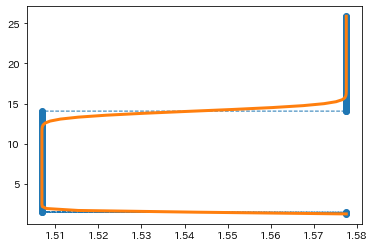

In [224]:
tate_leftXY_array = CordinateToList(tate_left)
left_1 = DrawBezierCurve(tate_leftXY_array)

In [211]:
# def CordinateToListTateLeft(df):
#     df_xy = df.drop('Z',axis=1)
#     df_xy = df_xy.sort_values('Y')
#     list_xy = []
#     for i in range(len(df_xy)):
#         list1 = df_xy.iloc[i].to_list()
#         list_xy.append(list1)
#     q = np.array(list_xy, dtype=np.float64)
#     return q

In [225]:
#MakeCsv(tate_left,'tate_left')

### タテ右

In [226]:
tate_right_x = [101.457016]
tate_right = pd.DataFrame([],columns = ['X','Y','Z'])#空のデータフレームを作成
for x in tate_right_x:
    tate_right = pd.concat([tate_right,dfLt2_c_manu_s1_data[dfLt2_c_manu_s1_data.X==x]])
tate_right = pd.concat([tate_right,dfLt2_c_manu_s1_data[dfLt2_c_manu_s1_data.X==101.38638][:-1]])
tate_right = pd.concat([tate_right,dfLt2_c_manu_s1_data[dfLt2_c_manu_s1_data.X==101.315743][:-1]])
tate_right = SortXY(tate_right)
tate_right = tate_right.reset_index(drop=True)

loading: 100%|██████████| 3/3 [00:00<00:00, 746.76keysrokes/s]


In [227]:
tate_right

,X,Y,Z
0,101.315743,1.577540,5.21429
1,101.315743,1.648176,5.26305
2,101.386380,1.648176,5.23097
3,101.457016,1.648176,5.24797
4,101.457016,1.718812,5.21950
...,...,...,...
347,101.457016,25.947002,5.31962
348,101.457016,26.017638,5.31777
349,101.457016,26.088274,5.31591
350,101.457016,26.158910,5.30858


### 下

In [228]:
#under_x = [1.57754]
under_y = [1.224359,1.294996,1.365632,1.436268,1.506904,1.577540]
under = pd.DataFrame([],columns = ['X','Y','Z'])#空のデータフレームを作成
for y in under_y:
    under = pd.concat([under,dfLt2_c_manu_s1_data[dfLt2_c_manu_s1_data.Y==y]])
# under = pd.concat([under,dfLt2_c_manu_s1_data[dfLt2_c_manu_s1_data.X==1.648176][:-1]])
#under = pd.concat([under,tate_left.drop(tate_left_index, inplace=True)])
#a11 = dfLt2_c_manu_s1_data[dfLt2_c_manu_s1_data.X==under_x[0]]
#a11 = a11[a11.Y<5]
#under = pd.concat([under,a11])
under = SortXY(under)
under = under.reset_index(drop=True)
under.drop(under.index[[0,1,3,4,5]],inplace=True)
under = SortXY(under)
under = under.reset_index(drop=True)

loading: 100%|██████████| 1413/1413 [00:00<00:00, 1576.76keysrokes/s]


In [229]:
under

,X,Y,Z
0,1.577540,1.294996,5.28449
1,1.648176,1.224359,5.29842
2,1.648176,1.294996,5.30096
3,1.718812,1.224359,5.30255
4,1.789448,1.224359,5.30335
...,...,...,...
1414,101.033199,1.577540,5.33102
1415,101.103835,1.577540,5.34367
1416,101.174471,1.577540,5.33013
1417,101.245107,1.577540,5.28817


In [230]:
under1 = under[under.X<30]
under2 = under[(under.X>=30)&(under.X<55)]
under3 = under[(under.X>=55)&(under.X<110)]

In [1766]:
#MakeCsv(under,'under')

In [231]:
#Mapping(under,'under',90,90, save=False)
#mapping(dfLo, 'kibishi', -90, 90, save=False)

# ベジェ曲線

## データフレーム→行列型に

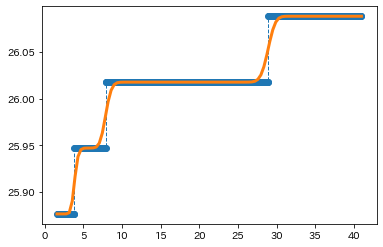

In [232]:
ue_leftXY_array = CordinateToList(ue_left)
ue_left_1 = DrawBezierCurve(ue_leftXY_array)

In [233]:
ue_bead

,X,Y,Z
0,40.992496,26.088274,5.23596
1,40.992496,26.158910,5.23399
2,41.063132,26.158910,5.23902
3,41.063132,26.229546,5.22777
4,41.133768,26.229546,5.24028
...,...,...,...
478,64.302416,26.441455,5.23666
479,64.373052,26.300183,5.26084
480,64.373052,26.370819,5.23241
481,64.443688,26.300183,5.22815


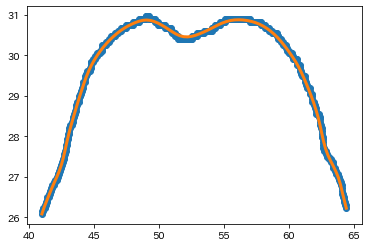

In [234]:
ue_beadXY_array = CordinateToList(ue_bead)
ue_bead_1 = DrawBezierCurve(ue_beadXY_array)

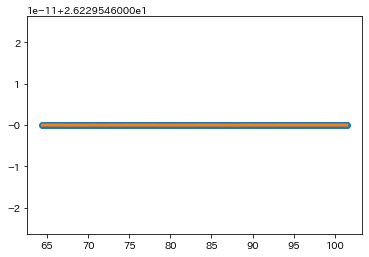

In [235]:
ue_rightXY_array = CordinateToList(ue_right)
ue_right_1 = DrawBezierCurve(ue_rightXY_array)

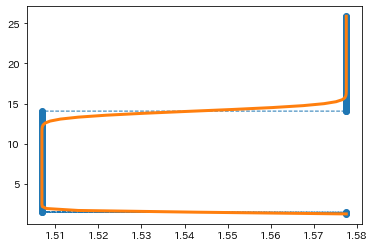

In [236]:
tate_leftXY_array = CordinateToList(tate_left)
left_1 = DrawBezierCurve(tate_leftXY_array)

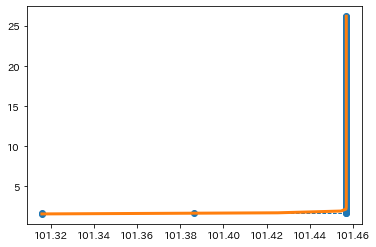

In [237]:
tate_rightXY_array = CordinateToList(tate_right)
tate_right_1 = DrawBezierCurve(tate_rightXY_array)

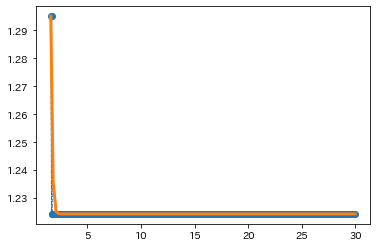

In [238]:
underXY_array1 = CordinateToList(under1)
under1_1 = DrawBezierCurve(underXY_array1)

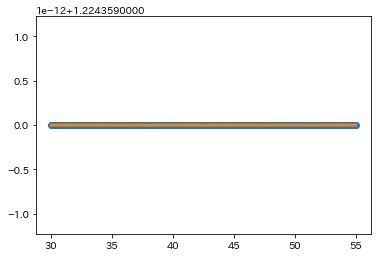

In [239]:
underXY_array2 = CordinateToList(under2)
under2_1 = DrawBezierCurve(underXY_array2)

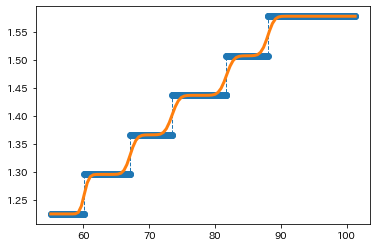

In [240]:
underXY_array3 = CordinateToList(under3)
under3_1 = DrawBezierCurve(underXY_array3)

In [242]:
all_array = [ue_leftXY_array,ue_beadXY_array,ue_rightXY_array,tate_leftXY_array,tate_rightXY_array,underXY_array1,underXY_array2,underXY_array3]

In [244]:
all_array[1][1][-2]

40.992496

## 区分けされたグラフを重ねる

100%|██████████| 8/8 [01:55<00:00, 14.49s/it]


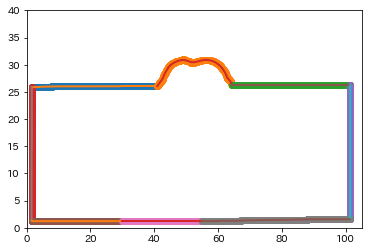

In [246]:
a = DrawBezierCurve2(all_array)

## 出てきた座標をdfに格納

In [247]:
# ベジェ曲線の点
df_gt_all = pd.DataFrame([],columns=['X','Y'])
for i in range(len(a[0])):
    df_gt_be = pd.DataFrame([],columns=['X','Y'])
    df_gt_be['X'] = a[0][i]
    df_gt_be['Y'] = a[1][i]
    df_gt_all = pd.concat([df_gt_all,df_gt_be])

In [248]:
# もとの点
df_ct_all = pd.DataFrame([],columns=['X','Y'])
for i in range(len(a[0])):
    df_ct_be = pd.DataFrame([],columns=['X','Y'])
    df_ct_be['X'] = a[0][i]
    df_ct_be['Y'] = a[1][i]
    df_ct_all = pd.concat([df_ct_all,df_ct_be])

In [249]:
df_gt_all

,X,Y
0,1.577540,25.876366
1,1.617167,25.876366
2,1.656794,25.876366
3,1.696420,25.876366
4,1.736047,25.876366
...,...,...
996,101.129266,1.577540
997,101.175886,1.577540
998,101.222505,1.577540
999,101.269127,1.577540


In [250]:
df_gt_all.duplicated().value_counts()

False    8002
True        6
dtype: int64

In [251]:
df_gt_all = df_gt_all[~df_gt_all.duplicated()]

In [252]:
df_gt_all

,X,Y
0,1.577540,25.876366
1,1.617167,25.876366
2,1.656794,25.876366
3,1.696420,25.876366
4,1.736047,25.876366
...,...,...
995,101.082647,1.577540
996,101.129266,1.577540
997,101.175886,1.577540
998,101.222505,1.577540


In [253]:
df_ct_all.duplicated().value_counts()

False    8002
True        6
dtype: int64

In [254]:
df_ct_all = df_ct_all[~df_ct_all.duplicated()]

In [1913]:
df_ct_all

,X,Y
0,1.577540,25.876366
1,1.617167,25.876366
2,1.656794,25.876366
3,1.696420,25.876366
4,1.736047,25.876366
...,...,...
995,101.082647,1.577540
996,101.129266,1.577540
997,101.175886,1.577540
998,101.222505,1.577540


In [255]:
df_ct_all

,X,Y
0,1.577540,25.876366
1,1.617167,25.876366
2,1.656794,25.876366
3,1.696420,25.876366
4,1.736047,25.876366
...,...,...
995,101.082647,1.577540
996,101.129266,1.577540
997,101.175886,1.577540
998,101.222505,1.577540


In [1914]:
#MakeCsv(df_gt_all,'df_gt_all_0001_new')

In [1915]:
#MakeCsv(df_ct_all,'df_ct_all_0001_new')

In [256]:
df_ct_all_0001_new = ReadCsv('df_ct_all_0001_new')

In [561]:
df_gt_all_0001_new = ReadCsv('df_gt_all_0001_new')
df_gt_all_0001_new = df_gt_all_0001_new[~df_gt_all_0001_new.duplicated()]
#エッジのベジエ

In [562]:
df_gt_all_0001_new

,X,Y
0,1.577540,25.876366
1,1.617167,25.876366
2,1.656794,25.876366
3,1.696420,25.876366
4,1.736047,25.876366
...,...,...
995,101.082647,1.577540
996,101.129266,1.577540
997,101.175886,1.577540
998,101.222505,1.577540


# 内外判定(non-Lowess)

## edgeの座標順番を一筆書きにする

### df_gt_all_0001_new

In [547]:
edge_1 = df_gt_all_0001_new.query('X<=1.577542')
edge_1 = edge_1.sort_values(by='Y', ascending=False)
edge_1 = edge_1.reset_index(drop=True)
edge_1

,X,Y
0,1.577540,25.876366
1,1.577540,25.851716
2,1.577540,25.827063
3,1.577540,25.802411
4,1.577540,25.777759
...,...,...
996,1.524344,1.393604
997,1.531657,1.368952
998,1.542026,1.344300
999,1.556721,1.319648


In [549]:
edge_2 = df_gt_all_0001_new.query('Y<=1.577541 & X>1.577540')
edge_2 = edge_2.sort_values(by='X', ascending=True)
edge_2 = edge_2.reset_index(drop=True)
edge_2

,X,Y
0,1.601607,1.275388
1,1.620819,1.266138
2,1.638871,1.260842
3,1.657547,1.256755
4,1.677580,1.252895
...,...,...
2997,101.129266,1.577540
2998,101.175886,1.577540
2999,101.222505,1.577540
3000,101.269127,1.577540


In [550]:
edge_3 = df_gt_all_0001_new.query('Y>1.577540 & Y<=26.204755 & X>=101.315742')
edge_3 = edge_3.sort_values(by='Y', ascending=True)
edge_3 = edge_3.reset_index(drop=True)
edge_3

,X,Y
0,101.319582,1.598494
1,101.329208,1.613662
2,101.342146,1.625517
3,101.356501,1.635956
4,101.370939,1.646310
...,...,...
994,101.457016,26.105581
995,101.457016,26.130374
996,101.457016,26.155167
997,101.457016,26.179960


In [551]:
edge_4 = df_gt_all_0001_new.query('Y>=25.876366 & X>1.577540 & X<=101.457016')
edge_4 = edge_4.sort_values(by='X', ascending=False)
edge_4 = edge_4.reset_index(drop=True)
#手動で調整する
edge_4.drop([0,1,2,3,5,6,7,8,9,10],inplace=True)
edge_4 = edge_4.reset_index(drop=True)
edge_4

,X,Y
0,101.457016,25.932028
1,101.457016,26.179960
2,101.457016,26.080787
3,101.457016,26.006408
4,101.457016,25.882442
...,...,...
2999,1.815301,25.876366
3000,1.775674,25.876366
3001,1.736047,25.876366
3002,1.696420,25.876366


In [996]:
MakeCsv(edge_4,'edge_4')

In [559]:
df_edge_all = pd.DataFrame([],columns = ['X','Y'])
df_edge_all = pd.concat([df_edge_all,edge_1])
df_edge_all = pd.concat([df_edge_all,edge_2])
df_edge_all = pd.concat([df_edge_all,edge_3])
df_edge_all = pd.concat([df_edge_all,edge_4])
df_edge_all = df_edge_all[~df_edge_all.duplicated()]
df_edge_all = df_edge_all.reset_index(drop=True)

In [1005]:
df_edge_all

,X,Y
0,1.577540,25.876366
1,1.577540,25.851716
2,1.577540,25.827063
3,1.577540,25.802411
4,1.577540,25.777759
...,...,...
7996,1.815301,25.876366
7997,1.775674,25.876366
7998,1.736047,25.876366
7999,1.696420,25.876366


In [1004]:
MakeCsv(df_edge_all,'df_edge_all')

In [564]:
edge_x = df_edge_all.X.to_list()
edge_y = df_edge_all.Y.to_list()
edge_list1 = []
for i in range(len(df_edge_all)):
    edge_geo = (df_edge_all.iloc[i][0],df_edge_all.iloc[i][1])
    edge_list1.append(edge_geo)

In [565]:
edge_list1

[(1.57754, 25.876366),
 (1.5775400000000002, 25.85171581732648),
 (1.57754, 25.82706267302892),
 (1.57754, 25.802410971284623),
 (1.57754, 25.77775924829742),
 (1.57754, 25.753107512395648),
 (1.57754, 25.728454302100204),
 (1.57754, 25.703802562387672),
 (1.57754, 25.679150828162754),
 (1.57754, 25.65449910195005),
 (1.5775399999999995, 25.6298473848608),
 (1.57754, 25.605194207581707),
 (1.57754, 25.58054250819847),
 (1.5775400000000002, 25.55589081620864),
 (1.57754, 25.531239130229164),
 (1.5775399999999995, 25.50658744877752),
 (1.5775400000000002, 25.48193430101514),
 (1.57754, 25.45728262432614),
 (1.57754, 25.432630948136342),
 (1.5775399999999995, 25.40797927144555),
 (1.5775399999999995, 25.383326124100893),
 (1.57754, 25.35867444429537),
 (1.5775400000000002, 25.33402276231904),
 (1.5775399999999995, 25.309371078033564),
 (1.57754, 25.284719391471725),
 (1.57754, 25.260066233430845),
 (1.57754, 25.23541454293396),
 (1.5775400000000002, 25.21076285095),
 (1.5775400000000002, 

### df_gt_all_0001_new2

In [1925]:
df_gt_all_0001_new2 = pd.read_csv('C://Users//owner//Desktop//Foldas//Research//data//df_gt_all_0001_new2.csv')
df_gt_all_0001_new2

,X,Y
0,1.506904,3.562980
1,1.506904,3.612284
2,1.506904,3.636936
3,1.506904,3.710892
4,1.506904,3.760196
...,...,...
7999,101.457016,26.105581
8000,101.457016,26.130374
8001,101.457016,26.155167
8002,101.457016,26.179960


In [1918]:
edge2_1 = df_gt_all_0001_new2.query('X<=1.577542')
edge2_1 = edge2_1.sort_values(by='Y', ascending=False)
edge2_1 = edge2_1.reset_index(drop=True)
edge2_1

,X,Y
0,1.577540,25.876366
1,1.577540,25.851716
2,1.577540,25.827063
3,1.577540,25.802411
4,1.577540,25.777759
...,...,...
996,1.524344,1.393604
997,1.531657,1.368952
998,1.542026,1.344300
999,1.556721,1.319648


In [1919]:
edge2_2 = df_gt_all_0001_new2.query('Y<=1.577541 & X>1.577540')
edge2_2 = edge2_2.sort_values(by='X', ascending=True)
edge2_2 = edge2_2.reset_index(drop=True)
edge2_2

,X,Y
0,1.601607,1.275388
1,1.620819,1.266138
2,1.638871,1.260842
3,1.657547,1.256755
4,1.677580,1.252895
...,...,...
2997,101.129266,1.577540
2998,101.175886,1.577540
2999,101.222505,1.577540
3000,101.269127,1.577540


In [1920]:
edge2_3 = df_gt_all_0001_new2.query('Y>1.577540 & Y<=26.204755 & X>=101.315742')
edge2_3 = edge2_3.sort_values(by='Y', ascending=True)
edge2_3 = edge2_3.reset_index(drop=True)
edge2_3

,X,Y
0,101.319582,1.598494
1,101.329208,1.613662
2,101.342146,1.625517
3,101.356501,1.635956
4,101.370939,1.646310
...,...,...
994,101.457016,26.105581
995,101.457016,26.130374
996,101.457016,26.155167
997,101.457016,26.179960


In [1922]:
edge2_4 = df_gt_all_0001_new2.query('Y>=25.876366 & X>1.577540 & X<=101.457016')
edge2_4 = edge2_4.sort_values(by='X', ascending=False)
edge2_4 = edge2_4.reset_index(drop=True)
edge2_4.drop([0,1,2,3,5,6,7,8,9,10],inplace=True)
edge2_4 = edge_4.reset_index(drop=True)
edge2_4

,X,Y
0,101.457016,25.932028
1,101.457016,26.179960
2,101.457016,26.080787
3,101.457016,26.006408
4,101.457016,25.882442
...,...,...
2999,1.815301,25.876366
3000,1.775674,25.876366
3001,1.736047,25.876366
3002,1.696420,25.876366


In [1924]:
df_edge_all2 = pd.DataFrame([],columns = ['X','Y'])
df_edge_all2 = pd.concat([df_edge_all2,edge2_1])
df_edge_all2 = pd.concat([df_edge_all2,edge2_2])
df_edge_all2 = pd.concat([df_edge_all2,edge2_3])
df_edge_all2 = pd.concat([df_edge_all2,edge2_4])
df_edge_all2 = df_edge_all2[~df_edge_all2.duplicated()]
df_edge_all2 = df_edge_all2.reset_index(drop=True)
df_edge_all2

,X,Y
0,1.577540,25.876366
1,1.577540,25.851716
2,1.577540,25.827063
3,1.577540,25.802411
4,1.577540,25.777759
...,...,...
8001,1.815301,25.876366
8002,1.775674,25.876366
8003,1.736047,25.876366
8004,1.696420,25.876366


In [1926]:
edge2_x = df_edge_all2.X.to_list()
edge2_y = df_edge_all2.Y.to_list()
edge_list2 = []
for i in range(len(df_edge_all2)):
    edge_geo2 = (df_edge_all2.iloc[i][0],df_edge_all2.iloc[i][1])
    edge_list2.append(edge_geo2)

In [1927]:
edge_list2

[(1.57754, 25.876366),
 (1.57754, 25.85171582),
 (1.57754, 25.82706267),
 (1.57754, 25.80241097),
 (1.57754, 25.77775925),
 (1.57754, 25.75310751),
 (1.57754, 25.7284543),
 (1.57754, 25.70380256),
 (1.57754, 25.67915083),
 (1.57754, 25.6544991),
 (1.57754, 25.62984738),
 (1.57754, 25.60519421),
 (1.57754, 25.58054251),
 (1.57754, 25.55589082),
 (1.57754, 25.53123913),
 (1.57754, 25.50658745),
 (1.57754, 25.4819343),
 (1.57754, 25.45728262),
 (1.57754, 25.43263095),
 (1.57754, 25.40797927),
 (1.57754, 25.38332612),
 (1.57754, 25.35867444),
 (1.57754, 25.33402276),
 (1.57754, 25.30937108),
 (1.57754, 25.28471939),
 (1.57754, 25.26006623),
 (1.57754, 25.23541454),
 (1.57754, 25.21076285),
 (1.57754, 25.18611116),
 (1.57754, 25.16145946),
 (1.57754, 25.1368063),
 (1.57754, 25.11215461),
 (1.57754, 25.08750291),
 (1.57754, 25.06285122),
 (1.57754, 25.03819806),
 (1.57754, 25.01354636),
 (1.57754, 24.98889467),
 (1.57754, 24.96424298),
 (1.57754, 24.93959129),
 (1.57754, 24.91493813),
 (1.57

## ポリゴン（多角形）の生成

In [566]:
# df_gt_all_0001_new
points2 = edge_list1
poly2 = Polygon(*points2)

In [1928]:
# df_gt_all_0001_new2
points3 = edge_list2
poly3 = Polygon(*points3)

In [571]:
# # ポリゴン（多角形）の生成
# points1 = edge_list
# poly = Polygon(*points1)

In [2226]:
# df_gt_left = df_gt_all.query('X<1.73')
# df_gt_left = SortXY(df_gt_left)
# edge_x = df_gt_left.X.to_list()
# edge_y = df_gt_left.Y.to_list()
# edge_list_left = []
# for i in range(len(df_gt_left)):
#     edge_geo_left = (df_gt_left.iloc[i][0],df_gt_left.iloc[i][1])
#     edge_list_left.append(edge_geo_left)

In [2223]:
#対応するXYZを取得
# mesh_geo_all = []
# for i in tqdm(range(len(mesh_ver))):
# #for i in tqdm(range(3)):
#     mesh_ver1 = mesh_ver.iloc[i]
#     mesh_geo_list = []
#     for k in range(3):
#         mesh_tapple = (mesh_geo.iloc[mesh_ver1].iloc[k].X,mesh_geo.iloc[mesh_ver1].iloc[k].Y)
#         mesh_geo_list.append(mesh_tapple)
#     mesh_geo_all.append(mesh_geo_list)

[Point2D(1, 27/2), Point2D(1/2, 3), Point2D(17/10, 49/10), Point2D(5, 2)]

In [570]:
# ポリゴン（多角形）の生成
# points1 = edge_list
# poly = Polygon(*points1)

## 内外判定確認

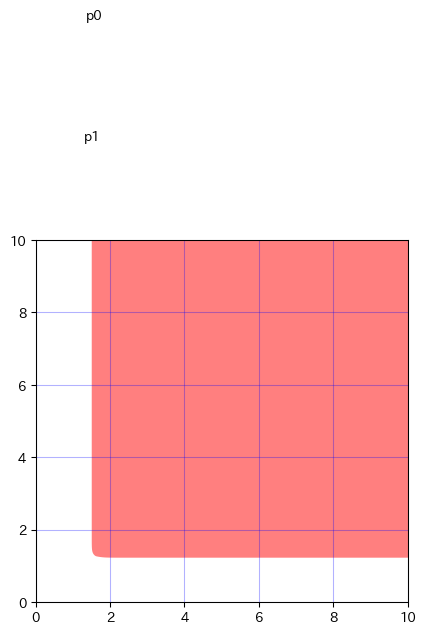

p0 : 多角形の内部に存在するか？ True
p1 : 多角形の内部に存在するか？ True


In [2541]:
from sympy.geometry import *
import matplotlib.pyplot as plt
%matplotlib inline
# ポイント（点）の生成
#101.301	26.1859

p0 = Point(1.5779999, 15.814)
p1 = Point(1.508, 12.473) # 境界線上
p2 = Point(5.9, 4.9)
p3 = Point(5, 2)
points = [p0,p1]

# グラフ描画
plt.figure(figsize=(5,5),dpi=96)
tmp = list(map(lambda p:(float(p.x),float(p.y)), poly3.vertices))
tmp = plt.Polygon(tmp,fc='red',alpha=0.5)
plt.gca().add_patch(tmp)

for i,p in enumerate(points) :
    plt.plot(p.x, p.y, color='0.0',marker='.')
    plt.text(p.x, p.y + 0.2, 'p{0}'.format(i) , size=10, 
             horizontalalignment='center', verticalalignment='bottom')

xRange=(10,15)#メモリ軸の最大値
yRange=(10,15) #メモリ軸の最大値
plt.xlim(xRange)
plt.ylim(yRange)
# plt.xticks(range(xRange[0],xRange[1]+1))
# plt.yticks(range(yRange[0],yRange[1]+1))
plt.grid(color='blue', alpha=0.3)
plt.show()

for i,p in enumerate(points) :
    print( f'p{i} : 多角形の内部に存在するか？ {poly3.encloses_point(p)}' )

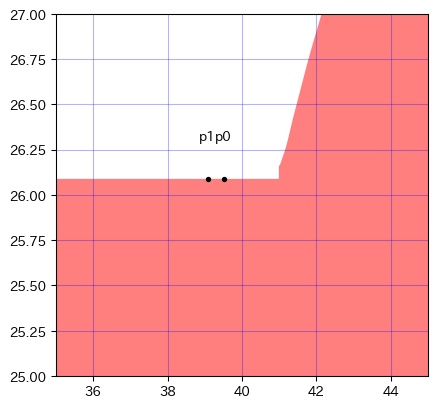

p0 : 多角形の内部に存在するか？ True
p1 : 多角形の内部に存在するか？ True


In [2453]:
from sympy.geometry import *
import matplotlib.pyplot as plt
%matplotlib inline
# ポイント（点）の生成
#101.301	26.1859

p0 = Point(39.505001, 26.087999)
p1 = Point(39.076, 26.087999) # 境界線上
p2 = Point(5.9, 4.9)
p3 = Point(5, 2)
points = [p0,p1]

# グラフ描画
plt.figure(figsize=(5,5),dpi=96)
tmp = list(map(lambda p:(float(p.x),float(p.y)), poly2.vertices))
tmp = plt.Polygon(tmp,fc='red',alpha=0.5)
plt.gca().add_patch(tmp)

for i,p in enumerate(points) :
    plt.plot(p.x, p.y, color='0.0',marker='.')
    plt.text(p.x, p.y + 0.2, 'p{0}'.format(i) , size=10, 
             horizontalalignment='center', verticalalignment='bottom')

xRange=(35,45)#メモリ軸の最大値
yRange=(25,27) #メモリ軸の最大値
plt.xlim(xRange)
plt.ylim(yRange)
# plt.xticks(range(xRange[0],xRange[1]+1))
# plt.yticks(range(yRange[0],yRange[1]+1))
plt.grid(color='blue', alpha=0.3)
plt.show()

for i,p in enumerate(points) :
    print( f'p{i} : 多角形の内部に存在するか？ {poly2.encloses_point(p)}' )

In [ ]:
# 線上、頂点はFALSE

In [1119]:
poly10 = Polygon( (1,1),(2,3),(3,1) )

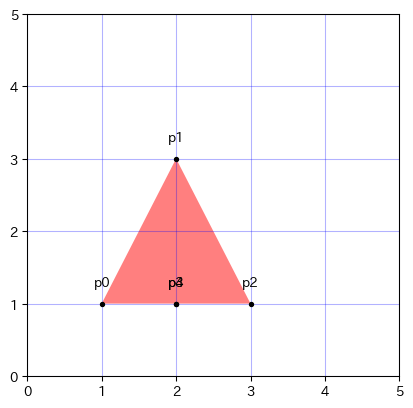

p0 : Point2D(1, 1) False
p1 : Point2D(2, 3) False
p2 : Point2D(3, 1) False
p3 : Point2D(2, 1) False
p4 : Point2D(2, 1001/1000) True


In [1170]:
from sympy.geometry import *
import matplotlib.pyplot as plt
%matplotlib inline
# ポイント（点）の生成
#101.301	26.1859

p0 = Point(1,1)
p1 = Point(2,3) # 境界線上
p2 = Point(3,1)
p3 = Point(2,1)
p4 = Point(2,1.001)
points = [p0,p1,p2,p3,p4]

# グラフ描画
plt.figure(figsize=(5,5),dpi=96)
tmp = list(map(lambda p:(float(p.x),float(p.y)), poly10.vertices))
tmp = plt.Polygon(tmp,fc='red',alpha=0.5)
plt.gca().add_patch(tmp)

for i,p in enumerate(points) :
    plt.plot(p.x, p.y, color='0.0',marker='.')
    plt.text(p.x, p.y + 0.2, 'p{0}'.format(i) , size=10, 
             horizontalalignment='center', verticalalignment='bottom')

xRange=(0,5)#メモリ軸の最大値
yRange=(0,5) #メモリ軸の最大値
plt.xlim(xRange)
plt.ylim(yRange)
# plt.xticks(range(xRange[0],xRange[1]+1))
# plt.yticks(range(yRange[0],yRange[1]+1))
plt.grid(color='blue', alpha=0.3)
plt.show()

for i,p in enumerate(points) :
    print( f'p{i} : {p} {poly10.encloses_point(p)}' )

## plyファイルの整理

In [260]:
#節点座標のデータ
mesh_geo = pd.read_table('C://Users//owner//Desktop//Foldas//Research//data/mesh_geometry.txt',sep=' ',header=None)
mesh_geo1 = mesh_geo.copy()#コピー
mesh_geo1.drop(columns=[2,3,4,5,6,7], inplace=True)
mesh_geo1 = mesh_geo1.rename(columns={0:'X',1:'Y'})
mesh_geo1

,X,Y
0,101.73000,1.7042
1,3.38097,26.2999
2,6.81675,26.3838
3,3.59571,26.3133
4,7.03149,26.3871
...,...,...
59775,94.64400,25.7564
59776,98.93870,25.3269
59777,99.15350,25.3269
59778,99.36820,25.3269


In [261]:
mesh_ver = pd.read_table('C://Users//owner//Desktop//Foldas//Research//data/mesh_vertices.txt',sep=' ',header=None)
mesh_ver.drop(columns=[0,4], inplace=True)
mesh_ver

,1,2,3
0,1663,1653,106
1,106,111,1663
2,119,1660,1663
3,119,1665,1660
4,119,123,1665
...,...,...,...
118382,58573,59277,59231
118383,58429,59277,58597
118384,58406,59277,58429
118385,59277,58573,58585


In [267]:
mesh_ver

,1,2,3
0,1663,1653,106
1,106,111,1663
2,119,1660,1663
3,119,1665,1660
4,119,123,1665
...,...,...,...
118382,58573,59277,59231
118383,58429,59277,58597
118384,58406,59277,58429
118385,59277,58573,58585


## 対応するXYZ取得

In [269]:
mesh_geo_all = []
for i in tqdm(range(len(mesh_ver))):
#for i in tqdm(range(3)):
    mesh_ver1 = mesh_ver.iloc[i]
    mesh_geo_list = []
    for k in range(3):
        mesh_tapple = (mesh_geo1.iloc[mesh_ver1].iloc[k].X,mesh_geo1.iloc[mesh_ver1].iloc[k].Y)
        mesh_geo_list.append(mesh_tapple)
    mesh_geo_all.append(mesh_geo_list)

100%|██████████| 118387/118387 [02:01<00:00, 975.40it/s] 


In [270]:
mesh_geo_all[1]

[(1.57033, 1.27644), (1.49377, 1.49117), (1.44834, 1.49117)]

In [271]:
p1 = Point(mesh_geo_all[0][0])
p2 = Point(mesh_geo_all[0][1])
p3 = Point(mesh_geo_all[0][2])

## 不必要なデータは消去

In [273]:
mesh_geo1

,X,Y
0,101.73000,1.7042
1,3.38097,26.2999
2,6.81675,26.3838
3,3.59571,26.3133
4,7.03149,26.3871
...,...,...
59775,94.64400,25.7564
59776,98.93870,25.3269
59777,99.15350,25.3269
59778,99.36820,25.3269


In [275]:
mesh_geo_1 = mesh_geo1[(mesh_geo1.X>1.41521)&(mesh_geo1.X<101.517)&(mesh_geo1.Y>0.97)]
mesh_geo_1

,X,Y
1,3.38097,26.2999
2,6.81675,26.3838
3,3.59571,26.3133
4,7.03149,26.3871
5,3.81044,26.3312
...,...,...
59775,94.64400,25.7564
59776,98.93870,25.3269
59777,99.15350,25.3269
59778,99.36820,25.3269


In [332]:
#取り除くデータのインデックス
mesh_geo_2 = mesh_geo1[(mesh_geo1.X<=1.41521)]
mesh_geo_2 = mesh_geo_2.append(mesh_geo1[mesh_geo1.X>=101.517])
mesh_geo_2.append(mesh_geo1[mesh_geo1.Y<=0.97])
mesh_geo_delete = mesh_geo_2.index
mesh_geo_delete

Int64Index([  63,   66,   68,   74,   78,   84,   91,   97,  100,  109,
            ...
            6709, 6715, 6720, 6723, 6741, 6743, 6746, 6748, 6751, 6754],
           dtype='int64', length=450)

In [329]:
mesh_geo1[(mesh_geo1.X<=1.41521)]

,X,Y
63,1.34218,4.06801
66,1.33872,4.28275
68,1.33995,4.49748
74,1.33626,4.71222
78,1.32691,4.92696
...,...,...
2617,1.23360,24.25320
2620,1.23360,18.88480
2621,1.23360,19.09960
2622,1.23360,24.46800


In [333]:
mesh_geo1[mesh_geo1.X>=101.517]

,X,Y
0,101.730,1.70420
548,101.570,2.13538
550,101.631,2.35012
603,101.656,4.06801
605,101.658,4.28275
...,...,...
6743,101.730,25.11220
6746,101.730,25.32690
6748,101.730,25.54170
6751,101.730,25.75640


In [334]:
mesh_geo1[mesh_geo1.Y<0.97]

,X,Y
236,24.4252,0.707718
238,24.2163,0.846962
241,24.2104,0.850452
242,26.0118,0.632225
244,24.5791,0.632225
...,...,...
14462,25.0694,0.846962
14467,25.2841,0.632225
14470,25.2841,0.846962
14489,25.4988,0.632225


In [2166]:
mesh_geo_1.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            59770, 59771, 59772, 59773, 59774, 59775, 59776, 59777, 59778,
            59779],
           dtype='int64', length=58784)

In [278]:
mesh_geo_1.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            59770, 59771, 59772, 59773, 59774, 59775, 59776, 59777, 59778,
            59779],
           dtype='int64', length=58784)

In [2162]:
#MakeCsv(mesh_geo_1,'mesh_geo_1')

## 領域に分けていく

### 左

In [1174]:
mesh_geo_left = mesh_geo_1[mesh_geo_1.X<=1.66308]
edge_left_x = mesh_geo_left.X.to_list()
edge_left_y = mesh_geo_left.Y.to_list()
edge_list_left = []
for i in range(len(edge_left_y)):
    edge_geo_list_left = (mesh_geo_left.iloc[i][0],mesh_geo_left.iloc[i][1])
    edge_list_left.append(edge_geo_list_left)
points = edge_list_left
delete_mesh_geo_left =[]
for i in tqdm(range(len(edge_list_left))):
    delete_mesh_geo_left.append(poly2.encloses_point(points[i]))
# for i,p in enumerate(points[:10]):
#         delete_mesh_ver.append(poly.encloses_point(p))
    #print( f'{points[i]}p{i} : 多角形の内部に存在するか？ {poly.encloses_point(points[i])}' )
# for i,p in enumerate(points) :
#     print( f'p{i}{p} : 多角形の内部に存在するか？ {poly_left1.encloses_point(p)}' )

100%|██████████| 241/241 [27:49<00:00,  6.93s/it]


### 右

In [1175]:
mesh_geo_right = mesh_geo_1[mesh_geo_1.X>=101.301]
mesh_geo_right
edge_right_x = mesh_geo_right.X.to_list()
edge_right_y = mesh_geo_right.Y.to_list()
edge_list_right = []
for i in range(len(edge_right_y)):
    edge_geo_list_right = (mesh_geo_right.iloc[i][0],mesh_geo_right.iloc[i][1])
    edge_list_right.append(edge_geo_list_right)
points_right = edge_list_right
delete_mesh_geo_right =[]
for i in tqdm(range(len(edge_list_right))):
    delete_mesh_geo_right.append(poly2.encloses_point(points_right[i]))

100%|██████████| 241/241 [27:17<00:00,  6.79s/it]


### 上

In [1942]:
#mesh_geo_upper = mesh_geo_1[mesh_geo_1.Y>=26.1859]
mesh_geo_upper = mesh_geo_1[mesh_geo_1.Y>=25.85]
mesh_geo_upper
edge_list_upper = EdgeList(mesh_geo_upper)
points_upper = edge_list_upper
delete_mesh_geo_upper =[]
for i in tqdm(range(len(edge_list_upper))):
    delete_mesh_geo_upper.append(poly2.encloses_point(points_upper[i]))

100%|██████████| 3752/3752 [7:11:37<00:00,  6.90s/it]  


In [1943]:
upper_InOut_list =[]
for i in tqdm(range(len(delete_mesh_geo_upper))):
    InOutList = [edge_list_upper[i][0],edge_list_upper[i][1],delete_mesh_geo_upper[i]]
    upper_InOut_list.append(InOutList)

100%|██████████| 3752/3752 [00:00<00:00, 1254046.43it/s]


In [1944]:
df_Inout_upper = pd.DataFrame(upper_InOut_list)

In [1946]:
MakeCsv(df_Inout_upper,'df_Inout_upper')

In [1903]:
delete_mesh_geo_upper

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 Tr

### 下

In [1177]:
mesh_geo_under = mesh_geo_1[mesh_geo_1.Y<=1.70591]
mesh_geo_under
edge_list_under = EdgeList(mesh_geo_under)
points_under = edge_list_under
delete_mesh_geo_under =[]
for i in tqdm(range(len(edge_list_under))):
    delete_mesh_geo_under.append(poly2.encloses_point(points_under[i]))

100%|██████████| 2355/2355 [4:27:26<00:00,  6.81s/it]  


## 結合

### 左

In [1178]:
df_mesh_geo_left_InOut = mesh_geo_left.copy()
df_mesh_geo_left_InOut['InOut'] = delete_mesh_geo_left

### 右

In [1179]:
df_mesh_geo_right_InOut = mesh_geo_right.copy()
df_mesh_geo_right_InOut['InOut'] = delete_mesh_geo_right

### 上

In [1948]:
df_mesh_geo_upper_InOut = mesh_geo_upper.copy()
df_mesh_geo_upper_InOut['InOut'] = delete_mesh_geo_upper

### 下

In [1182]:
df_mesh_geo_under_InOut = mesh_geo_under.copy()
df_mesh_geo_under_InOut['InOut'] = delete_mesh_geo_under

### 一つにまとめる

In [1949]:
df_mesh_geo_all_InOut = pd.DataFrame([],columns=['X','Y'])
df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_left_InOut])
df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_right_InOut])
df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_upper_InOut])
df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_under_InOut])
df_mesh_geo_all_InOut = df_mesh_geo_all_InOut[~df_mesh_geo_all_InOut.duplicated()]
MakeCsv(df_mesh_geo_all_InOut,'df_mesh_geo_all_InOut')

In [1950]:
df_mesh_geo_all_InOut

,X,Y,InOut
94,1.66308,1.15459,False
106,1.57033,1.27644,False
111,1.49377,1.49117,False
119,1.44834,1.62512,False
735,1.43201,25.32690,False
...,...,...,...
32810,95.07350,1.70591,True
32813,95.28820,1.70591,True
32884,95.50300,1.70591,True
32887,95.71770,1.70591,True


In [119]:
df_mesh_geo_all_InOut = ReadCsv('df_mesh_geo_all_InOut')

In [120]:
df_mesh_geo_all_InOut.count()

X        6560
Y        6560
InOut    6560
dtype: int64

### 元のデータに挿入

In [121]:
mesh_geo_2 = df_mesh_geo.copy()
mesh_geo_2 = mesh_geo_2.drop([3,4,5,6], axis=1)
mesh_geo_2 = mesh_geo_2.rename(columns={0:'X',1:'Y',2:'Z'})
mesh_geo_2
mesh_geo_2_InOut = pd.merge(mesh_geo_2,df_mesh_geo_all_InOut,how='outer')
# mesh_geo_2_InOut['InOut'].count()
# MakeCsv(mesh_geo_2_InOut,'mesh_geo_2_InOut')

NameError: name 'df_mesh_geo' is not defined

In [1953]:
mesh_geo_2_InOut

,X,Y,Z,InOut
0,101.73000,1.7042,5.07305,NaN
1,3.38097,26.2999,5.07305,False
2,6.81675,26.3838,5.07305,False
3,3.59571,26.3133,5.07305,False
4,7.03149,26.3871,5.07305,False
...,...,...,...,...
59775,94.64400,25.7564,5.31493,NaN
59776,98.93870,25.3269,5.33591,NaN
59777,99.15350,25.3269,5.33589,NaN
59778,99.36820,25.3269,5.33628,NaN


In [1954]:
df_mesh_geo_all_InOut

,X,Y,InOut
94,1.66308,1.15459,False
106,1.57033,1.27644,False
111,1.49377,1.49117,False
119,1.44834,1.62512,False
735,1.43201,25.32690,False
...,...,...,...
32810,95.07350,1.70591,True
32813,95.28820,1.70591,True
32884,95.50300,1.70591,True
32887,95.71770,1.70591,True


### Nanを処理（X<=1.41521,X>=101.517,Y<=0.97はFalseにする）

In [1955]:
#  X<=1.41521,X>=101.517,Y<=0.97はFalseにする
#df_Lo_mesh_geo1[(df_Lo_mesh_geo1.X>1.41521)&(df_Lo_mesh_geo1.X<101.517)&(df_Lo_mesh_geo1.Y>0.97)]

mesh_geo_2_InOut_2 = mesh_geo_2_InOut.query('X<=1.41521 | X>=101.517 |Y<=0.97').fillna(False)
mesh_geo_2_InOut_2
#Falseを入れるインデックス取得
delete_mesh_geo_2_index = mesh_geo_2_InOut_2.index
#delete_mesh_geo_2_index
mesh_geo_2_InOut_del = mesh_geo_2_InOut.copy()
for i in tqdm(delete_mesh_geo_2_index):
    #Falseを代入
     mesh_geo_2_InOut_del.loc[i,'InOut'] = bool(0)
#mesh_geo_2_InOut_del
MakeCsv(mesh_geo_2_InOut_del,'mesh_geo_2_InOut_del')

100%|██████████| 996/996 [00:00<00:00, 1669.93it/s]


### Nan処理（残りはTrueにする）

In [1956]:
mesh_geo_2_InOut_del_T = mesh_geo_2_InOut_del.copy()
#nanをすべてtrueに
mesh_geo_2_InOut_del_T = mesh_geo_2_InOut_del_T.fillna(True)

#MakeCsv(mesh_geo_2_InOut_del_T,'mesh_geo_2_InOut_del_T')

In [1957]:
mesh_geo_2_InOut_del_T

,X,Y,Z,InOut
0,101.73000,1.7042,5.07305,False
1,3.38097,26.2999,5.07305,False
2,6.81675,26.3838,5.07305,False
3,3.59571,26.3133,5.07305,False
4,7.03149,26.3871,5.07305,False
...,...,...,...,...
59775,94.64400,25.7564,5.31493,True
59776,98.93870,25.3269,5.33591,True
59777,99.15350,25.3269,5.33589,True
59778,99.36820,25.3269,5.33628,True


In [1958]:
MakeCsv(mesh_geo_2_InOut_del_T,'mesh_geo_2_InOut_del_T')

In [125]:
mesh_geo_2_InOut_del_T.loc[2747,:]

X        2.73676
Y        25.9711
Z        5.18159
InOut      False
Name: 2747, dtype: object

# 内外判定（Lowess）

In [602]:
df_Lo_mesh_ver = pd.read_table('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\Mesh_Lowess_ver.txt',delim_whitespace=True,header=None)
df_Lo_mesh_ver1 = df_Lo_mesh_ver.drop([0], axis=1)
df_Lo_mesh_geo = pd.read_table('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\Mesh_Lowess_geo.txt',delim_whitespace=True,header=None)
df_Lo_mesh_geo1 = df_Lo_mesh_geo.drop([2,3,4,5,6], axis=1)
df_Lo_mesh_geo1 = df_Lo_mesh_geo1.rename(columns={0:'X',1:'Y',2:'Z'})

In [603]:
df_Lo_mesh_geo

,0,1,2,3,4,5,6
0,8.53465,1.12299,5.29847,0.001016,-0.041673,0.999131,9.59942
1,1.31966,4.06801,5.29847,-0.085581,0.001057,0.996331,9.49382
2,15.40620,1.12566,5.29847,-0.001012,-0.037461,0.999298,9.60085
3,15.62100,1.12584,5.29847,0.001005,-0.029133,0.999575,9.60076
4,5.09886,1.12082,5.29847,-0.001012,-0.037461,0.999298,9.59844
...,...,...,...,...,...,...,...
59844,101.51600,25.32690,5.32782,0.104515,0.005387,0.994509,9.58019
59845,101.51600,25.54170,5.32674,0.106875,0.005398,0.994258,9.53534
59846,101.51600,25.75640,5.32563,0.085942,0.003183,0.996295,9.46949
59847,101.51600,25.97110,5.32512,0.092079,0.020582,0.995539,9.37175


## 不要なデータは消去

In [285]:
df_Lo_mesh_geo_2 = df_Lo_mesh_geo1[(df_Lo_mesh_geo1.X>1.41521)&(df_Lo_mesh_geo1.X<101.517)&(df_Lo_mesh_geo1.Y>0.97)]
df_Lo_mesh_geo_2

,X,Y
0,8.53465,1.12299
2,15.40620,1.12566
3,15.62100,1.12584
4,5.09886,1.12082
5,15.83570,1.12562
...,...,...
59844,101.51600,25.32690
59845,101.51600,25.54170
59846,101.51600,25.75640
59847,101.51600,25.97110


In [2460]:
#MakeCsv(df_Lo_mesh_geo_2,'df_Lo_mesh_geo_2')

## 領域に分けていく

### 左

In [408]:
df_Lo_mesh_geo_left = df_Lo_mesh_geo_2[df_Lo_mesh_geo_2.X<=1.66308]
df_Lo_mesh_geo_left

,X,Y
12,1.66308,1.17260
16,1.53494,1.27644
24,1.44834,1.46191
30,1.43770,1.49117
600,1.41566,24.68270
...,...,...
41793,1.66308,23.60900
41797,1.44834,23.82380
41804,1.44834,24.03850
41808,1.44834,24.25320


In [393]:
#点のタプルを作る
edge_Lo_left_x = df_Lo_mesh_geo_left.X.to_list()
edge_Lo_left_y = df_Lo_mesh_geo_left.Y.to_list()
edge_Lo_list_left = []
for i in range(len(edge_Lo_left_y)):
    edge_Lo_geo_list_left = (df_Lo_mesh_geo_left.iloc[i][0],df_Lo_mesh_geo_left.iloc[i][1])
    edge_Lo_list_left.append(edge_Lo_geo_list_left)

In [1034]:
points = edge_Lo_list_left

In [1041]:
points[0].X

AttributeError: 'tuple' object has no attribute 'X'

In [572]:
# ポリゴン内外判定
points = edge_Lo_list_left
delete_Lo_mesh_geo_left =[]
for i in tqdm(range(len(edge_Lo_list_left))):
    delete_Lo_mesh_geo_left.append(poly2.encloses_point(points[i]))

100%|██████████| 247/247 [28:33<00:00,  6.94s/it]


### 右

In [613]:
mesh_Lo_geo_right = df_Lo_mesh_geo_2[df_Lo_mesh_geo_2.X>=101.301]
mesh_Lo_geo_right
edge_Lo_right_x = mesh_Lo_geo_right.X.to_list()
edge_Lo_right_y = mesh_Lo_geo_right.Y.to_list()
edge_Lo_list_right = []
for i in range(len(edge_Lo_right_y)):
    edge_Lo_geo_list_right = (mesh_Lo_geo_right.iloc[i][0],mesh_Lo_geo_right.iloc[i][1])
    edge_Lo_list_right.append(edge_Lo_geo_list_right)
points_Lo_right = edge_Lo_list_right
delete_Lo_mesh_geo_right =[]
for i in tqdm(range(len(edge_Lo_list_right))):
    delete_Lo_mesh_geo_right.append(poly2.encloses_point(points_Lo_right[i]))

100%|██████████| 241/241 [28:00<00:00,  6.97s/it]


### 上

In [614]:
mesh_Lo_geo_upper = df_Lo_mesh_geo_2[df_Lo_mesh_geo_2.Y>=26.1859]
mesh_Lo_geo_upper
edge_Lo_list_upper = EdgeList(mesh_Lo_geo_upper)
points_Lo_upper = edge_Lo_list_upper
delete_Lo_mesh_geo_upper =[]
for i in tqdm(range(len(edge_Lo_list_upper))):
    delete_Lo_mesh_geo_upper.append(poly2.encloses_point(points_Lo_upper[i]))

100%|██████████| 3510/3510 [6:41:54<00:00,  6.87s/it]  


### 下

In [615]:
mesh_Lo_geo_under = df_Lo_mesh_geo_2[df_Lo_mesh_geo_2.Y<=1.70591]
mesh_Lo_geo_under
edge_Lo_list_under = EdgeList(mesh_Lo_geo_under)
points_Lo_under = edge_Lo_list_under
delete_Lo_mesh_geo_under =[]
for i in tqdm(range(len(edge_Lo_list_under))):
    delete_Lo_mesh_geo_under.append(poly2.encloses_point(points_Lo_under[i]))

100%|██████████| 2336/2336 [4:26:47<00:00,  6.85s/it]  


## 結合

In [ ]:
# データの読み込み
df_Lo_mesh_geo = pd.read_table('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\Mesh_Lowess_geo.txt',delim_whitespace=True,header=None)
df_Lo_mesh_geo
df_Lo_mesh_geo.drop(columns=[6], inplace=True)
df_Lo_mesh_geo = df_Lo_mesh_geo.rename(columns={0:'X',1:'Y',2:'Z',3:'Nz',4:'Ny',5:'Nz'})

### 左

In [666]:
df_Lo_mesh_geo_left_InOut = df_Lo_mesh_geo_left.copy()
df_Lo_mesh_geo_left_InOut['InOut'] = delete_Lo_mesh_geo_left
# df_Lo_mesh_geo_left_InOut_sort = SortXYInOut(df_Lo_mesh_geo_left_InOut)
# MakeCsv(df_Lo_mesh_geo_left_InOut_sort,'df_Lo_mesh_geo_left_InOut_sort1')
# MakeCsv(df_Lo_mesh_geo_left_InOut,'df_Lo_mesh_geo_left_InOut')
# InOutを挿入する
# mesh_Lo_geo_left2 = df_Lo_mesh_geo_left.copy()
# mesh_Lo_geo_left2['InOut'] = delete_Lo_mesh_geo_left
# mesh_Lo_geo_left2_index = mesh_Lo_geo_left2.index
# mesh_Lo_geo_left2_false = mesh_Lo_geo_left2.query('InOut==False')
# mesh_Lo_geo_left2_true = mesh_Lo_geo_left2.query('InOut!=False')

In [685]:
df_Lo_mesh_geo_left_InOut

,X,Y,InOut
12,1.66308,1.17260,False
16,1.53494,1.27644,False
24,1.44834,1.46191,False
30,1.43770,1.49117,False
600,1.41566,24.68270,False
...,...,...,...
41793,1.66308,23.60900,True
41797,1.44834,23.82380,False
41804,1.44834,24.03850,False
41808,1.44834,24.25320,False


In [1172]:
MakeCsv(df_Lo_mesh_geo_left_InOut,'df_Lo_mesh_geo_left_InOut')

### 右

In [667]:
df_Lo_mesh_geo_right_InOut = mesh_Lo_geo_right.copy()
df_Lo_mesh_geo_right_InOut['InOut'] = delete_Lo_mesh_geo_right
# df_Lo_mesh_geo_right_InOut_sort = SortXYInOut(df_Lo_mesh_geo_right_InOut)
# MakeCsv(df_Lo_mesh_geo_right_InOut_sort,'df_Lo_mesh_geo_right_InOut_sort1')
# MakeCsv(df_Lo_mesh_geo_right_InOut,'df_Lo_mesh_geo_right_InOut')
# InOutを挿入する
# mesh_Lo_geo_right2 = mesh_Lo_geo_right.copy()
# mesh_Lo_geo_right2['InOut'] = delete_Lo_mesh_geo_right
# mesh_Lo_geo_right2_index = mesh_Lo_geo_right2.index
# mesh_Lo_geo_right2_false = mesh_Lo_geo_right2.query('InOut==False')
# mesh_Lo_geo_right2_true = mesh_Lo_geo_right2.query('InOut!=False')
# mesh_Lo_geo_3_right = pd.merge(mesh_Lo_geo_3_left,df_Lo_mesh_geo_right_InOut,how="left", on = "X")
# mesh_Lo_geo_3_right
# MakeCsv(mesh_Lo_geo_3_right,'mesh_Lo_geo_3_right')

### 上

In [668]:
df_Lo_mesh_geo_upper_InOut = mesh_Lo_geo_upper.copy()
df_Lo_mesh_geo_upper_InOut['InOut'] = delete_Lo_mesh_geo_upper
# df_Lo_mesh_geo_upper_InOut_sort = SortXYInOut(df_Lo_mesh_geo_upper_InOut)
# MakeCsv(df_Lo_mesh_geo_upper_InOut_sort,'df_Lo_mesh_geo_upper_InOut_sort1')
# MakeCsv(df_Lo_mesh_geo_upper_InOut,'df_Lo_mesh_geo_upper_InOut')
# InOutを挿入する
# mesh_Lo_geo_upper2 = mesh_Lo_geo_upper.copy()
# mesh_Lo_geo_upper2['InOut'] = delete_Lo_mesh_geo_upper
# mesh_Lo_geo_upper2_index = mesh_Lo_geo_upper2.index
# mesh_Lo_geo_upper2_false = mesh_Lo_geo_upper2.query('InOut==False')
# mesh_Lo_geo_upper2_true = mesh_Lo_geo_upper2.query('InOut!=False')
# mesh_Lo_geo_3_upper = pd.merge(mesh_Lo_geo_3_right,df_Lo_mesh_geo_upper_InOut,how='outer')
# mesh_Lo_geo_3_upper
# MakeCsv(mesh_Lo_geo_3_upper,'mesh_Lo_geo_3_upper')

In [683]:
df_Lo_mesh_geo_upper_InOut

,X,Y,InOut
649,3.97389,26.1859,False
652,10.25250,26.2663,False
654,13.68830,26.2602,False
655,4.02518,26.1914,False
656,13.90310,26.2599,False
...,...,...,...
59838,100.65700,26.1859,True
59839,100.87100,26.1859,True
59840,101.08600,26.1859,True
59841,101.30100,26.1859,True


### 下

In [669]:
df_Lo_mesh_geo_under_InOut = mesh_Lo_geo_under.copy()
df_Lo_mesh_geo_under_InOut['InOut'] = delete_Lo_mesh_geo_under
# df_Lo_mesh_geo_under_InOut_sort = SortXYInOut(df_Lo_mesh_geo_under_InOut)
# MakeCsv(df_Lo_mesh_geo_under_InOut_sort,'df_Lo_mesh_geo_under_InOut_sort1')
# MakeCsv(df_Lo_mesh_geo_under_InOut,'df_Lo_mesh_geo_under_InOut')
# # InOutを挿入する
# mesh_Lo_geo_under2 = mesh_Lo_geo_under.copy()
# mesh_Lo_geo_under2['InOut'] = delete_Lo_mesh_geo_under
# mesh_Lo_geo_under2_index = mesh_Lo_geo_under2.index
# mesh_Lo_geo_under2_false = mesh_Lo_geo_under2.query('InOut==False')
# mesh_Lo_geo_under2_true = mesh_Lo_geo_under2.query('InOut!=False')
# mesh_Lo_geo_3_under = pd.merge(mesh_Lo_geo_3_upper,mesh_Lo_geo_under2,how='left')
# mesh_Lo_geo_3_under
# MakeCsv(mesh_Lo_geo_3_under,'mesh_Lo_geo_3_under')

In [687]:
df_Lo_mesh_geo_left_InOut.count()+df_Lo_mesh_geo_right_InOut.count()+df_Lo_mesh_geo_upper_InOut.count()+df_Lo_mesh_geo_under_InOut.count()

X        6334
Y        6334
InOut    6334
dtype: int64

### 一つにまとめる

In [743]:
df_Lo_mesh_geo_all_InOut = pd.DataFrame([],columns=['X','Y'])
df_Lo_mesh_geo_all_InOut = pd.concat([df_Lo_mesh_geo_all_InOut,df_Lo_mesh_geo_left_InOut])
df_Lo_mesh_geo_all_InOut = pd.concat([df_Lo_mesh_geo_all_InOut,df_Lo_mesh_geo_right_InOut])
df_Lo_mesh_geo_all_InOut = pd.concat([df_Lo_mesh_geo_all_InOut,df_Lo_mesh_geo_upper_InOut])
df_Lo_mesh_geo_all_InOut = pd.concat([df_Lo_mesh_geo_all_InOut,df_Lo_mesh_geo_under_InOut])
df_Lo_mesh_geo_all_InOut = df_Lo_mesh_geo_all_InOut[~df_Lo_mesh_geo_all_InOut.duplicated()]
MakeCsv(df_Lo_mesh_geo_all_InOut,'df_Lo_mesh_geo_all_InOut')

### 元のデータに挿入

In [744]:
mesh_Lo_geo_2 = df_Lo_mesh_geo.copy()
mesh_Lo_geo_2_InOut = pd.merge(mesh_Lo_geo_2,df_Lo_mesh_geo_all_InOut,how='outer')
mesh_Lo_geo_2_InOut['InOut'].count()
MakeCsv(mesh_Lo_geo_2_InOut,'mesh_Lo_geo_2_InOut')

In [702]:
mesh_Lo_geo_2_InOut

,X,Y,Z,Nz,Ny,Nz,InOut
0,8.53465,1.12299,5.29847,0.001016,-0.041673,0.999131,False
1,1.31966,4.06801,5.29847,-0.085581,0.001057,0.996331,NaN
2,15.40620,1.12566,5.29847,-0.001012,-0.037461,0.999298,False
3,15.62100,1.12584,5.29847,0.001005,-0.029133,0.999575,False
4,5.09886,1.12082,5.29847,-0.001012,-0.037461,0.999298,False
...,...,...,...,...,...,...,...
59871,101.51600,25.54170,5.32674,0.106875,0.005398,0.994258,False
59872,101.51600,25.75640,5.32563,0.085942,0.003183,0.996295,False
59873,101.51600,25.97110,5.32512,0.092079,0.020582,0.995539,False
59874,101.51600,26.18590,5.31759,0.080237,0.082497,0.993356,False


In [746]:
#  X<=1.41521,X>=101.517,Y<=0.97はFalseにする
#df_Lo_mesh_geo1[(df_Lo_mesh_geo1.X>1.41521)&(df_Lo_mesh_geo1.X<101.517)&(df_Lo_mesh_geo1.Y>0.97)]

mesh_Lo_geo_2_InOut_2 = mesh_Lo_geo_2_InOut.query('X<=1.41521 | X>=101.517 |Y<=0.97').fillna(False)
delete_mesh_Lo_geo_2_index = mesh_Lo_geo_2_InOut_2.index
delete_mesh_Lo_geo_2_index
mesh_Lo_geo_2_InOut_del = mesh_Lo_geo_2_InOut.copy()
for i in tqdm(delete_mesh_Lo_geo_2_index):
    mesh_Lo_geo_2_InOut_del.loc[i,'InOut'] = bool(0)
mesh_Lo_geo_2_InOut_del
MakeCsv(mesh_Lo_geo_2_InOut_del,'mesh_Lo_geo_2_InOut_del')

100%|██████████| 990/990 [00:00<00:00, 1666.40it/s]


In [757]:
mesh_Lo_geo_2_InOut_del_T = mesh_Lo_geo_2_InOut_del.copy()
#nanをすべてtrueに
mesh_Lo_geo_2_InOut_del_T = mesh_Lo_geo_2_InOut_del_T.fillna(True)
#indexを2からに振り直す
#.index = np.arange(2, len(mesh_Lo_geo_2_InOut_del_T)+2)
MakeCsv(mesh_Lo_geo_2_InOut_del_T,'mesh_Lo_geo_2_InOut_del_T')

In [756]:
mesh_Lo_geo_2_InOut_del_T

,X,Y,Z,Nz,Ny,Nz,InOut
2,8.53465,1.12299,5.29847,0.001016,-0.041673,0.999131,False
3,1.31966,4.06801,5.29847,-0.085581,0.001057,0.996331,False
4,15.40620,1.12566,5.29847,-0.001012,-0.037461,0.999298,False
5,15.62100,1.12584,5.29847,0.001005,-0.029133,0.999575,False
6,5.09886,1.12082,5.29847,-0.001012,-0.037461,0.999298,False
...,...,...,...,...,...,...,...
59846,101.51600,25.32690,5.32782,0.104515,0.005387,0.994509,False
59847,101.51600,25.54170,5.32674,0.106875,0.005398,0.994258,False
59848,101.51600,25.75640,5.32563,0.085942,0.003183,0.996295,False
59849,101.51600,25.97110,5.32512,0.092079,0.020582,0.995539,False


In [768]:
mesh_Lowess_ver = pd.read_table('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\Mesh_Lowess_ver.txt',delim_whitespace=True,header=None)
mesh_Lowess_ver.drop([0],inplace=True,axis=1)
mesh_Lowess_ver

,1,2,3
0,24,30,1453
1,24,1447,16
2,1460,1453,30
3,30,37,1460
4,1464,1460,37
...,...,...,...
118597,1018,1021,49787
118598,49765,930,49768
118599,930,936,49768
118600,49832,976,49845


In [791]:
InOut_ver_all = []
for i in tqdm(range(len(mesh_Lowess_ver))):
    InOut_ver = []
    InOut_ver.append(mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[i,1],'InOut'])
    InOut_ver.append(mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[i,2],'InOut'])
    InOut_ver.append(mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[i,3],'InOut'])
    InOut_ver_all.append(InOut_ver)
df_InOut_ver_all = pd.DataFrame(InOut_ver_all,columns=['InOut_1','InOut_2','InOut_3'])

100%|██████████| 118602/118602 [00:45<00:00, 2608.39it/s]


In [775]:
print(
mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut']
,mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut']
,mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut'])

False False False


In [ ]:
mesh_Lowess_ver.loc[1,1]

In [792]:
# MakeCsv(df_InOut_ver_all,'df_InOut_ver_all')

In [799]:
df_InOut_ver_all_set = pd.merge(mesh_Lowess_ver,df_InOut_ver_all,left_index=True, right_index=True)
df_InOut_ver_all_set

,1,2,3,InOut_1,InOut_2,InOut_3
0,24,30,1453,False,False,False
1,24,1447,16,False,False,False
2,1460,1453,30,False,False,False
3,30,37,1460,False,False,False
4,1464,1460,37,False,False,False
...,...,...,...,...,...,...
118597,1018,1021,49787,False,False,False
118598,49765,930,49768,False,False,False
118599,930,936,49768,False,False,False
118600,49832,976,49845,False,False,False


In [800]:
#MakeCsv(df_InOut_ver_all_set,'df_InOut_ver_all_set')

In [909]:
False_3 = []
False_2 = []
False_1 = []
False_0 = []
for i in tqdm(range(len(df_InOut_ver_all_set))):
    aa = df_InOut_ver_all_set.iloc[i,:] == False
    #print(aa)
    if aa.sum() == 3:
        False_3_temp = []
        False_3_temp.append(i)
        False_3_temp.extend(df_InOut_ver_all_set.iloc[i])
        False_3.append(False_3_temp)
        
    if aa.sum() == 2:
        False_2_temp = []
        False_2_temp.append(i)
        False_2_temp.extend(df_InOut_ver_all_set.iloc[i])
        False_2.append(False_2_temp)
    if aa.sum() == 1:
        False_1_temp = []
        False_1_temp.append(i)
        False_1_temp.extend(df_InOut_ver_all_set.iloc[i])
        False_1.append(False_1_temp)
    if aa.sum() == 0:
        False_0_temp = []
        False_0_temp.append(i)
        False_0_temp.extend(df_InOut_ver_all_set.iloc[i])
        #False_0.append(False_0_temp)
        False_0.append(False_0_temp)
    
df_False_3 = pd.DataFrame(False_3,columns=['vetex_num',1,2,3,'InOut_1','InOut_2','InOut_3'])
df_False_3 = df_False_3.set_index(['vetex_num'],drop=True)
df_False_2 = pd.DataFrame(False_2,columns=['vetex_num',1,2,3,'InOut_1','InOut_2','InOut_3'])
df_False_2 = df_False_2.set_index(['vetex_num'],drop=True)
df_False_1 = pd.DataFrame(False_1,columns=['vetex_num',1,2,3,'InOut_1','InOut_2','InOut_3'])
df_False_1 = df_False_1.set_index(['vetex_num'],drop=True)
df_False_0 = pd.DataFrame(False_0,columns=['vetex_num',1,2,3,'InOut_1','InOut_2','InOut_3'])
df_False_0 = df_False_0.set_index(['vetex_num'],drop=True)

100%|██████████| 118602/118602 [00:49<00:00, 2384.44it/s]


In [908]:
df_False_3.loc[9973]

1            511
2            514
3          32663
InOut_1    False
InOut_2    False
InOut_3    False
Name: 9973, dtype: object

In [910]:
MakeCsv(df_False_3,'df_False_3')#FFF
MakeCsv(df_False_2,'df_False_2')#FFT
MakeCsv(df_False_1,'df_False_1')#FTT
MakeCsv(df_False_0,'df_False_0')#TTT

## 三角形の比を求める

### どの三点を使う

In [936]:
df_False_1_left = df_False_1.iloc[:,:3]
df_False_1_right = df_False_1.iloc[:,3:]
#掛け算するためにカラム名変更
df_False_1_right.columns = [1,2,3]
#bool値反転
df_False_1_right_R = ~df_False_1_right

In [1012]:
df_False_1_left

,1,2,3
vetex_num,,,
1440,5893,5877,5896
1463,5877,5948,5896
1465,5948,5951,5960
1471,5951,5967,5962
1472,5967,5974,5981
...,...,...,...
118360,1305,59228,59231
118382,1308,59231,59379
118384,1312,59379,59383


In [942]:
df_False_1_left_out = df_False_1_left*df_False_1_right_R
df_False_1_left_out

,1,2,3
vetex_num,,,
1440,0,0,5896
1463,0,0,5896
1465,0,0,5960
1471,0,0,5962
1472,0,0,5981
...,...,...,...
118360,1305,0,0
118382,1308,0,0
118384,1312,0,0


In [941]:
df_False_1_left_in = df_False_1_left*df_False_1_right
df_False_1_left_in

,1,2,3
vetex_num,,,
1440,5893,5877,0
1463,5877,5948,0
1465,5948,5951,0
1471,5951,5967,0
1472,5967,5974,0
...,...,...,...
118360,0,59228,59231
118382,0,59231,59379
118384,0,59379,59383


In [947]:
# １点目
vert_num1 = df_False_1_left.iloc[0,0]
# ２点目
vert_num2 = df_False_1_left.iloc[0,1]
# ３点目
vert_num3 = df_False_1_left.iloc[0,2]

In [994]:
print(vert_num1,vert_num2,vert_num3)

5893 5877 5896


In [978]:
mesh_Lo_geo_2_InOut_del_T.loc[vert_num1]

X         64.1514
Y         26.4006
Z          5.2723
Nz      -0.023155
Ny       0.007047
Nz       0.999707
InOut        True
Name: 5893, dtype: object

In [982]:
mesh_Lo_geo_2_InOut_del_T.loc[vert_num2]

X         64.3661
Y         26.1859
Z         5.28168
Nz      -0.025117
Ny       0.005023
Nz       0.999672
InOut        True
Name: 5877, dtype: object

In [983]:
mesh_Lo_geo_2_InOut_del_T.loc[vert_num3]

X         64.3661
Y         26.4006
Z         5.28148
Nz      -0.044418
Ny      -0.015495
Nz       0.998893
InOut       False
Name: 5896, dtype: object

In [1144]:
x1 = mesh_Lo_geo_2_InOut_del_T.loc[vert_num1].X
y1 = mesh_Lo_geo_2_InOut_del_T.loc[vert_num1].Y
z1 = mesh_Lo_geo_2_InOut_del_T.loc[vert_num1].Z

In [1013]:
print(x1,y1,z1)

64.1514 26.4006 5.2723


In [1145]:
x2 = mesh_Lo_geo_2_InOut_del_T.loc[vert_num2].X
y2 = mesh_Lo_geo_2_InOut_del_T.loc[vert_num2].Y
z2 = mesh_Lo_geo_2_InOut_del_T.loc[vert_num2].Z

In [1146]:
x3 = mesh_Lo_geo_2_InOut_del_T.loc[vert_num3].X
y3 = mesh_Lo_geo_2_InOut_del_T.loc[vert_num3].Y
z3 = mesh_Lo_geo_2_InOut_del_T.loc[vert_num3].Z

### エッジとメッシュの交点

In [1014]:
xmin = min(x1,x2,x3)
xmax = max(x1,x2,x3)
ymin = min(y1,y2,y3)
ymax = max(y1,y2,y3)
print(xmin,xmax,ymin,ymax)

64.1514 64.3661 26.1859 26.4006


In [954]:
# メッシュ（３点）をポリゴンにする
points_ = [(x1,y1),(x2,y2),(x3,y3)]
poly_ = Polygon(*points_)

# データをまとめる

## 一つのデータにまとめる

In [101]:
mesh_NoLowess_ver = pd.read_table('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\mesh_vertices.txt',delim_whitespace=True,header=None)
mesh_NoLowess_geo = pd.read_table('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\mesh_geometry.txt',delim_whitespace=True,header=None)
mesh_geo_2_InOut_del_T = ReadCsv('mesh_geo_2_InOut_del_T')

In [103]:
mesh_NoLowess_ver.drop([0],inplace=True,axis=1)
InOut_NoLowess_ver_all = []
for i in tqdm(range(len(mesh_NoLowess_ver))):
    InOut_ver = []
    InOut_ver.append(mesh_geo_2_InOut_del_T.loc[mesh_NoLowess_ver.loc[i,1],'InOut'])
    InOut_ver.append(mesh_geo_2_InOut_del_T.loc[mesh_NoLowess_ver.loc[i,2],'InOut'])
    InOut_ver.append(mesh_geo_2_InOut_del_T.loc[mesh_NoLowess_ver.loc[i,3],'InOut'])
    InOut_NoLowess_ver_all.append(InOut_ver)
df_InOut_NoLowess_ver_all = pd.DataFrame(InOut_NoLowess_ver_all,columns=['InOut_1','InOut_2','InOut_3'])
# print(
# mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut']
# ,mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut']
# ,mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut'])
df_InOut_NoLowess_ver_all_set = pd.merge(mesh_NoLowess_ver,df_InOut_NoLowess_ver_all,left_index=True, right_index=True)
df_InOut_NoLowess_ver_all_set

100%|██████████| 118387/118387 [00:06<00:00, 19696.00it/s]


,1,2,3,InOut_1,InOut_2,InOut_3
0,1663,1653,106,False,False,False
1,106,111,1663,False,False,False
2,119,1660,1663,False,False,False
3,119,1665,1660,False,False,False
4,119,123,1665,False,False,False
...,...,...,...,...,...,...
118382,58573,59277,59231,True,True,True
118383,58429,59277,58597,True,True,True
118384,58406,59277,58429,True,True,True
118385,59277,58573,58585,True,True,True


In [127]:
df_InOut_NoLowess_ver_all_set[df_InOut_NoLowess_ver_all_set[1]==2747]

,1,2,3,InOut_1,InOut_2,InOut_3
454,2747,2751,2763,False,False,False


In [104]:
mesh_NoLowess_geo2 = mesh_NoLowess_geo.copy()
mesh_NoLowess_geo2 = mesh_NoLowess_geo2.drop([3,4,5,6], axis=1)
mesh_NoLowess_geo2 = mesh_NoLowess_geo2.rename(columns={0:'X',1:'Y',2:'Z'})

In [105]:
df_InOut_NoLowess_ver_all_set

,1,2,3,InOut_1,InOut_2,InOut_3
0,1663,1653,106,False,False,False
1,106,111,1663,False,False,False
2,119,1660,1663,False,False,False
3,119,1665,1660,False,False,False
4,119,123,1665,False,False,False
...,...,...,...,...,...,...
118382,58573,59277,59231,True,True,True
118383,58429,59277,58597,True,True,True
118384,58406,59277,58429,True,True,True
118385,59277,58573,58585,True,True,True


### df_InOut_NoLowess_ver_all_set1作成

In [128]:
df_InOut_NoLowess_ver_all_set1 = df_InOut_NoLowess_ver_all_set.copy()
df_InOut_NoLowess_ver_all_set1[['x1','y1','z1','x2','y2','z2','x3','y3','z3']] = np.nan
for h in tqdm(range(len(df_InOut_NoLowess_ver_all_set1))):
    list_t=[] 
    vert_list = df_InOut_NoLowess_ver_all_set.iloc[h,0:3].to_list()
    #print(vert_list)
    for m in range(3):
        list_t.append(mesh_NoLowess_geo2.loc[vert_list[m]].to_list())
    df_InOut_NoLowess_ver_all_set1.iloc[h,6] = list_t[0][0]
    df_InOut_NoLowess_ver_all_set1.iloc[h,7] = list_t[0][1]
    df_InOut_NoLowess_ver_all_set1.iloc[h,8] = list_t[0][2]
    df_InOut_NoLowess_ver_all_set1.iloc[h,9] = list_t[1][0]
    df_InOut_NoLowess_ver_all_set1.iloc[h,10] = list_t[1][1]
    df_InOut_NoLowess_ver_all_set1.iloc[h,11] = list_t[1][2]
    df_InOut_NoLowess_ver_all_set1.iloc[h,12] = list_t[2][0]
    df_InOut_NoLowess_ver_all_set1.iloc[h,13] = list_t[2][1]
    df_InOut_NoLowess_ver_all_set1.iloc[h,14] = list_t[2][2]

100%|██████████| 118387/118387 [17:15<00:00, 114.38it/s]


In [131]:
df_InOut_NoLowess_ver_all_set1[df_InOut_NoLowess_ver_all_set[1]==2727]

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
451,2727,2747,2763,False,False,False,2.52202,26.1859,5.11456,2.73676,25.9711,5.18159,2.73676,26.1859,5.11718


In [106]:
df_InOut_NoLowess_ver_all_set1

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,1663,1653,106,False,False,False,1.44834,1.49117,5.28034,1.44834,1.27644,5.26503,1.57033,1.27644,5.28778
1,106,111,1663,False,False,False,1.57033,1.27644,5.28778,1.49377,1.49117,5.28778,1.44834,1.49117,5.28034
2,119,1660,1663,False,False,False,1.44834,1.62512,5.28778,1.23360,1.49117,5.23816,1.44834,1.49117,5.28034
3,119,1665,1660,False,False,False,1.44834,1.62512,5.28778,1.23360,1.70591,5.25395,1.23360,1.49117,5.23816
4,119,123,1665,False,False,False,1.44834,1.62512,5.28778,1.41521,1.70591,5.28778,1.23360,1.70591,5.25395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118382,58573,59277,59231,True,True,True,100.01200,17.16690,5.35392,99.79770,17.16690,5.35318,99.79770,16.95220,5.35258
118383,58429,59277,58597,True,True,True,99.58290,17.38170,5.35292,99.79770,17.16690,5.35318,99.79770,17.38170,5.35378
118384,58406,59277,58429,True,True,True,99.58290,17.16690,5.35256,99.79770,17.16690,5.35318,99.58290,17.38170,5.35292
118385,59277,58573,58585,True,True,True,99.79770,17.16690,5.35318,100.01200,17.16690,5.35392,100.01200,17.38170,5.35423


In [132]:
MakeCsv(df_InOut_NoLowess_ver_all_set1,'df_InOut_NoLowess_ver_all_set1')

In [117]:
df_InOut_NoLowess_ver_all_set1

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,1663,1653,106,False,False,False,1.44834,1.49117,5.28034,1.44834,1.27644,5.26503,1.57033,1.27644,5.28778
1,106,111,1663,False,False,False,1.57033,1.27644,5.28778,1.49377,1.49117,5.28778,1.44834,1.49117,5.28034
2,119,1660,1663,False,False,False,1.44834,1.62512,5.28778,1.23360,1.49117,5.23816,1.44834,1.49117,5.28034
3,119,1665,1660,False,False,False,1.44834,1.62512,5.28778,1.23360,1.70591,5.25395,1.23360,1.49117,5.23816
4,119,123,1665,False,False,False,1.44834,1.62512,5.28778,1.41521,1.70591,5.28778,1.23360,1.70591,5.25395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118382,58573,59277,59231,True,True,True,100.01200,17.16690,5.35392,99.79770,17.16690,5.35318,99.79770,16.95220,5.35258
118383,58429,59277,58597,True,True,True,99.58290,17.38170,5.35292,99.79770,17.16690,5.35318,99.79770,17.38170,5.35378
118384,58406,59277,58429,True,True,True,99.58290,17.16690,5.35256,99.79770,17.16690,5.35318,99.58290,17.38170,5.35292
118385,59277,58573,58585,True,True,True,99.79770,17.16690,5.35318,100.01200,17.16690,5.35392,100.01200,17.38170,5.35423


## FFF,FFT,FTT,TTTに分ける

In [133]:
df_InOut_NoLowess_ver_all_set1 = ReadCsv('df_InOut_NoLowess_ver_all_set1')
False_3 = []
False_2 = []
False_1 = []
False_0 = []
for i in tqdm(range(len(df_InOut_NoLowess_ver_all_set1))):
    aa = df_InOut_NoLowess_ver_all_set1.iloc[i,:] == False
    #print(aa)
    if aa.sum() == 3:
        False_3_temp = []
        False_3_temp.append(i)
        False_3_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        False_3.append(False_3_temp)
        
    if aa.sum() == 2:
        False_2_temp = []
        False_2_temp.append(i)
        False_2_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        False_2.append(False_2_temp)
    if aa.sum() == 1:
        False_1_temp = []
        False_1_temp.append(i)
        False_1_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        False_1.append(False_1_temp)
    if aa.sum() == 0:
        False_0_temp = []
        False_0_temp.append(i)
        False_0_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        #False_0.append(False_0_temp)
        False_0.append(False_0_temp)


100%|██████████| 118387/118387 [00:52<00:00, 2273.87it/s]


In [108]:
False_3

[[0,
  1663,
  1653,
  106,
  False,
  False,
  False,
  1.44834,
  1.49117,
  5.28034,
  1.44834,
  1.27644,
  5.26503,
  1.57033,
  1.27644,
  5.28778],
 [1,
  106,
  111,
  1663,
  False,
  False,
  False,
  1.57033,
  1.27644,
  5.28778,
  1.49377,
  1.49117,
  5.28778,
  1.44834,
  1.49117,
  5.28034],
 [2,
  119,
  1660,
  1663,
  False,
  False,
  False,
  1.44834,
  1.62512,
  5.28778,
  1.2336,
  1.49117,
  5.23816,
  1.44834,
  1.49117,
  5.28034],
 [3,
  119,
  1665,
  1660,
  False,
  False,
  False,
  1.44834,
  1.62512,
  5.28778,
  1.2336,
  1.70591,
  5.25395,
  1.2336,
  1.49117,
  5.23816],
 [4,
  119,
  123,
  1665,
  False,
  False,
  False,
  1.44834,
  1.62512,
  5.28778,
  1.41521,
  1.70591,
  5.28778,
  1.2336,
  1.70591,
  5.25395],
 [5,
  119,
  1663,
  111,
  False,
  False,
  False,
  1.44834,
  1.62512,
  5.28778,
  1.44834,
  1.49117,
  5.28034,
  1.49377,
  1.49117,
  5.28778],
 [6,
  1669,
  1665,
  123,
  False,
  False,
  False,
  1.2336,
  1.92065,
 

In [134]:
df_InOut_NoLowess_ver_all_set1 = ReadCsv('df_InOut_NoLowess_ver_all_set1')
False_3 = []
False_2 = []
False_1 = []
False_0 = []
for i in tqdm(range(len(df_InOut_NoLowess_ver_all_set1))):
    aa = df_InOut_NoLowess_ver_all_set1.iloc[i,:] == False
    #print(aa)
    if aa.sum() == 3:
        False_3_temp = []
        False_3_temp.append(i)
        False_3_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        False_3.append(False_3_temp)
        
    if aa.sum() == 2:
        False_2_temp = []
        False_2_temp.append(i)
        False_2_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        False_2.append(False_2_temp)
    if aa.sum() == 1:
        False_1_temp = []
        False_1_temp.append(i)
        False_1_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        False_1.append(False_1_temp)
    if aa.sum() == 0:
        False_0_temp = []
        False_0_temp.append(i)
        False_0_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        #False_0.append(False_0_temp)
        False_0.append(False_0_temp)
df_False_3_NoLowess = pd.DataFrame(False_3,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_3_NoLowess = df_False_3_NoLowess.set_index(['vertex_num'],drop=True)
df_False_2_NoLowess = pd.DataFrame(False_2,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_2_NoLowess = df_False_2_NoLowess.set_index(['vertex_num'],drop=True)
df_False_1_NoLowess = pd.DataFrame(False_1,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_1_NoLowess = df_False_1_NoLowess.set_index(['vertex_num'],drop=True)
df_False_0_NoLowess = pd.DataFrame(False_0,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_0_NoLowess = df_False_0_NoLowess.set_index(['vertex_num'],drop=True)

100%|██████████| 118387/118387 [00:51<00:00, 2281.17it/s]


In [135]:
len(df_False_1_NoLowess)+len(df_False_2_NoLowess)+len(df_False_3_NoLowess)+len(df_False_0_NoLowess)

118386

## FTT

In [136]:
df_False_1_NoLowess_l = df_False_1_NoLowess.iloc[:,:3]
df_False_1_NoLowess_r = df_False_1_NoLowess.iloc[:,3:6]
df_False_1_NoLowess_r.columns = [1,2,3]

In [137]:
df_False_1_NoLowess_r_R = ~df_False_1_NoLowess_r
#Falseの点
df_False_1_NoLowess_l_out = df_False_1_NoLowess_l*df_False_1_NoLowess_r_R
df_False_1_NoLowess_l_out

,1,2,3
vertex_num,,,
197,0,0,2116
236,0,2250,0
238,0,0,2233
240,0,0,2250
245,0,0,2253
...,...,...,...
113481,39757,0,0
113485,39762,0,0
113489,39765,0,0


In [138]:
#Trueの点
df_False_1_NoLowess_l_in = df_False_1_NoLowess_l*df_False_1_NoLowess_r
df_False_1_NoLowess_l_in

,1,2,3
vertex_num,,,
197,396,390,0
236,436,0,2307
238,436,425,0
240,2310,2307,0
245,2316,2310,0
...,...,...,...
113481,0,39271,39332
113485,0,39332,39536
113489,0,39536,39546


In [139]:
df_False_1_NoLowess.head(10)

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
vertex_num,,,,,,,,,,,,,,,
197,396,390,2116,True,True,False,57.70930,1.23930,5.28778,57.49460,1.25291,5.28778,57.49460,1.06170,5.25385
236,436,2250,2307,True,False,True,59.33570,1.27644,5.28778,59.42720,1.06170,5.21660,59.42720,1.27644,5.28601
238,436,425,2233,True,True,False,59.33570,1.27644,5.28778,59.21250,1.25666,5.28778,59.21250,1.06170,5.23635
240,2310,2307,2250,True,True,False,59.64190,1.27644,5.28605,59.42720,1.27644,5.28601,59.42720,1.06170,5.21660
245,2316,2310,2253,True,True,False,59.85670,1.27644,5.28578,59.64190,1.27644,5.28605,59.64190,1.06170,5.21441
247,2100,2316,2266,True,True,False,60.07140,1.27644,5.28448,59.85670,1.27644,5.28578,59.85670,1.06170,5.21672
382,2594,2583,747,True,False,True,1.66308,25.54170,5.27875,1.44834,25.54170,5.25972,1.66308,25.48490,5.28778
384,2583,2594,2608,False,True,True,1.44834,25.54170,5.25972,1.66308,25.54170,5.27875,1.66308,25.75640,5.23101
409,2608,2671,2618,True,True,False,1.66308,25.75640,5.23101,1.87781,25.75640,5.23334,1.66308,25.97110,5.17237


In [140]:
df_InOut_NoLowess_ver_all_set1

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,1663,1653,106,False,False,False,1.44834,1.49117,5.28034,1.44834,1.27644,5.26503,1.57033,1.27644,5.28778
1,106,111,1663,False,False,False,1.57033,1.27644,5.28778,1.49377,1.49117,5.28778,1.44834,1.49117,5.28034
2,119,1660,1663,False,False,False,1.44834,1.62512,5.28778,1.23360,1.49117,5.23816,1.44834,1.49117,5.28034
3,119,1665,1660,False,False,False,1.44834,1.62512,5.28778,1.23360,1.70591,5.25395,1.23360,1.49117,5.23816
4,119,123,1665,False,False,False,1.44834,1.62512,5.28778,1.41521,1.70591,5.28778,1.23360,1.70591,5.25395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118382,58573,59277,59231,True,True,True,100.01200,17.16690,5.35392,99.79770,17.16690,5.35318,99.79770,16.95220,5.35258
118383,58429,59277,58597,True,True,True,99.58290,17.38170,5.35292,99.79770,17.16690,5.35318,99.79770,17.38170,5.35378
118384,58406,59277,58429,True,True,True,99.58290,17.16690,5.35256,99.79770,17.16690,5.35318,99.58290,17.38170,5.35292
118385,59277,58573,58585,True,True,True,99.79770,17.16690,5.35318,100.01200,17.16690,5.35392,100.01200,17.38170,5.35423


In [141]:
df_gt_all_0001_new2 = pd.read_csv('C://Users//owner//Desktop//Foldas//Research//data//df_gt_all_0001_new2.csv')

## 角の二等分線の交点を求める

In [163]:
df_False_1_NoLowess.index[887]

90286

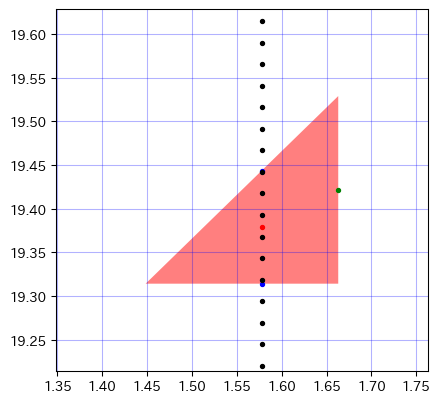

エッジとメッシュの交点1は(1.57754, 19.3143)
エッジとメッシュの交点2は(1.57754, 19.44347593368725)
緑点は(1.66308, 19.42165)
False点が移動する点は(1.57754, 19.378887966843624)


In [2296]:
false_set = []
k=1192
df_InOut_NoLowess_ver_all_set1_1 =  df_InOut_NoLowess_ver_all_set1.iloc[df_False_1_NoLowess.index[k],:]
# FTT
if df_InOut_NoLowess_ver_all_set1_1.iloc[3]==False:
    #false
    fx = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
    fy = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
    fz = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
    #True1
    t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
    t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
    t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
    #True2
    t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
    t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
    t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[14]

#TFT
elif df_InOut_NoLowess_ver_all_set1_1.iloc[4]==False:
    t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
    t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
    t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
    fx = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
    fy = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
    fz = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
    t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
    t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
    t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
#TTF
elif df_InOut_NoLowess_ver_all_set1_1.iloc[5]==False:
    t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
    t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
    t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
    t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
    t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
    t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
    fx = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
    fy = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
    fz = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
xmin = min(t1x,t2x,fx)
xmax = max(t1x,t2x,fx)
ymin = min(t1y,t2y,fy)
ymax = max(t1y,t2y,fy)
# print(xmin,xmax,ymin,ymax)
# メッシュ（３点）をポリゴンにする
points_mesh_nonLo = [(t1x,t1y),(t2x,t2y),(fx,fy)]
poly_mesh_nonLo = Polygon(*points_mesh_nonLo)
# エッジ点の範囲
edge_a = df_gt_all_0001_new2[(df_gt_all_0001_new2.X>=xmin-0.1)&(df_gt_all_0001_new2.X<=xmax+0.1)&(df_gt_all_0001_new2.Y>=ymin-0.1)&(df_gt_all_0001_new2.Y<=ymax+0.1)]
edge_con_list_points = []
edge_con_list = []
for i in range(len(edge_a)):
    edge_tapple_points = Point(edge_a.iloc[i].X,edge_a.iloc[i].Y)
    edge_tapple = (edge_a.iloc[i].X,edge_a.iloc[i].Y)
    edge_con_list_points.append(edge_tapple_points)
    edge_con_list.append(edge_tapple)
points = edge_con_list_points

cross_points =[]
for i in range(len(edge_a)):
    cross_points.append(poly_mesh_nonLo.encloses_point(edge_con_list_points[i]))
edge_a_InOut = edge_a.copy()
edge_a_InOut['InOut'] = cross_points

edge_a_InOut_true = edge_a_InOut.query('InOut==True')
edge_a_InOut_true
edge_a_InOut_true.index
# edge_a_InOut_true_min = min(edge_a_InOut_true.index)
edge_a_InOut['InOut'].sum()
# メッシュとエッジの交点

for i in range(len(edge_a_InOut)-1):
    if edge_a_InOut.iloc[i,2]==False:
        continue
    else:
        if edge_a_InOut['InOut'].sum() == 1:
            cross_p1 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
                 ,fx,fy,t1x,t1y)
            cross_p2 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
                 ,fx,fy,t2x,t2y)
        else:     
            if edge_a_InOut.iloc[i-1,2]==False:

            #４点から交点を出す

                cross_p1 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
                     ,fx,fy,t1x,t1y)
    #                 print(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
    #                      ,fx,fy,t1x,t1y)
            elif edge_a_InOut.iloc[i+1,2]==False:

                cross_p2 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
                     ,fx,fy,t2x,t2y)
    #                 print(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
    #                      ,fx,fy,t2x,t2y)
            else:
                continue
    #角の二等分線
length1 = Len(fx,fy,t1x,t1y)
length2 = Len(fx,fy,t2x,t2y)
q2x =  t1x + (t2x-t1x)*(length1/(length1+length2))
q2y =  t1y + (t2y-t1y)*(length1/(length1+length2))
q2 = (q2x,q2y)
move_p = Prog(cross_p1[0], cross_p1[1],cross_p2[0], cross_p2[1],fx,fy,q2x,q2y)
move_p_uchi = (move_p[0]+(q2[0]-move_p[0])/100,move_p[1]+(q2[1]-move_p[1])/100)
new_false_x.append(move_p_uchi[0])
new_false_y.append(move_p_uchi[1])
if t2x != t1x:
    false_z = (move_p_uchi[0]-t1x)/(t2x-t1x)*(t2z-t1z)+t1z
    new_false_z.append(false_z)
else:
    false_z = (move_p_uchi[1]-t1y)/(t2y-t1y)*(t2z-t1z)+t1z
    new_false_z.append(false_z)
new_false_z.append(false_z)
#グラフ描画
plt.figure(figsize=(5,5),dpi=96)
tmp = list(map(lambda p:(float(p.x),float(p.y)), poly_mesh_nonLo.vertices))
tmp = plt.Polygon(tmp,fc='red',alpha=0.5)
plt.gca().add_patch(tmp)
#交差点追加
plt.plot(cross_p1[0], cross_p1[1], color='blue',marker='.')
plt.plot(cross_p2[0], cross_p2[1], color='blue',marker='.')

plt.plot(q2x, q2y, color='green',marker='.')
#移動ポイント決定

plt.plot(move_p[0], move_p[1], color='red',marker='.')
for i,p in enumerate(points) :
    plt.plot(p.x, p.y, color='0.0',marker='.')
#     plt.text(p.x, p.y + 0.2, 'p{0}'.format(i) , size=10, 
#              horizontalalignment='center', verticalalignment='bottom')
xRange=(xmin-0.1,xmax+0.1)#メモリ軸の最大値
yRange=(ymin-0.1,ymax+0.1) #メモリ軸の最大値
plt.xlim(xRange)
plt.ylim(yRange)
# plt.xticks(range(xRange[0],xRange[1]+1))
# plt.yticks(range(yRange[0],yRange[1]+1))
plt.grid(color='blue', alpha=0.3)
plt.show()
print('エッジとメッシュの交点1は{}'.format(cross_p1))
print('エッジとメッシュの交点2は{}'.format(cross_p2))
print('緑点は{}'.format(q2))
print('False点が移動する点は{}'.format(move_p))

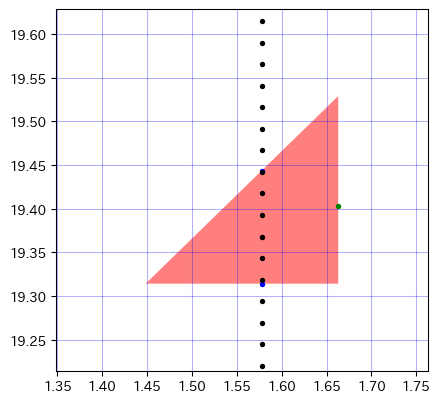

エッジとメッシュの交点1は(1.57754, 19.3143)
エッジとメッシュの交点2は(1.57754, 19.44347593368725)
緑点は(1.66308, 19.403236503790037)
False点が移動する点は[[1.5783954], [19.368163614487358], [5.340105006517084]]
T1は(1.66308, 19.3143, 5.3533)
T2は(1.66308, 19.529, 5.3547)
Fは(1.44834, 19.3143, 5.31895)
緑点3次元座標は(1.66308, 19.403236503790037, 5.353879930625553)


In [175]:
false_set = []
new_false_x = []
new_false_y = []
new_false_z = []
k=1192
df_InOut_NoLowess_ver_all_set1_1 =  df_InOut_NoLowess_ver_all_set1.iloc[df_False_1_NoLowess.index[k],:]
# FTT
if df_InOut_NoLowess_ver_all_set1_1.iloc[3]==False:
    #false
    fx = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
    fy = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
    fz = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
    #True1
    t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
    t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
    t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
    #True2
    t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
    t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
    t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[14]

#TFT
elif df_InOut_NoLowess_ver_all_set1_1.iloc[4]==False:
    t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
    t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
    t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
    fx = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
    fy = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
    fz = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
    t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
    t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
    t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
#TTF
elif df_InOut_NoLowess_ver_all_set1_1.iloc[5]==False:
    t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
    t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
    t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
    t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
    t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
    t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
    fx = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
    fy = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
    fz = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
t1 = (t1x,t1y,t1z)
t2 = (t2x,t2y,t2z)
f = (fx,fy,fz)
xmin = min(t1x,t2x,fx)
xmax = max(t1x,t2x,fx)
ymin = min(t1y,t2y,fy)
ymax = max(t1y,t2y,fy)
# print(xmin,xmax,ymin,ymax)
# メッシュ（３点）をポリゴンにする
points_mesh_nonLo = [(t1x,t1y),(t2x,t2y),(fx,fy)]
poly_mesh_nonLo = Polygon(*points_mesh_nonLo)
# エッジ点の範囲
edge_a = df_gt_all_0001_new2[(df_gt_all_0001_new2.X>=xmin-0.1)&(df_gt_all_0001_new2.X<=xmax+0.1)&(df_gt_all_0001_new2.Y>=ymin-0.1)&(df_gt_all_0001_new2.Y<=ymax+0.1)]
edge_con_list_points = []
edge_con_list = []
for i in range(len(edge_a)):
    edge_tapple_points = Point(edge_a.iloc[i].X,edge_a.iloc[i].Y)
    edge_tapple = (edge_a.iloc[i].X,edge_a.iloc[i].Y)
    edge_con_list_points.append(edge_tapple_points)
    edge_con_list.append(edge_tapple)
points = edge_con_list_points

cross_points =[]
for i in range(len(edge_a)):
    cross_points.append(poly_mesh_nonLo.encloses_point(edge_con_list_points[i]))
edge_a_InOut = edge_a.copy()
edge_a_InOut['InOut'] = cross_points

edge_a_InOut_true = edge_a_InOut.query('InOut==True')
edge_a_InOut_true
edge_a_InOut_true.index
# edge_a_InOut_true_min = min(edge_a_InOut_true.index)
edge_a_InOut['InOut'].sum()
# メッシュとエッジの交点

for i in range(len(edge_a_InOut)-1):
    if edge_a_InOut.iloc[i,2]==False:
        continue
    else:
        if edge_a_InOut['InOut'].sum() == 1:
            cross_p1 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
                 ,fx,fy,t1x,t1y)
            cross_p2 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
                 ,fx,fy,t2x,t2y)
        else:     
            if edge_a_InOut.iloc[i-1,2]==False:

            #４点から交点を出す

                cross_p1 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
                     ,fx,fy,t1x,t1y)
    #                 print(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
    #                      ,fx,fy,t1x,t1y)
            elif edge_a_InOut.iloc[i+1,2]==False:

                cross_p2 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
                     ,fx,fy,t2x,t2y)
    #                 print(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
    #                      ,fx,fy,t2x,t2y)
            else:
                continue
    #角の二等分線
length1 = Len(fx,fy,t1x,t1y)
length2 = Len(fx,fy,t2x,t2y)
q2x =  t1x + (t2x-t1x)*(length1/(length1+length2))
q2y =  t1y + (t2y-t1y)*(length1/(length1+length2))
q2 = (q2x,q2y)
move_p = Prog(cross_p1[0], cross_p1[1],cross_p2[0], cross_p2[1],fx,fy,q2x,q2y)
move_p_uchi = (move_p[0]+(q2[0]-move_p[0])/100,move_p[1]+(q2[1]-move_p[1])/100)
new_false_x.append(move_p_uchi[0])
new_false_y.append(move_p_uchi[1])
if t2x != t1x:
    q2z = ((q2[0]-t1x)/(t2x-t1x))*(t2z-t1z)+t1z
    false_z = ((move_p_uchi[0]-q2x)/(fx-q2x))*(fz-q2z)+q2z
    #new_false_z.append(false_z)
else:
    q2z = ((q2[1]-t1y)/(t2y-t1y))*(t2z-t1z)+t1z
    false_z = ((move_p_uchi[1]-q2y)/(fy-q2y))*(fz-q2z)+q2z
    #new_false_z.append(false_z)
q2_3d = (q2x,q2y,q2z)
new_false_z.append(false_z)
new_geo = [new_false_x,new_false_y,new_false_z]
#グラフ描画
plt.figure(figsize=(5,5),dpi=96)
tmp = list(map(lambda p:(float(p.x),float(p.y)), poly_mesh_nonLo.vertices))
tmp = plt.Polygon(tmp,fc='red',alpha=0.5)
plt.gca().add_patch(tmp)
#交差点追加
plt.plot(cross_p1[0], cross_p1[1], color='blue',marker='.')
plt.plot(cross_p2[0], cross_p2[1], color='blue',marker='.')

plt.plot(q2x, q2y, color='green',marker='.')
#移動ポイント決定

plt.plot(move_p[0], move_p[1], color='red',marker='.')
for i,p in enumerate(points) :
    plt.plot(p.x, p.y, color='0.0',marker='.')
#     plt.text(p.x, p.y + 0.2, 'p{0}'.format(i) , size=10, 
#              horizontalalignment='center', verticalalignment='bottom')
xRange=(xmin-0.1,xmax+0.1)#メモリ軸の最大値
yRange=(ymin-0.1,ymax+0.1) #メモリ軸の最大値
plt.xlim(xRange)
plt.ylim(yRange)
# plt.xticks(range(xRange[0],xRange[1]+1))
# plt.yticks(range(yRange[0],yRange[1]+1))
plt.grid(color='blue', alpha=0.3)
plt.show()
print('エッジとメッシュの交点1は{}'.format(cross_p1))
print('エッジとメッシュの交点2は{}'.format(cross_p2))
print('緑点は{}'.format(q2))
print('False点が移動する点は{}'.format(new_geo))
print('T1は{}'.format(t1))
print('T2は{}'.format(t2))
print('Fは{}'.format(f))
print('緑点3次元座標は{}'.format(q2_3d))

In [ ]:
q2z = ((move_p_uchi[0]-t1x)/(t2x-t1x))*(t2z-t1z)+t1z
q2z = ((move_p_uchi[1]-t1y)/(t2y-t1y))*(t2z-t1z)+t1z


t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
fx = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
fy = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
fz = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
length1 = Len(fx,fy,t1x,t1y)
length2 = Len(fx,fy,t2x,t2y)
q2x =  t1x + (t2x-t1x)*(length1/(length1+length2))
q2y =  t1y + (t2y-t1y)*(length1/(length1+length2))
q2 = (q2x,q2y)
move_p = Prog(cross_p1[0], cross_p1[1],cross_p2[0], cross_p2[1],fx,fy,q2x,q2y)
move_p_uchi = (move_p[0]+(q2[0]-move_p[0])/100,move_p[1]+(q2[1]-move_p[1])/100)
new_false_x.append(move_p_uchi[0])
new_false_y.append(move_p_uchi[1])
if t2x != t1x:
    q2z = (move_p_uchi[0]-t1x)/(t2x-t1x)*(t2z-t1z)+t1z
    #new_false_z.append(false_z)
else:
    q2z = (move_p_uchi[1]-t1y)/(t2y-t1y)*(t2z-t1z)+t1z
    #new_false_z.append(false_z)
    q2_3d = (q2x,q2y,q2z)

In [1981]:
#Falseのｘ、ｙ、ｚを取り出す
new_false_x = []
new_false_y = []
for k in tqdm(range(len(df_False_1_NoLowess))):

    false_set = []
    df_InOut_NoLowess_ver_all_set1_1 =  df_InOut_NoLowess_ver_all_set1.iloc[df_False_1_NoLowess.index[k],:]
    # FTT
    if df_InOut_NoLowess_ver_all_set1_1.iloc[3]==False:
        #false
        fx = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
        fy = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
        fz = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
        #True1
        t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
        t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
        t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
        #True2
        t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
        t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
        t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[14]

    #TFT
    elif df_InOut_NoLowess_ver_all_set1_1.iloc[4]==False:
        t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
        t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
        t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
        fx = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
        fy = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
        fz = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
        t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
        t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
        t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
    #TTF
    elif df_InOut_NoLowess_ver_all_set1_1.iloc[5]==False:
        t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
        t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
        t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
        t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
        t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
        t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
        fx = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
        fy = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
        fz = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
    xmin = min(t1x,t2x,fx)
    xmax = max(t1x,t2x,fx)
    ymin = min(t1y,t2y,fy)
    ymax = max(t1y,t2y,fy)
    # print(xmin,xmax,ymin,ymax)
    # メッシュ（３点）をポリゴンにする
    points_mesh_nonLo = [(t1x,t1y),(t2x,t2y),(fx,fy)]
    poly_mesh_nonLo = Polygon(*points_mesh_nonLo)
    # エッジ点の範囲
    edge_a = df_gt_all_0001_new2[(df_gt_all_0001_new2.X>=xmin-0.1)&(df_gt_all_0001_new2.X<=xmax+0.1)&(df_gt_all_0001_new2.Y>=ymin-0.1)&(df_gt_all_0001_new2.Y<=ymax+0.1)]
    edge_con_list_points = []
    edge_con_list = []
    for i in range(len(edge_a)):
        edge_tapple_points = Point(edge_a.iloc[i].X,edge_a.iloc[i].Y)
        edge_tapple = (edge_a.iloc[i].X,edge_a.iloc[i].Y)
        edge_con_list_points.append(edge_tapple_points)
        edge_con_list.append(edge_tapple)
    points = edge_con_list_points

    cross_points =[]
    for i in range(len(edge_a)):
        cross_points.append(poly_mesh_nonLo.encloses_point(edge_con_list_points[i]))
    edge_a_InOut = edge_a.copy()
    edge_a_InOut['InOut'] = cross_points

    edge_a_InOut_true = edge_a_InOut.query('InOut==True')
    edge_a_InOut_true
    edge_a_InOut_true.index
    edge_a_InOut['InOut'].sum()
    # メッシュとエッジの交点
    for i in range(len(edge_a_InOut)-1):
        if edge_a_InOut.iloc[i,2]==False:
            continue
        else:
            if edge_a_InOut['InOut'].sum() == 1:
                cross_p1 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
                     ,fx,fy,t1x,t1y)
                cross_p2 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
                     ,fx,fy,t2x,t2y)
            else:     
                if edge_a_InOut.iloc[i-1,2]==False:
                    #４点から交点を出す

                    cross_p1 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
                         ,fx,fy,t1x,t1y)
    #                 print(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
    #                      ,fx,fy,t1x,t1y)
                elif edge_a_InOut.iloc[i+1,2]==False:

                    cross_p2 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
                         ,fx,fy,t2x,t2y)
    #                 print(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
    #                      ,fx,fy,t2x,t2y)
                else:
                    continue
    #角の二等分線
    length1 = Len(fx,fy,t1x,t1y)
    length2 = Len(fx,fy,t2x,t2y)
    q2x =  t1x + (t2x-t1x)*(length1/(length1+length2))
    q2y =  t1y + (t2y-t1y)*(length1/(length1+length2))
    q2 = (q2x,q2y)
    move_p = Prog(cross_p1[0], cross_p1[1],cross_p2[0], cross_p2[1],fx,fy,q2x,q2y)
    new_false_x.append(move_p[0])
    new_false_y.append(move_p[1])
# #グラフ描画
# plt.figure(figsize=(5,5),dpi=96)
# tmp = list(map(lambda p:(float(p.x),float(p.y)), poly_mesh_nonLo.vertices))
# tmp = plt.Polygon(tmp,fc='red',alpha=0.5)
# plt.gca().add_patch(tmp)
# #交差点追加
# plt.plot(cross_p1[0], cross_p1[1], color='blue',marker='.')
# plt.plot(cross_p2[0], cross_p2[1], color='blue',marker='.')

# plt.plot(q2x, q2y, color='green',marker='.')
# #移動ポイント決定

# plt.plot(move_p[0], move_p[1], color='red',marker='.')
# for i,p in enumerate(points) :
#     plt.plot(p.x, p.y, color='0.0',marker='.')
# #     plt.text(p.x, p.y + 0.2, 'p{0}'.format(i) , size=10, 
# #              horizontalalignment='center', verticalalignment='bottom')
# xRange=(xmin-0.1,xmax+0.1)#メモリ軸の最大値
# yRange=(ymin-0.1,ymax+0.1) #メモリ軸の最大値
# plt.xlim(xRange)
# plt.ylim(yRange)
# # plt.xticks(range(xRange[0],xRange[1]+1))
# # plt.yticks(range(yRange[0],yRange[1]+1))
# plt.grid(color='blue', alpha=0.3)
# plt.show()
# print('エッジとメッシュの交点1は{}'.format(cross_p1))
# print('エッジとメッシュの交点2は{}'.format(cross_p2))
# print('緑点は{}'.format(q2))
# print('False点が移動する点は{}'.format(move_p))

100%|██████████| 1193/1193 [12:18<00:00,  1.62it/s]


## 角の二等分線の交点を求める（内側）

In [1982]:

# new_false_x = []
# new_false_y = []
# for k in tqdm(range(len(df_False_1_NoLowess))):

#     false_set = []
#     df_InOut_NoLowess_ver_all_set1_1 =  df_InOut_NoLowess_ver_all_set1.iloc[df_False_1_NoLowess.index[k],:]
#     # FTT
#     if df_InOut_NoLowess_ver_all_set1_1.iloc[3]==False:
#         #false
#         fx = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
#         fy = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
#         fz = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
#         #True1
#         t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
#         t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
#         t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
#         #True2
#         t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
#         t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
#         t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[14]

#     #TFT
#     elif df_InOut_NoLowess_ver_all_set1_1.iloc[4]==False:
#         t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
#         t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
#         t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
#         fx = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
#         fy = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
#         fz = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
#         t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
#         t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
#         t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
#     #TTF
#     elif df_InOut_NoLowess_ver_all_set1_1.iloc[5]==False:
#         t1x = df_InOut_NoLowess_ver_all_set1_1.iloc[6]
#         t1y = df_InOut_NoLowess_ver_all_set1_1.iloc[7]
#         t1z = df_InOut_NoLowess_ver_all_set1_1.iloc[8]
#         t2x = df_InOut_NoLowess_ver_all_set1_1.iloc[9]
#         t2y = df_InOut_NoLowess_ver_all_set1_1.iloc[10]
#         t2z = df_InOut_NoLowess_ver_all_set1_1.iloc[11]
#         fx = df_InOut_NoLowess_ver_all_set1_1.iloc[12]
#         fy = df_InOut_NoLowess_ver_all_set1_1.iloc[13]
#         fz = df_InOut_NoLowess_ver_all_set1_1.iloc[14]
#     xmin = min(t1x,t2x,fx)
#     xmax = max(t1x,t2x,fx)
#     ymin = min(t1y,t2y,fy)
#     ymax = max(t1y,t2y,fy)
#     # print(xmin,xmax,ymin,ymax)
#     # メッシュ（３点）をポリゴンにする
#     points_mesh_nonLo = [(t1x,t1y),(t2x,t2y),(fx,fy)]
#     poly_mesh_nonLo = Polygon(*points_mesh_nonLo)
#     # エッジ点の範囲
#     edge_a = df_gt_all_0001_new2[(df_gt_all_0001_new2.X>=xmin-0.1)&(df_gt_all_0001_new2.X<=xmax+0.1)&(df_gt_all_0001_new2.Y>=ymin-0.1)&(df_gt_all_0001_new2.Y<=ymax+0.1)]
#     edge_con_list_points = []
#     edge_con_list = []
#     for i in range(len(edge_a)):
#         edge_tapple_points = Point(edge_a.iloc[i].X,edge_a.iloc[i].Y)
#         edge_tapple = (edge_a.iloc[i].X,edge_a.iloc[i].Y)
#         edge_con_list_points.append(edge_tapple_points)
#         edge_con_list.append(edge_tapple)
#     points = edge_con_list_points

#     cross_points =[]
#     for i in range(len(edge_a)):
#         cross_points.append(poly_mesh_nonLo.encloses_point(edge_con_list_points[i]))
#     edge_a_InOut = edge_a.copy()
#     edge_a_InOut['InOut'] = cross_points

#     edge_a_InOut_true = edge_a_InOut.query('InOut==True')
#     edge_a_InOut_true
#     edge_a_InOut_true.index
#     edge_a_InOut['InOut'].sum()
#     # メッシュとエッジの交点
#     for i in range(len(edge_a_InOut)-1):
#         if edge_a_InOut.iloc[i,2]==False:
#             continue
#         else:
#             if edge_a_InOut['InOut'].sum() == 1:
#                 cross_p1 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
#                      ,fx,fy,t1x,t1y)
#                 cross_p2 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
#                      ,fx,fy,t2x,t2y)
#             else:     
#                 if edge_a_InOut.iloc[i-1,2]==False:
#                     #４点から交点を出す

#                     cross_p1 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
#                          ,fx,fy,t1x,t1y)
#     #                 print(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i-1,0],edge_a_InOut.iloc[i-1,1]
#     #                      ,fx,fy,t1x,t1y)
#                 elif edge_a_InOut.iloc[i+1,2]==False:

#                     cross_p2 = Prog(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
#                          ,fx,fy,t2x,t2y)
#     #                 print(edge_a_InOut.iloc[i,0], edge_a_InOut.iloc[i,1], edge_a_InOut.iloc[i+1,0],edge_a_InOut.iloc[i+1,1]
#     #                      ,fx,fy,t2x,t2y)
#                 else:
#                     continue
#     #角の二等分線
#     length1 = Len(fx,fy,t1x,t1y)
#     length2 = Len(fx,fy,t2x,t2y)
#     q2x =  t1x + (t2x-t1x)*(length1/(length1+length2))
#     q2y =  t1y + (t2y-t1y)*(length1/(length1+length2))
#     q2 = (q2x,q2y)
#     move_p = Prog(cross_p1[0], cross_p1[1],cross_p2[0], cross_p2[1],fx,fy,q2x,q2y)
#     #赤点と緑点を結んで少しだけ緑側に寄せる
#     move_p_uchi = (move_p[0]+(q2[0]-move_p[0])/100,move_p[1]+(q2[1]-move_p[1])/100)
#     new_false_x.append(move_p_uchi[0])
#     new_false_y.append(move_p_uchi[1])

[57.58929072651252,
 59.3914242994786,
 59.26231023738414,
 59.5122758055439,
 59.73055960771142,
 59.95047777700095,
 1.57754,
 1.57754,
 1.7104536185840695,
 1.9251858247787608,
 2.2599141752212395,
 2.474646443537606,
 2.5693953865145183,
 2.9041877423071036,
 3.119375876681891,
 3.3359950036585606,
 24.126308167132212,
 24.294531,
 24.555808167132216,
 24.723991830368952,
 24.93873098695687,
 25.15349178214333,
 25.36819166073407,
 25.582930449116425,
 25.79769018522898,
 26.05891397507349,
 26.273684249875974,
 26.441860691290675,
 26.65655737061839,
 26.871228553623297,
 27.085749869960406,
 27.30015681474655,
 91.079027,
 91.33743316441546,
 91.508527,
 91.76687299999999,
 91.98163316441546,
 92.15272699999998,
 92.36742699999999,
 92.62583316441545,
 18.920422099394628,
 19.13604975477659,
 19.405679000191945,
 19.62274680061622,
 19.779089600501333,
 19.992094375449863,
 20.27040565083066,
 20.486828941446966,
 20.705460055699838,
 20.91575882310339,
 21.127611643574742,
 21.3

In [2496]:
df_False_1_NoLowess

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
vertex_num,,,,,,,,,,,,,,,
197,396,390,2116,True,True,False,57.70930,1.23930,5.28778,57.49460,1.25291,5.28778,57.49460,1.06170,5.25385
236,436,2250,2307,True,False,True,59.33570,1.27644,5.28778,59.42720,1.06170,5.21660,59.42720,1.27644,5.28601
238,436,425,2233,True,True,False,59.33570,1.27644,5.28778,59.21250,1.25666,5.28778,59.21250,1.06170,5.23635
240,2310,2307,2250,True,True,False,59.64190,1.27644,5.28605,59.42720,1.27644,5.28601,59.42720,1.06170,5.21660
245,2316,2310,2253,True,True,False,59.85670,1.27644,5.28578,59.64190,1.27644,5.28605,59.64190,1.06170,5.21441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113481,39757,39271,39332,False,True,True,1.44834,18.67010,5.32080,1.66308,18.45540,5.35080,1.66308,18.67010,5.35210
113485,39762,39332,39536,False,True,True,1.44834,18.88480,5.31967,1.66308,18.67010,5.35210,1.66308,18.88480,5.35290
113489,39765,39536,39546,False,True,True,1.44834,19.09960,5.31730,1.66308,18.88480,5.35290,1.66308,19.09960,5.35300


## 新しい座標をデータに挿入

In [2497]:
df_False_1_NoLowess_new = df_False_1_NoLowess.copy()
for i in tqdm(range(len(df_False_1_NoLowess_new))):
    #nanの時はスルー
    if np.isnan(new_false_x[i]) == True or np.isnan(new_false_y[i]) == True:
        continue  
    else:
#       １がFalse
        if df_False_1_NoLowess_new.iloc[i,3] == False:
            df_False_1_NoLowess_new.iloc[i,6] = new_false_x[i]
            df_False_1_NoLowess_new.iloc[i,7] = new_false_y[i]
        #2がFalse    
        elif df_False_1_NoLowess_new.iloc[i,4] == False:
            df_False_1_NoLowess_new.iloc[i,9] = new_false_x[i]
            df_False_1_NoLowess_new.iloc[i,10] = new_false_y[i]
        #3がFalse    
        else :
            df_False_1_NoLowess_new.iloc[i,12] = new_false_x[i]
            df_False_1_NoLowess_new.iloc[i,13] = new_false_y[i]

100%|██████████| 1193/1193 [00:00<00:00, 2814.51it/s]


In [2498]:
df_False_1_NoLowess

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
vertex_num,,,,,,,,,,,,,,,
197,396,390,2116,True,True,False,57.70930,1.23930,5.28778,57.49460,1.25291,5.28778,57.49460,1.06170,5.25385
236,436,2250,2307,True,False,True,59.33570,1.27644,5.28778,59.42720,1.06170,5.21660,59.42720,1.27644,5.28601
238,436,425,2233,True,True,False,59.33570,1.27644,5.28778,59.21250,1.25666,5.28778,59.21250,1.06170,5.23635
240,2310,2307,2250,True,True,False,59.64190,1.27644,5.28605,59.42720,1.27644,5.28601,59.42720,1.06170,5.21660
245,2316,2310,2253,True,True,False,59.85670,1.27644,5.28578,59.64190,1.27644,5.28605,59.64190,1.06170,5.21441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113481,39757,39271,39332,False,True,True,1.44834,18.67010,5.32080,1.66308,18.45540,5.35080,1.66308,18.67010,5.35210
113485,39762,39332,39536,False,True,True,1.44834,18.88480,5.31967,1.66308,18.67010,5.35210,1.66308,18.88480,5.35290
113489,39765,39536,39546,False,True,True,1.44834,19.09960,5.31730,1.66308,18.88480,5.35290,1.66308,19.09960,5.35300


In [2499]:
df_False_1_NoLowess_new

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
vertex_num,,,,,,,,,,,,,,,
197,396,390,2116,True,True,False,57.709300,1.239300,5.28778,57.494600,1.252910,5.28778,57.589417,1.224576,5.25385
236,436,2250,2307,True,False,True,59.335700,1.276440,5.28778,59.391325,1.230091,5.21660,59.427200,1.276440,5.28601
238,436,425,2233,True,True,False,59.335700,1.276440,5.28778,59.212500,1.256660,5.28778,59.262428,1.227735,5.23635
240,2310,2307,2250,True,True,False,59.641900,1.276440,5.28605,59.427200,1.276440,5.28601,59.512499,1.232329,5.21660
245,2316,2310,2253,True,True,False,59.856700,1.276440,5.28578,59.641900,1.276440,5.28605,59.730747,1.239344,5.21441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113481,39757,39271,39332,False,True,True,1.578395,18.605084,5.32080,1.663080,18.455400,5.35080,1.663080,18.670100,5.35210
113485,39762,39332,39536,False,True,True,1.578395,18.819784,5.31967,1.663080,18.670100,5.35210,1.663080,18.884800,5.35290
113489,39765,39536,39546,False,True,True,1.578395,19.034554,5.31730,1.663080,18.884800,5.35290,1.663080,19.099600,5.35300


In [1987]:
MakeCsv(df_False_1_NoLowess_new,'df_False_1_NoLowess_new')

# やり直し（z座標を2点間直線上に）

In [142]:
df_InOut_NoLowess_ver_all_set1 = ReadCsv('df_InOut_NoLowess_ver_all_set1')
False_3 = []
False_2 = []
False_1 = []
False_0 = []
for i in tqdm(range(len(df_InOut_NoLowess_ver_all_set1))):
    aa = df_InOut_NoLowess_ver_all_set1.iloc[i,:] == False
    #print(aa)
    if aa.sum() == 3:
        False_3_temp = []
        False_3_temp.append(i)
        False_3_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        False_3.append(False_3_temp)
        
    if aa.sum() == 2:
        False_2_temp = []
        False_2_temp.append(i)
        False_2_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        False_2.append(False_2_temp)
    if aa.sum() == 1:
        False_1_temp = []
        False_1_temp.append(i)
        False_1_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        False_1.append(False_1_temp)
    if aa.sum() == 0:
        False_0_temp = []
        False_0_temp.append(i)
        False_0_temp.extend(df_InOut_NoLowess_ver_all_set1.iloc[i])
        #False_0.append(False_0_temp)
        False_0.append(False_0_temp)
df_False_3_NoLowess = pd.DataFrame(False_3,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_3_NoLowess = df_False_3_NoLowess.set_index(['vertex_num'],drop=True)
df_False_2_NoLowess = pd.DataFrame(False_2,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_2_NoLowess = df_False_2_NoLowess.set_index(['vertex_num'],drop=True)
df_False_1_NoLowess = pd.DataFrame(False_1,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_1_NoLowess = df_False_1_NoLowess.set_index(['vertex_num'],drop=True)
df_False_0_NoLowess = pd.DataFrame(False_0,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_0_NoLowess = df_False_0_NoLowess.set_index(['vertex_num'],drop=True)

100%|██████████| 118387/118387 [00:51<00:00, 2318.92it/s]


In [177]:
new_geometory1 = AngleBisector(df_InOut_NoLowess_ver_all_set1,df_False_1_NoLowess)

100%|██████████| 1193/1193 [12:12<00:00,  1.63it/s]


In [178]:
df_False_1_NoLowess

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
vertex_num,,,,,,,,,,,,,,,
197,396,390,2116,True,True,False,57.70930,1.23930,5.28778,57.49460,1.25291,5.28778,57.49460,1.06170,5.25385
236,436,2250,2307,True,False,True,59.33570,1.27644,5.28778,59.42720,1.06170,5.21660,59.42720,1.27644,5.28601
238,436,425,2233,True,True,False,59.33570,1.27644,5.28778,59.21250,1.25666,5.28778,59.21250,1.06170,5.23635
240,2310,2307,2250,True,True,False,59.64190,1.27644,5.28605,59.42720,1.27644,5.28601,59.42720,1.06170,5.21660
245,2316,2310,2253,True,True,False,59.85670,1.27644,5.28578,59.64190,1.27644,5.28605,59.64190,1.06170,5.21441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113481,39757,39271,39332,False,True,True,1.44834,18.67010,5.32080,1.66308,18.45540,5.35080,1.66308,18.67010,5.35210
113485,39762,39332,39536,False,True,True,1.44834,18.88480,5.31967,1.66308,18.67010,5.35210,1.66308,18.88480,5.35290
113489,39765,39536,39546,False,True,True,1.44834,19.09960,5.31730,1.66308,18.88480,5.35290,1.66308,19.09960,5.35300


In [ ]:
### 値を更新していく（FTTだけ更新　→　元のデータに更新）

In [179]:

df_False_1_NoLowess_new = df_False_1_NoLowess.copy()
for i in tqdm(range(len(df_False_1_NoLowess_new))):
    #nanの時はスルー
    if np.isnan(new_geometory1[0][i]) == True or np.isnan(new_geometory1[1][i]) == True:
        continue  
    else:
#       １がFalse
        if df_False_1_NoLowess_new.iloc[i,3] == False:
            df_False_1_NoLowess_new.iloc[i,6] = new_geometory1[0][i]
            df_False_1_NoLowess_new.iloc[i,7] = new_geometory1[1][i]
            df_False_1_NoLowess_new.iloc[i,8] = new_geometory1[2][i]
        #2がFalse    
        elif df_False_1_NoLowess_new.iloc[i,4] == False:
            df_False_1_NoLowess_new.iloc[i,9] = new_geometory1[0][i]
            df_False_1_NoLowess_new.iloc[i,10] = new_geometory1[1][i]
            df_False_1_NoLowess_new.iloc[i,11] = new_geometory1[2][i]
        #3がFalse    
        else :
            df_False_1_NoLowess_new.iloc[i,12] = new_geometory1[0][i]
            df_False_1_NoLowess_new.iloc[i,13] = new_geometory1[1][i]
            df_False_1_NoLowess_new.iloc[i,14] = new_geometory1[2][i]


100%|██████████| 1193/1193 [00:00<00:00, 1993.65it/s]


In [180]:
df_False_1_NoLowess

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
vertex_num,,,,,,,,,,,,,,,
197,396,390,2116,True,True,False,57.70930,1.23930,5.28778,57.49460,1.25291,5.28778,57.49460,1.06170,5.25385
236,436,2250,2307,True,False,True,59.33570,1.27644,5.28778,59.42720,1.06170,5.21660,59.42720,1.27644,5.28601
238,436,425,2233,True,True,False,59.33570,1.27644,5.28778,59.21250,1.25666,5.28778,59.21250,1.06170,5.23635
240,2310,2307,2250,True,True,False,59.64190,1.27644,5.28605,59.42720,1.27644,5.28601,59.42720,1.06170,5.21660
245,2316,2310,2253,True,True,False,59.85670,1.27644,5.28578,59.64190,1.27644,5.28605,59.64190,1.06170,5.21441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113481,39757,39271,39332,False,True,True,1.44834,18.67010,5.32080,1.66308,18.45540,5.35080,1.66308,18.67010,5.35210
113485,39762,39332,39536,False,True,True,1.44834,18.88480,5.31967,1.66308,18.67010,5.35210,1.66308,18.88480,5.35290
113489,39765,39536,39546,False,True,True,1.44834,19.09960,5.31730,1.66308,18.88480,5.35290,1.66308,19.09960,5.35300


In [242]:
df_False_1_NoLowess_new.isnull().any()

1          False
2          False
3          False
InOut_1    False
InOut_2    False
InOut_3    False
x1         False
y1         False
z1         False
x2         False
y2         False
z2         False
x3         False
y3         False
z3         False
dtype: bool

In [253]:
df_InOut_NoLowess_ver_all_set1.loc[113497]

1            39774
2            39588
3            39791
InOut_1      False
InOut_2       True
InOut_3       True
x1         1.44834
y1         19.3143
z1         5.31895
x2         1.66308
y2         19.3143
z2          5.3533
x3         1.66308
y3          19.529
z3          5.3547
Name: 113497, dtype: object

In [256]:
df_False_1_NoLowess_new.loc[113497]

1              39774
2              39588
3              39791
InOut_1        False
InOut_2         True
InOut_3         True
x1          1.578395
y1         19.368164
z1          5.340105
x2           1.66308
y2           19.3143
z2            5.3533
x3           1.66308
y3            19.529
z3            5.3547
Name: 113497, dtype: object

In [288]:
df_InOut_NoLowess_ver_all_set1_new = df_InOut_NoLowess_ver_all_set1.copy()
for k in tqdm(df_False_1_NoLowess.index):
    df_InOut_NoLowess_ver_all_set1_new.loc[k,'x1'] = df_False_1_NoLowess_new.loc[k,'x1']
    df_InOut_NoLowess_ver_all_set1_new.loc[k,'y1'] = df_False_1_NoLowess_new.loc[k,'y1']
    df_InOut_NoLowess_ver_all_set1_new.loc[k,'z1'] = df_False_1_NoLowess_new.loc[k,'z1']
    df_InOut_NoLowess_ver_all_set1_new.loc[k,'x2'] = df_False_1_NoLowess_new.loc[k,'x2']
    df_InOut_NoLowess_ver_all_set1_new.loc[k,'y2'] = df_False_1_NoLowess_new.loc[k,'y2']
    df_InOut_NoLowess_ver_all_set1_new.loc[k,'z2'] = df_False_1_NoLowess_new.loc[k,'z3']
    df_InOut_NoLowess_ver_all_set1_new.loc[k,'x3'] = df_False_1_NoLowess_new.loc[k,'x3']
    df_InOut_NoLowess_ver_all_set1_new.loc[k,'y3'] = df_False_1_NoLowess_new.loc[k,'y3']
    df_InOut_NoLowess_ver_all_set1_new.loc[k,'z3'] = df_False_1_NoLowess_new.loc[k,'z3']
    
# false1_index = df_False_1_NoLowess.index
# df_InOut_NoLowess_ver_all_set1_new = df_InOut_NoLowess_ver_all_set1.copy()
# for i in tqdm(false1_index): 
#     df_InOut_NoLowess_ver_all_set1_new.loc[i] = df_False_1_NoLowess_new.loc[i]

100%|██████████| 1193/1193 [00:03<00:00, 316.21it/s]


In [290]:
df_InOut_NoLowess_ver_all_set1_new.isnull().any()

1          False
2          False
3          False
InOut_1    False
InOut_2    False
InOut_3    False
x1         False
y1         False
z1         False
x2         False
y2         False
z2         False
x3         False
y3         False
z3         False
dtype: bool

In [291]:
MakeCsv(df_InOut_NoLowess_ver_all_set1_new,'df_InOut_NoLowess_ver_all_set1_new')

In [292]:
df_InOut_NoLowess_ver_all_set1.iloc[df_False_1_NoLowess.index[10]]

1             2677
2             2690
3             2698
InOut_1       True
InOut_2       True
InOut_3      False
x1         2.09255
y1         25.7564
z1         5.23328
x2         2.30729
y2         25.7564
z2         5.23304
x3         2.30729
y3         25.9711
z3         5.17786
Name: 416, dtype: object

In [2502]:
df_InOut_NoLowess_ver_all_set1.iloc[df_False_1_NoLowess.index[10]]

1             2677
2             2690
3             2698
InOut_1       True
InOut_2       True
InOut_3      False
x1         2.09255
y1         25.7564
z1         5.23328
x2         2.30729
y2         25.7564
z2         5.23304
x3         2.30729
y3         25.9711
z3         5.17786
Name: 416, dtype: object

In [2503]:
# false1_index = df_False_1_NoLowess.index
# df_InOut_NoLowess_ver_all_set1_new = df_InOut_NoLowess_ver_all_set1.copy()
# for i in tqdm(false1_index): 
#     df_InOut_NoLowess_ver_all_set1_new.loc[i] = df_False_1_NoLowess_new.loc[i]

100%|██████████| 1193/1193 [00:05<00:00, 212.15it/s]


In [293]:
df_InOut_NoLowess_ver_all_set1_new.isnull().any()

1          False
2          False
3          False
InOut_1    False
InOut_2    False
InOut_3    False
x1         False
y1         False
z1         False
x2         False
y2         False
z2         False
x3         False
y3         False
z3         False
dtype: bool

In [2505]:
#MakeCsv(df_InOut_NoLowess_ver_all_set1_new,'df_InOut_NoLowess_ver_all_set1_new')

## FFFを消去

In [294]:
df_InOut_NoLo_all_fffdel = df_InOut_NoLowess_ver_all_set1_new.copy()
#fffのインデックスを取得
fffdel_index = []
for i in tqdm(df_InOut_NoLo_all_fffdel.index):
    f_num = df_InOut_NoLo_all_fffdel.iloc[i] ==False
    if f_num.sum() == 3:
        fffdel_index.append(i)
#fffをドロップする
df_InOut_NoLo_all_fffdel.drop(index=fffdel_index, axis=0, inplace=True)
df_InOut_NoLo_all_fffdel

100%|██████████| 118387/118387 [00:27<00:00, 4349.08it/s]


,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
178,2111,2116,390,False,False,True,57.2798,1.06170,5.26648,57.4946,1.06170,5.253850,57.494600,1.252910,5.287780
179,390,387,2111,True,False,False,57.4946,1.25291,5.28778,57.2798,1.19627,5.287780,57.279800,1.061700,5.266480
196,2116,2165,396,False,False,True,57.4946,1.06170,5.25385,57.7093,1.06170,5.258330,57.709300,1.239300,5.287780
197,396,390,2116,True,True,False,57.7093,1.23930,5.28778,57.4946,1.25291,5.283617,57.571254,1.224589,5.283617
199,399,396,2165,False,True,False,57.9241,1.17234,5.28778,57.7093,1.23930,5.287780,57.709300,1.061700,5.258330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118382,58573,59277,59231,True,True,True,100.0120,17.16690,5.35392,99.7977,17.16690,5.353180,99.797700,16.952200,5.352580
118383,58429,59277,58597,True,True,True,99.5829,17.38170,5.35292,99.7977,17.16690,5.353180,99.797700,17.381700,5.353780
118384,58406,59277,58429,True,True,True,99.5829,17.16690,5.35256,99.7977,17.16690,5.353180,99.582900,17.381700,5.352920
118385,59277,58573,58585,True,True,True,99.7977,17.16690,5.35318,100.0120,17.16690,5.353920,100.012000,17.381700,5.354230


In [295]:
MakeCsv(df_InOut_NoLo_all_fffdel,'df_InOut_NoLo_all_fffdel')

In [296]:
print(df_InOut_NoLo_all_fffdel.isnull().any())

1          False
2          False
3          False
InOut_1    False
InOut_2    False
InOut_3    False
x1         False
y1         False
z1         False
x2         False
y2         False
z2         False
x3         False
y3         False
z3         False
dtype: bool


In [297]:
print(df_InOut_NoLo_all_fffdel.isnull().sum())

1          0
2          0
3          0
InOut_1    0
InOut_2    0
InOut_3    0
x1         0
y1         0
z1         0
x2         0
y2         0
z2         0
x3         0
y3         0
z3         0
dtype: int64


## NPNO.TXT

In [299]:
df_NPNO = df_InOut_NoLo_all_fffdel.iloc[:,0:3]
df_NPNO.reset_index(inplace=True)
MakeCsv(df_NPNO,'df_NPNO')

In [300]:
df_NPNO

,index,1,2,3
0,178,2111,2116,390
1,179,390,387,2111
2,196,2116,2165,396
3,197,396,390,2116
4,199,399,396,2165
...,...,...,...,...
113576,118382,58573,59277,59231
113577,118383,58429,59277,58597
113578,118384,58406,59277,58429
113579,118385,59277,58573,58585


## まとめたデータから要素番号と節点座標のデータ作成

In [301]:
df_ftt1_vert = df_InOut_NoLo_all_fffdel.iloc[:,0:3]
df_ftt1_vert.reset_index(inplace=True)
df_ftt1_vert = df_ftt1_vert.drop('index',axis=1)

In [302]:
#MakeCsv(df_ftt1_vert,'df_ftt1_vert')

In [303]:
df_InOut_NoLo_all_fffdel_index = df_InOut_NoLo_all_fffdel.index
df_InOut_NoLo_all_fffdel_index

Int64Index([   178,    179,    196,    197,    199,    226,    227,    236,
               237,    238,
            ...
            118377, 118378, 118379, 118380, 118381, 118382, 118383, 118384,
            118385, 118386],
           dtype='int64', length=113581)

In [304]:
df_InOut_NoLo_all_fffdel['1']

178        2111
179         390
196        2116
197         396
199         399
          ...  
118382    58573
118383    58429
118384    58406
118385    59277
118386    58585
Name: 1, Length: 113581, dtype: int64

In [305]:
df_ftt1_geo = pd.DataFrame([],columns = [0,1,2,3])
vert = []
for k in tqdm(df_InOut_NoLo_all_fffdel_index):   
    vert_1 = [df_InOut_NoLo_all_fffdel.loc[k,'1'],df_InOut_NoLo_all_fffdel.loc[k,'x1'],df_InOut_NoLo_all_fffdel.loc[k,'y1'],df_InOut_NoLo_all_fffdel.loc[k,'z1']]
    vert_2 = [df_InOut_NoLo_all_fffdel.loc[k,'2'],df_InOut_NoLo_all_fffdel.loc[k,'x2'],df_InOut_NoLo_all_fffdel.loc[k,'y2'],df_InOut_NoLo_all_fffdel.loc[k,'z2']]
    vert_3 = [df_InOut_NoLo_all_fffdel.loc[k,'3'],df_InOut_NoLo_all_fffdel.loc[k,'x3'],df_InOut_NoLo_all_fffdel.loc[k,'y3'],df_InOut_NoLo_all_fffdel.loc[k,'z3']]
    vert.append(vert_1)
    vert.append(vert_2)
    vert.append(vert_3)
df_ftt1_geo = df_ftt1_geo.append(vert)


100%|██████████| 113581/113581 [00:11<00:00, 10133.34it/s]


In [306]:
df_ftt1_geo.rename(columns={0: 'vertex',1: 'X',2: 'Y',3: 'Z'}, inplace=True)

In [307]:
df_ftt1_geo

,vertex,X,Y,Z
0,2111,57.2798,1.06170,5.26648
1,2116,57.4946,1.06170,5.25385
2,390,57.4946,1.25291,5.28778
3,390,57.4946,1.25291,5.28778
4,387,57.2798,1.19627,5.28778
...,...,...,...,...
340738,58573,100.0120,17.16690,5.35392
340739,58585,100.0120,17.38170,5.35423
340740,58585,100.0120,17.38170,5.35423
340741,58597,99.7977,17.38170,5.35378


In [308]:
print(df_ftt1_geo.isnull().all())

vertex    False
X         False
Y         False
Z         False
dtype: bool


In [309]:
df_ftt1_geo.loc[320000,:]

vertex      31484
X         77.0356
Y         11.1543
Z         5.32104
Name: 320000, dtype: object

In [310]:
df_ftt1_geo_dup = df_ftt1_geo[~df_ftt1_geo.duplicated()]
df_ftt1_geo_dup_s = df_ftt1_geo_dup.sort_values('vertex')

In [311]:
df_ftt1_geo_dup.isnull().any()

vertex    False
X         False
Y         False
Z         False
dtype: bool

In [312]:
df_ftt1_geo_dup_s.isnull().any()

vertex    False
X         False
Y         False
Z         False
dtype: bool

In [313]:
df_ftt1_geo_dup_s

,vertex,X,Y,Z
43508,0,101.730000,1.70420,5.07305
2986,54,22.277800,1.09193,5.28778
2983,54,22.216737,1.22488,5.29523
180769,55,22.429686,1.22488,5.29616
180772,55,22.492500,1.08444,5.28778
...,...,...,...,...
178202,59775,94.644000,25.75640,5.31493
259034,59776,98.938700,25.32690,5.33591
259040,59777,99.153500,25.32690,5.33589
259058,59778,99.368200,25.32690,5.33628


In [314]:
#df_ftt1_geo_dup_s.reset_index(inplace=True,drop=True)
df_ftt1_geo_dup_s['vertex'] = df_ftt1_geo_dup_s['vertex']+1

In [315]:
df_ftt1_geo_dup_s

,vertex,X,Y,Z
43508,1,101.730000,1.70420,5.07305
2986,55,22.277800,1.09193,5.28778
2983,55,22.216737,1.22488,5.29523
180769,56,22.429686,1.22488,5.29616
180772,56,22.492500,1.08444,5.28778
...,...,...,...,...
178202,59776,94.644000,25.75640,5.31493
259034,59777,98.938700,25.32690,5.33591
259040,59778,99.153500,25.32690,5.33589
259058,59779,99.368200,25.32690,5.33628


In [316]:
MakeCsv(df_ftt1_geo_dup_s,'df_ftt1_geo_dup_s')

## マイナスの値は消す

In [317]:
df_ftt1_geo_dup_s = df_ftt1_geo_dup_s.query('Y>0 & X>0')

## 代表値だけとる

### 一番下をとる

In [2303]:
df_ftt1_geo_dup_s_rep = pd.DataFrame([],columns=['vertex','X','Y','Z'])
vertex = df_ftt1_geo_dup_s['vertex'].unique()
for i in tqdm(vertex):
    df_aa = df_ftt1_geo_dup_s[df_ftt1_geo_dup_s['vertex']==i]
    #一番下の値が代表値
    df_aa = df_aa.iloc[len(df_aa)-1]
    df_ftt1_geo_dup_s_rep = df_ftt1_geo_dup_s_rep.append(df_aa)
df_ftt1_geo_dup_s_rep    

100%|██████████| 57413/57413 [05:56<00:00, 160.99it/s]


,vertex,X,Y,Z
0,0,101.730000,1.704200,5.07305
2,54,22.200715,1.224359,5.28778
4,55,22.492500,1.084440,5.28778
7,56,18.763578,1.224359,5.28778
9,57,19.056700,1.077030,5.28778
...,...,...,...,...
58601,59775,94.644000,25.756400,5.31493
58602,59776,98.938700,25.326900,5.33591
58603,59777,99.153500,25.326900,5.33589
58604,59778,99.368200,25.326900,5.33628


### 元のデータとの引き算が０以外

In [319]:
df_mesh_geo = pd.read_table('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\mesh_geometry.txt',delim_whitespace=True,header=None)

In [320]:
df_mesh_geo1 = df_mesh_geo.copy()
df_mesh_geo1.drop([3,4,5,6],axis=1,inplace=True)
df_mesh_geo1.index = np.arange(1, len(df_mesh_geo1)+1)
df_mesh_geo1.rename(columns={0:'X',1:'Y',2:'Z'},inplace=True)

In [321]:
df_mesh_geo1

,X,Y,Z
1,101.73000,1.7042,5.07305
2,3.38097,26.2999,5.07305
3,6.81675,26.3838,5.07305
4,3.59571,26.3133,5.07305
5,7.03149,26.3871,5.07305
...,...,...,...
59776,94.64400,25.7564,5.31493
59777,98.93870,25.3269,5.33591
59778,99.15350,25.3269,5.33589
59779,99.36820,25.3269,5.33628


In [322]:
df_mesh_geo1.loc[57,:]

X    18.84200
Y     1.08317
Z     5.28778
Name: 57, dtype: float64

In [323]:
df_ftt1_geo_dup_s[df_ftt1_geo_dup_s['vertex']==57]

,vertex,X,Y,Z
91417,57,18.778897,1.22488,5.296410
2616,57,18.842000,1.08317,5.287780
2621,57,18.905103,1.22488,5.294117


In [324]:
#元データの列合計　－　新データの列合計が０にならないやつを

In [325]:
df_ftt1_geo_dup_s_rep2 = pd.DataFrame([],columns=['vertex','X','Y','Z'])
vertex = df_ftt1_geo_dup_s['vertex'].unique()
for i in tqdm(vertex):
    #元データの値
    abb = df_mesh_geo1[df_mesh_geo1.index ==i].sum(axis=1)
    abb = abb.values.tolist()
    sum_abb = abb[0]#元データのｘ、ｙ、ｚ合計

    #動かしたデータの値
    df_ftt1_geo_dup_s_1 = df_ftt1_geo_dup_s.copy()
    df_aaa = df_ftt1_geo_dup_s_1[df_ftt1_geo_dup_s_1['vertex']==i]
    for k in range(len(df_aaa)):
        sum_aaa = df_aaa.drop('vertex',axis=1).sum(axis=1).iloc[k]
        devide = sum_aaa - sum_abb 
        if devide == 0:
            continue
        else:
            df_temp = df_aaa.iloc[k]
            df_ftt1_geo_dup_s_rep2 = df_ftt1_geo_dup_s_rep2.append(df_temp)
            break


100%|██████████| 57413/57413 [05:04<00:00, 188.85it/s]


In [326]:
df_ftt1_geo_dup_s_rep2

,vertex,X,Y,Z
2983,55,22.216737,1.224880,5.295230
180769,56,22.429686,1.224880,5.296160
91417,57,18.778897,1.224880,5.296410
2627,58,19.121183,1.224880,5.294264
46166,63,8.594033,1.224880,5.294890
...,...,...,...,...
134413,59696,101.301000,26.185900,5.321120
134373,59701,101.455456,24.872438,5.336807
134379,59704,101.455456,25.087147,5.333468
134391,59709,101.455456,25.516638,5.326482


In [327]:
df_ftt1_geo_dup_s_rep2

,vertex,X,Y,Z
2983,55,22.216737,1.224880,5.295230
180769,56,22.429686,1.224880,5.296160
91417,57,18.778897,1.224880,5.296410
2627,58,19.121183,1.224880,5.294264
46166,63,8.594033,1.224880,5.294890
...,...,...,...,...
134413,59696,101.301000,26.185900,5.321120
134373,59701,101.455456,24.872438,5.336807
134379,59704,101.455456,25.087147,5.333468
134391,59709,101.455456,25.516638,5.326482


## XXG.TXTの形に修正する

In [328]:
df_ftt1_geo_dup_s_rep1 = df_ftt1_geo_dup_s_rep2.copy()

In [329]:
MakeCsv(df_ftt1_geo_dup_s_rep1,'df_ftt1_geo_dup_s_rep2')

In [330]:
df_ftt1_geo_dup_s_rep1.reset_index(inplace=True,drop=True)
df_ftt1_geo_dup_s_rep1

,vertex,X,Y,Z
0,55,22.216737,1.224880,5.295230
1,56,22.429686,1.224880,5.296160
2,57,18.778897,1.224880,5.296410
3,58,19.121183,1.224880,5.294264
4,63,8.594033,1.224880,5.294890
...,...,...,...,...
1808,59696,101.301000,26.185900,5.321120
1809,59701,101.455456,24.872438,5.336807
1810,59704,101.455456,25.087147,5.333468
1811,59709,101.455456,25.516638,5.326482


## vertexがあるものはデータ挿入、ないものはNAN挿入

In [331]:
xxg_index = df_ftt1_geo_dup_s_rep1['vertex']
xxg_index = xxg_index.to_list()
df_XXG = pd.DataFrame([],columns=['vertex','X','Y','Z'])
for i in tqdm(range(len(df_ftt1_geo_dup_s_rep1))):
    if i in xxg_index:
        df_xxg_temp1 = df_ftt1_geo_dup_s_rep1[df_ftt1_geo_dup_s_rep1['vertex'] ==i]
        
        df_XXG= pd.concat([df_XXG,df_xxg_temp1])
    else:
        df_xxg_temp2 = pd.DataFrame([[i,np.nan,np.nan,np.nan]],columns=['vertex','X','Y','Z'])
        
        df_XXG= pd.concat([df_XXG,df_xxg_temp2])
df_XXG.set_index('vertex', inplace=True)
MakeCsv(df_XXG,'df_XXG')

100%|██████████| 1813/1813 [00:01<00:00, 1211.09it/s]


### vertex有：データ更新、無：元データ

In [332]:
df_ftt1_geo_dup_s_rep1

,vertex,X,Y,Z
0,55,22.216737,1.224880,5.295230
1,56,22.429686,1.224880,5.296160
2,57,18.778897,1.224880,5.296410
3,58,19.121183,1.224880,5.294264
4,63,8.594033,1.224880,5.294890
...,...,...,...,...
1808,59696,101.301000,26.185900,5.321120
1809,59701,101.455456,24.872438,5.336807
1810,59704,101.455456,25.087147,5.333468
1811,59709,101.455456,25.516638,5.326482


In [333]:
df_XXG

,X,Y,Z
vertex,,,
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1808,NaN,NaN,NaN
1809,NaN,NaN,NaN
1810,NaN,NaN,NaN


In [334]:
df_mesh_geo_new = df_mesh_geo.copy()
df_mesh_geo_new.drop([3,4,5,6],axis=1,inplace=True)
df_mesh_geo_new.index = np.arange(1, len(df_mesh_geo_new)+1)
df_mesh_geo_new
for i in tqdm(range(len(df_mesh_geo_new))):
    if i in xxg_index:
        aaa = df_ftt1_geo_dup_s_rep1[df_ftt1_geo_dup_s_rep1['vertex'] ==i]
        aaa = aaa.values.tolist()
        df_mesh_geo_new.loc[i,0] = aaa[0][1]
        df_mesh_geo_new.loc[i,1] = aaa[0][2]
        df_mesh_geo_new.loc[i,2] = aaa[0][3]
    else:
        pass
MakeCsv(df_mesh_geo_new,'df_mesh_geo_new')
df_mesh_geo1 = df_mesh_geo.copy()
df_mesh_geo1.drop([3,4,5,6],axis=1,inplace=True)
MakeCsv(df_mesh_geo1,'df_mesh_geo_origin')

100%|██████████| 59780/59780 [00:02<00:00, 25209.02it/s]


In [335]:
df_ftt1_geo_dup_s_rep1[df_ftt1_geo_dup_s_rep1['vertex'] ==178]

,vertex,X,Y,Z
66,178,18.56517,1.22488,5.29612


In [337]:
df_mesh_geo_new

,0,1,2
1,101.73000,1.7042,5.07305
2,3.38097,26.2999,5.07305
3,6.81675,26.3838,5.07305
4,3.59571,26.3133,5.07305
5,7.03149,26.3871,5.07305
...,...,...,...
59776,94.64400,25.7564,5.31493
59777,98.93870,25.3269,5.33591
59778,99.15350,25.3269,5.33589
59779,99.36820,25.3269,5.33628


## 手動で1点だけ直す

In [434]:
df_mesh_geo_new = ReadCsv('df_mesh_geo_new')

# 2回目の内外判定

In [446]:
mesh_geo_2 = df_mesh_geo_new.copy()
mesh_geo_2.rename(columns={'0':'X','1':'Y','2':'Z'},inplace=True)
mesh_geo_2

,X,Y,Z
1,101.73000,1.7042,5.07305
2,3.38097,26.2999,5.07305
3,6.81675,26.3838,5.07305
4,3.59571,26.3133,5.07305
5,7.03149,26.3871,5.07305
...,...,...,...
59776,94.64400,25.7564,5.31493
59777,98.93870,25.3269,5.33591
59778,99.15350,25.3269,5.33589
59779,99.36820,25.3269,5.33628


## 内外判定実行

In [2732]:
def InOutJudge(df):
    #節点座標（x,y,z）
    mesh_geo_left = df[df.X<=1.66308]
    edge_list_left = EdgeList(mesh_geo_left)
    points_left = edge_list_left
    delete_mesh_geo_left =[]
    for i in tqdm(range(len(edge_list_left))):
        delete_mesh_geo_left.append(poly2.encloses_point(points_left[i]))
        
    mesh_geo_right = df[df.X>=101.301]
    edge_list_right = EdgeList(mesh_geo_right)
    points_right = edge_list_right
    delete_mesh_geo_right =[]
    for i in tqdm(range(len(edge_list_right))):
        delete_mesh_geo_right.append(poly2.encloses_point(points_right[i]))  
        
    mesh_geo_upper = df[df.Y>=25.85]
    edge_list_upper = EdgeList(mesh_geo_upper)
    points_upper = edge_list_upper
    delete_mesh_geo_upper =[]
    for i in tqdm(range(len(edge_list_upper))):
        delete_mesh_geo_upper.append(poly2.encloses_point(points_upper[i]))
    
    mesh_geo_under = df[df.Y<=1.70591]
    edge_list_under = EdgeList(mesh_geo_under)
    points_under = edge_list_under
    delete_mesh_geo_under =[]
    for i in tqdm(range(len(edge_list_under))):
        delete_mesh_geo_under.append(poly2.encloses_point(points_under[i]))
        
    df_mesh_geo_left_InOut = mesh_geo_left.copy()
    df_mesh_geo_left_InOut['InOut'] = delete_mesh_geo_left
    df_mesh_geo_right_InOut = mesh_geo_right.copy()
    df_mesh_geo_right_InOut['InOut'] = delete_mesh_geo_right
    df_mesh_geo_upper_InOut = mesh_geo_upper.copy()
    df_mesh_geo_upper_InOut['InOut'] = delete_mesh_geo_upper
    df_mesh_geo_under_InOut = mesh_geo_under.copy()
    df_mesh_geo_under_InOut['InOut'] = delete_mesh_geo_under
    df_mesh_geo_all_InOut = pd.DataFrame([],columns=['X','Y'])
    df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_left_InOut])
    df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_right_InOut])
    df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_upper_InOut])
    df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_under_InOut])
    df_mesh_geo_all_InOut = df_mesh_geo_all_InOut2[~df_mesh_geo_all_InOut2.duplicated()]
#     MakeCsv(df_mesh_geo_all_InOut,'df_mesh_geo_all_InOut')

    mesh_geo_2_InOut = pd.merge(df,df_mesh_geo_all_InOut,how='outer')
    #X<=1.41521 | X>=101.517 |Y<=0.97はFalseを代入
    mesh_geo_2_InOut2 = mesh_geo_2_InOut.query('X<=1.41521 | X>=101.517 |Y<=0.97').fillna(False)
    mesh_geo_2_InOut2
    #Falseを入れるインデックス取得
    delete_mesh_geo_2_index = mesh_geo_2_InOut2.index
    #delete_mesh_geo_2_index
    mesh_geo_2_InOut_del = mesh_geo_2_InOut2.copy()
    for i in tqdm(delete_mesh_geo_2_index):
        #Falseを代入
         mesh_geo_2_InOut_del.loc[i,'InOut'] = bool(0)
    #mesh_geo_2_InOut_del
    MakeCsv(mesh_geo_2_InOut_del,'mesh_geo_2_InOut_del')
    mesh_geo_2_InOut_del_T = mesh_geo_2_InOut_del.copy()
    #nanをすべてtrueに
    mesh_geo_2_InOut_del_T = mesh_geo_2_InOut_del_T.fillna(True)
    return mesh_geo_2_InOut_del_T
    #MakeCsv(mesh_geo_2_InOut_del_T,'mesh_geo_2_InOut_del_T')

In [2577]:
mesh_geo_left2 = mesh_geo_2[mesh_geo_2.X<=1.66308]
edge_list_left2 = EdgeList(mesh_geo_left2)
points_left2 = edge_list_left2
delete_mesh_geo_left2 =[]
for i in tqdm(range(len(edge_list_left2))):
    delete_mesh_geo_left2.append(poly2.encloses_point(points_left2[i]))

100%|██████████| 462/462 [53:27<00:00,  6.94s/it]


In [2578]:
mesh_geo_right2 = mesh_geo_2[mesh_geo_2.X>=101.301]
edge_list_right2 = EdgeList(mesh_geo_right2)
points_right2 = edge_list_right2
delete_mesh_geo_right2 =[]
for i in tqdm(range(len(edge_list_right2))):
    delete_mesh_geo_right2.append(poly2.encloses_point(points_right2[i]))

100%|██████████| 467/467 [53:40<00:00,  6.90s/it]


In [2579]:
mesh_geo_upper2 = mesh_geo_2[mesh_geo_2.Y>=25.85]
edge_list_upper2 = EdgeList(mesh_geo_upper2)
points_upper2 = edge_list_upper2
delete_mesh_geo_upper2 =[]
for i in tqdm(range(len(edge_list_upper2))):
    delete_mesh_geo_upper2.append(poly2.encloses_point(points_upper2[i]))

100%|██████████| 3754/3754 [7:08:51<00:00,  6.85s/it]  


In [2580]:
mesh_geo_under2 = mesh_geo_2[mesh_geo_2.Y<=1.70591]
edge_list_under2 = EdgeList(mesh_geo_under2)
points_under2 = edge_list_under2
delete_mesh_geo_under2 =[]
for i in tqdm(range(len(edge_list_under2))):
    delete_mesh_geo_under2.append(poly2.encloses_point(points_under2[i]))

100%|██████████| 2905/2905 [5:30:43<00:00,  6.83s/it]  


In [2581]:
df_mesh_geo_left_InOut2 = mesh_geo_left2.copy()
df_mesh_geo_left_InOut2['InOut'] = delete_mesh_geo_left2
df_mesh_geo_right_InOut2 = mesh_geo_right2.copy()
df_mesh_geo_right_InOut2['InOut'] = delete_mesh_geo_right2
df_mesh_geo_upper_InOut2 = mesh_geo_upper2.copy()
df_mesh_geo_upper_InOut2['InOut'] = delete_mesh_geo_upper2
df_mesh_geo_under_InOut2 = mesh_geo_under2.copy()
df_mesh_geo_under_InOut2['InOut'] = delete_mesh_geo_under2
df_mesh_geo_all_InOut2 = pd.DataFrame([],columns=['X','Y'])
df_mesh_geo_all_InOut2 = pd.concat([df_mesh_geo_all_InOut2,df_mesh_geo_left_InOut2])
df_mesh_geo_all_InOut2 = pd.concat([df_mesh_geo_all_InOut2,df_mesh_geo_right_InOut2])
df_mesh_geo_all_InOut2 = pd.concat([df_mesh_geo_all_InOut2,df_mesh_geo_upper_InOut2])
df_mesh_geo_all_InOut2 = pd.concat([df_mesh_geo_all_InOut2,df_mesh_geo_under_InOut2])
df_mesh_geo_all_InOut2 = df_mesh_geo_all_InOut2[~df_mesh_geo_all_InOut2.duplicated()]
MakeCsv(df_mesh_geo_all_InOut2,'df_mesh_geo_all_InOut2')

In [2582]:
mesh_geo_2_InOut2 = pd.merge(mesh_geo_2,df_mesh_geo_all_InOut2,how='outer')
#X<=1.41521 | X>=101.517 |Y<=0.97はFalseを代入
mesh_geo_2_InOut2_2 = mesh_geo_2_InOut.query('X<=1.41521 | X>=101.517 |Y<=0.97').fillna(False)
mesh_geo_2_InOut2_2
#Falseを入れるインデックス取得
delete_mesh_geo_2_index2 = mesh_geo_2_InOut2_2.index
#delete_mesh_geo_2_index
mesh_geo_2_InOut_del2 = mesh_geo_2_InOut2.copy()
for i in tqdm(delete_mesh_geo_2_index2):
    #Falseを代入
     mesh_geo_2_InOut_del2.loc[i,'InOut'] = bool(0)
#mesh_geo_2_InOut_del
MakeCsv(mesh_geo_2_InOut_del2,'mesh_geo_2_InOut_del2')
mesh_geo_2_InOut_del2_T = mesh_geo_2_InOut_del2.copy()
#nanをすべてtrueに
mesh_geo_2_InOut_del2_T = mesh_geo_2_InOut_del2_T.fillna(True)

MakeCsv(mesh_geo_2_InOut_del2_T,'mesh_geo_2_InOut_del2_T')

100%|██████████| 996/996 [00:00<00:00, 1661.79it/s]


In [2733]:
mesh_geo_2_InOut_del2_T

,X,Y,Z,InOut
0,101.73000,1.7042,5.07305,False
1,3.38097,26.2999,5.07305,False
2,6.81675,26.3838,5.07305,False
3,3.59571,26.3133,5.07305,False
4,7.03149,26.3871,5.07305,False
...,...,...,...,...
59775,94.64400,25.7564,5.31493,True
59776,98.93870,25.3269,5.33591,True
59777,99.15350,25.3269,5.33589,True
59778,99.36820,25.3269,5.33628,True


## Zだけ更新

In [447]:
mesh_geo_2_InOut_del2_T = ReadCsv('mesh_geo_2_InOut_del2_T')

In [448]:
mesh_geo_2_InOut_del2_T

,X,Y,Z,InOut
0,101.73000,1.7042,5.07305,False
1,3.38097,26.2999,5.07305,False
2,6.81675,26.3838,5.07305,False
3,3.59571,26.3133,5.07305,False
4,7.03149,26.3871,5.07305,False
...,...,...,...,...
59775,94.64400,25.7564,5.31493,True
59776,98.93870,25.3269,5.33591,True
59777,99.15350,25.3269,5.33589,True
59778,99.36820,25.3269,5.33628,True


In [449]:
mesh_geo_2

,X,Y,Z
1,101.73000,1.7042,5.07305
2,3.38097,26.2999,5.07305
3,6.81675,26.3838,5.07305
4,3.59571,26.3133,5.07305
5,7.03149,26.3871,5.07305
...,...,...,...
59776,94.64400,25.7564,5.31493
59777,98.93870,25.3269,5.33591
59778,99.15350,25.3269,5.33589
59779,99.36820,25.3269,5.33628


In [450]:
mesh_geo_2_reset_index = mesh_geo_2.copy()

In [451]:
mesh_geo_2_reset_index.reset_index(inplace=True,drop=True)
mesh_geo_2_reset_index

,X,Y,Z
0,101.73000,1.7042,5.07305
1,3.38097,26.2999,5.07305
2,6.81675,26.3838,5.07305
3,3.59571,26.3133,5.07305
4,7.03149,26.3871,5.07305
...,...,...,...
59775,94.64400,25.7564,5.31493
59776,98.93870,25.3269,5.33591
59777,99.15350,25.3269,5.33589
59778,99.36820,25.3269,5.33628


In [452]:
mesh_geo_2_InOut_del2_T['Z'] = mesh_geo_2_reset_index['Z']

In [453]:
mesh_geo_2_InOut_del2_T

,X,Y,Z,InOut
0,101.73000,1.7042,5.07305,False
1,3.38097,26.2999,5.07305,False
2,6.81675,26.3838,5.07305,False
3,3.59571,26.3133,5.07305,False
4,7.03149,26.3871,5.07305,False
...,...,...,...,...
59775,94.64400,25.7564,5.31493,True
59776,98.93870,25.3269,5.33591,True
59777,99.15350,25.3269,5.33589,True
59778,99.36820,25.3269,5.33628,True


In [455]:
MakeCsv(mesh_geo_2_InOut_del2_T,'mesh_geo_2_InOut_del2_T')

## データをまとめる

In [456]:
mesh_NoLowess_ver2 = pd.read_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\df_NPNO.csv')
mesh_NoLowess_geo2 = pd.read_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\df_mesh_geo_new.csv')
mesh_NoLowess_geo2.drop('Unnamed: 0',axis=1,inplace=True)
#mesh_NoLowess_geo2.index = np.arange(1, len(mesh_NoLowess_geo2)+1)
mesh_NoLowess_geo2.rename(columns={'0':0,'1':1,'2':2},inplace=True)
mesh_NoLowess_ver2.drop('Unnamed: 0',axis=1,inplace=True)
mesh_NoLowess_ver2.rename(columns={'1':1,'2':2,'3':3},inplace=True)

In [457]:
mesh_NoLowess_ver2

,index,1,2,3
0,178,2111,2116,390
1,179,390,387,2111
2,196,2116,2165,396
3,197,396,390,2116
4,199,399,396,2165
...,...,...,...,...
113576,118382,58573,59277,59231
113577,118383,58429,59277,58597
113578,118384,58406,59277,58429
113579,118385,59277,58573,58585


## クラスにしてまとめてる

In [458]:
class MovePoints:
    
    def __init__(self,df_geo_T,df_ver_T):
        #self.df_all = df_all
        self.df_geo_T = df_geo_T
        self.df_ver_T = df_ver_T
    
    
    def InOutJudge(self):
        #節点座標（x,y,z）
        mesh_geo_left = self.df_geo_T[self.df_geo_T.X<=1.66308]
        edge_list_left = EdgeList(mesh_geo_left)
        points_left = edge_list_left
        delete_mesh_geo_left =[]
        for i in tqdm(range(len(edge_list_left))):
            delete_mesh_geo_left.append(poly2.encloses_point(points_left[i]))

        mesh_geo_right = self.df_geo_T[self.df_geo_T.X>=101.301]
        edge_list_right = EdgeList(mesh_geo_right)
        points_right = edge_list_right
        delete_mesh_geo_right =[]
        for i in tqdm(range(len(edge_list_right))):
            delete_mesh_geo_right.append(poly2.encloses_point(points_right[i]))  

        mesh_geo_upper = self.df_geo_T[self.df_geo_T.Y>=25.85]
        edge_list_upper = EdgeList(mesh_geo_upper)
        points_upper = edge_list_upper
        delete_mesh_geo_upper =[]
        for i in tqdm(range(len(edge_list_upper))):
            delete_mesh_geo_upper.append(poly2.encloses_point(points_upper[i]))

        mesh_geo_under = self.df_geo_T[self.df_geo_T.Y<=1.70591]
        edge_list_under = EdgeList(mesh_geo_under)
        points_under = edge_list_under
        delete_mesh_geo_under =[]
        for i in tqdm(range(len(edge_list_under))):
            delete_mesh_geo_under.append(poly2.encloses_point(points_under[i]))

        df_mesh_geo_left_InOut = mesh_geo_left.copy()
        df_mesh_geo_left_InOut['InOut'] = delete_mesh_geo_left
        df_mesh_geo_right_InOut = mesh_geo_right.copy()
        df_mesh_geo_right_InOut['InOut'] = delete_mesh_geo_right
        df_mesh_geo_upper_InOut = mesh_geo_upper.copy()
        df_mesh_geo_upper_InOut['InOut'] = delete_mesh_geo_upper
        df_mesh_geo_under_InOut = mesh_geo_under.copy()
        df_mesh_geo_under_InOut['InOut'] = delete_mesh_geo_under
        df_mesh_geo_all_InOut = pd.DataFrame([],columns=['X','Y'])
        df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_left_InOut])
        df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_right_InOut])
        df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_upper_InOut])
        df_mesh_geo_all_InOut = pd.concat([df_mesh_geo_all_InOut,df_mesh_geo_under_InOut])
        df_mesh_geo_all_InOut = df_mesh_geo_all_InOut2[~df_mesh_geo_all_InOut2.duplicated()]
    #     MakeCsv(df_mesh_geo_all_InOut,'df_mesh_geo_all_InOut')

        mesh_geo_2_InOut = pd.merge(df,df_mesh_geo_all_InOut,how='outer')
        #X<=1.41521 | X>=101.517 |Y<=0.97はFalseを代入
        mesh_geo_2_InOut2 = mesh_geo_2_InOut.query('X<=1.41521 | X>=101.517 |Y<=0.97').fillna(False)
        mesh_geo_2_InOut2
        #Falseを入れるインデックス取得
        delete_mesh_geo_2_index = mesh_geo_2_InOut2.index
        #delete_mesh_geo_2_index
        mesh_geo_2_InOut_del = mesh_geo_2_InOut2.copy()
        for i in tqdm(delete_mesh_geo_2_index):
            #Falseを代入
             mesh_geo_2_InOut_del.loc[i,'InOut'] = bool(0)
        #mesh_geo_2_InOut_del
        MakeCsv(mesh_geo_2_InOut_del,'mesh_geo_2_InOut_del')
        mesh_geo_2_InOut_del_T = mesh_geo_2_InOut_del.copy()
        #nanをすべてtrueに
        mesh_geo_2_InOut_del_T = mesh_geo_2_InOut_del_T.fillna(True)
        return mesh_geo_2_InOut_del_T
        #MakeCsv(mesh_geo_2_InOut_del_T,'mesh_geo_2_InOut_del_T')

        
    def Summarize(self):
        InOut_NoLowess_ver_all = []
        for i in tqdm(range(len(self.df_ver_T))):
            InOut_ver = []
            InOut_ver.append(self.df_geo_T.loc[self.df_ver_T.loc[i,1],'InOut'])
            InOut_ver.append(self.df_geo_T.loc[self.df_ver_T.loc[i,2],'InOut'])
            InOut_ver.append(self.df_geo_T.loc[self.df_ver_T.loc[i,3],'InOut'])
            InOut_NoLowess_ver_all.append(InOut_ver)
        df_InOut_NoLowess_ver_all = pd.DataFrame(InOut_NoLowess_ver_all,columns=['InOut_1','InOut_2','InOut_3'])
        # # mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut']
        # # ,mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut']
        # # ,mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut'])
        df_InOut_NoLowess_ver_all_set = pd.merge(self.df_ver_T,df_InOut_NoLowess_ver_all,left_index=True, right_index=True)
        df_InOut_NoLowess_ver_all_set

        mesh_NoLowess_geoc = self.df_geo_T.copy()
        mesh_NoLowess_geoc = mesh_NoLowess_geoc.rename(columns={0:'X',1:'Y',2:'Z'})
        df_InOut_NoLowess_ver_all_setc = df_InOut_NoLowess_ver_all_set.copy()
        df_InOut_NoLowess_ver_all_setc[['x1','y1','z1','x2','y2','z2','x3','y3','z3']] = np.nan
        for h in tqdm(range(len(df_InOut_NoLowess_ver_all_set))):
            list_t=[] 
            vert_list = df_InOut_NoLowess_ver_all_set.iloc[h,0:3].to_list()
        #print(vert_list2)
            for m in range(3):
                list_t.append(mesh_NoLowess_geoc.loc[vert_list[m]].to_list())
            df_InOut_NoLowess_ver_all_setc.iloc[h,6] = list_t[0][0]
            df_InOut_NoLowess_ver_all_setc.iloc[h,7] = list_t[0][1]
            df_InOut_NoLowess_ver_all_setc.iloc[h,8] = list_t[0][2]
            df_InOut_NoLowess_ver_all_setc.iloc[h,9] = list_t[1][0]
            df_InOut_NoLowess_ver_all_setc.iloc[h,10] = list_t[1][1]
            df_InOut_NoLowess_ver_all_setc.iloc[h,11] = list_t[1][2]
            df_InOut_NoLowess_ver_all_setc.iloc[h,12] = list_t[2][0]
            df_InOut_NoLowess_ver_all_setc.iloc[h,13] = list_t[2][1]
            df_InOut_NoLowess_ver_all_setc.iloc[h,14] = list_t[2][2]
        return df_InOut_NoLowess_ver_all_setc

In [459]:
mesh_geo_2

,X,Y,Z
1,101.73000,1.7042,5.07305
2,3.38097,26.2999,5.07305
3,6.81675,26.3838,5.07305
4,3.59571,26.3133,5.07305
5,7.03149,26.3871,5.07305
...,...,...,...
59776,94.64400,25.7564,5.31493
59777,98.93870,25.3269,5.33591
59778,99.15350,25.3269,5.33589
59779,99.36820,25.3269,5.33628


In [460]:
mesh_NoLowess_ver2

,index,1,2,3
0,178,2111,2116,390
1,179,390,387,2111
2,196,2116,2165,396
3,197,396,390,2116
4,199,399,396,2165
...,...,...,...,...
113576,118382,58573,59277,59231
113577,118383,58429,59277,58597
113578,118384,58406,59277,58429
113579,118385,59277,58573,58585


In [461]:
mesh_geo_2_InOut_del2_T

,X,Y,Z,InOut
0,101.73000,1.7042,5.07305,False
1,3.38097,26.2999,5.07305,False
2,6.81675,26.3838,5.07305,False
3,3.59571,26.3133,5.07305,False
4,7.03149,26.3871,5.07305,False
...,...,...,...,...
59775,94.64400,25.7564,5.31493,True
59776,98.93870,25.3269,5.33591,True
59777,99.15350,25.3269,5.33589,True
59778,99.36820,25.3269,5.33628,True


In [462]:
#2回目
two = MovePoints(mesh_geo_2_InOut_del2_T,mesh_NoLowess_ver2)

In [463]:
df_InOut_NoLowess_ver_all_setc = two.Summarize()

 82%|████████▏ | 92630/113581 [00:04<00:01, 18946.92it/s]


KeyboardInterrupt: 

In [391]:
def Summarize(df_geo_T,df_ver_T):
    InOut_NoLowess_ver_all = []
    for i in tqdm(range(len(df_ver_T))):
        InOut_ver = []
        InOut_ver.append(df_geo_T.loc[df_ver_T.loc[i,1],'InOut'])
        InOut_ver.append(df_geo_T.loc[df_ver_T.loc[i,2],'InOut'])
        InOut_ver.append(df_geo_T.loc[df_ver_T.loc[i,3],'InOut'])
        InOut_NoLowess_ver_all.append(InOut_ver)
    df_InOut_NoLowess_ver_all = pd.DataFrame(InOut_NoLowess_ver_all,columns=['InOut_1','InOut_2','InOut_3'])
    # # mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut']
    # # ,mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut']
    # # ,mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut'])
    df_InOut_NoLowess_ver_all_set = pd.merge(df_ver_T,df_InOut_NoLowess_ver_all,left_index=True, right_index=True)
    df_InOut_NoLowess_ver_all_set

    mesh_NoLowess_geoc = df_geo_T.copy()
    mesh_NoLowess_geoc = mesh_NoLowess_geoc.rename(columns={0:'X',1:'Y',2:'Z'})
    df_InOut_NoLowess_ver_all_setc = df_InOut_NoLowess_ver_all_set.copy()
    df_InOut_NoLowess_ver_all_setc[['x1','y1','z1','x2','y2','z2','x3','y3','z3']] = np.nan
    for h in tqdm(range(len(df_InOut_NoLowess_ver_all_set)-1)):
        list_t=[] 
        vert_list = df_InOut_NoLowess_ver_all_set.iloc[h,0:3].to_list()
    #print(vert_list2)
        for m in range(3):
            list_t.append(mesh_NoLowess_geoc.loc[vert_list[m]].to_list())
        df_InOut_NoLowess_ver_all_setc.iloc[h,6] = list_t[0][0]
        df_InOut_NoLowess_ver_all_setc.iloc[h,7] = list_t[0][1]
        df_InOut_NoLowess_ver_all_setc.iloc[h,8] = list_t[0][2]
        df_InOut_NoLowess_ver_all_setc.iloc[h,9] = list_t[1][0]
        df_InOut_NoLowess_ver_all_setc.iloc[h,10] = list_t[1][1]
        df_InOut_NoLowess_ver_all_setc.iloc[h,11] = list_t[1][2]
        df_InOut_NoLowess_ver_all_setc.iloc[h,12] = list_t[2][0]
        df_InOut_NoLowess_ver_all_setc.iloc[h,13] = list_t[2][1]
        df_InOut_NoLowess_ver_all_setc.iloc[h,14] = list_t[2][2]
    return df_InOut_NoLowess_ver_all_setc

In [392]:
df_InOut_NoLowess_ver_all_setc1 = Summarize(mesh_geo_2_InOut_del2_T,mesh_NoLowess_ver2)

 51%|█████     | 57558/113580 [04:06<03:59, 233.52it/s]


KeyError: 59780

## 一つずつ回す

In [508]:
InOut_NoLowess_ver_all2 = []
for i in tqdm(range(len(mesh_NoLowess_ver2))):
    InOut_ver2 = []
    InOut_ver2.append(mesh_geo_2_InOut_del2_T.loc[mesh_NoLowess_ver2.loc[i,1],'InOut'])
    InOut_ver2.append(mesh_geo_2_InOut_del2_T.loc[mesh_NoLowess_ver2.loc[i,2],'InOut'])
    InOut_ver2.append(mesh_geo_2_InOut_del2_T.loc[mesh_NoLowess_ver2.loc[i,3],'InOut'])
    InOut_NoLowess_ver_all2.append(InOut_ver2)
df_InOut_NoLowess_ver_all2 = pd.DataFrame(InOut_NoLowess_ver_all2,columns=['InOut_1','InOut_2','InOut_3'])
# # mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut']
# # ,mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut']
# # ,mesh_Lo_geo_2_InOut_del_T.loc[mesh_Lowess_ver.loc[0,1],'InOut'])
df_InOut_NoLowess_ver_all_set2 = pd.merge(mesh_NoLowess_ver2,df_InOut_NoLowess_ver_all2,left_index=True, right_index=True)
df_InOut_NoLowess_ver_all_set2.set_index('index',drop=True,inplace=True)

mesh_NoLowess_geo2c = mesh_NoLowess_geo2.copy()
mesh_NoLowess_geo2c = mesh_NoLowess_geo2c.rename(columns={0:'X',1:'Y',2:'Z'})
df_InOut_NoLowess_ver_all_set2c = df_InOut_NoLowess_ver_all_set2.copy()
df_InOut_NoLowess_ver_all_set2c[['x1','y1','z1','x2','y2','z2','x3','y3','z3']] = np.nan
#df_InOut_NoLowess_ver_all_set2c.set_index('index',drop=True,inplace=True)
for h in tqdm(range(len(df_InOut_NoLowess_ver_all_set2))):
    list_t2=[] 
    vert_list2 = df_InOut_NoLowess_ver_all_set2.iloc[h,0:3].to_list()
#print(vert_list2)
    for m in range(3):
        list_t2.append(mesh_NoLowess_geo2c.loc[vert_list2[m]].to_list())
    df_InOut_NoLowess_ver_all_set2c.iloc[h,6] = list_t2[0][0]
    df_InOut_NoLowess_ver_all_set2c.iloc[h,7] = list_t2[0][1]
    df_InOut_NoLowess_ver_all_set2c.iloc[h,8] = list_t2[0][2]
    df_InOut_NoLowess_ver_all_set2c.iloc[h,9] = list_t2[1][0]
    df_InOut_NoLowess_ver_all_set2c.iloc[h,10] = list_t2[1][1]
    df_InOut_NoLowess_ver_all_set2c.iloc[h,11] = list_t2[1][2]
    df_InOut_NoLowess_ver_all_set2c.iloc[h,12] = list_t2[2][0]
    df_InOut_NoLowess_ver_all_set2c.iloc[h,13] = list_t2[2][1]
    df_InOut_NoLowess_ver_all_set2c.iloc[h,14] = list_t2[2][2]

100%|██████████| 113581/113581 [06:14<00:00, 303.45it/s]


In [509]:
MakeCsv(df_InOut_NoLowess_ver_all_set2c,'df_InOut_NoLowess_ver_all_set2c')

In [510]:
df_InOut_NoLowess_ver_all_set1

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,1663,1653,106,False,False,False,1.44834,1.49117,5.28034,1.44834,1.27644,5.26503,1.57033,1.27644,5.28778
1,106,111,1663,False,False,False,1.57033,1.27644,5.28778,1.49377,1.49117,5.28778,1.44834,1.49117,5.28034
2,119,1660,1663,False,False,False,1.44834,1.62512,5.28778,1.23360,1.49117,5.23816,1.44834,1.49117,5.28034
3,119,1665,1660,False,False,False,1.44834,1.62512,5.28778,1.23360,1.70591,5.25395,1.23360,1.49117,5.23816
4,119,123,1665,False,False,False,1.44834,1.62512,5.28778,1.41521,1.70591,5.28778,1.23360,1.70591,5.25395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118382,58573,59277,59231,True,True,True,100.01200,17.16690,5.35392,99.79770,17.16690,5.35318,99.79770,16.95220,5.35258
118383,58429,59277,58597,True,True,True,99.58290,17.38170,5.35292,99.79770,17.16690,5.35318,99.79770,17.38170,5.35378
118384,58406,59277,58429,True,True,True,99.58290,17.16690,5.35256,99.79770,17.16690,5.35318,99.58290,17.38170,5.35292
118385,59277,58573,58585,True,True,True,99.79770,17.16690,5.35318,100.01200,17.16690,5.35392,100.01200,17.38170,5.35423


In [548]:
False_3 = []
False_2 = []
False_1 = []
False_0 = []
for i in tqdm(range(len(df_InOut_NoLowess_ver_all_set2c))):
    aa = df_InOut_NoLowess_ver_all_set2c.iloc[i,:] == False
    #print(aa)
    if aa.sum() == 3:
        False_3_temp = []
        False_3_temp.append(i)
        False_3_temp.extend(df_InOut_NoLowess_ver_all_set2c.iloc[i])
        False_3.append(False_3_temp)
        
    if aa.sum() == 2:
        False_2_temp = []
        False_2_temp.append(i)
        False_2_temp.extend(df_InOut_NoLowess_ver_all_set2c.iloc[i])
        False_2.append(False_2_temp)
    if aa.sum() == 1:
        False_1_temp = []
        False_1_temp.append(i)
        False_1_temp.extend(df_InOut_NoLowess_ver_all_set2c.iloc[i])
        False_1.append(False_1_temp)
    if aa.sum() == 0:
        False_0_temp = []
        False_0_temp.append(i)
        False_0_temp.extend(df_InOut_NoLowess_ver_all_set2c.iloc[i])
        #False_0.append(False_0_temp)
        False_0.append(False_0_temp)
df_False_3_NoLowess2 = pd.DataFrame(False_3,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_3_NoLowess2 = df_False_3_NoLowess2.set_index(['vertex_num'],drop=True)
df_False_2_NoLowess2 = pd.DataFrame(False_2,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_2_NoLowess2 = df_False_2_NoLowess2.set_index(['vertex_num'],drop=True)
df_False_1_NoLowess2 = pd.DataFrame(False_1,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_1_NoLowess2 = df_False_1_NoLowess2.set_index(['vertex_num'],drop=True)
df_False_0_NoLowess2 = pd.DataFrame(False_0,columns=['vertex_num',1,2,3,'InOut_1','InOut_2','InOut_3','x1','y1','z1','x2','y2','z2','x3','y3','z3'])
df_False_0_NoLowess2 = df_False_0_NoLowess2.set_index(['vertex_num'],drop=True)

100%|██████████| 113581/113581 [00:52<00:00, 2158.83it/s]


In [512]:
MakeCsv(df_False_1_NoLowess2,'df_False_1_NoLowess2')

## 角の二等分線の交点

### データを読みこむ

In [544]:
df_InOut_NoLowess_ver_all_set2c = ReadCsv('df_InOut_NoLowess_ver_all_set2c')
df_gt_all_0001_new2 = pd.read_csv('C://Users//owner//Desktop//Foldas//Research//data//df_gt_all_0001_new2.csv')
df_False_1_NoLowess2 = ReadCsv('df_False_1_NoLowess2')

In [545]:
df_False_1_NoLowess2

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
vertex_num,,,,,,,,,,,,,,,
0,2111,2116,390,False,True,True,57.279800,1.061700,5.266480,57.571254,1.224589,5.283617,57.494600,1.252910,5.290590
1,390,387,2111,True,True,False,57.494600,1.252910,5.290590,57.299659,1.224880,5.289936,57.279800,1.061700,5.266480
2,2116,2165,396,True,False,True,57.571254,1.224589,5.283617,57.709300,1.061700,5.258330,57.709300,1.239300,5.287780
4,399,396,2165,True,True,False,57.885531,1.224762,5.296360,57.709300,1.239300,5.287780,57.709300,1.061700,5.258330
5,2230,2233,425,False,True,True,58.997700,1.061700,5.257880,59.256723,1.227646,5.278253,59.212500,1.256660,5.278253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108547,39124,39294,39303,True,False,True,101.301000,15.234300,5.350840,101.516000,15.234300,5.316910,101.455456,15.423947,5.328302
108558,39377,39358,39333,True,False,True,1.663080,16.522700,5.344440,1.448340,16.522700,5.316820,1.578382,16.361858,5.332438
108560,39358,39377,39380,False,True,True,1.448340,16.522700,5.316820,1.663080,16.522700,5.344440,1.578394,16.683619,5.333241


In [514]:
df_InOut_NoLowess_ver_all_set2c

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
index,,,,,,,,,,,,,,,
178,2111,2116,390,False,True,True,57.279800,1.061700,5.266480,57.571254,1.224589,5.283617,57.494600,1.252910,5.290590
179,390,387,2111,True,True,False,57.494600,1.252910,5.290590,57.299659,1.224880,5.289936,57.279800,1.061700,5.266480
196,2116,2165,396,True,False,True,57.571254,1.224589,5.283617,57.709300,1.061700,5.258330,57.709300,1.239300,5.287780
197,396,390,2116,True,True,True,57.709300,1.239300,5.287780,57.494600,1.252910,5.290590,57.571254,1.224589,5.283617
199,399,396,2165,True,True,False,57.885531,1.224762,5.296360,57.709300,1.239300,5.287780,57.709300,1.061700,5.258330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118382,58573,59277,59231,True,True,True,100.012000,17.166900,5.353920,99.797700,17.166900,5.353180,99.797700,16.952200,5.352580
118383,58429,59277,58597,True,True,True,99.582900,17.381700,5.352920,99.797700,17.166900,5.353180,99.797700,17.381700,5.353780
118384,58406,59277,58429,True,True,True,99.582900,17.166900,5.352560,99.797700,17.166900,5.353180,99.582900,17.381700,5.352920


In [516]:
new_geometory = AngleBisector(df_InOut_NoLowess_ver_all_set2c,df_False_1_NoLowess2)

100%|██████████| 601/601 [06:02<00:00,  1.66it/s]


In [537]:
new_geometory

[[57.50858401395276,
  57.36500825826079,
  57.649614944991555,
  57.78044059030147,
  59.21352370404687,
  59.125067258831265,
  59.50325233326301,
  59.51776515455673,
  59.49737097400019,
  59.71443886473011,
  59.80041581735759,
  59.93303530199022,
  1.577941233868642,
  1.5780168311855938,
  1.5785676048512294,
  2.0361021069086176,
  2.148997893091384,
  2.6803165457405234,
  2.793289338466147,
  24.362773438798534,
  24.487601386247224,
  25.8658990108781,
  25.99070399404135,
  27.36915080873888,
  91.14593638065203,
  91.30520323867941,
  91.57543638065202,
  91.69996361934797,
  92.434336380652,
  92.55888907473476,
  19.208005678371038,
  19.334386473417222,
  20.07194865633995,
  20.189411837030903,
  21.985013579408466,
  22.121490890417704,
  1.5076635293568803,
  1.5076635123928772,
  1.50846576,
  1.50764621536138,
  46.69510317938326,
  46.820946315466166,
  47.33883280417914,
  47.46379077302085,
  49.28772039092007,
  49.503863023489025,
  49.386466271381856,
  49.6

In [518]:
df_InOut_NoLowess_ver_all_set2c

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
index,,,,,,,,,,,,,,,
178,2111,2116,390,False,True,True,57.279800,1.061700,5.266480,57.571254,1.224589,5.283617,57.494600,1.252910,5.290590
179,390,387,2111,True,True,False,57.494600,1.252910,5.290590,57.299659,1.224880,5.289936,57.279800,1.061700,5.266480
196,2116,2165,396,True,False,True,57.571254,1.224589,5.283617,57.709300,1.061700,5.258330,57.709300,1.239300,5.287780
197,396,390,2116,True,True,True,57.709300,1.239300,5.287780,57.494600,1.252910,5.290590,57.571254,1.224589,5.283617
199,399,396,2165,True,True,False,57.885531,1.224762,5.296360,57.709300,1.239300,5.287780,57.709300,1.061700,5.258330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118382,58573,59277,59231,True,True,True,100.012000,17.166900,5.353920,99.797700,17.166900,5.353180,99.797700,16.952200,5.352580
118383,58429,59277,58597,True,True,True,99.582900,17.381700,5.352920,99.797700,17.166900,5.353180,99.797700,17.381700,5.353780
118384,58406,59277,58429,True,True,True,99.582900,17.166900,5.352560,99.797700,17.166900,5.353180,99.582900,17.381700,5.352920


In [539]:
df_False_1_NoLowess_new2

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
vertex_num,,,,,,,,,,,,,,,
0,2111,2116,390,False,True,True,57.508584,1.224513,5.285570,57.571254,1.224589,5.283617,57.494600,1.252910,5.290590
1,390,387,2111,True,True,False,57.494600,1.252910,5.290590,57.299659,1.224880,5.289936,57.365008,1.224466,5.288724
2,2116,2165,396,True,False,True,57.571254,1.224589,5.283617,57.649615,1.224442,5.284571,57.709300,1.239300,5.287780
4,399,396,2165,True,True,False,57.885531,1.224762,5.296360,57.709300,1.239300,5.287780,57.780441,1.224447,5.289754
5,2230,2233,425,False,True,True,59.213524,1.226931,5.276491,59.256723,1.227646,5.278253,59.212500,1.256660,5.278253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108547,39124,39294,39303,True,False,True,101.301000,15.234300,5.350840,101.456258,15.277940,5.326761,101.455456,15.423947,5.328302
108558,39377,39358,39333,True,False,True,1.663080,16.522700,5.344440,1.577960,16.460813,5.333065,1.578382,16.361858,5.332438
108560,39358,39377,39380,False,True,True,1.577961,16.584602,5.333374,1.663080,16.522700,5.344440,1.578394,16.683619,5.333241


In [540]:
df_False_1_NoLowess_new2 = df_False_1_NoLowess2.copy()
for i in tqdm(range(len(df_False_1_NoLowess_new2))):
    #nanの時はスルー
    if np.isnan(new_geometory[0][i]) == True or np.isnan(new_geometory[1][i]) == True:
        continue  
    else:
#       １がFalse
        if df_False_1_NoLowess_new2.iloc[i,3] == False:
            df_False_1_NoLowess_new2.iloc[i,6] = new_geometory[0][i]
            df_False_1_NoLowess_new2.iloc[i,7] = new_geometory[1][i]
            df_False_1_NoLowess_new2.iloc[i,8] = new_geometory[2][i]
        #2がFalse    
        elif df_False_1_NoLowess_new2.iloc[i,4] == False:
            df_False_1_NoLowess_new2.iloc[i,9] = new_geometory[0][i]
            df_False_1_NoLowess_new2.iloc[i,10] = new_geometory[1][i]
            df_False_1_NoLowess_new2.iloc[i,11] = new_geometory[2][i]
        #3がFalse    
        else :
            df_False_1_NoLowess_new2.iloc[i,12] = new_geometory[0][i]
            df_False_1_NoLowess_new2.iloc[i,13] = new_geometory[1][i]
            df_False_1_NoLowess_new2.iloc[i,14] = new_geometory[2][i]

100%|██████████| 601/601 [00:00<00:00, 2049.89it/s]


In [542]:
df_False_1_NoLowess2

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
vertex_num,,,,,,,,,,,,,,,
0,2111,2116,390,False,True,True,57.279800,1.061700,5.266480,57.571254,1.224589,5.283617,57.494600,1.252910,5.290590
1,390,387,2111,True,True,False,57.494600,1.252910,5.290590,57.299659,1.224880,5.289936,57.279800,1.061700,5.266480
2,2116,2165,396,True,False,True,57.571254,1.224589,5.283617,57.709300,1.061700,5.258330,57.709300,1.239300,5.287780
4,399,396,2165,True,True,False,57.885531,1.224762,5.296360,57.709300,1.239300,5.287780,57.709300,1.061700,5.258330
5,2230,2233,425,False,True,True,58.997700,1.061700,5.257880,59.256723,1.227646,5.278253,59.212500,1.256660,5.278253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108547,39124,39294,39303,True,False,True,101.301000,15.234300,5.350840,101.516000,15.234300,5.316910,101.455456,15.423947,5.328302
108558,39377,39358,39333,True,False,True,1.663080,16.522700,5.344440,1.448340,16.522700,5.316820,1.578382,16.361858,5.332438
108560,39358,39377,39380,False,True,True,1.448340,16.522700,5.316820,1.663080,16.522700,5.344440,1.578394,16.683619,5.333241


In [541]:
df_False_1_NoLowess_new2

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
vertex_num,,,,,,,,,,,,,,,
0,2111,2116,390,False,True,True,57.508584,1.224513,5.285570,57.571254,1.224589,5.283617,57.494600,1.252910,5.290590
1,390,387,2111,True,True,False,57.494600,1.252910,5.290590,57.299659,1.224880,5.289936,57.365008,1.224466,5.288724
2,2116,2165,396,True,False,True,57.571254,1.224589,5.283617,57.649615,1.224442,5.284571,57.709300,1.239300,5.287780
4,399,396,2165,True,True,False,57.885531,1.224762,5.296360,57.709300,1.239300,5.287780,57.780441,1.224447,5.289754
5,2230,2233,425,False,True,True,59.213524,1.226931,5.276491,59.256723,1.227646,5.278253,59.212500,1.256660,5.278253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108547,39124,39294,39303,True,False,True,101.301000,15.234300,5.350840,101.456258,15.277940,5.326761,101.455456,15.423947,5.328302
108558,39377,39358,39333,True,False,True,1.663080,16.522700,5.344440,1.577960,16.460813,5.333065,1.578382,16.361858,5.332438
108560,39358,39377,39380,False,True,True,1.577961,16.584602,5.333374,1.663080,16.522700,5.344440,1.578394,16.683619,5.333241


In [563]:
df_InOut_NoLowess_ver_all_set1_new2 = df_InOut_NoLowess_ver_all_set2c.copy()
df_InOut_NoLowess_ver_all_set1_new2.reset_index(drop=True,inplace=True)
for k in tqdm(df_False_1_NoLowess2.index):
    df_InOut_NoLowess_ver_all_set1_new2.loc[k] = df_False_1_NoLowess_new2.loc[k]
# false1_index2 = df_False_1_NoLowess2.index
# df_InOut_NoLowess_ver_all_set1_new2 = df_InOut_NoLowess_ver_all_set2c.copy()
# for i in tqdm(false1_index2): 
#     df_InOut_NoLowess_ver_all_set1_new2.loc[i] = df_False_1_NoLowess_new2.loc[i]
MakeCsv(df_InOut_NoLowess_ver_all_set1_new2,'df_InOut_NoLowess_ver_all_set1_new2')

100%|██████████| 601/601 [00:02<00:00, 220.27it/s]


In [564]:
df_InOut_NoLowess_ver_all_set1_new2

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,2111,2116,390,False,True,True,57.508584,1.224513,5.285570,57.571254,1.224589,5.283617,57.494600,1.252910,5.290590
1,390,387,2111,True,True,False,57.494600,1.252910,5.290590,57.299659,1.224880,5.289936,57.365008,1.224466,5.288724
2,2116,2165,396,True,False,True,57.571254,1.224589,5.283617,57.649615,1.224442,5.284571,57.709300,1.239300,5.287780
3,396,390,2116,True,True,True,57.709300,1.239300,5.287780,57.494600,1.252910,5.290590,57.571254,1.224589,5.283617
4,399,396,2165,True,True,False,57.885531,1.224762,5.296360,57.709300,1.239300,5.287780,57.780441,1.224447,5.289754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113576,58573,59277,59231,True,True,True,100.012000,17.166900,5.353920,99.797700,17.166900,5.353180,99.797700,16.952200,5.352580
113577,58429,59277,58597,True,True,True,99.582900,17.381700,5.352920,99.797700,17.166900,5.353180,99.797700,17.381700,5.353780
113578,58406,59277,58429,True,True,True,99.582900,17.166900,5.352560,99.797700,17.166900,5.353180,99.582900,17.381700,5.352920
113579,59277,58573,58585,True,True,True,99.797700,17.166900,5.353180,100.012000,17.166900,5.353920,100.012000,17.381700,5.354230


In [565]:
df_InOut_NoLowess_ver_all_set2c

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
index,,,,,,,,,,,,,,,
178,2111,2116,390,False,True,True,57.279800,1.061700,5.266480,57.571254,1.224589,5.283617,57.494600,1.252910,5.290590
179,390,387,2111,True,True,False,57.494600,1.252910,5.290590,57.299659,1.224880,5.289936,57.279800,1.061700,5.266480
196,2116,2165,396,True,False,True,57.571254,1.224589,5.283617,57.709300,1.061700,5.258330,57.709300,1.239300,5.287780
197,396,390,2116,True,True,True,57.709300,1.239300,5.287780,57.494600,1.252910,5.290590,57.571254,1.224589,5.283617
199,399,396,2165,True,True,False,57.885531,1.224762,5.296360,57.709300,1.239300,5.287780,57.709300,1.061700,5.258330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118382,58573,59277,59231,True,True,True,100.012000,17.166900,5.353920,99.797700,17.166900,5.353180,99.797700,16.952200,5.352580
118383,58429,59277,58597,True,True,True,99.582900,17.381700,5.352920,99.797700,17.166900,5.353180,99.797700,17.381700,5.353780
118384,58406,59277,58429,True,True,True,99.582900,17.166900,5.352560,99.797700,17.166900,5.353180,99.582900,17.381700,5.352920


In [571]:
df_InOut_NoLo_all_fffdel2 = df_InOut_NoLowess_ver_all_set1_new2.copy()
df_InOut_NoLo_all_fffdel2
#fffのインデックスを取得
# fffdel_index2 = []
# for i in tqdm(df_InOut_NoLo_all_fffdel2.index):
#     f_num = df_InOut_NoLo_all_fffdel2.iloc[i] ==False
#     if f_num.sum() == 3:
#         fffdel_index2.append(i)
# #fffをドロップする
# df_InOut_NoLo_all_fffdel2.drop(index=fffdel_index2, axis=0, inplace=True)
# df_InOut_NoLo_all_fffdel2
# MakeCsv(df_InOut_NoLo_all_fffdel2,'df_InOut_NoLo_all_fffdel2')

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,2111,2116,390,False,True,True,57.508584,1.224513,5.285570,57.571254,1.224589,5.283617,57.494600,1.252910,5.290590
1,390,387,2111,True,True,False,57.494600,1.252910,5.290590,57.299659,1.224880,5.289936,57.365008,1.224466,5.288724
2,2116,2165,396,True,False,True,57.571254,1.224589,5.283617,57.649615,1.224442,5.284571,57.709300,1.239300,5.287780
3,396,390,2116,True,True,True,57.709300,1.239300,5.287780,57.494600,1.252910,5.290590,57.571254,1.224589,5.283617
4,399,396,2165,True,True,False,57.885531,1.224762,5.296360,57.709300,1.239300,5.287780,57.780441,1.224447,5.289754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113576,58573,59277,59231,True,True,True,100.012000,17.166900,5.353920,99.797700,17.166900,5.353180,99.797700,16.952200,5.352580
113577,58429,59277,58597,True,True,True,99.582900,17.381700,5.352920,99.797700,17.166900,5.353180,99.797700,17.381700,5.353780
113578,58406,59277,58429,True,True,True,99.582900,17.166900,5.352560,99.797700,17.166900,5.353180,99.582900,17.381700,5.352920
113579,59277,58573,58585,True,True,True,99.797700,17.166900,5.353180,100.012000,17.166900,5.353920,100.012000,17.381700,5.354230


## NPNO

In [572]:
df_NPNO2 = df_InOut_NoLo_all_fffdel2.iloc[:,0:3]
df_NPNO2
MakeCsv(df_NPNO2,'df_NPNO2')

In [567]:
df_NPNO2.loc[95596]

1    25557
2    25551
3    25531
Name: 95596, dtype: int64

## XXG

In [568]:
df_InOut_NoLo_all_fffdel2.columns

Index(['1', '2', '3', 'InOut_1', 'InOut_2', 'InOut_3', 'x1', 'y1', 'z1', 'x2',
       'y2', 'z2', 'x3', 'y3', 'z3'],
      dtype='object')

In [570]:
df_InOut_NoLo_all_fffdel_index2 = df_InOut_NoLo_all_fffdel2.index
df_ftt1_geo2 = pd.DataFrame([],columns = [0,1,2,3])
vert2 = []
for k in tqdm(df_InOut_NoLo_all_fffdel_index2):   
    vert_1 = [df_InOut_NoLo_all_fffdel2.loc[k,"1"],df_InOut_NoLo_all_fffdel2.loc[k,'x1'],df_InOut_NoLo_all_fffdel2.loc[k,'y1'],df_InOut_NoLo_all_fffdel2.loc[k,'z1']]
    vert_2 = [df_InOut_NoLo_all_fffdel2.loc[k,"2"],df_InOut_NoLo_all_fffdel2.loc[k,'x2'],df_InOut_NoLo_all_fffdel2.loc[k,'y2'],df_InOut_NoLo_all_fffdel2.loc[k,'z2']]
    vert_3 = [df_InOut_NoLo_all_fffdel2.loc[k,"3"],df_InOut_NoLo_all_fffdel2.loc[k,'x3'],df_InOut_NoLo_all_fffdel2.loc[k,'y3'],df_InOut_NoLo_all_fffdel2.loc[k,'z3']]
    vert2.append(vert_1)
    vert2.append(vert_2)
    vert2.append(vert_3)
df_ftt1_geo2 = df_ftt1_geo2.append(vert2)
df_ftt1_geo2.rename(columns={0: 'vertex',1: 'X',2: 'Y',3: 'Z'}, inplace=True)
df_ftt1_geo_dup2 = df_ftt1_geo2[~df_ftt1_geo2.duplicated()]
df_ftt1_geo_dup2_s = df_ftt1_geo_dup2.sort_values('vertex')
df_ftt1_geo_dup2_s['vertex'] = df_ftt1_geo_dup2_s['vertex']+1
MakeCsv(df_ftt1_geo_dup2_s,'df_ftt1_geo_dup2_s')

df_ftt1_geo_dup2_s = df_ftt1_geo_dup2_s.query('Y>0 & X>0')

df_mesh_geo2c = mesh_NoLowess_geo2.copy()
df_mesh_geo2c.index = np.arange(1, len(df_mesh_geo2c)+1)
df_mesh_geo2c.rename(columns={0:'X',1:'Y',2:'Z'},inplace=True)
df_ftt1_geo_dup2_s_rep2 = pd.DataFrame([],columns=['vertex','X','Y','Z'])
vertex2 = df_ftt1_geo_dup2_s['vertex'].unique()
for i in tqdm(vertex2):
    #元データの値
    abb = df_mesh_geo2c[df_mesh_geo2c.index ==i].sum(axis=1)
    abb = abb.values.tolist()
    sum_abb = abb[0]#元データのｘ、ｙ、ｚ合計

    #動かしたデータの値
    df_ftt1_geo_dup2_s_1 = df_ftt1_geo_dup2_s.copy()
    df_aaa = df_ftt1_geo_dup2_s_1[df_ftt1_geo_dup2_s_1['vertex']==i]
    for k in range(len(df_aaa)):
        sum_aaa = df_aaa.drop('vertex',axis=1).sum(axis=1).iloc[k]
        devide = sum_aaa - sum_abb 
        if devide == 0:
            continue
        else:
            df_temp = df_aaa.iloc[k]
            df_ftt1_geo_dup2_s_rep2 = df_ftt1_geo_dup2_s_rep2.append(df_temp)
            break

df_ftt1_geo_dup2_s_rep1 = df_ftt1_geo_dup2_s_rep2.copy()
df_ftt1_geo_dup2_s_rep1.reset_index(inplace=True,drop=True)

xxg_index2 = df_ftt1_geo_dup2_s_rep1['vertex']
xxg_index2 = xxg_index2.to_list()
df_XXG2 = pd.DataFrame([],columns=['vertex','X','Y','Z'])
for i in tqdm(range(len(df_ftt1_geo_dup2_s_rep1))):
    if i in xxg_index2:
        df_xxg2_temp1 = df_ftt1_geo_dup2_s_rep1[df_ftt1_geo_dup2_s_rep1['vertex'] ==i]
        
        df_XXG2= pd.concat([df_XXG2,df_xxg2_temp1])
    else:
        df_xxg2_temp2 = pd.DataFrame([[i,np.nan,np.nan,np.nan]],columns=['vertex','X','Y','Z'])
        
        df_XXG2= pd.concat([df_XXG2,df_xxg2_temp2])
df_XXG2.set_index('vertex', inplace=True)
MakeCsv(df_XXG2,'df_XXG2')

df_mesh_geo_new2 = mesh_NoLowess_geo2.copy()
# df_mesh_geo_new2.drop([3,4,5,6],axis=1,inplace=True)
df_mesh_geo_new2.index = np.arange(1, len(df_mesh_geo_new)+1)
for i in tqdm(range(len(df_mesh_geo_new2))):
    if i in xxg_index2:
        aaa = df_ftt1_geo_dup2_s_rep1[df_ftt1_geo_dup2_s_rep1['vertex'] ==i]
        aaa = aaa.values.tolist()
        df_mesh_geo_new2.loc[i,0] = aaa[0][1]
        df_mesh_geo_new2.loc[i,1] = aaa[0][2]
        df_mesh_geo_new2.loc[i,2] = aaa[0][3]
    else:
        pass
MakeCsv(df_mesh_geo_new2,'df_mesh_geo_new2')
df_mesh_geo_origin = mesh_NoLowess_geo2
MakeCsv(df_mesh_geo_origin,'df_mesh_geo_origin')

100%|██████████| 59780/59780 [00:00<00:00, 145463.70it/s]


In [ ]:
# df_mesh_geo_new2をXXG.TXTにしてa.exeを回すとbdfファイルができる。

In [ ]:
def XXG(df_all,df_geo):
    #df_all:df_InOut_NoLowess_ver_all_set1_new2からFFFを消去したデータ
    #df_ftt:df_InOut_NoLowess_ver_all_set1_new2からFFFを消去したデータからFTTを抽出
    #df_geo：節点座標（x,y,z）
    df_index = df_all.index
    df_ftt1_geo = pd.DataFrame([],columns = [0,1,2,3])
    vert = []
    for k in tqdm(df_index):   
        vert_1 = [df_all.loc[k,1],df_all.loc[k,'x1'],df_all.loc[k,'y1'],df_all.loc[k,'z1']]
        vert_2 = [df_all.loc[k,2],df_all.loc[k,'x2'],df_all.loc[k,'y2'],df_all.loc[k,'z2']]
        vert_3 = [df_all.loc[k,3],df_all.loc[k,'x3'],df_all.loc[k,'y3'],df_all.loc[k,'z3']]
        vert.append(vert_1)
        vert.append(vert_2)
        vert.append(vert_3)
    df_ftt1_geo = df_ftt1_geo.append(vert)
    df_ftt1_geo.rename(columns={0: 'vertex',1: 'X',2: 'Y',3: 'Z'}, inplace=True)
    df_ftt1_geo_dup = df_ftt1_geo[~df_ftt1_geo.duplicated()]
    df_ftt1_geo_dup_s = df_ftt1_geo_dup.sort_values('vertex')
    df_ftt1_geo_dup_s['vertex'] = df_ftt1_geo_dup_s['vertex']+1
    # MakeCsv(df_ftt1_geo_dup_s,'df_ftt1_geo_dup_s')

    df_ftt1_geo_dup_s = df_ftt1_geo_dup_s.query('Y>0 & X>0')

    df_mesh_geo1 = df_geo.copy()
    # df_mesh_geo1.drop([3,4,5,6],axis=1,inplace=True)
    df_mesh_geo1.index = np.arange(1, len(df_mesh_geo1)+1)

    df_mesh_geo1.rename(columns={0:'X',1:'Y',2:'Z'},inplace=True)
    df_ftt1_geo_dup_s_rep2 = pd.DataFrame([],columns=['vertex','X','Y','Z'])
    vertex = df_ftt1_geo_dup_s['vertex'].unique()
    for i in tqdm(vertex):
        #元データの値
        abb = df_mesh_geo1[df_mesh_geo1.index ==i].sum(axis=1)
        abb = abb.values.tolist()
        sum_abb = abb[0]#元データのｘ、ｙ、ｚ合計

        #動かしたデータの値
        df_ftt1_geo_dup_s_1 = df_ftt1_geo_dup_s.copy()
        df_aaa = df_ftt1_geo_dup_s_1[df_ftt1_geo_dup_s_1['vertex']==i]
        for k in range(len(df_aaa)):
            sum_aaa = df_aaa.drop('vertex',axis=1).sum(axis=1).iloc[k]
            devide = sum_aaa - sum_abb 
            if devide == 0:
                continue
            else:
                df_temp = df_aaa.iloc[k]
                df_ftt1_geo_dup_s_rep2 = df_ftt1_geo_dup_s_rep2.append(df_temp)
                break

    df_ftt1_geo_dup_s_rep1 = df_ftt1_geo_dup_s_rep2.copy()
    df_ftt1_geo_dup_s_rep1.reset_index(inplace=True,drop=True)

    xxg_index = df_ftt1_geo_dup_s_rep1['vertex']
    xxg_index = xxg_index.to_list()
    df_XXG = pd.DataFrame([],columns=['vertex','X','Y','Z'])
    for i in tqdm(range(len(df_ftt1_geo_dup_s_rep1))):
        if i in xxg_index:
            df_xxg_temp1 = df_ftt1_geo_dup_s_rep1[df_ftt1_geo_dup_s_rep1['vertex'] ==i]

            df_XXG= pd.concat([df_XXG,df_xxg_temp1])
        else:
            df_xxg_temp2 = pd.DataFrame([[i,np.nan,np.nan,np.nan]],columns=['vertex','X','Y','Z'])

            df_XXG= pd.concat([df_XXG,df_xxg_temp2])
    df_XXG.set_index('vertex', inplace=True)
    #MakeCsv(df_XXG,'df_XXG')

    df_mesh_geo_new = df_geo.copy()
#     df_mesh_geo_new.drop([3,4,5,6],axis=1,inplace=True)
    df_mesh_geo_new.index = np.arange(1, len(df_mesh_geo_new)+1)
    df_mesh_geo_new
    for i in tqdm(range(len(df_mesh_geo_new))):
        if i in xxg_index:
            aaa = df_ftt1_geo_dup_s_rep1[df_ftt1_geo_dup_s_rep1['vertex'] ==i]
            aaa = aaa.values.tolist()
            df_mesh_geo_new.loc[i,0] = aaa[0][1]
            df_mesh_geo_new.loc[i,1] = aaa[0][2]
            df_mesh_geo_new.loc[i,2] = aaa[0][3]
        else:
            pass
    #MakeCsv(df_mesh_geo_new,'df_mesh_geo_new')
    df_geo_origin = df_geo.copy()
#     df_mesh_geo1.drop([3,4,5,6],axis=1,inplace=True)
    #MakeCsv(df_mesh_geo1,'df_geo_origin')
    return df_mesh_geo_new

In [ ]:
df_mesh_geo_new2 = XXG(df_InOut_NoLo_all_fffdel2,mesh_NoLowess_geo2)

In [ ]:
MakeCsvsv(df_mesh_geo_new2,'df_mesh_geo_new2')

In [ ]:
df_mesh_geo_new2

100%|██████████| 118387/118387 [00:56<00:00, 2103.50it/s]


  1%|          | 6/1193 [00:02<09:24,  2.10it/s]C:\Users\owner\AppData\Local\Temp/ipykernel_21700/979467501.py:113: RuntimeWarning: divide by zero encountered in double_scalars
  false_z = (move_p_uchi[0]-t1x)/(t2x-t1x)*(t2z-t1z)+t1z
 22%|██▏       | 267/1193 [02:56<11:39,  1.32it/s]C:\Users\owner\AppData\Local\Temp/ipykernel_21700/979467501.py:113: RuntimeWarning: invalid value encountered in double_scalars
  false_z = (move_p_uchi[0]-t1x)/(t2x-t1x)*(t2z-t1z)+t1z
100%|██████████| 1193/1193 [12:47<00:00,  1.55it/s]


100%|██████████| 1193/1193 [00:06<00:00, 172.38it/s]


In [84]:
df_InOut_NoLowess_ver_all_set1_new

,1,2,3,InOut_1,InOut_2,InOut_3,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,1663.0,1653.0,106.0,False,False,False,1.44834,1.49117,5.28034,1.44834,1.27644,5.26503,1.57033,1.27644,5.28778
1,106.0,111.0,1663.0,False,False,False,1.57033,1.27644,5.28778,1.49377,1.49117,5.28778,1.44834,1.49117,5.28034
2,119.0,1660.0,1663.0,False,False,False,1.44834,1.62512,5.28778,1.23360,1.49117,5.23816,1.44834,1.49117,5.28034
3,119.0,1665.0,1660.0,False,False,False,1.44834,1.62512,5.28778,1.23360,1.70591,5.25395,1.23360,1.49117,5.23816
4,119.0,123.0,1665.0,False,False,False,1.44834,1.62512,5.28778,1.41521,1.70591,5.28778,1.23360,1.70591,5.25395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118382,58573.0,59277.0,59231.0,True,True,True,100.01200,17.16690,5.35392,99.79770,17.16690,5.35318,99.79770,16.95220,5.35258
118383,58429.0,59277.0,58597.0,True,True,True,99.58290,17.38170,5.35292,99.79770,17.16690,5.35318,99.79770,17.38170,5.35378
118384,58406.0,59277.0,58429.0,True,True,True,99.58290,17.16690,5.35256,99.79770,17.16690,5.35318,99.58290,17.38170,5.35292
118385,59277.0,58573.0,58585.0,True,True,True,99.79770,17.16690,5.35318,100.01200,17.16690,5.35392,100.01200,17.38170,5.35423


# 点群から面のフィッティング

In [2]:
df_mesh_geo_new = pd.read_csv('C:\\Users\\owner\\Desktop\\Foldas\\Research\\data\\df_mesh_geo_new.csv')
df_mesh_geo_new.index = np.arange(1, len(df_mesh_geo_new)+1)
df_mesh_geo_new.drop('Unnamed: 0',axis=1,inplace=True)
df_mesh_geo_new.rename(columns={'0':0,'1':1,'2':2},inplace=True)

In [3]:
df_mesh_geo_new

,0,1,2
1,101.73000,1.7042,5.07305
2,3.38097,26.2999,5.07305
3,6.81675,26.3838,5.07305
4,3.59571,26.3133,5.07305
5,7.03149,26.3871,5.07305
...,...,...,...
59776,94.64400,25.7564,5.31493
59777,98.93870,25.3269,5.33591
59778,99.15350,25.3269,5.33589
59779,99.36820,25.3269,5.33628


## 点群の作成

In [16]:
xs = df_mesh_geo_new[0].to_list()
ys = df_mesh_geo_new[1].to_list()
zs = df_mesh_geo_new[2].to_list()
xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)

In [17]:
xs

array([101.73   ,   3.38097,   6.81675, ...,  99.1535 ,  99.3682 ,
        98.0798 ])

In [18]:
ys

array([ 1.7042, 26.2999, 26.3838, ..., 25.3269, 25.3269, 25.7564])

In [19]:
zs

array([5.07305, 5.07305, 5.07305, ..., 5.33589, 5.33628, 5.32253])

In [8]:
def find_plane(xs, ys, zs):
    r = np.c_[xs, ys, zs]
    # サンプル点群の重心、x, y, zの３つの成分
    c = np.mean(r, axis=0)
    # サンプル点群の重心を原点に移動
    r0 = r - c
    # SVD分解
    u, s, v = np.linalg.svd(r0)
    # sの最小値に対応するベクトルを取り出す
    nv = v[-1, :]
    # サンプル点群の平面と原点との距離
    ds = np.dot(r, nv)
    param = np.r_[nv, -np.mean(ds)]
    print('サンプル点群は{}'.format(r))
    print('サンプル点群の重心は{}'.format(c))
    print('a={},b={},c={},d={}'.format(*param))
    return param

In [21]:
plane = find_plane(xs, ys, zs)

サンプル点群は[[101.73      1.7042    5.07305]
 [  3.38097  26.2999    5.07305]
 [  6.81675  26.3838    5.07305]
 ...
 [ 99.1535   25.3269    5.33589]
 [ 99.3682   25.3269    5.33628]
 [ 98.0798   25.7564    5.32253]]
サンプル点群の重心は[51.41792645 14.15909804  5.31322583]
a=-0.021304526571584832,b=0.999003075059729,c=0.03922974851775365,d=-13.25798441044062


In [27]:
# def find_plane(xs, ys, zs):
#     r = np.c_[xs, ys, zs]
#     # サンプル点群の重心、x, y, zの３つの成分
#     c = np.mean(r, axis=0)
#     # サンプル点群の重心を原点に移動
#     r0 = r - c
#     # SVD分解
#     u, s, v = np.linalg.svd(r0)
#     # sの最小値に対応するベクトルを取り出す
#     nv = v[-1, :]
#     # サンプル点群の平面と原点との距離
#     ds = np.dot(r, nv)
#     param = np.r_[nv, -np.mean(ds)]
#     print(param)

In [11]:
import random
phi0 = random.random()*np.pi
theta0 = random.random()*np.pi
v0 = np.array([math.sin(phi0)*math.cos(theta0), math.sin(phi0)*math.sin(theta0), math.cos(phi0)])
d0 = random.random()*10.0

In [12]:
def create_sample(nv, d, N):
    """ nv: np.array of (a, b, c), |nv| = 1 """
    """ nv*r + d = 0 """
    # dxyzはノイズ
    dxyz = np.random.random(3*N).reshape(3, N)*0.005
    x = np.random.random(N)*2 - 1.0 + dxyz[0, :]
    y = np.random.random(N)*2 - 1.0 + dxyz[1, :]
    z = - (x*nv[0] + y*nv[1] + d)/nv[2] + dxyz[2, :]
    return (x, y, z)


def print_xyz_meshlab(xs, ys, zs):
    for v in zip(xs, ys, zs):
        print("{} {} {}".format(*v))

In [14]:
xs, ys, zs = create_sample(v0, d0, 2000)
#print_xyz_meshlab(xs, ys, zs)

In [28]:
# def main():
# #     phi0 = random.random()*np.pi
# #     theta0 = random.random()*np.pi
# #     v0 = np.array([math.sin(phi0)*math.cos(theta0), math.sin(phi0)*math.sin(theta0), math.cos(phi0)])
# #     d0 = random.random()*10.0
# #     xs, ys, zs = create_sample(v0, d0, 2000)
#     print("{} x + {} y + {} z + {} = 0".format(*v0, d0))
#     print("----")
#     find_plane(xs, ys, zs)

# if __name__ == '__main__':
#     main()

In [29]:
#print_xyz_meshlab(xs, ys, zs)

In [20]:

plane = find_plane(xs, ys, zs)

サンプル点群は[[101.73      1.7042    5.07305]
 [  3.38097  26.2999    5.07305]
 [  6.81675  26.3838    5.07305]
 ...
 [ 99.1535   25.3269    5.33589]
 [ 99.3682   25.3269    5.33628]
 [ 98.0798   25.7564    5.32253]]
サンプル点群の重心は[51.41792645 14.15909804  5.31322583]
a=-0.021304526571584832,b=0.999003075059729,c=0.03922974851775365,d=-13.25798441044062


In [38]:
r = np.c_[xs, ys, zs]
# サンプル点群の重心、x, y, zの３つの成分
c = np.mean(r, axis=0)
# サンプル点群の重心を原点に移動
r0 = r - c
# SVD分解
u, s, v = np.linalg.svd(r0)
# sの最小値に対応するベクトルを取り出す
nv = v[-1, :]
# サンプル点群の平面と原点との距離
ds = np.dot(r, nv)
param = np.r_[nv, -np.mean(ds)]
print('サンプル点群は{}'.format(r))
print('サンプル点群の重心は{}'.format(c))
print('a={},b={},c={},d={}'.format(*param))

サンプル点群は[[101.73      1.7042    5.07305]
 [  3.38097  26.2999    5.07305]
 [  6.81675  26.3838    5.07305]
 ...
 [ 99.1535   25.3269    5.33589]
 [ 99.3682   25.3269    5.33628]
 [ 98.0798   25.7564    5.32253]]
サンプル点群の重心は[51.41792645 14.15909804  5.31322583]
a=-0.5231657585613511,b=0.11223048181345541,c=0.8448087996824167,d=20.822356164557366


In [40]:
len(r)

59780

In [41]:
r0

array([[ 5.03120735e+01, -1.24548980e+01, -2.40175831e-01],
       [-4.80369565e+01,  1.21408020e+01, -2.40175831e-01],
       [-4.46011765e+01,  1.22247020e+01, -2.40175831e-01],
       ...,
       [ 4.77355735e+01,  1.11678020e+01,  2.26641686e-02],
       [ 4.79502735e+01,  1.11678020e+01,  2.30541686e-02],
       [ 4.66618735e+01,  1.15973020e+01,  9.30416862e-03]])

In [42]:
c

array([51.41792645, 14.15909804,  5.31322583])

In [44]:
s

array([51.41792645, 14.15909804,  5.31322583])

In [45]:
v

array([[ 0.83590603, -0.12551985,  0.53432749],
       [-0.1660081 , -0.98572262,  0.02814645],
       [-0.52316576,  0.11223048,  0.8448088 ]])

In [46]:
u

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2874]:
plane

array([ 0.        ,  0.        ,  1.        , -5.31322583])

In [2785]:
# PYTHON_MATPLOTLIB_PLANE_02-1

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# px+qy+rz+s=0をプロットする関数
# axes：サブプロット
# param：p,q,r,sのリストまたはタプルなど
# xrange,yrange,zrange：x軸,y軸,z軸の範囲
# pcolor,alpha：平面の色,透明度

def plot_plane(axes, param, xrange, yrange, zrange,
               pcolor="blue", alpha=0.5):

    # 軸ラベルの設定
    axes.set_xlabel("x", fontsize = 16)
    axes.set_ylabel("y", fontsize = 16)
    axes.set_zlabel("z", fontsize = 16)

    # 軸範囲の設定
    axes.set_xlim(xrange[0], xrange[1])
    axes.set_ylim(yrange[0], yrange[1])
    axes.set_zlim(zrange[0], zrange[1])

    # 格子点の作成
    x = np.arange(xrange[0], xrange[1], 0.2)
    y = np.arange(yrange[0], yrange[1], 0.2)
    xx, yy = np.meshgrid(x, y)

    # 平面の方程式
    zz = -(param[0]*xx + param[1]*yy + param[3]) / param[2]

    # 平面をプロット
    ax.plot_surface(xx, yy, zz, color=pcolor, alpha=alpha)

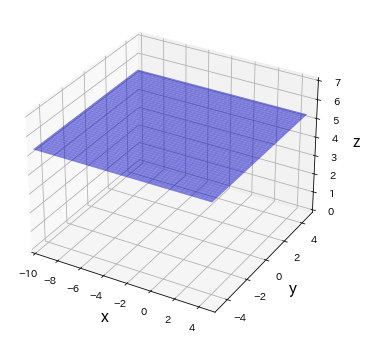

In [2819]:
# PYTHON_MATPLOTLIB_PLANE_02-2

# FigureとAxes
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')

# x,y,z軸の範囲
xr = [-10, 5]
yr = [-5, 5]
zr = [0, 7]

# p,q,r,s(px+qy+rz+s=0)を設定
param = [plane[0],plane[1],plane[2],plane[3]]

# 平面2x-y+3z=0をプロット
plot_plane(ax, param, xr, yr, zr)

# 画像の保存
#plt.savefig("plot_plane.png", bbox_inches = "tight")

In [2784]:
loc[2]

0

In [ ]:


# 画像の保存
#plt.savefig("normal_vector_plane.png", bbox_inches = "tight")